In [7]:
import os
import base64

from aliyunsdkcore.client import AcsClient
from aliyunsdkfacebody.request.v20191230.DetectLivingFaceRequest import DetectLivingFaceRequest
import json
import csv
import tqdm
import PIL
import cv2
from PIL import Image
import pandas as pd


import pickle
import matplotlib.pyplot as plt
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
import pyscikit.ImgKit as kit  

In [8]:
image_base_path = '/media/charles/SSD/sourcecode/f2f/data/lfw_maiguangcan/VGG-NbA-P/'
all_files = os.listdir(path=image_base_path)
b64s = []
for file in all_files:
    with open(os.path.join(image_base_path,file), "rb") as img_file:
        b64_string = base64.b64encode(img_file.read())
        b64s.append(b64_string)


In [13]:
all_files[:366]

['0846.png',
 '7217.png',
 '2037.png',
 '8636.png',
 '0583.png',
 '6511.png',
 '4600.png',
 '12230.png',
 '9487.png',
 '7021.png',
 '0532.png',
 '4622.png',
 '11343.png',
 '1698.png',
 '8428.png',
 '1727.png',
 '3601.png',
 '8518.png',
 '8355.png',
 '8812.png',
 '0482.png',
 '9335.png',
 '1463.png',
 '1977.png',
 '6377.png',
 '1610.png',
 '9069.png',
 '8643.png',
 '7256.png',
 '1355.png',
 '1130.png',
 '1761.png',
 '13026.png',
 '11596.png',
 '1223.png',
 '5309.png',
 '12700.png',
 '11406.png',
 '0135.png',
 '0881.png',
 '4572.png',
 '4093.png',
 '13160.png',
 '7960.png',
 '9533.png',
 '8969.png',
 '0884.png',
 '12004.png',
 '3364.png',
 '12847.png',
 '5383.png',
 '0763.png',
 '3090.png',
 '1423.png',
 '7432.png',
 '2823.png',
 '5272.png',
 '4652.png',
 '6154.png',
 '0755.png',
 '12946.png',
 '6047.png',
 '6757.png',
 '12595.png',
 '7078.png',
 '8578.png',
 '10597.png',
 '2162.png',
 '0991.png',
 '2847.png',
 '6956.png',
 '11452.png',
 '4113.png',
 '4820.png',
 '7339.png',
 '4940.png',

In [71]:

client = AcsClient('LTAISsjYyR8wFDps', 'cLzw9UVuOADqjOZ614HMufVffl9Kyc', 'cn-shanghai')

request = DetectLivingFaceRequest()
request.set_accept_format('json')
log_file = 'liveness_detection.csv'

def sendrequest(b64s_sub10):
    cont = []
    for b64 in b64s_sub10:
        cont.append({"ImageData": b64})
    
    request.set_Taskss(cont)
    response = client.do_action_with_exception(request)
# python2:  print(response)
# parse json file
# response = '{"RequestId":"F82E41B0-FC96-43B5-8E22-F63C0044C72D","Data":{"Elements":[{"TaskId":"img7$FCTGfO4DI6vNvkORerdz-1unV0p","Results":[{"Suggestion":"pass","Rate":30.050003,"Label":"normal"}],"ImageURL":"https://img-blog.csdnimg.cn/20210313131228678.png"},{"TaskId":"img5Qfzjr76k7L7wVPy0Ve17Y-1unV0p","Results":[{"Suggestion":"pass","Rate":30.050003,"Label":"normal"}],"ImageURL":"https://img-blog.csdnimg.cn/20210313131228678.png"}]}}'
    pythonObj = json.loads(str(response, encoding='utf-8'))
# pythonObj = json.loads(response)
    rows = []
    print(str(response, encoding='utf-8'))
    samples = len(pythonObj['Data']['Elements'])
    for i in range(samples):
        res_obj = pythonObj['Data']['Elements'][i]#{'TaskId': 'img7$FCTGfO4DI6vNvkORerdz-1unV0p', 'Results': [{'Suggestion': 'pass', 'Rate': 30.050003, 'Label': 'normal'}], 'ImageURL': 'https://img-blog.csdnimg.cn/20210313131228678.png'}
#         rate_i = res_obj['Results'][0]['Rate']
        rows.append([res_obj['Results'][0]['Suggestion'],res_obj['Results'][0]['Rate'] ,res_obj['Results'][0]['Label']])
    with open(log_file, 'a') as f:
      
    # using csv.writer method from CSV package
        write = csv.writer(f)
        write.writerows(rows)
        

def sendrequesturl(b64s_sub10):
    cont = []
    for b64 in b64s_sub10:
        cont.append({"ImageURL": b64})
    
    request.set_Taskss(cont)
    response = client.do_action_with_exception(request)
# python2:  print(response)
# parse json file
# response = '{"RequestId":"F82E41B0-FC96-43B5-8E22-F63C0044C72D","Data":{"Elements":[{"TaskId":"img7$FCTGfO4DI6vNvkORerdz-1unV0p","Results":[{"Suggestion":"pass","Rate":30.050003,"Label":"normal"}],"ImageURL":"https://img-blog.csdnimg.cn/20210313131228678.png"},{"TaskId":"img5Qfzjr76k7L7wVPy0Ve17Y-1unV0p","Results":[{"Suggestion":"pass","Rate":30.050003,"Label":"normal"}],"ImageURL":"https://img-blog.csdnimg.cn/20210313131228678.png"}]}}'
    pythonObj = json.loads(str(response, encoding='utf-8'))
# pythonObj = json.loads(response)
    rows = []
    print(str(response, encoding='utf-8'))
    samples = len(pythonObj['Data']['Elements'])
    for i in range(samples):
        res_obj = pythonObj['Data']['Elements'][i]#{'TaskId': 'img7$FCTGfO4DI6vNvkORerdz-1unV0p', 'Results': [{'Suggestion': 'pass', 'Rate': 30.050003, 'Label': 'normal'}], 'ImageURL': 'https://img-blog.csdnimg.cn/20210313131228678.png'}
#         rate_i = res_obj['Results'][0]['Rate']
        if res_obj.get('Results') ==None:
            continue
        rows.append([res_obj['Results'][0]['Suggestion'],res_obj['Results'][0]['Rate'] ,res_obj['Results'][0]['Label']])
    with open(log_file, 'a') as f:
      
    # using csv.writer method from CSV package
        write = csv.writer(f)
        write.writerows(rows)

In [66]:
for i in tqdm.tqdm(range(0,len(b64s),10)):
#     print(i)
    b64s_sub10 = b64s[i:i+10]
    sendrequest(b64s_sub10)

100%|██████████| 1324/1324 [30:11<00:00,  1.37s/it]


3

# LFW ours

In [55]:
image_base_path = '../data/lfw_zv_styleGAN_reconstruct/'
imagejpg_base_path = '../data/lfw_zv_styleGAN_reconstruct_jpg/'
# feat_base_path = '/media/xingbo/Storage/Text2AnimeFace/asset_results/stylegan2_celeba_sample_pkl_f2f_zv'
all_files = os.listdir(path=image_base_path)

b64s = []

for subdir in tqdm.tqdm(all_files):
    all_sub_files = os.listdir(path=os.path.join(image_base_path,subdir))
    for subfile in all_sub_files:
        with open(os.path.join(image_base_path,subdir, subfile), 'rb') as f:
            pkl_content = pickle.load(f)
            img = pkl_content['fake_img'][0]
#             img = cv2.resize(img, dsize=(256, 256))
#             b64_string = base64.b64encode(img)
#             b64s.append(b64_string)
            im = Image.fromarray(img)
            if not os.path.exists(os.path.join(imagejpg_base_path,subdir)):
                os.mkdir(os.path.join(imagejpg_base_path,subdir))
            im.save(os.path.join(imagejpg_base_path,subdir, subfile+"_.jpg"))

100%|██████████| 5749/5749 [06:26<00:00, 14.87it/s]


In [4]:
import os
image_base_path = '../data/lfw_zv_styleGAN_reconstruct/'
imagejpg_base_path = '../data/lfw_zv_styleGAN_reconstruct_jpg/'
# feat_base_path = '/media/xingbo/Storage/Text2AnimeFace/asset_results/stylegan2_celeba_sample_pkl_f2f_zv'
all_files = os.listdir(path=image_base_path)
all_files[:10]

['Leon_Silver',
 'Morgan_Freeman',
 'Franco_Cangele',
 'Allison_Searing',
 'Douglas_Paal',
 'Bill_Parsons',
 'Dennis_Archer',
 'Shigeo_Nagashima',
 'Nick_Reilly',
 'Ramon_Delgado']

In [75]:
import time

image_base_path = '../data/lfw_zv_styleGAN_reconstruct/'
all_files = os.listdir(path=image_base_path)
# https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/
# lfw_zv_styleGAN_reconstruct_jpg/Aaron_Guiel/Aaron_Guiel_0001.png.pkl_.jpg
b64s = []
cnt = 1
for subdir in tqdm.tqdm(all_files):
    all_sub_files = os.listdir(path=os.path.join(image_base_path,subdir))
    for subfile in all_sub_files:
        if cnt< 4000:
            cnt = cnt + 1
            continue
        print(image_base_path,subdir, subfile)
        b64s.append('https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/'+subdir+'/'+subfile+'_.jpg')
        if cnt % 10 ==0:
            sendrequesturl(b64s)
            b64s = []
            time.sleep(0.5)
        cnt = cnt + 1

  0%|          | 0/5749 [00:00<?, ?it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tommy_Franks Tommy_Franks_0011.png.pkl
{"RequestId":"D632A143-4129-4162-8FE3-3144B9BA70AF","Data":{"Elements":[{"TaskId":"img5EeB8OfMkPg4loYNteYGaT-1un$8C","Results":[{"Suggestion":"block","Rate":82.46,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Tommy_Franks/Tommy_Franks_0011.png.pkl_.jpg"},{"TaskId":"img4v598$Wfkrq6A@VXvSoQPu-1un$8C","Results":[{"Suggestion":"pass","Rate":43.91,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Pervez_Musharraf/Pervez_Musharraf_0012.png.pkl_.jpg"},{"TaskId":"img6zI98JjuQ2T4B5RUWY387o-1un$8C","Results":[{"Suggestion":"pass","Rate":52.83,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Pervez_Musharraf/Pervez_Musharraf_0002.png.pkl_.jpg"},{"TaskId":"img2IBejs9MkaB64lQSqizJwK-1un$8C","Results":[{"Suggestion":"review","Rate":77.06,"La

 32%|███▏      | 1862/5749 [00:01<00:02, 1715.23it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tommy_Franks Tommy_Franks_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Franks Tommy_Franks_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Franks Tommy_Franks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Franks Tommy_Franks_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Franks Tommy_Franks_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Franks Tommy_Franks_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Xiang_Huaicheng Xiang_Huaicheng_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Will_Smith Will_Smith_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Will_Smith Will_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierre_Png Pierre_Png_0001.png.pkl
{"RequestId":"8F054234-9C5A-48F1-A4F9-37A0F4A1A070","Data":{"Elements":[{"TaskId":"img6iPmX@cCH1x5y8sN6aiZg5-1un$8C","Results":[{"Suggestion":"review","Rate":76.71,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lf

../data/lfw_zv_styleGAN_reconstruct/ Pervez_Musharraf Pervez_Musharraf_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pervez_Musharraf Pervez_Musharraf_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pervez_Musharraf Pervez_Musharraf_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pervez_Musharraf Pervez_Musharraf_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pervez_Musharraf Pervez_Musharraf_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pervez_Musharraf Pervez_Musharraf_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pervez_Musharraf Pervez_Musharraf_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anneli_Jaatteenmaki Anneli_Jaatteenmaki_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anneli_Jaatteenmaki Anneli_Jaatteenmaki_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clint_Howard Clint_Howard_0001.png.pkl
{"RequestId":"5ADDB888-90B8-42A7-B99E-97EC1B2A13FE","Data":{"Elements":[{"TaskId":"img@MA86Dx4Ik7rHg@xD9qhW-1un$8F","Results":[{"Suggestion":"review","Rate"

../data/lfw_zv_styleGAN_reconstruct/ Reese_Witherspoon Reese_Witherspoon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jefferson_Perez Jefferson_Perez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jefferson_Perez Jefferson_Perez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeong_Se-hyun Jeong_Se-hyun_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeong_Se-hyun Jeong_Se-hyun_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeong_Se-hyun Jeong_Se-hyun_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeong_Se-hyun Jeong_Se-hyun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeong_Se-hyun Jeong_Se-hyun_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeong_Se-hyun Jeong_Se-hyun_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeong_Se-hyun Jeong_Se-hyun_0009.png.pkl
{"RequestId":"262555C3-FEB9-4278-BBF8-86AC6371D858","Data":{"Elements":[{"TaskId":"img5ZC2ty78X@d53OKpyeICbz-1un$8H","Results":[{"Suggestion":"review","Rate":70.97,"Label":"liveness"}],"ImageURL":"https:/

../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Bolton John_Bolton_0005.png.pkl
{"RequestId":"006F6914-A847-473E-B9D3-3EF28675D606","Data":{"Elements":[{"TaskId":"img6CdYfjKVr1Q7a@z$fqcda2-1un$8K","Results":[{"Suggestion":"pass","Rate":43.33,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reco

 33%|███▎      | 1914/5749 [00:11<03:41, 17.31it/s]  

../data/lfw_zv_styleGAN_reconstruct/ Dionigi_Tettamanzi Dionigi_Tettamanzi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grace_Kelly Grace_Kelly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Simon_Yam Simon_Yam_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amer_al-Saadi Amer_al-Saadi_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amer_al-Saadi Amer_al-Saadi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amer_al-Saadi Amer_al-Saadi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amer_al-Saadi Amer_al-Saadi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tippi_Hedren Tippi_Hedren_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tippi_Hedren Tippi_Hedren_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Ortega Daniel_Ortega_0001.png.pkl
{"RequestId":"666394C5-19A7-4B46-95B3-5AF0D3277A96","Data":{"Elements":[{"TaskId":"img7Sq3bTIaktj4227gTyghiQ-1un$8M","Results":[{"Suggestion":"pass","Rate":37.66,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

../data/lfw_zv_styleGAN_reconstruct/ Sally_Kirkland Sally_Kirkland_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sally_Kirkland Sally_Kirkland_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marc-Andre_Fleury Marc-Andre_Fleury_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marc-Andre_Fleury Marc-Andre_Fleury_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Lyons Roger_Lyons_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abba_Eban Abba_Eban_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Lobo_Zagallo Mario_Lobo_Zagallo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Branch Michelle_Branch_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Branch Michelle_Branch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Margaret_Thatcher Margaret_Thatcher_0001.png.pkl
{"RequestId":"05EC4582-C1CF-4507-AAF3-8281365C8E21","Data":{"Elements":[{"TaskId":"img5acuq9nUrQL49K@Q0CKUrM-1un$8O","Results":[{"Suggestion":"pass","Rate":31.010002,"Label":"normal"}],"

../data/lfw_zv_styleGAN_reconstruct/ Giulio_Andreotti Giulio_Andreotti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Reitsma Chris_Reitsma_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Dallager John_Dallager_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Gillan Ian_Gillan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guy_Verhofstadt Guy_Verhofstadt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brooke_Adams Brooke_Adams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brenda_van_Dam Brenda_van_Dam_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alecos_Markides Alecos_Markides_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Fassel Jim_Fassel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lane_Bryant Lane_Bryant_0001.png.pkl
{"RequestId":"F5DACE84-1312-4873-A1C5-078D6DFC01B5","Data":{"Elements":[{"TaskId":"imgL58NvhSXXw6krt9BV30fY-1un$8R","Results":[{"Suggestion":"review","Rate":71.84,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-s

 34%|███▍      | 1951/5749 [00:16<05:28, 11.58it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_McEnroe John_McEnroe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McEnroe John_McEnroe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carina_Lau_Ka-ling Carina_Lau_Ka-ling_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lincoln_Chafee Lincoln_Chafee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phillip_Seymor_Hoffmann Phillip_Seymor_Hoffmann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Veronica_Lake Veronica_Lake_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cheryl_Ford Cheryl_Ford_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Faisal_Saleh_Hayat Faisal_Saleh_Hayat_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jodie_Kidd Jodie_Kidd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dieter_Zetsche Dieter_Zetsche_0001.png.pkl
{"RequestId":"2BFE47FF-D7C4-43BB-8A69-D2B55AD1967A","Data":{"Elements":[{"TaskId":"img1ot@qoNvb9Z7$vftID71l7-1un$8S","Results":[{"Suggestion":"pass","Rate":34.620003,"Label":"normal"}],"Imag

../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0028.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Recep_Tayyip_Erdogan Recep_Tayyip_Erdogan_0016.png.pkl
{"RequestId":"97778958-6989-4E51-BC06-A73586B6B832","Data":{"Elements":[{"TaskId

../data/lfw_zv_styleGAN_reconstruct/ Mike_Holmgren Mike_Holmgren_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Holmgren Mike_Holmgren_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0010.png.pkl
{"RequestId":"A98D8CA2-0447-40ED-A647-80B9A031DAD0","Data":{"Elements":[{"TaskId":"img6jtIogfwX7p6tzH9pE8N4l-1un$8W","Results":[{"Suggestion":"review","Rate":75.04,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 34%|███▍      | 1977/5749 [00:22<08:00,  7.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keanu_Reeves Keanu_Reeves_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jane_Rooney Jane_Rooney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jafar_Umar_Thalib Jafar_Umar_Thalib_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Noer_Moeis Noer_Moeis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tang_Jiaxuan Tang_Jiaxuan_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tang_Jiaxuan Tang_Jiaxuan_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tang_Jiaxuan Tang_Jiaxuan_0007.png.pkl
{"RequestId":"0E33DD45-83A9-439C-96CD-C4D704EEB6F8","Data":{"Elements":[{"TaskId":"img730zy40cAgg582IvJLDvja-1un$8X","Results":[{"Suggestion":"pass","Rate":33.0,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.c

../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0042.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0039.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0043.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0047.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0036.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0033.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0008.png.pkl
{"RequestId":"38F41920-F9CA-4539-87CC-9FD2C2138EBA","Data":{"Elements":[{"TaskId":"img1DpBxQ$8QQa5vYSGCTk8sS-1un$8@","Results":[{"Suggestion":"block","Rate":81.64,"Label":"liveness"}],"ImageURL":"http

../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0024.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0028.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0027.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0046.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Putin Vladimir_Putin_0023.png.pkl
{"RequestId":"F774FAB5-313F-4D2F-8793-6A45DEB934E3","Data":{"Elements":[{"TaskId":"img58Nmccd6k$y7FS7yKCY3ud-1un$90","Results":[{"Suggestion":"pass","Rate":40.44,"Label":"normal"}],"ImageURL":"https:/

 35%|███▍      | 1995/5749 [00:29<13:24,  4.67it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sean_OKeefe Sean_OKeefe_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sean_Townsend Sean_Townsend_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Shiver Steve_Shiver_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Montgomerie Colin_Montgomerie_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Montgomerie Colin_Montgomerie_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Montgomerie Colin_Montgomerie_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Montgomerie Colin_Montgomerie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Montgomerie Colin_Montgomerie_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Petria_Thomas Petria_Thomas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Petria_Thomas Petria_Thomas_0003.png.pkl
{"RequestId":"812389F8-D943-4623-B1F7-A925D8EEC53E","Data":{"Elements":[{"TaskId":"img1bdEQsqCreq5O58LpfBFZI-1un$93","Results":[{"Suggestion":"pass","Rate":40.78,"Label":"normal"}],"Imag

 35%|███▍      | 2008/5749 [00:32<12:52,  4.84it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ray_Sherman Ray_Sherman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angela_Merkel Angela_Merkel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angela_Merkel Angela_Merkel_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angela_Merkel Angela_Merkel_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angela_Merkel Angela_Merkel_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angela_Merkel Angela_Merkel_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Haneke Michael_Haneke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anna_Chicherova Anna_Chicherova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Dodge David_Dodge_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Dodge David_Dodge_0002.png.pkl
{"RequestId":"E6D5A17B-5BD7-4970-BAAB-3BF670A232E4","Data":{"Elements":[{"TaskId":"img1YTRx4vCXPV7NT1D9gsyZK-1un$95","Results":[{"Suggestion":"pass","Rate":48.29,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 35%|███▌      | 2018/5749 [00:33<10:37,  5.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Scott_McClellan Scott_McClellan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_McClellan Scott_McClellan_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_McClellan Scott_McClellan_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_McClellan Scott_McClellan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_McClellan Scott_McClellan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Cunning Mike_Cunning_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schmid Gerhard_Schmid_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chip_Knight Chip_Knight_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norodom_Chakrapong Norodom_Chakrapong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darryl_McDaniels Darryl_McDaniels_0001.png.pkl
{"RequestId":"2CE7CEF7-E375-4472-8F28-097FE6E32E37","Data":{"Elements":[{"TaskId":"img1U17xukmHMj5V4DS$pg1vd-1un$96","Results":[{"Suggestion":"review","Rate":73.92,"Label":"liveness"}],"Im

 35%|███▌      | 2025/5749 [00:34<11:37,  5.34it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bob_Riley Bob_Riley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alicia_Witt Alicia_Witt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Sambrook Richard_Sambrook_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Sambrook Richard_Sambrook_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ahmed_Ibrahim_Bilal Ahmed_Ibrahim_Bilal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miguel_Angel_Rodriguez Miguel_Angel_Rodriguez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Gangloff Mark_Gangloff_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0002.png.pkl
{"RequestId":"9E788B6F-27A4-4424-B5A0-C2A57FF50C4A","Data":{"Elements":[{"TaskId":"img4@RkXL6ckIB4jCkQdJu3X@-1un$97","Results":[{"Suggestion":"pass"

 35%|███▌      | 2032/5749 [00:35<10:22,  5.97it/s]

../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Zeta-Jones Catherine_Zeta-Jones_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amy_Redford Amy_Redford_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Ball Alan_Ball_0001.png.pkl
{"RequestId":"CD0ED5E1-D344-484B-8096-DAEE49CCEE68","Data":{"Elements":[{"TaskId":"img6PK6WygVX1v6K$Y1i9RqS@-1un$98","Re

 35%|███▌      | 2036/5749 [00:37<14:25,  4.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Howard_Stringer Howard_Stringer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Young_Kim Young_Kim_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yuri_Luzhkov Yuri_Luzhkov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariana_Ohata Mariana_Ohata_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carin_Koch Carin_Koch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Johnson_Panjaitan Johnson_Panjaitan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Johnson_Panjaitan Johnson_Panjaitan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tocker_Pudwill Tocker_Pudwill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julian_Fantino Julian_Fantino_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Woody_Johnson Robert_Woody_Johnson_0001.png.pkl
{"RequestId":"F7D5D09F-1347-4DF5-A68E-5BBB02B33DAD","Data":{"Elements":[{"TaskId":"img5bZw$jqX4if7Bk74BrTaQs-1un$9a","Results":[{"Suggestion":"review","Rate":77.66,"Label":"liveness"}],"ImageURL":"h

 36%|███▌      | 2044/5749 [00:38<11:51,  5.20it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ulrich_Kueperkoch Ulrich_Kueperkoch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Alford Steve_Alford_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marion_Barry Marion_Barry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ AJ_Cook AJ_Cook_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Akiko_Morigami Akiko_Morigami_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Han_Sung_Joo Han_Sung_Joo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Kessler Ronald_Kessler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Geoff_Dixon Geoff_Dixon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathie_Louise_Saunders Kathie_Louise_Saunders_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jimmy_Gobble Jimmy_Gobble_0001.png.pkl
{"RequestId":"570B1BAA-2A4A-402E-A8D4-C86D7E361E22","Data":{"Elements":[{"TaskId":"img4AjvfjQIX6i5edCpu$yPqO-1un$9b","Results":[{"Suggestion":"review","Rate":76.25,"Label":"liveness"}],"ImageURL":"https://lfwxingbo

 36%|███▌      | 2054/5749 [00:38<09:46,  6.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Boris_Henry Boris_Henry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexandre_Vinokourov Alexandre_Vinokourov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Dalton Scott_Dalton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rani_Mukherjee Rani_Mukherjee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Wolfensohn James_Wolfensohn_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Wolfensohn James_Wolfensohn_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Wolfensohn James_Wolfensohn_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Wolfensohn James_Wolfensohn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Wolfensohn James_Wolfensohn_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ross_Verba Ross_Verba_0001.png.pkl
{"RequestId":"C1301ED9-D64C-4A9B-A0BA-7E26B726345F","Data":{"Elements":[{"TaskId":"img2aM9oGj7bLx4vt$l4urPbg-1un$9b","Results":[{"Suggestion":"review","Rate":72.72,"Label":"liveness"}],"

 36%|███▌      | 2060/5749 [00:39<09:12,  6.68it/s]

../data/lfw_zv_styleGAN_reconstruct/ Christopher_Amolsch Christopher_Amolsch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sedigh_Barmak Sedigh_Barmak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ruth_Stubbs Ruth_Stubbs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ellen_Engleman Ellen_Engleman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ellen_Engleman Ellen_Engleman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrea_De_Cruz Andrea_De_Cruz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elijah_Wood Elijah_Wood_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elijah_Wood Elijah_Wood_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elijah_Wood Elijah_Wood_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Lohn Edward_Lohn_0001.png.pkl
{"RequestId":"1CD836C3-4FE6-4DC6-B515-30FE3C581657","Data":{"Elements":[{"TaskId":"img79gwimHTkbK4XL9ymhMJKf-1un$9c","Results":[{"Suggestion":"pass","Rate":55.81,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 36%|███▌      | 2067/5749 [00:40<08:30,  7.22it/s]

../data/lfw_zv_styleGAN_reconstruct/ Emyr_Jones_Parry Emyr_Jones_Parry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hilmi_Ozkok Hilmi_Ozkok_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hilmi_Ozkok Hilmi_Ozkok_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Graham_Bentley Graham_Bentley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Stein Bill_Stein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ AJ_Lamas AJ_Lamas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joerg_Haider Joerg_Haider_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joerg_Haider Joerg_Haider_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Romeo_Gigli Romeo_Gigli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Billy_Boyd Billy_Boyd_0001.png.pkl
{"RequestId":"05C20731-FE7D-4F6C-9B43-8DAC6691DB54","Data":{"Elements":[{"TaskId":"img5GIXIHNJAbs5mLhzrHPVtb-1un$9d","Results":[{"Suggestion":"block","Rate":87.37,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_

 36%|███▌      | 2075/5749 [00:41<07:53,  7.76it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alexandre_Herchcovitch Alexandre_Herchcovitch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Suzanne_Fox Suzanne_Fox_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Crippen Bob_Crippen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tomas_Malik Tomas_Malik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lloyd_Ward Lloyd_Ward_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lloyd_Ward Lloyd_Ward_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dave_Potter Dave_Potter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ximena_Bohorquez Ximena_Bohorquez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Reina_Hayes Reina_Hayes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brad_Brownell Brad_Brownell_0001.png.pkl
{"RequestId":"A8EC7AA0-CBE2-423C-9890-D75EC23F101D","Data":{"Elements":[{"TaskId":"img20XaHgiaH0S4Eqk6W7afxZ-1un$9e","Results":[{"Suggestion":"review","Rate":79.3,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangha

 36%|███▌      | 2084/5749 [00:42<07:09,  8.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Xiang_Xu Xiang_Xu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Sousa David_Sousa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ester_Canadas Ester_Canadas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ibrahim_Haddad Ibrahim_Haddad_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Hartley Bob_Hartley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Harry Prince_Harry_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Harry Prince_Harry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Harry Prince_Harry_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Annie-Jeanne_Reynaud Annie-Jeanne_Reynaud_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniela_Hantuchova Daniela_Hantuchova_0002.png.pkl
{"RequestId":"88932AC6-50D2-4DE9-9A3C-1163A5B1D620","Data":{"Elements":[{"TaskId":"img7N$APNf2HOc47ad2@gI@Kt-1un$9e","Results":[{"Suggestion":"pass","Rate":36.37,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-

 36%|███▋      | 2092/5749 [00:43<07:10,  8.49it/s]

../data/lfw_zv_styleGAN_reconstruct/ Daniela_Hantuchova Daniela_Hantuchova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Max_Biaggi Max_Biaggi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dale_Bosworth Dale_Bosworth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clay_Campbell Clay_Campbell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Greenspun Peter_Greenspun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sofyan_Dawood Sofyan_Dawood_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hannah_Stockbauer Hannah_Stockbauer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hannah_Stockbauer Hannah_Stockbauer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cuba_Gooding_Jr Cuba_Gooding_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dick_Smothers Dick_Smothers_0001.png.pkl
{"RequestId":"9CDFB3AC-2705-4C16-A014-5AA40D90E853","Data":{"Elements":[{"TaskId":"img4h6I5Dn8XVj5j9awFQr5AJ-1un$9f","Results":[{"Suggestion":"pass","Rate":49.22,"Label":"normal"}],"ImageURL":

 37%|███▋      | 2100/5749 [00:43<06:51,  8.87it/s]

../data/lfw_zv_styleGAN_reconstruct/ Michael_Sullivan Michael_Sullivan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Sullivan Michael_Sullivan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Campbell Brian_Campbell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Sebastien_Giguere Jean-Sebastien_Giguere_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Sebastien_Giguere Jean-Sebastien_Giguere_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Razali_Ismail Razali_Ismail_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thad_Matta Thad_Matta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lionel_Richie Lionel_Richie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lionel_Richie Lionel_Richie_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joaquim_Rodriguez Joaquim_Rodriguez_0001.png.pkl
{"RequestId":"29D00EEF-1232-4947-AE0D-49B337FB40D6","Data":{"Elements":[{"TaskId":"imgewo5ORVkM35ZyOPzqkj2n-1un$9g","Results":[{"Suggestion":"pass","Rate":44.77,"Label"

 37%|███▋      | 2107/5749 [00:44<06:46,  8.96it/s]

../data/lfw_zv_styleGAN_reconstruct/ Buzz_Hargrove Buzz_Hargrove_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Yeo-jin Lee_Yeo-jin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hipolito_Mejia Hipolito_Mejia_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hipolito_Mejia Hipolito_Mejia_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hipolito_Mejia Hipolito_Mejia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hipolito_Mejia Hipolito_Mejia_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dieter_Holzer Dieter_Holzer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jewel_Howard-Taylor Jewel_Howard-Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Williams Natalie_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelly_Leigh Kelly_Leigh_0001.png.pkl
{"RequestId":"2C58A1CF-7126-4CA4-ABB9-03AB5ECE0309","Data":{"Elements":[{"TaskId":"img1VmUKIRebRA6gL@4QhimK$-1un$9h","Results":[{"Suggestion":"review","Rate":77.1,"Label":"liveness"}],"ImageURL":"https:

 37%|███▋      | 2114/5749 [00:45<06:49,  8.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hasan_Wirayuda Hasan_Wirayuda_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexandre_Daigle Alexandre_Daigle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ken_Loach Ken_Loach_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brandon_Lloyd Brandon_Lloyd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elisabeth_Schumacher Elisabeth_Schumacher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elisabeth_Schumacher Elisabeth_Schumacher_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marco_Antonio_Barrera Marco_Antonio_Barrera_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marco_Antonio_Barrera Marco_Antonio_Barrera_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marco_Antonio_Barrera Marco_Antonio_Barrera_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marco_Antonio_Barrera Marco_Antonio_Barrera_0004.png.pkl
{"RequestId":"31F5E432-14A5-4BC7-9511-15790DAC9BDF","Data":{"Elements":[{"TaskId":"imgofFijWpXl35iixFLbIzz6-1un$9i","Results":[{

 37%|███▋      | 2120/5749 [00:46<07:10,  8.42it/s]

../data/lfw_zv_styleGAN_reconstruct/ Marco_Antonio_Barrera Marco_Antonio_Barrera_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marco_Antonio_Barrera Marco_Antonio_Barrera_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stacey_Yamaguchi Stacey_Yamaguchi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zach_Parise Zach_Parise_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudio_Ranieri Claudio_Ranieri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Weston Thomas_Weston_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tariq_Aziz Tariq_Aziz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tariq_Aziz Tariq_Aziz_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tariq_Aziz Tariq_Aziz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tariq_Aziz Tariq_Aziz_0003.png.pkl
{"RequestId":"7BA55564-3887-4A82-A5C7-319557B27509","Data":{"Elements":[{"TaskId":"img1g@u1TVPHDr6NOTTz2aXIw-1un$9i","Results":[{"Suggestion":"pass","Rate":48.68,"Label":"normal"}],"ImageURL":"https://lfwxi

 37%|███▋      | 2125/5749 [00:47<07:56,  7.60it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tariq_Aziz Tariq_Aziz_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tariq_Aziz Tariq_Aziz_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kultida_Woods Kultida_Woods_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Crandall_Bowles Crandall_Bowles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mehdi_Baala Mehdi_Baala_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bettina_Rheims Bettina_Rheims_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Crede Joe_Crede_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pascal_Lamy Pascal_Lamy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pascal_Lamy Pascal_Lamy_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Burns William_Burns_0002.png.pkl
{"RequestId":"590D1305-116A-48A3-B7AF-FBC1A3C9BCCD","Data":{"Elements":[{"TaskId":"img1S0G@nAukDY5TFCHqnQY2u-1un$9j","Results":[{"Suggestion":"pass","Rate":52.3,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_

 37%|███▋      | 2132/5749 [00:47<07:31,  8.01it/s]

../data/lfw_zv_styleGAN_reconstruct/ William_Burns William_Burns_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Herbert_Haupt Herbert_Haupt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Myers Mike_Myers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Myers Mike_Myers_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Myers Mike_Myers_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Myers Mike_Myers_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Myers Mike_Myers_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Myers Mike_Myers_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Myers Mike_Myers_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meirion_Evans Meirion_Evans_0001.png.pkl
{"RequestId":"D16EB413-0BCD-46B5-A7D5-F2BE83D07A0A","Data":{"Elements":[{"TaskId":"img5DHKa$VGbhZ5Q8yRTl4g$s-1un$9k","Results":[{"Suggestion":"review","Rate":74.79,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_re

 37%|███▋      | 2135/5749 [00:48<10:02,  6.00it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mark_Everson Mark_Everson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rulon_Gardner Rulon_Gardner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lindsay_Lohan Lindsay_Lohan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Coco_dEste Coco_dEste_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paula_Dobriansky Paula_Dobriansky_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Leach Mike_Leach_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Rodriguez Keith_Rodriguez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brock_Berlin Brock_Berlin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Burton Kate_Burton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patrick_Bourrat Patrick_Bourrat_0001.png.pkl
{"RequestId":"F318F290-1515-470C-AF76-C2A66BE832AF","Data":{"Elements":[{"TaskId":"img4rAdD1iSrbB77QX1GidzOP-1un$9l","Results":[{"Suggestion":"review","Rate":77.28,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 37%|███▋      | 2145/5749 [00:49<08:30,  7.06it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gabriel_Batistuta Gabriel_Batistuta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gabriel_Batistuta Gabriel_Batistuta_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leslie_Moonves Leslie_Moonves_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leslie_Moonves Leslie_Moonves_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Kipkoech_Cheruiyot Robert_Kipkoech_Cheruiyot_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Moe John_Moe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Warren_Granados Warren_Granados_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ T_Boone_Pickens T_Boone_Pickens_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tatjana_Gsell Tatjana_Gsell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrei_Mikhnevich Andrei_Mikhnevich_0002.png.pkl
{"RequestId":"896C3778-59C1-413A-80AA-A42E03C2C008","Data":{"Elements":[{"TaskId":"img1FDThhJQrNZ4M1CAjnyAL@-1un$9m","Results":[{"Suggestion":"block","Rate":83.57,"Label"

 37%|███▋      | 2153/5749 [00:50<07:49,  7.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Andrei_Mikhnevich Andrei_Mikhnevich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rafael_Vinoly Rafael_Vinoly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shane_Hmiel Shane_Hmiel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amber_Tamblyn Amber_Tamblyn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amber_Tamblyn Amber_Tamblyn_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stan_Kasten Stan_Kasten_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Evander_Holyfield Evander_Holyfield_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Evander_Holyfield Evander_Holyfield_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Urban Keith_Urban_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nikolay_Davydenko Nikolay_Davydenko_0001.png.pkl
{"RequestId":"08F7578F-657D-4AA6-8B42-C742F04364B3","Data":{"Elements":[{"TaskId":"img53o5ehfCryT6VErWHk2Cjx-1un$9m","Results":[{"Suggestion":"pass","Rate":33.67,"Label":"normal"}],"ImageURL":"https:/

 38%|███▊      | 2160/5749 [00:51<07:28,  8.00it/s]

../data/lfw_zv_styleGAN_reconstruct/ Joe_Plumeri Joe_Plumeri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristen_Breitweiser Kristen_Breitweiser_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristen_Breitweiser Kristen_Breitweiser_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristen_Breitweiser Kristen_Breitweiser_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angie_Arzola Angie_Arzola_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emily_Robison Emily_Robison_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emily_Robison Emily_Robison_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stockard_Channing Stockard_Channing_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stockard_Channing Stockard_Channing_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stockard_Channing Stockard_Channing_0002.png.pkl
{"RequestId":"161F9D2A-911B-42EA-975B-572C4C26569F","Data":{"Elements":[{"TaskId":"img1yVdfczFQv461ZUp7OYYrZ-1un$9n","Results":[{"Suggestion":"pass","Rate":32.18,"Lab

 38%|███▊      | 2165/5749 [00:51<08:03,  7.42it/s]

../data/lfw_zv_styleGAN_reconstruct/ Takeo_Fukui Takeo_Fukui_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Nicholson Jack_Nicholson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Nicholson Jack_Nicholson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Nicholson Jack_Nicholson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sivan_Klein Sivan_Klein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kaye_Young Kaye_Young_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stella_McCartney Stella_McCartney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ralph_Klein Ralph_Klein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ralph_Klein Ralph_Klein_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Normand_Legault Normand_Legault_0001.png.pkl
{"RequestId":"2DB4EA29-FF93-4195-A0CB-264C5401DCD1","Data":{"Elements":[{"TaskId":"img4npQO7M$rXh51nSODTV0X7-1un$9o","Results":[{"Suggestion":"pass","Rate":43.99,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 38%|███▊      | 2172/5749 [00:52<07:36,  7.83it/s]

../data/lfw_zv_styleGAN_reconstruct/ Timothy_Goebel Timothy_Goebel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lisa_Girman Lisa_Girman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_King Alex_King_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrian_McPherson Adrian_McPherson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrian_McPherson Adrian_McPherson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Jackson William_Jackson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0027.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0026.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0003.png.pkl
{"RequestId":"B2D90558-DA30-49B1-9180-DF914D934D95","Data":{"Elements":[{"TaskId":"imgUFQVc3MXjl6o9H@cOJPC9-1un$9p","Results":[{"Suggestion":"block","Rate":85.23,"Label":"liveness"}],"ImageURL":"htt

 38%|███▊      | 2178/5749 [00:54<12:22,  4.81it/s]

../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Coria Guillermo_Coria_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Chan Peter_Chan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Fares Mohammad_Fares_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bo_Ryan Bo_Ryan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bo_Ryan Bo_Ryan_0002.png.pkl
{"RequestId":"A7E3868E-7462-4CA9-9D24-29216E4AD47E","Data":{"Elements":[{"TaskId":"img3fevtTKWAi07yD5OrHw35x-1un$9r","Results":[{"Suggestion":"review","Rate":70.04,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 38%|███▊      | 2181/5749 [00:55<13:16,  4.48it/s]

../data/lfw_zv_styleGAN_reconstruct/ Donald_Keyser Donald_Keyser_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan_De_Bont Jan_De_Bont_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Hisako Princess_Hisako_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nick_Cassavetes Nick_Cassavetes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oracene_Williams Oracene_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Luisa_Mendonca Maria_Luisa_Mendonca_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Luisa_Mendonca Maria_Luisa_Mendonca_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barbara_Felt-Miller Barbara_Felt-Miller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fred_Thompson Fred_Thompson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fred_Thompson Fred_Thompson_0001.png.pkl
{"RequestId":"B6D3FC3B-0B1C-45F6-B393-D2D9843BFFE5","Data":{"Elements":[{"TaskId":"img7MmJ4KtRkts7J9GsrA$lWQ-1un$9s","Results":[{"Suggestion":"pass","Rate":44.04,"Label":

 38%|███▊      | 2189/5749 [00:56<11:05,  5.35it/s]

../data/lfw_zv_styleGAN_reconstruct/ Fred_Thompson Fred_Thompson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Diana_Silvius Diana_Silvius_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hunter_Kemper Hunter_Kemper_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Krueger Bob_Krueger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lana_Clarkson Lana_Clarkson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lana_Clarkson Lana_Clarkson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Caine Michael_Caine_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Caine Michael_Caine_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Caine Michael_Caine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Caine Michael_Caine_0004.png.pkl
{"RequestId":"D560D864-08A6-44C5-A495-5615F681E1D8","Data":{"Elements":[{"TaskId":"imgjIFKSgC4@77NAAY2A7oRW-1un$9t","Results":[{"Suggestion":"block","Rate":83.24,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 38%|███▊      | 2194/5749 [00:57<10:42,  5.53it/s]

../data/lfw_zv_styleGAN_reconstruct/ Juergen_Peters Juergen_Peters_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juergen_Peters Juergen_Peters_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Whoopi_Goldberg Whoopi_Goldberg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patrick_Dennehy Patrick_Dennehy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Korzeniowski Robert_Korzeniowski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Fehr Eric_Fehr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chen_Tsai-chin Chen_Tsai-chin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Willie_Wilson Willie_Wilson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ramiro_Goben_Reducindo Ramiro_Goben_Reducindo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mick_McCarthy Mick_McCarthy_0001.png.pkl
{"RequestId":"F20FD7E2-A758-4C59-A5D3-545E50848986","Data":{"Elements":[{"TaskId":"img5LwPc3JGQDc4ToOQL3Zvw5-1un$9t","Results":[{"Suggestion":"pass","Rate":37.97,"Label":"normal"}],"Im

 38%|███▊      | 2203/5749 [00:58<09:03,  6.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0027.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0023.png.pkl
{"RequestId":"A9844D2E-00E2-47B2-813C-E6D39B0FD4D0","Data":{"Elements":[{"TaskId":"img3oVrl53Aban4BtLNl6VURj-1un$9u","Results":[{"Suggestion":"review","Rate":72.98,"Label":"livenes

 38%|███▊      | 2204/5749 [01:00<48:07,  1.23it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Negroponte John_Negroponte_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Rusedski Greg_Rusedski_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Rusedski Greg_Rusedski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Rusedski Greg_Rusedski_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Rusedski Greg_Rusedski_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gael_Garcia_Bermal Gael_Garcia_Bermal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Hanssen Robert_Hanssen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Glisan Ben_Glisan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Glisan Ben_Glisan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antonio_Trillanes Antonio_Trillanes_0001.png.pkl
{"RequestId":"539246E5-A160-4103-8694-EFC9FADE3BD7","Data":{"Elements":[{"TaskId":"img7iDajyZ0rPa68cYEs1RENb-1un$9w","Results":[{"Suggestion":"pass","Rate":38.7,"Label":"normal"}],"ImageURL":"https://lfwxingb

 38%|███▊      | 2209/5749 [01:01<36:20,  1.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Antonio_Trillanes Antonio_Trillanes_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antonio_Trillanes Antonio_Trillanes_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frederique_van_der_Wal Frederique_van_der_Wal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jimmy_Lee Jimmy_Lee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Hannay David_Hannay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shane_Mosley Shane_Mosley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shane_Mosley Shane_Mosley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Stapleton Bill_Stapleton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cherie_Blair Cherie_Blair_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cherie_Blair Cherie_Blair_0001.png.pkl
{"RequestId":"5D85ACD0-D081-4A51-B14C-3403D1EFE622","Data":{"Elements":[{"TaskId":"img3tsM4cZdQpe5IbpXEPsi9g-1un$9x","Results":[{"Suggestion":"pass","Rate":54.79,"Label":"normal"}],"ImageURL":"https://l

 39%|███▊      | 2215/5749 [01:02<27:46,  2.12it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cherie_Blair Cherie_Blair_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cherie_Blair Cherie_Blair_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lane_Odom Lane_Odom_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dorthy_Moxley Dorthy_Moxley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dorthy_Moxley Dorthy_Moxley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chawki_Armali Chawki_Armali_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marianne_Stanley Marianne_Stanley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rolandas_Paksas Rolandas_Paksas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rolandas_Paksas Rolandas_Paksas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Renato_Soru Renato_Soru_0001.png.pkl
{"RequestId":"3DA361E0-2313-44D9-AC28-534A542155BF","Data":{"Elements":[{"TaskId":"img6E3BXuNPAS860dS5M6i1az-1un$9y","Results":[{"Suggestion":"pass","Rate":54.83,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 39%|███▊      | 2221/5749 [01:02<21:45,  2.70it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hana_Sadiq Hana_Sadiq_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniele_Hypolito Daniele_Hypolito_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Curry Tim_Curry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Curry Tim_Curry_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Foy Tom_Foy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Mackay Peter_Mackay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nora_Ephron Nora_Ephron_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Gatti Joe_Gatti_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Gatti Joe_Gatti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vojislav_Kostunica Vojislav_Kostunica_0004.png.pkl
{"RequestId":"D262A755-61DE-4920-9251-CC6DA386E294","Data":{"Elements":[{"TaskId":"img2x3HHSneAjl64rIgdZHW@1-1un$9z","Results":[{"Suggestion":"pass","Rate":54.09,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reco

 39%|███▉      | 2229/5749 [01:03<16:57,  3.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Vojislav_Kostunica Vojislav_Kostunica_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vojislav_Kostunica Vojislav_Kostunica_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vojislav_Kostunica Vojislav_Kostunica_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vojislav_Kostunica Vojislav_Kostunica_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vojislav_Kostunica Vojislav_Kostunica_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vojislav_Kostunica Vojislav_Kostunica_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gabrielle_Union Gabrielle_Union_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Randy_Brown Randy_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lindsey_Graham Lindsey_Graham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lindsey_Graham Lindsey_Graham_0002.png.pkl
{"RequestId":"D5F33CE3-67E3-4697-9798-76305429B525","Data":{"Elements":[{"TaskId":"imgBfdH6CbkdO5coHsXIzbcq-1un$9A","Results":[{"Suggestion":"review","Rate"

 39%|███▉      | 2232/5749 [01:04<16:32,  3.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Maritza_Macias_Furano Maritza_Macias_Furano_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Arguelles Roberto_Arguelles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anil_Ramsook Anil_Ramsook_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudia_Cardinale Claudia_Cardinale_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Wright Bob_Wright_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Layug James_Layug_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lisa_Stone Lisa_Stone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anne_Krueger Anne_Krueger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anne_Krueger Anne_Krueger_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anne_Krueger Anne_Krueger_0002.png.pkl
{"RequestId":"AF2E9FB5-0FD6-4C8F-BEDB-2E2F3CFD1AFB","Data":{"Elements":[{"TaskId":"imgTuQ9gFeAMN45y7AProqIq-1un$9A","Results":[{"Suggestion":"pass","Rate":54.12,"Label":"normal"}],"ImageURL":"https://lfwxingbo.os

 39%|███▉      | 2240/5749 [01:05<13:17,  4.40it/s]

../data/lfw_zv_styleGAN_reconstruct/ Raaf_Schefter Raaf_Schefter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jamie_Kellner Jamie_Kellner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dion_Glover Dion_Glover_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Brooks Vincent_Brooks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Brooks Vincent_Brooks_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Brooks Vincent_Brooks_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Brooks Vincent_Brooks_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Brooks Vincent_Brooks_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Brooks Vincent_Brooks_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Brooks Vincent_Brooks_0005.png.pkl
{"RequestId":"9953AA63-BDCE-4A0C-B739-50A32B6F861A","Data":{"Elements":[{"TaskId":"img5bJnQMjPQdW7BBWatVvIFI-1un$9B","Results":[{"Suggestion":"block","Rate":82.83,"Label":"liveness"}],"ImageURL":"https://lfwxin

 39%|███▉      | 2244/5749 [01:06<12:41,  4.60it/s]

../data/lfw_zv_styleGAN_reconstruct/ Dean_Barkley Dean_Barkley_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dean_Barkley Dean_Barkley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dean_Barkley Dean_Barkley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dean_Barkley Dean_Barkley_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kent_Robinson Kent_Robinson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ruano_Pascual Ruano_Pascual_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Atiabet_Ijan_Amabel Atiabet_Ijan_Amabel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Randy_Dryer Randy_Dryer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Kollar Bill_Kollar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Tyson Mike_Tyson_0001.png.pkl
{"RequestId":"C0C0EBD0-C2F0-443B-91FE-E918CE6D28D4","Data":{"Elements":[{"TaskId":"img6vCvivbj4ik5rbL3wKnTyS-1un$9C","Results":[{"Suggestion":"pass","Rate":39.47,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 39%|███▉      | 2251/5749 [01:07<11:23,  5.11it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mike_Tyson Mike_Tyson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Tyson Mike_Tyson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Tyson Mike_Tyson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Scarlett John_Scarlett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0019.png.pkl
{"RequestId":"99B8523A-D08D-4DF0-B40C-7D9EE318A6A0","Data":{"Elements":[{"TaskId":"img1Cdlgv9Yk6F5wZclmDLsnG-1un$9D","Results":[{"Suggestion":"pass","Rate":31.849998,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv

 39%|███▉      | 2253/5749 [01:09<28:50,  2.02it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0030.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0027.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0034.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alvaro_Uribe Alvaro_Uribe_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Popov Alex_Popov_0001.png.pkl
{"RequestId":"F2D2B11A-C040-466B-9E31-1D18B9828E6B","Data":{"Elements":[{"TaskId":"img2ZCpyzKAkRe4@IiIYzmKeH-1un$9F","Results":[{"Suggestion":"pass","Rate":45.93,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_

 39%|███▉      | 2254/5749 [01:10<34:02,  1.71it/s]

../data/lfw_zv_styleGAN_reconstruct/ Chris_Thomas Chris_Thomas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gilberto_Rodriguez_Orejuela Gilberto_Rodriguez_Orejuela_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gilberto_Rodriguez_Orejuela Gilberto_Rodriguez_Orejuela_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gilberto_Rodriguez_Orejuela Gilberto_Rodriguez_Orejuela_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gilberto_Rodriguez_Orejuela Gilberto_Rodriguez_Orejuela_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Wittman Scott_Wittman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carol_Williams Carol_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Columbus Chris_Columbus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tangra_Riggle Tangra_Riggle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Dong-hwa Kim_Dong-hwa_0001.png.pkl
{"RequestId":"9A3B83FE-640C-4D99-B71D-0F8B7D569ACC","Data":{"Elements":[{"TaskId":"img4QjOFaPPr7z6i2R6M8mMCw

 39%|███▉      | 2261/5749 [01:11<25:50,  2.25it/s]

../data/lfw_zv_styleGAN_reconstruct/ Leslie_Wiser_Jr Leslie_Wiser_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Pena Jennifer_Pena_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Ballack Michael_Ballack_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Ballack Michael_Ballack_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Ballack Michael_Ballack_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Bulger William_Bulger_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Bulger William_Bulger_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Bulger William_Bulger_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Bulger William_Bulger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Romley Rick_Romley_0001.png.pkl
{"RequestId":"EAD66639-C723-4997-A0E9-4C006AC93C56","Data":{"Elements":[{"TaskId":"imgUqVBYc9bru7W1CYoEoi23-1un$9H","Results":[{"Suggestion":"review","Rate":72.25,"Label":"liveness"}],"ImageURL":"http

 39%|███▉      | 2266/5749 [01:11<20:47,  2.79it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rick_Romley Rick_Romley_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Romley Rick_Romley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Ahmeti Ali_Ahmeti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Tracy Paul_Tracy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Day Thomas_Day_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mitar_Rasevic Mitar_Rasevic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Quin_Snyder Quin_Snyder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alfonso_Cuaron Alfonso_Cuaron_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bobo_Balde Bobo_Balde_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Umbach William_Umbach_0001.png.pkl
{"RequestId":"5FB2FEAC-8041-48B1-A74E-DB0E01551050","Data":{"Elements":[{"TaskId":"img19I2ZS3zQhV4v9gFQqFIfu-1un$9I","Results":[{"Suggestion":"pass","Rate":35.589996,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_s

 40%|███▉      | 2274/5749 [01:12<16:12,  3.57it/s]

../data/lfw_zv_styleGAN_reconstruct/ Steve_Cutler Steve_Cutler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Gandy Kim_Gandy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Patrick_Nazon Jean-Patrick_Nazon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Theo_Epstein Theo_Epstein_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Theo_Epstein Theo_Epstein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leandro_Andrade Leandro_Andrade_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Brumley Jean_Brumley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Brumley Jean_Brumley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Irina_Framtsova Irina_Framtsova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ethan_Hawke Ethan_Hawke_0001.png.pkl
{"RequestId":"01048FAD-7C45-4077-BF65-98F0BE575E55","Data":{"Elements":[{"TaskId":"img3TCRs0GRHVE5WYb8f2DqN6-1un$9I","Results":[{"Suggestion":"pass","Rate":46.66,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 40%|███▉      | 2282/5749 [01:13<13:05,  4.42it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ethan_Hawke Ethan_Hawke_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ethan_Hawke Ethan_Hawke_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ethan_Hawke Ethan_Hawke_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Downey_Jr Robert_Downey_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Johan_Bruyneel Johan_Bruyneel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Romano_Prodi Romano_Prodi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Romano_Prodi Romano_Prodi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Romano_Prodi Romano_Prodi_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Romano_Prodi Romano_Prodi_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Romano_Prodi Romano_Prodi_0002.png.pkl
{"RequestId":"A5965C3C-4B40-4355-9CEA-B5A01FAA9CAC","Data":{"Elements":[{"TaskId":"img47Lns5ikHMi5xDQzOFYQJE-1un$9J","Results":[{"Suggestion":"block","Rate":81.74,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliy

 40%|███▉      | 2285/5749 [01:14<13:51,  4.17it/s]

../data/lfw_zv_styleGAN_reconstruct/ Romano_Prodi Romano_Prodi_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Romano_Prodi Romano_Prodi_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Todd_Petit Todd_Petit_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Faye_Dunaway Faye_Dunaway_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Faye_Dunaway Faye_Dunaway_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Faye_Dunaway Faye_Dunaway_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jong_Wook_Lee Jong_Wook_Lee_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jong_Wook_Lee Jong_Wook_Lee_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jong_Wook_Lee Jong_Wook_Lee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jong_Wook_Lee Jong_Wook_Lee_0004.png.pkl
{"RequestId":"83AD9B92-6CB5-43BF-990F-0559CE955EEC","Data":{"Elements":[{"TaskId":"img3lPKrej5baJ4Mwvrs6RJGH-1un$9K","Results":[{"Suggestion":"review","Rate":76.34,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 40%|███▉      | 2288/5749 [01:15<14:18,  4.03it/s]

../data/lfw_zv_styleGAN_reconstruct/ Naomi_Hayashi Naomi_Hayashi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jessica_Simpson Jessica_Simpson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahendra_Chaudhry Mahendra_Chaudhry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexa_Loren Alexa_Loren_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Markus_Beyer Markus_Beyer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvester_Stallone Sylvester_Stallone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvester_Stallone Sylvester_Stallone_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvester_Stallone Sylvester_Stallone_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvester_Stallone Sylvester_Stallone_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvester_Stallone Sylvester_Stallone_0006.png.pkl
{"RequestId":"A2BF7BA6-51B6-47E1-8C79-8C1663231EB3","Data":{"Elements":[{"TaskId":"img6YTrokEbbOZ7XHh5Ynonnd-1un$9L","Results":[{"Suggestion":"pass","Rate":54.04,"L

 40%|███▉      | 2294/5749 [01:15<12:14,  4.71it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sylvester_Stallone Sylvester_Stallone_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvester_Stallone Sylvester_Stallone_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvester_Stallone Sylvester_Stallone_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvester_Stallone Sylvester_Stallone_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Katherine_Smart Mary_Katherine_Smart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Esther_Macklin Esther_Macklin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gene_Robinson Gene_Robinson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gene_Robinson Gene_Robinson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gene_Robinson Gene_Robinson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gene_Robinson Gene_Robinson_0003.png.pkl
{"RequestId":"C07B5070-FC3F-4856-BD80-D7F7B969930B","Data":{"Elements":[{"TaskId":"img2av8Ff0@bR$6PgFqhBkqT3-1un$9L","Results":[{"Suggestion":"review","Rate":77.32,

 40%|███▉      | 2297/5749 [01:16<12:57,  4.44it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gene_Robinson Gene_Robinson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Tucker Chris_Tucker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Tucker Chris_Tucker_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shi_Guangsheng Shi_Guangsheng_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grant_Hackett Grant_Hackett_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grant_Hackett Grant_Hackett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grant_Hackett Grant_Hackett_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grant_Hackett Grant_Hackett_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grant_Hackett Grant_Hackett_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kosuke_Kitajima Kosuke_Kitajima_0002.png.pkl
{"RequestId":"36959665-1EBF-4E42-8F1B-7DC6F1B40438","Data":{"Elements":[{"TaskId":"img2x@GQJPnXVq7mRHs6FzVux-1un$9M","Results":[{"Suggestion":"review","Rate":70.21,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss

 40%|████      | 2301/5749 [01:17<12:34,  4.57it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kosuke_Kitajima Kosuke_Kitajima_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doug_Racine Doug_Racine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paulie_Ayala Paulie_Ayala_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sidney_Kimmel Sidney_Kimmel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ismail_Khan Ismail_Khan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Reginald_Hudlin Reginald_Hudlin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Debra_Messing Debra_Messing_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Debra_Messing Debra_Messing_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Debra_Messing Debra_Messing_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bolton Michael_Bolton_0001.png.pkl
{"RequestId":"F0F40649-3CF4-4A78-8EC8-9612E9679512","Data":{"Elements":[{"TaskId":"imgjbKGQxernq5IqLw41lWQe-1un$9N","Results":[{"Suggestion":"pass","Rate":51.88,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

 40%|████      | 2308/5749 [01:18<10:40,  5.37it/s]

../data/lfw_zv_styleGAN_reconstruct/ Diego_Armando_Maradona Diego_Armando_Maradona_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Petro_Symonenko Petro_Symonenko_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Petro_Symonenko Petro_Symonenko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hisao_Oguchi Hisao_Oguchi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hisao_Oguchi Hisao_Oguchi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lena_Olin Lena_Olin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Branagh Kenneth_Branagh_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Branagh Kenneth_Branagh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Bergeron Gary_Bergeron_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Bergeron Gary_Bergeron_0001.png.pkl
{"RequestId":"F4953E8B-9BE4-4B33-BCEB-16AC5842DB88","Data":{"Elements":[{"TaskId":"imgSsxQDhJHPS7ivQgMvvbHt-1un$9O","Results":[{"Suggestion":"review","Rate":70.98,"Label":"liveness"}],"ImageURL":"ht

 40%|████      | 2314/5749 [01:19<09:44,  5.87it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jim_Otto Jim_Otto_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Welsh Matt_Welsh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Evan_Marriott Evan_Marriott_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrew_Niccol Andrew_Niccol_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrew_Niccol Andrew_Niccol_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angela_Lansbury Angela_Lansbury_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angela_Lansbury Angela_Lansbury_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Duprey John_Duprey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carol_Moseley_Braun Carol_Moseley_Braun_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carol_Moseley_Braun Carol_Moseley_Braun_0001.png.pkl
{"RequestId":"E69F9D7E-1772-430C-86BE-96AAF6E0DB4C","Data":{"Elements":[{"TaskId":"img3NgZWqZYHSa5tbeXhW2bE3-1un$9P","Results":[{"Suggestion":"review","Rate":75.77,"Label":"liveness"}],"ImageURL":"https://lfw

 40%|████      | 2321/5749 [01:19<08:47,  6.50it/s]

../data/lfw_zv_styleGAN_reconstruct/ Heinz_Feldmann Heinz_Feldmann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Heinz_Feldmann Heinz_Feldmann_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Heinz_Feldmann Heinz_Feldmann_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0075.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0087.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0079.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0070.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0057.png.pkl
{"RequestId":"81AE0F34-4CA2-41C4-A601-DFAE02FE644F","Data":{"Elements":[{"TaskId":"img15SkSXeA4GD7Ma3QUbod4b-1un$9P","Results":[{"Suggestion":"pass","Rate":30

../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0056.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0077.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0083.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0036.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0067.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0096.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0097.png.pkl
{"RequestId":"9C0FC450-91C7-455D-A28F-C19190D90220","Data":{"Elements":[{"TaskId":"img7VkzRYDQkTw6NGTVkCnOvU-1un$9S","Results":[{"Suggestion

../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0063.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0072.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0046.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0098.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0073.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0064.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0091.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0055.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0050.png.pkl
{"RequestId":"7948E79C-A911-419A-A7CF-BE31C336CE2E","Data":{"Elements":[{"TaskId":"img3ZQT9oXkWs6IgkQTE8eis-1un$9U","Results":[{"Suggestion"

../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0089.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0081.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0093.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0109.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0090.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0024.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0061.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0042.png.pkl
{"RequestId":"21B48ACF-D7C6-4DA0-AF91-C20DA99E1666","Data":{"Elements":[{"TaskId":"img2usdvFB5kVF5@jrbKGxKul-1un$9W","Results":[{"Suggestion

 40%|████      | 2323/5749 [01:28<1:21:35,  1.43s/it]

../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0054.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Schroeder Gerhard_Schroeder_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Claybrook Joan_Claybrook_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Claybrook Joan_Claybrook_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_Mickelson Phil_Mickelson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_Mickelson Phil_Mickelson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_Cullen Phil_Cullen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kirby_Puckett Kirby_Puckett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Lou_Retton Mary_Lou_Retton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Smith Howard_Smith_0002.png.pkl
{"RequestId":"B9916662-6795-4974-A3C9-680F4C92D1DC","Data":{"Elements":[{"TaskId":"imgSVcdtzbkAM7zcgFfseI4h-1un$9Y","Results":[{"Suggestion":"review","Rate":72.48,"Label":"liveness"}],"ImageURL":"ht

 41%|████      | 2329/5749 [01:29<59:21,  1.04s/it]  

../data/lfw_zv_styleGAN_reconstruct/ Howard_Smith Howard_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nigel_Redden Nigel_Redden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Derrick_Taylor Derrick_Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pernilla_Bjorn Pernilla_Bjorn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jimmy_Smits Jimmy_Smits_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claire_Danes Claire_Danes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claire_Danes Claire_Danes_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claire_Danes Claire_Danes_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lutz_Freitag Lutz_Freitag_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Guerrero Dan_Guerrero_0001.png.pkl
{"RequestId":"4A2FE838-AC7E-4865-90FB-C9AB64A3C676","Data":{"Elements":[{"TaskId":"img1fbGLtB7APO4icA8p5Xg89-1un$9Z","Results":[{"Suggestion":"pass","Rate":50.68,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyunc

 41%|████      | 2336/5749 [01:30<43:27,  1.31it/s]

../data/lfw_zv_styleGAN_reconstruct/ Laurent_Gbagbo Laurent_Gbagbo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laurent_Gbagbo Laurent_Gbagbo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yang_Pao-yu Yang_Pao-yu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Beaudrault Pete_Beaudrault_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Priyanka_Chopra Priyanka_Chopra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Reid Richard_Reid_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fabrice_Santoro Fabrice_Santoro_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fabrice_Santoro Fabrice_Santoro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fabrice_Santoro Fabrice_Santoro_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hilary_Duff Hilary_Duff_0002.png.pkl
{"RequestId":"A5454223-F925-410C-9A07-10B67DA9A174","Data":{"Elements":[{"TaskId":"img708LXS2RrU$5MTmASmulqX-1un$9@","Results":[{"Suggestion":"pass","Rate":30.970001,"Label":"normal"}],"ImageURL":"https://l

 41%|████      | 2343/5749 [01:31<32:25,  1.75it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hilary_Duff Hilary_Duff_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hilary_Duff Hilary_Duff_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Baker James_Baker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hunter_Bates Hunter_Bates_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celia_Cruz Celia_Cruz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Khodorkovsky Mikhail_Khodorkovsky_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Sue_Coleman Mary_Sue_Coleman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Romero Laura_Romero_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Svend_Aage_Jensby Svend_Aage_Jensby_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Romanow Roy_Romanow_0001.png.pkl
{"RequestId":"0C23168E-10F1-4F58-AD2E-274D8C653858","Data":{"Elements":[{"TaskId":"img6o$7@c@bQZE7gwcKBMf9xo-1un$9@","Results":[{"Suggestion":"pass","Rate":48.63,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-

 41%|████      | 2351/5749 [01:32<24:34,  2.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Li_Ruihuan Li_Ruihuan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Malcolm_Glazer Malcolm_Glazer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Fenn John_Fenn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Rasch Peter_Rasch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hank_Aaron Hank_Aaron_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Diana Princess_Diana_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mara_Georges Mara_Georges_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Garcia Andy_Garcia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marisol_Breton Marisol_Breton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrew_Gilligan Andrew_Gilligan_0001.png.pkl
{"RequestId":"4EEFC92D-57E5-4F9C-8182-CC9A968BDAF3","Data":{"Elements":[{"TaskId":"img1Yk628GcAbG6@JQq1Iojg$-1un$9$","Results":[{"Suggestion":"review","Rate":75.41,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 41%|████      | 2361/5749 [01:32<18:33,  3.04it/s]

../data/lfw_zv_styleGAN_reconstruct/ Misty_Dawn_Clymer Misty_Dawn_Clymer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Andretti Michael_Andretti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Siegelman Don_Siegelman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Siegelman Don_Siegelman_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Siegelman Don_Siegelman_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Siegelman Don_Siegelman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoriko_Kawaguchi Yoriko_Kawaguchi_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoriko_Kawaguchi Yoriko_Kawaguchi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoriko_Kawaguchi Yoriko_Kawaguchi_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoriko_Kawaguchi Yoriko_Kawaguchi_0006.png.pkl
{"RequestId":"79A8AEBC-3619-4A36-AE7D-F2541DD51849","Data":{"Elements":[{"TaskId":"img1CERI@KGQQs6VNF0pnGrnT-1un$a0","Results":[{"Suggestion":"pass","Rate":41.4,"Label":"normal"}],"I

 41%|████      | 2365/5749 [01:34<19:42,  2.86it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hussein_Malik Hussein_Malik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ed_Rosenthal Ed_Rosenthal_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ed_Rosenthal Ed_Rosenthal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ed_Rosenthal Ed_Rosenthal_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Myung_Yang Myung_Yang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zumrati_Juma Zumrati_Juma_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Pavlich Brian_Pavlich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Calzaghe Joe_Calzaghe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Calzaghe Joe_Calzaghe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Duval David_Duval_0001.png.pkl
{"RequestId":"A837337E-1662-443B-9DE6-5F3F03046E41","Data":{"Elements":[{"TaskId":"img1hjCP$iPHyz61vvq$auLMR-1un$a2","Results":[{"Suggestion":"pass","Rate":32.300003,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.co

 41%|████▏     | 2372/5749 [01:35<15:39,  3.60it/s]

../data/lfw_zv_styleGAN_reconstruct/ Glen_Clark Glen_Clark_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chang_Dae-whan Chang_Dae-whan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chang_Dae-whan Chang_Dae-whan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ray_Evernham Ray_Evernham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Ito Ronald_Ito_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Lundgren Peter_Lundgren_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Perry Matthew_Perry_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Perry Matthew_Perry_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Perry Matthew_Perry_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Perry Matthew_Perry_0005.png.pkl
{"RequestId":"3C01C656-B02C-403C-9EA3-D478D67EFF52","Data":{"Elements":[{"TaskId":"img1Dme5REX4b76RoTwujWA0P-1un$a2","Results":[{"Suggestion":"review","Rate":75.03,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 41%|████▏     | 2378/5749 [01:36<13:09,  4.27it/s]

../data/lfw_zv_styleGAN_reconstruct/ Matthew_Perry Matthew_Perry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Perry Matthew_Perry_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Perry Matthew_Perry_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Caroline_Link Caroline_Link_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salman_Khan Salman_Khan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Bell Catherine_Bell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darryl_Stingley Darryl_Stingley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Wall Jim_Wall_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Santos Jose_Santos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alicia_Hollowell Alicia_Hollowell_0001.png.pkl
{"RequestId":"F019120A-A374-4E50-8EFC-4FB79711A901","Data":{"Elements":[{"TaskId":"img7jfFtpT54IA5HbEgULwFZL-1un$a3","Results":[{"Suggestion":"review","Rate":70.2,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shang

 41%|████▏     | 2385/5749 [01:36<11:05,  5.05it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rahul_Dravid Rahul_Dravid_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nadia_Petrova Nadia_Petrova_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nadia_Petrova Nadia_Petrova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nadia_Petrova Nadia_Petrova_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nadia_Petrova Nadia_Petrova_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nadia_Petrova Nadia_Petrova_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Malcolm_Wild Malcolm_Wild_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oliver_Phelps Oliver_Phelps_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wang_Hailan Wang_Hailan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Bragg Rick_Bragg_0001.png.pkl
{"RequestId":"2D740A5C-491C-4027-BA28-4A09CCE11231","Data":{"Elements":[{"TaskId":"img5723osHDXhn4Ur7TMjd@uj-1un$a4","Results":[{"Suggestion":"pass","Rate":43.61,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyunc

 42%|████▏     | 2391/5749 [01:37<09:57,  5.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Yannos_Papantoniou Yannos_Papantoniou_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Art_Cooper Art_Cooper_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tracy_Wyle Tracy_Wyle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anibal_Ibarra Anibal_Ibarra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anibal_Ibarra Anibal_Ibarra_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anibal_Ibarra Anibal_Ibarra_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Moss Kate_Moss_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Curtis_Strange Curtis_Strange_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anja_Paerson Anja_Paerson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Svend_Robinson Svend_Robinson_0001.png.pkl
{"RequestId":"D04284E2-D1DF-4395-9387-82A8F83E877D","Data":{"Elements":[{"TaskId":"img2XwaBgj0Xub5UwNetfwve@-1un$a5","Results":[{"Suggestion":"pass","Rate":48.33,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 42%|████▏     | 2399/5749 [01:38<08:37,  6.47it/s]

../data/lfw_zv_styleGAN_reconstruct/ Taylyn_Solomon Taylyn_Solomon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Toshimitsu_Motegi Toshimitsu_Motegi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Nash Steve_Nash_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Nash Steve_Nash_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Nash Steve_Nash_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Nash Steve_Nash_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Nash Steve_Nash_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dean_Sheremet Dean_Sheremet_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valentino_Rossi Valentino_Rossi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valentino_Rossi Valentino_Rossi_0005.png.pkl
{"RequestId":"3F2A18C8-4B8D-4972-8FA3-B72F3D53D7AB","Data":{"Elements":[{"TaskId":"img242leCAsbu15L94lonv8k4-1un$a5","Results":[{"Suggestion":"block","Rate":83.03,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.al

 42%|████▏     | 2404/5749 [01:39<08:42,  6.40it/s]

../data/lfw_zv_styleGAN_reconstruct/ Valentino_Rossi Valentino_Rossi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valentino_Rossi Valentino_Rossi_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valentino_Rossi Valentino_Rossi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valentino_Rossi Valentino_Rossi_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ludwig_Ovalle Ludwig_Ovalle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Capellas Michael_Capellas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Capellas Michael_Capellas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos_Morales Juan_Carlos_Morales_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mae_Jemison Mae_Jemison_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ashley_Olsen Ashley_Olsen_0001.png.pkl
{"RequestId":"8C5F408F-E318-4209-864C-3EB8359536D4","Data":{"Elements":[{"TaskId":"img3FfqlsW@rcT59D5RT3AVss-1un$a6","Results":[{"Suggestion":"review","Rate":76.49,"Label":"liveness"}],"

 42%|████▏     | 2409/5749 [01:40<08:44,  6.37it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hana_Urushima Hana_Urushima_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Jordan Michael_Jordan_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Jordan Michael_Jordan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Jordan Michael_Jordan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Jordan Michael_Jordan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Donaldson William_Donaldson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Donaldson William_Donaldson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Donaldson William_Donaldson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Donaldson William_Donaldson_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Donaldson William_Donaldson_0006.png.pkl
{"RequestId":"2A485CD5-2CDD-43B3-ADD7-16E31DD42A89","Data":{"Elements":[{"TaskId":"imgYh4IdDkXMu758bmmh8lv0-1un$a7","Results":[{"Suggestion":"block","Rate":81.33,"Label":"l

 42%|████▏     | 2412/5749 [01:40<10:26,  5.33it/s]

../data/lfw_zv_styleGAN_reconstruct/ William_Donaldson William_Donaldson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Donaldson William_Donaldson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kimberly_Bruckner Kimberly_Bruckner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Deiss Joseph_Deiss_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Deiss Joseph_Deiss_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Deiss Joseph_Deiss_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Luis_Chilavert Jose_Luis_Chilavert_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Franck_Cerutti Franck_Cerutti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Esad_Landzo Esad_Landzo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Rosenbaum Mark_Rosenbaum_0001.png.pkl
{"RequestId":"83D7C82C-D7B9-434D-90FB-C5A341FE02BA","Data":{"Elements":[{"TaskId":"img2B28aliWH9p55I9@qey25d-1un$a8","Results":[{"Suggestion":"review","Rate":75.46,"Label":"liveness"}],"Imag

 42%|████▏     | 2418/5749 [01:41<09:30,  5.83it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hayden_Panettiere Hayden_Panettiere_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nastassia_Kinski Nastassia_Kinski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nastassia_Kinski Nastassia_Kinski_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Trevi Gloria_Trevi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Trevi Gloria_Trevi_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Trevi Gloria_Trevi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Trevi Gloria_Trevi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jens_Lehmann Jens_Lehmann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Margaret_Hasley Margaret_Hasley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Iva_Majoli Iva_Majoli_0001.png.pkl
{"RequestId":"FE07A0F5-59ED-49BA-8FC7-C6C20823587B","Data":{"Elements":[{"TaskId":"img1lX@TgrJbYz5gnhC5fQNiX-1un$a9","Results":[{"Suggestion":"pass","Rate":31.260002,"Label":"normal"}],"ImageURL":"https://lfwxing

 42%|████▏     | 2424/5749 [01:42<08:49,  6.28it/s]

../data/lfw_zv_styleGAN_reconstruct/ Iva_Majoli Iva_Majoli_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eddie_Lucio Eddie_Lucio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Debbie_Allen Debbie_Allen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grace_Brinell Grace_Brinell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Bjorn Thomas_Bjorn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Bjorn Thomas_Bjorn_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Hayes Bob_Hayes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Harris Richard_Harris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Palacio Ana_Palacio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Palacio Ana_Palacio_0003.png.pkl
{"RequestId":"5F970020-BB51-4639-A67F-1D95CF6D0BE2","Data":{"Elements":[{"TaskId":"img7OD773tS4zx75zXuCFE0m5-1un$a9","Results":[{"Suggestion":"pass","Rate":34.54,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_sty

 42%|████▏     | 2431/5749 [01:43<08:07,  6.80it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ana_Palacio Ana_Palacio_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Palacio Ana_Palacio_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Palacio Ana_Palacio_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Palacio Ana_Palacio_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Palacio Ana_Palacio_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Palacio Ana_Palacio_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Langille Richard_Langille_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Oliver Jerry_Oliver_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liam_Neeson Liam_Neeson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liam_Neeson Liam_Neeson_0003.png.pkl
{"RequestId":"ACFCAAC0-D44B-4487-962A-04DC732ED41F","Data":{"Elements":[{"TaskId":"img4DmYK$44rQr4H99yLZwby5-1un$aa","Results":[{"Suggestion":"pass","Rate":30.14,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_s

 42%|████▏     | 2434/5749 [01:44<10:04,  5.48it/s]

../data/lfw_zv_styleGAN_reconstruct/ Liam_Neeson Liam_Neeson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Strummer Joe_Strummer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tzipora_Obziler Tzipora_Obziler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Frers Greg_Frers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Simona_Hradil Simona_Hradil_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Giuseppe_Gibilisco Giuseppe_Gibilisco_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Giuseppe_Gibilisco Giuseppe_Gibilisco_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Giuseppe_Gibilisco Giuseppe_Gibilisco_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Giuseppe_Gibilisco Giuseppe_Gibilisco_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Reggie_Lewis Reggie_Lewis_0001.png.pkl
{"RequestId":"CB132EE3-CA62-408C-9C6A-F0781B122A6E","Data":{"Elements":[{"TaskId":"img5t6W2RF6Q@U6Lc6clOqv3x-1un$ab","Results":[{"Suggestion":"pass","Rate":31.04,"Label":"normal"}],"ImageURL

 42%|████▏     | 2440/5749 [01:44<09:14,  5.97it/s]

../data/lfw_zv_styleGAN_reconstruct/ Richard_Penniman Richard_Penniman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tara_VanDerveer Tara_VanDerveer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Hunter Rachel_Hunter_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Hunter Rachel_Hunter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Hunter Rachel_Hunter_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Hunter Rachel_Hunter_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Ryan Jim_Ryan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Uzi_Even Uzi_Even_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicola_Wells Nicola_Wells_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leisel_Jones Leisel_Jones_0001.png.pkl
{"RequestId":"D3804D4B-DB8E-4D97-93BA-172239B7F7C0","Data":{"Elements":[{"TaskId":"img7g502sI9H$Z5qYe1mOANfw-1un$ac","Results":[{"Suggestion":"pass","Rate":47.91,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyunc

 43%|████▎     | 2447/5749 [01:45<08:30,  6.47it/s]

../data/lfw_zv_styleGAN_reconstruct/ Denis_Fassou-Nguesso Denis_Fassou-Nguesso_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Altman Robert_Altman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Whitney Chris_Whitney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniele_Nardello Daniele_Nardello_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raoul_Ruiz Raoul_Ruiz_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raoul_Ruiz Raoul_Ruiz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raoul_Ruiz Raoul_Ruiz_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raoul_Ruiz Raoul_Ruiz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goran_Zivkovic Goran_Zivkovic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Janet_Napolitano Janet_Napolitano_0004.png.pkl
{"RequestId":"431842DD-5D57-474A-A4F5-7F84362B613C","Data":{"Elements":[{"TaskId":"img4zOkldOH4Ur7IIMaCzg5R5-1un$ad","Results":[{"Suggestion":"pass","Rate":34.93,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-c

 43%|████▎     | 2454/5749 [01:46<07:48,  7.03it/s]

../data/lfw_zv_styleGAN_reconstruct/ Janet_Napolitano Janet_Napolitano_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Janet_Napolitano Janet_Napolitano_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Janet_Napolitano Janet_Napolitano_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Krueger Paul_Krueger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Avril_Lavigne Avril_Lavigne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sung_Hong_Choi Sung_Hong_Choi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sherry_Fisher Sherry_Fisher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Narendra_Modi Narendra_Modi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brandon_Knight Brandon_Knight_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pa_Kou_Hang Pa_Kou_Hang_0001.png.pkl
{"RequestId":"6932F665-D115-4E7A-9286-EF9C9D9664A7","Data":{"Elements":[{"TaskId":"img42z$@JIC4cb4JcJDRoYbMe-1un$ad","Results":[{"Suggestion":"review","Rate":71.2,"Label":"liveness"}],"ImageURL":"https://

 43%|████▎     | 2461/5749 [01:47<07:20,  7.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Janis_Ruth_Coulter Janis_Ruth_Coulter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Krishna_Bhadur_Mahara Krishna_Bhadur_Mahara_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Flavia_Pennetta Flavia_Pennetta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Frist Bill_Frist_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Frist Bill_Frist_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Frist Bill_Frist_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Frist Bill_Frist_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Frist Bill_Frist_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Frist Bill_Frist_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Frist Bill_Frist_0009.png.pkl
{"RequestId":"868A8F6D-1E46-457F-B4C6-E6545CC310BF","Data":{"Elements":[{"TaskId":"img62aQosU64jl4PTkTx9VpJU-1un$ae","Results":[{"Suggestion":"review","Rate":70.13,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 43%|████▎     | 2465/5749 [01:48<08:28,  6.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bill_Frist Bill_Frist_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Frist Bill_Frist_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gillian_Anderson Gillian_Anderson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gillian_Anderson Gillian_Anderson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Gonzalez Alex_Gonzalez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rudi_Voeller Rudi_Voeller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Harris James_Harris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adriana_Perez_Navarro Adriana_Perez_Navarro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_DeLay Tom_DeLay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Hoy Joseph_Hoy_0001.png.pkl
{"RequestId":"AEA40B70-132E-47D3-94F1-C12DE539C806","Data":{"Elements":[{"TaskId":"img1lVCe$vbHdb76$QZqifLl1-1un$af","Results":[{"Suggestion":"pass","Rate":52.63,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 43%|████▎     | 2472/5749 [01:48<07:49,  6.98it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul_Celluci Paul_Celluci_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ed_Rendell Ed_Rendell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terry_Lynn_Barton Terry_Lynn_Barton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yale_Kamisar Yale_Kamisar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lorne_Michaels Lorne_Michaels_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_OGrady Scott_OGrady_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Wariner Steve_Wariner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Morrow William_Morrow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Backley Steve_Backley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Backley Steve_Backley_0002.png.pkl
{"RequestId":"02261201-895F-4FB8-B92F-0728B942C0E5","Data":{"Elements":[{"TaskId":"img6m37gqoRQnt5XwDx9cTOGq-1un$ag","Results":[{"Suggestion":"block","Rate":80.52,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn

 43%|████▎     | 2481/5749 [01:49<06:53,  7.90it/s]

../data/lfw_zv_styleGAN_reconstruct/ Vassilis_Xiros Vassilis_Xiros_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Kennedy Edward_Kennedy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Kennedy Edward_Kennedy_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Kennedy Edward_Kennedy_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Lara Brian_Lara_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Mathews Charles_Mathews_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Mathews Charles_Mathews_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taylor_Twellman Taylor_Twellman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laurent_Jalabert Laurent_Jalabert_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laurent_Jalabert Laurent_Jalabert_0002.png.pkl
{"RequestId":"2743021D-7D3F-4480-BB44-89BD08AFF21B","Data":{"Elements":[{"TaskId":"img3kJQmw9tHFT6IXWx8XewW8-1un$ag","Results":[{"Suggestion":"review","Rate":71.14,"Label":"liveness"}],"ImageURL

 43%|████▎     | 2487/5749 [01:50<07:02,  7.72it/s]

../data/lfw_zv_styleGAN_reconstruct/ Pamela_Anderson Pamela_Anderson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pamela_Anderson Pamela_Anderson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pamela_Anderson Pamela_Anderson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pamela_Anderson Pamela_Anderson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pamela_Anderson Pamela_Anderson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donna_Shalala Donna_Shalala_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donna_Shalala Donna_Shalala_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Spalding James_Spalding_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dave_Lewis Dave_Lewis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kiki_Vandeweghe Kiki_Vandeweghe_0002.png.pkl
{"RequestId":"F2E6A4EE-8C81-4EB3-B769-7CD5A4B20FEB","Data":{"Elements":[{"TaskId":"img7lPjstJ7bhi6Q$bu3s6mlV-1un$ah","Results":[{"Suggestion":"pass","Rate":35.86,"Label":"normal"}],"ImageURL":"https:/

 43%|████▎     | 2492/5749 [01:51<07:27,  7.27it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kiki_Vandeweghe Kiki_Vandeweghe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Makiya_Ali_Hassan Makiya_Ali_Hassan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Maoyuan Hu_Maoyuan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elin_Nordegren Elin_Nordegren_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elin_Nordegren Elin_Nordegren_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Deutsch Michael_Deutsch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Marshall Gary_Marshall_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tina_Sinatra Tina_Sinatra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Herman_Moore Herman_Moore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0003.png.pkl
{"RequestId":"7612C3C6-581C-4DE0-B181-9307CA82B4B0","Data":{"Elements":[{"TaskId":"img3ajIV2sDAlz6OGlVHKuLhk-1un$ai","Results":[{"Suggestion":"pass","Rate":36.88,"Label":"normal"}],"ImageURL":"https://lfwxingbo

 43%|████▎     | 2500/5749 [01:52<06:48,  7.96it/s]

../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Solana Javier_Solana_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerald_Ford Gerald_Ford_0001.png.pkl
{"RequestId":"911D8F0F-92B2-4BA6-8AD1-B83F5805259C","Data":{"Elements":[{"TaskId":"img3qaj8rHnHxS5iXCvx@9Jcy-1un$aj","Results":[{"Suggestion":"review","Rate":73.93,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 44%|████▎     | 2501/5749 [01:52<18:05,  2.99it/s]

../data/lfw_zv_styleGAN_reconstruct/ Niall_Connolly Niall_Connolly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0010.png.pkl
{"RequestId":"F26BF194-3BDB-4FD1-90F0-B4EC2B08C843","Data":{"Elements":[{"TaskId":"img5MSCd88q4hF4EIEbdzyRIo-1un$ak","Results":[{"Suggestion":"pass","Rate":35.78,"Label":"normal"}],"

 44%|████▎     | 2503/5749 [01:53<19:05,  2.83it/s]

../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spencer_Abraham Spencer_Abraham_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan_Ullrich Jan_Ullrich_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan_Ullrich Jan_Ullrich_0006.png.pkl
{"RequestId":"6E4EF40A-42E4-4695-8330-BAAA9C5E0292","Data":{"Elements":[{"TaskId":"img5qMhn4Vd4QE5dvzouQe@uE-1un$ak","Results":[{"Suggestion":"review","Rate":70.16,"Label":"liveness"}],"ImageURL":

 44%|████▎     | 2504/5749 [01:54<27:06,  2.00it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jan_Ullrich Jan_Ullrich_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan_Ullrich Jan_Ullrich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan_Ullrich Jan_Ullrich_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan_Ullrich Jan_Ullrich_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gabriel_Valdes Gabriel_Valdes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gabriel_Valdes Gabriel_Valdes_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathryn_Grayson Kathryn_Grayson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shae-Lynn_Bourne Shae-Lynn_Bourne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taha_Yassin_Ramadan Taha_Yassin_Ramadan_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taha_Yassin_Ramadan Taha_Yassin_Ramadan_0012.png.pkl
{"RequestId":"D4B8DE27-2DCA-4AAD-86D4-9DEB33BC48F6","Data":{"Elements":[{"TaskId":"img3DKMu7HLAVR6gwEERF3lYn-1un$al","Results":[{"Suggestion":"block","Rate":85.61,"Label":"liveness"}],"ImageURL":"ht

 44%|████▎     | 2508/5749 [01:56<25:30,  2.12it/s]

../data/lfw_zv_styleGAN_reconstruct/ Taha_Yassin_Ramadan Taha_Yassin_Ramadan_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taha_Yassin_Ramadan Taha_Yassin_Ramadan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taha_Yassin_Ramadan Taha_Yassin_Ramadan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeanne_Anne_Schroeder Jeanne_Anne_Schroeder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yingfan_Wang Yingfan_Wang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rina_Lazo Rina_Lazo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rod_Bryden Rod_Bryden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jamie_Villafane Jamie_Villafane_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jamie_Villafane Jamie_Villafane_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Lacroix Christian_Lacroix_0001.png.pkl
{"RequestId":"93E4D534-DBB7-4923-8A24-A5F32549F76A","Data":{"Elements":[{"TaskId":"img5p$dzkBfAxO7YvHB5Hc29z-1un$an","Results":[{"Suggestion":"review","Rate":76.15,"Lab

 44%|████▎     | 2514/5749 [01:56<19:59,  2.70it/s]

../data/lfw_zv_styleGAN_reconstruct/ LeBron_James LeBron_James_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ LeBron_James LeBron_James_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ LeBron_James LeBron_James_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ LeBron_James LeBron_James_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ LeBron_James LeBron_James_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Li_Calsi Paul_Li_Calsi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Vaughan Matthew_Vaughan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bruce_Gebhardt Bruce_Gebhardt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sami_Al-Arian Sami_Al-Arian_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Diego_Diego_Lerman Diego_Diego_Lerman_0001.png.pkl
{"RequestId":"5D4FF33B-60BB-425D-840E-F05BE3D0461B","Data":{"Elements":[{"TaskId":"img4jwUh4x3b9q4tnD8ngnUmD-1un$ao","Results":[{"Suggestion":"review","Rate":72.14,"Label":"liveness"}],"ImageURL":"https://lfwxingbo

 44%|████▍     | 2520/5749 [01:57<16:15,  3.31it/s]

../data/lfw_zv_styleGAN_reconstruct/ Terrence_Kiel Terrence_Kiel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Viara_Vike-Freiberga Viara_Vike-Freiberga_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sonya_Walger Sonya_Walger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Federico_Fellini Federico_Fellini_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Gil Kevin_Gil_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emmy_Rossum Emmy_Rossum_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ray_Liotta Ray_Liotta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Elisabeth Princess_Elisabeth_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Elisabeth Princess_Elisabeth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Damarius_Bilbo Damarius_Bilbo_0001.png.pkl
{"RequestId":"5D47277A-02E8-454F-8075-5409FE0374E1","Data":{"Elements":[{"TaskId":"img435ZhtV9rZm4H6cg5d73Km-1un$ao","Results":[{"Suggestion":"pass","Rate":30.059998,"Label":"normal"}],"ImageURL":"h

 44%|████▍     | 2529/5749 [01:58<12:46,  4.20it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tali_Imani Tali_Imani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Irwan_Fadzi_Idris Irwan_Fadzi_Idris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Keaton Michael_Keaton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Keaton Michael_Keaton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Lopez George_Lopez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Lopez George_Lopez_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Lopez George_Lopez_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Lopez George_Lopez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Lopez George_Lopez_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Phillips Colin_Phillips_0001.png.pkl
{"RequestId":"D5B2C9EC-0694-46EB-8E2C-B155FBB713C2","Data":{"Elements":[{"TaskId":"img3$UaZQF14eX4P0qot98C4o-1un$ap","Results":[{"Suggestion":"pass","Rate":46.49,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 44%|████▍     | 2534/5749 [01:59<11:36,  4.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0059.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0050.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0029.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0036.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0045.png.pkl
{"RequestId":"2242D2E5-C6C8-4F7E-BDF2-DF4D3F2E3789","Data":{"Elements":[{"TaskId":"img6yXkBeR$kTZ6eMETWzm4qw-1un$aq","Results":[{"Suggestion

../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0051.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0028.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0055.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0035.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichiro_Koizumi Junichiro_Koizumi_0056.png.pkl
{"RequestId":"17F61DC5-2CDC-4C1A-8A2E-578650466274","Data":{"Elements":[{"TaskId":"img5ELlnftOQgr7ceCgylrCw4-1un$at","Results":[{"Suggestion

 44%|████▍     | 2535/5749 [02:04<1:35:16,  1.78s/it]

../data/lfw_zv_styleGAN_reconstruct/ Tatiana_Paus Tatiana_Paus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Acasuso Jose_Acasuso_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Kocharian Robert_Kocharian_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Kocharian Robert_Kocharian_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Kocharian Robert_Kocharian_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Kocharian Robert_Kocharian_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Kocharian Robert_Kocharian_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Curtis Tony_Curtis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Curtis Tony_Curtis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Henrique_Cardoso Fernando_Henrique_Cardoso_0001.png.pkl
{"RequestId":"97D52E53-ADCB-4108-9CB8-3984836C0B9A","Data":{"Elements":[{"TaskId":"img1p@zE@LXXZO7MxfUvIsYSE-1un$av","Results":[{"Suggestion":"review","Rate":79.75,"Label":"liven

 44%|████▍     | 2540/5749 [02:05<1:09:07,  1.29s/it]

../data/lfw_zv_styleGAN_reconstruct/ Fernando_Henrique_Cardoso Fernando_Henrique_Cardoso_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Henrique_Cardoso Fernando_Henrique_Cardoso_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Henrique_Cardoso Fernando_Henrique_Cardoso_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Henrique_Cardoso Fernando_Henrique_Cardoso_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Henrique_Cardoso Fernando_Henrique_Cardoso_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Henrique_Cardoso Fernando_Henrique_Cardoso_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Henrique_Cardoso Fernando_Henrique_Cardoso_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aicha_El_Ouafi Aicha_El_Ouafi_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aicha_El_Ouafi Aicha_El_Ouafi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aicha_El_Ouafi Aicha_El_Ouafi_0002.png.pkl
{"RequestId":"A75D9934-9737-4CD3-8090-24D09855

 44%|████▍     | 2541/5749 [02:06<1:01:01,  1.14s/it]

../data/lfw_zv_styleGAN_reconstruct/ Jerome_Golmard Jerome_Golmard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Frears Stephen_Frears_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hisashi_Owada Hisashi_Owada_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Schumer Charles_Schumer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Schumer Charles_Schumer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kirsten_Dunst Kirsten_Dunst_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julien_Boutter Julien_Boutter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arantxa_Sanchez-Vicario Arantxa_Sanchez-Vicario_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arantxa_Sanchez-Vicario Arantxa_Sanchez-Vicario_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Stockton John_Stockton_0002.png.pkl
{"RequestId":"11644BDE-ED95-4B4A-804D-B356B1672A48","Data":{"Elements":[{"TaskId":"img5U5gZjzfkDK5h@g08mkf3u-1un$ax","Results":[{"Suggestion":"pass","Rate":39.04,"Lab

 44%|████▍     | 2549/5749 [02:07<44:17,  1.20it/s]  

../data/lfw_zv_styleGAN_reconstruct/ John_Stockton John_Stockton_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Stockton John_Stockton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Stockton John_Stockton_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Stockton John_Stockton_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jessica_Capshaw Jessica_Capshaw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raul_Ibanez Raul_Ibanez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chuck_Hagel Chuck_Hagel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vin_Diesel Vin_Diesel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vin_Diesel Vin_Diesel_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Garry_Witherall Garry_Witherall_0001.png.pkl
{"RequestId":"DD227704-193B-4DF6-9E04-D390B3F40055","Data":{"Elements":[{"TaskId":"img4DnPl6HQHSq66Dwr5fK4Ns-1un$ay","Results":[{"Suggestion":"pass","Rate":56.91,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 44%|████▍     | 2554/5749 [02:08<34:05,  1.56it/s]

../data/lfw_zv_styleGAN_reconstruct/ Oscar_De_La_Hoya Oscar_De_La_Hoya_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oscar_De_La_Hoya Oscar_De_La_Hoya_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oscar_De_La_Hoya Oscar_De_La_Hoya_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oscar_De_La_Hoya Oscar_De_La_Hoya_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oscar_De_La_Hoya Oscar_De_La_Hoya_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oscar_De_La_Hoya Oscar_De_La_Hoya_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oscar_De_La_Hoya Oscar_De_La_Hoya_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dianne_Feinstein Dianne_Feinstein_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dianne_Feinstein Dianne_Feinstein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dianne_Feinstein Dianne_Feinstein_0002.png.pkl
{"RequestId":"784B5CED-31EE-4A7F-8247-F73AE6E4271A","Data":{"Elements":[{"TaskId":"img6WMxfuYo4VB41P2MLWF1FJ-1un$az","Results":[{"Suggestion":"review","Rate":70

 44%|████▍     | 2556/5749 [02:09<30:26,  1.75it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brian_Olson Brian_Olson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Bentley Jason_Bentley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clare_Short Clare_Short_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clare_Short Clare_Short_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clare_Short Clare_Short_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clare_Short Clare_Short_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Krzyzewski Mike_Krzyzewski_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Krzyzewski Mike_Krzyzewski_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Krzyzewski Mike_Krzyzewski_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Krzyzewski Mike_Krzyzewski_0003.png.pkl
{"RequestId":"1FF711E8-6E1B-4B22-916A-273D90A7C696","Data":{"Elements":[{"TaskId":"img2OftmFTMrid5u7jdUBT3on-1un$az","Results":[{"Suggestion":"block","Rate":81.3,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 45%|████▍     | 2560/5749 [02:09<24:47,  2.14it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mike_Krzyzewski Mike_Krzyzewski_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Krzyzewski Mike_Krzyzewski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0027.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0035.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0039.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0010.png.pkl
{"RequestId":"9D6F1BD6-F939-482F-874E-A619E8589BD6","Data":{"Elements":[{"TaskId":"i

{"RequestId":"31509E79-A62D-4E77-9E1F-01E4414B327D","Data":{"Elements":[{"TaskId":"img1z6lJOe$rdj6HNog4XolzV-1un$aC","Results":[{"Suggestion":"review","Rate":72.28,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0005.png.pkl_.jpg"},{"TaskId":"img2OB1QIPfXLF43T40UAiAuh-1un$aC","Results":[{"Suggestion":"pass","Rate":47.64,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0021.png.pkl_.jpg"},{"TaskId":"img3k44BLfzrRF4UgfmZID@@S-1un$aC","Results":[{"Suggestion":"block","Rate":86.54,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0034.png.pkl_.jpg"},{"TaskId":"img4by@OLxIQFG7HOaYL1aa6M-1un$aC","Results":[{"Suggestion":"review","Rate":75.83,"Label":"liveness"}],"ImageURL":"http

 45%|████▍     | 2561/5749 [02:13<1:08:19,  1.29s/it]

../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnold_Schwarzenegger Arnold_Schwarzenegger_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnaud_Clement Arnaud_Clement_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnaud_Clement Arnaud_Clement_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joschka_Fischer Joschka_Fischer_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joschka_Fischer Joschka_Fischer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joschka_Fischer Joschka_Fischer_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joschka_Fischer Joschka_Fischer_0013.png.pkl
{"RequestId":"C52BB972-DB8E-4A65-8276-8385D104A863","Data":{"Elements":[{"TaskId":"img6gam0iaKrRy7K5Qr8oE8c1-1un$aD","Results":[{"Sugges

 45%|████▍     | 2563/5749 [02:14<1:02:01,  1.17s/it]

../data/lfw_zv_styleGAN_reconstruct/ Joschka_Fischer Joschka_Fischer_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joschka_Fischer Joschka_Fischer_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joschka_Fischer Joschka_Fischer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joschka_Fischer Joschka_Fischer_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joschka_Fischer Joschka_Fischer_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Jun Lee_Jun_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Jun Lee_Jun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halbert_Fillinger Halbert_Fillinger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Howard John_Howard_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Howard John_Howard_0014.png.pkl
{"RequestId":"D7D74A6F-5FC5-4D3E-A9CB-79FC5671FC38","Data":{"Elements":[{"TaskId":"img7kz77u3CAbw5ZO2dwwj8i2-1un$aF","Results":[{"Suggestion":"pass","Rate":37.09,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 45%|████▍     | 2566/5749 [02:16<52:20,  1.01it/s]  

../data/lfw_zv_styleGAN_reconstruct/ John_Howard John_Howard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Howard John_Howard_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Howard John_Howard_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Howard John_Howard_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Howard John_Howard_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Howard John_Howard_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Howard John_Howard_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kirsten_Clark Kirsten_Clark_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antonio_Bernardo Antonio_Bernardo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eddie_Fenech_Adami Eddie_Fenech_Adami_0001.png.pkl
{"RequestId":"8C3240F3-103F-4714-B762-329327ABA3F7","Data":{"Elements":[{"TaskId":"img44@8x4DtrZd7nhO@iRwsfb-1un$aH","Results":[{"Suggestion":"review","Rate":77.24,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 45%|████▍     | 2569/5749 [02:17<41:05,  1.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Aaron_Peirsol Aaron_Peirsol_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aaron_Peirsol Aaron_Peirsol_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aaron_Peirsol Aaron_Peirsol_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aaron_Peirsol Aaron_Peirsol_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Stein Ben_Stein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Bardem Javier_Bardem_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carla_Sullivan Carla_Sullivan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Derek_Parra Derek_Parra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Parcells Bill_Parcells_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Parcells Bill_Parcells_0002.png.pkl
{"RequestId":"A52AB90E-C9FB-4AB7-BE23-60DE0496A055","Data":{"Elements":[{"TaskId":"img6@jRNV3fbgj7i3kA8JjM@G-1un$aI","Results":[{"Suggestion":"pass","Rate":51.29,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 45%|████▍     | 2575/5749 [02:18<30:47,  1.72it/s]

../data/lfw_zv_styleGAN_reconstruct/ Yogi_Berra Yogi_Berra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhu_Rongji Zhu_Rongji_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhu_Rongji Zhu_Rongji_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhu_Rongji Zhu_Rongji_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhu_Rongji Zhu_Rongji_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhu_Rongji Zhu_Rongji_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhu_Rongji Zhu_Rongji_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhu_Rongji Zhu_Rongji_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhu_Rongji Zhu_Rongji_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhu_Rongji Zhu_Rongji_0002.png.pkl
{"RequestId":"494F2C78-7B0F-445E-8C3B-52075AF78B10","Data":{"Elements":[{"TaskId":"imgIf$0PGBXQU7DsubaCzfoK-1un$aI","Results":[{"Suggestion":"pass","Rate":36.63,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Yogi_Berr

 45%|████▍     | 2577/5749 [02:19<27:43,  1.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mark_Leno Mark_Leno_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anton_Balasingham Anton_Balasingham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Shane_Steiner Tommy_Shane_Steiner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Barros Alex_Barros_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Barros Alex_Barros_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katie_Couric Katie_Couric_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheila_Copps Sheila_Copps_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheila_Copps Sheila_Copps_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheila_Copps Sheila_Copps_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheila_Copps Sheila_Copps_0004.png.pkl
{"RequestId":"DF1B39EF-BCB4-4DC1-A924-E4708F435EB9","Data":{"Elements":[{"TaskId":"img1dWhDgP4klQ5vjWkmvQlZ1-1un$aJ","Results":[{"Suggestion":"pass","Rate":34.230003,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 45%|████▍     | 2583/5749 [02:19<21:29,  2.45it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cristiano_da_Matta Cristiano_da_Matta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Eskridge Bob_Eskridge_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sebastian_Cuattrin Sebastian_Cuattrin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elvis_Presley Elvis_Presley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elvis_Presley Elvis_Presley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amanda_Coetzer Amanda_Coetzer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amanda_Coetzer Amanda_Coetzer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kaspar_Villiger Kaspar_Villiger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Orlando_Bloom Orlando_Bloom_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Orlando_Bloom Orlando_Bloom_0002.png.pkl
{"RequestId":"B989680B-8487-41DB-8475-5271CB4D3FE9","Data":{"Elements":[{"TaskId":"img4cs$cOU04ph6o3qifQuz4E-1un$aK","Results":[{"Suggestion":"pass","Rate":31.29,"Label":"normal"}],"ImageURL":"h

 45%|████▌     | 2590/5749 [02:20<16:44,  3.15it/s]

../data/lfw_zv_styleGAN_reconstruct/ Orlando_Bloom Orlando_Bloom_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0011.png.pkl
{"RequestId":"C80DB290-0C22-4485-9063-502B969163FE","Data":{"Elements":[{"TaskId":"img1lym4TcHAo46id4fOPKdgM-1un$aL","Results":[{"Suggestion":"pass","Rate":50.27,"Lab

 45%|████▌     | 2591/5749 [02:21<24:10,  2.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Gephardt Richard_Gephardt_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hushiar_Zebari Hushiar_Zebari_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Koenigs Tom_Koenigs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammed_Al_Hindi Mohammed_Al_Hindi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Randy_Jackson Randy_Jackson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Beattie Jim_Beattie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoo_Jay-Kun Yoo_Jay-Kun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Evie_Lazarou Evie_Lazarou_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Eldon David_Eldon_0001.png.pkl
{"RequestId":"D1FD82B9-8C6A-42A3-BF64-69B5E36F402A","Data":{"Elements":[{"TaskId":"img4P@HiVQSXf57HxxU2J@BuA-1un$aL","Results":[{"Suggestion":"review","Rate":70.03,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.o

 45%|████▌     | 2599/5749 [02:22<18:26,  2.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jerry_Tarkanian Jerry_Tarkanian_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rebecca_Romijn-Stamos Rebecca_Romijn-Stamos_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rebecca_Romijn-Stamos Rebecca_Romijn-Stamos_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rebecca_Romijn-Stamos Rebecca_Romijn-Stamos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rebecca_Romijn-Stamos Rebecca_Romijn-Stamos_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Saeed_Mortazavi Saeed_Mortazavi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patti_Lank Patti_Lank_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Alden Mike_Alden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bruce_Lunsford Bruce_Lunsford_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dereck_Whittenburg Dereck_Whittenburg_0001.png.pkl
{"RequestId":"765E22A9-6BED-40EB-9D05-7EBCD4C120EA","Data":{"Elements":[{"TaskId":"img3Pj1ZNvW4id6h0DHY2JK20-1un$aM","Results":[{"Suggestion":"revie

 45%|████▌     | 2606/5749 [02:23<15:00,  3.49it/s]

../data/lfw_zv_styleGAN_reconstruct/ Donald_Anderson Donald_Anderson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Jordan Brian_Jordan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheila_Taormina Sheila_Taormina_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oleksandr_Moroz Oleksandr_Moroz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oleksandr_Moroz Oleksandr_Moroz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Erika_Christensen Erika_Christensen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Erika_Christensen Erika_Christensen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ron_Lantz Ron_Lantz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Swartz Mark_Swartz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alfred_Ford Alfred_Ford_0001.png.pkl
{"RequestId":"293EB99A-5839-4C24-B9FC-DA4903CF834C","Data":{"Elements":[{"TaskId":"img4QFGM9$O4wW4ccB$i4rfzl-1un$aN","Results":[{"Suggestion":"pass","Rate":35.83,"Label":"normal"}],"ImageURL":"https://lfwxi

 45%|████▌     | 2614/5749 [02:23<12:02,  4.34it/s]

../data/lfw_zv_styleGAN_reconstruct/ Helo_Pinheiro Helo_Pinheiro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhang_Wenkang Zhang_Wenkang_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhang_Wenkang Zhang_Wenkang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sachiko_Yamada Sachiko_Yamada_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sachiko_Yamada Sachiko_Yamada_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sachiko_Yamada Sachiko_Yamada_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sachiko_Yamada Sachiko_Yamada_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stella_Tennant Stella_Tennant_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Baca Lee_Baca_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerardo_Gambala Gerardo_Gambala_0001.png.pkl
{"RequestId":"263298D5-EC23-4156-A57B-60A25E792C80","Data":{"Elements":[{"TaskId":"img3AVDwi1Y4Yl6IjZsMxYm0M-1un$aO","Results":[{"Suggestion":"review","Rate":70.55,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.o

 46%|████▌     | 2620/5749 [02:24<10:30,  4.96it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gerardo_Gambala Gerardo_Gambala_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rob_Morrow Rob_Morrow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Coraci Frank_Coraci_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kent_McCord Kent_McCord_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Wartusch Patricia_Wartusch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Johnson Edward_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norah_Jones Norah_Jones_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norah_Jones Norah_Jones_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norah_Jones Norah_Jones_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norah_Jones Norah_Jones_0014.png.pkl
{"RequestId":"0EB4BE70-9061-4438-B996-AC5433005E61","Data":{"Elements":[{"TaskId":"img3gEfryYBr$07EoIPhUnvcY-1un$aP","Results":[{"Suggestion":"review","Rate":79.25,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 46%|████▌     | 2626/5749 [02:26<11:40,  4.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Norah_Jones Norah_Jones_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ruth_Christofferson Ruth_Christofferson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carolina_Moraes Carolina_Moraes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carolina_Moraes Carolina_Moraes_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ranil_Wickremasinghe Ranil_Wickremasinghe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ranil_Wickremasinghe Ranil_Wickremasinghe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ranil_Wickremasinghe Ranil_Wickremasinghe_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jo_Joong-hyon Jo_Joong-hyon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Betts Ben_Betts_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Crane Kevin_Crane_0001.png.pkl
{"RequestId":"3A833551-A386-4088-8C3F-756AC770A1D2","Data":{"Elements":[{"TaskId":"imgI9T4i4sbFO4oQJM$9C34$-1un$aQ","Results":[{"Suggestion":"block","Rate":80.56,"Label":"liv

 46%|████▌     | 2632/5749 [02:27<10:10,  5.11it/s]

../data/lfw_zv_styleGAN_reconstruct/ Matthias_Sammer Matthias_Sammer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlo_Ancelotti Carlo_Ancelotti_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlo_Ancelotti Carlo_Ancelotti_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlo_Ancelotti Carlo_Ancelotti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lidija_Djukanovic Lidija_Djukanovic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Halladay Roy_Halladay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Allan_Kemakeza Allan_Kemakeza_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Perrota John_Perrota_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Johnson Larry_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Johnson Larry_Johnson_0002.png.pkl
{"RequestId":"6275727E-03F3-48E1-AB30-BFDD9605861D","Data":{"Elements":[{"TaskId":"img7oJOrq6iQgS4TSmskB6Pg@-1un$aR","Results":[{"Suggestion":"pass","Rate":37.54,"Label":"normal"}],"ImageURL":"https

 46%|████▌     | 2639/5749 [02:27<08:46,  5.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul-Henri_Mathieu Paul-Henri_Mathieu_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul-Henri_Mathieu Paul-Henri_Mathieu_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul-Henri_Mathieu Paul-Henri_Mathieu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Stefanik Mike_Stefanik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Kariya Paul_Kariya_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ruth_Harlow Ruth_Harlow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ruth_Harlow Ruth_Harlow_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Teresa_Worbis Teresa_Worbis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Lucchino Larry_Lucchino_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Lucchino Larry_Lucchino_0001.png.pkl
{"RequestId":"EF45CAC2-A4E0-442D-ADC9-45626502A050","Data":{"Elements":[{"TaskId":"img5i$6muxHABy7mVGC0VGwHo-1un$aS","Results":[{"Suggestion":"pass","Rate":54.0,"Label":"normal"}],"ImageURL":"https:

 46%|████▌     | 2645/5749 [02:28<08:11,  6.31it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bob_Sulkin Bob_Sulkin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brendan_Gaughan Brendan_Gaughan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Marc_de_La_Sabliere Jean-Marc_de_La_Sabliere_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Marc_de_La_Sabliere Jean-Marc_de_La_Sabliere_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Silas Stephen_Silas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0010.png.pkl
{"RequestId":"52493131-EB83-4BD4-B243-735D08013183","Data":{"Elements":[{"TaskId":"img1bhwFOGBXjO4TENX7tm5MG-1un$aT","Results":[{"Suggestion":"pass","Rate":44.8,"Label":"normal"}],"ImageURL":"https:

 46%|████▌     | 2650/5749 [02:29<08:12,  6.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Dean Howard_Dean_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Khalid_Khannouchi Khalid_Khannouchi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Cornell Chris_Cornell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Law Bernard_Law_0003.png.pkl
{"RequestId":"1C731614-8203-4E80-B8D1-3FBC642ED1AA","Data":{"Elements":[{"TaskId":"img3p2dHeWKbIG6ICCFcTXzc9-1un$aT","Results":[{"Suggestion":"pass","Rate":42.66,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_

 46%|████▌     | 2653/5749 [02:30<09:44,  5.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bernard_Law Bernard_Law_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Law Bernard_Law_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Law Bernard_Law_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Law Bernard_Law_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Kerik Bernard_Kerik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anastasia_Kelesidou Anastasia_Kelesidou_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Allen George_Allen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chanda_Rubin Chanda_Rubin_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chanda_Rubin Chanda_Rubin_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chanda_Rubin Chanda_Rubin_0003.png.pkl
{"RequestId":"B984BD94-B894-4D63-A68A-A3C175FAB7B6","Data":{"Elements":[{"TaskId":"img2IhPqK8trKy4argxgCgpNr-1un$aU","Results":[{"Suggestion":"block","Rate":85.82,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.al

 46%|████▌     | 2657/5749 [02:31<10:02,  5.13it/s]

../data/lfw_zv_styleGAN_reconstruct/ Chanda_Rubin Chanda_Rubin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chanda_Rubin Chanda_Rubin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kalid_Kaid Kalid_Kaid_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_King Don_King_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rupert_Murdoch Rupert_Murdoch_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rupert_Murdoch Rupert_Murdoch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Georgi_Parvanov Georgi_Parvanov_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Georgi_Parvanov Georgi_Parvanov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ringo_Starr Ringo_Starr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maura_Tierney Maura_Tierney_0001.png.pkl
{"RequestId":"839B55B2-1A8D-4194-BC70-75527F531572","Data":{"Elements":[{"TaskId":"img3O3TJwqGrkO4eMNXefiiWq-1un$aV","Results":[{"Suggestion":"review","Rate":71.58,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 46%|████▋     | 2663/5749 [02:31<09:07,  5.64it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ali_Abdullah_Saleh Ali_Abdullah_Saleh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Felipe_De_Borbon Felipe_De_Borbon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cori_Enghusen Cori_Enghusen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sam_Gerald Sam_Gerald_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leonard_Hamilton Leonard_Hamilton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leonard_Hamilton Leonard_Hamilton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miles_Stewart Miles_Stewart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jalen_Rose Jalen_Rose_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Young James_Young_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Bryant Andy_Bryant_0001.png.pkl
{"RequestId":"BD7C26E2-3326-45C3-95C7-E19991AD8312","Data":{"Elements":[{"TaskId":"img39XZWEkRkBZ665qfuHySWb-1un$aW","Results":[{"Suggestion":"review","Rate":72.91,"Label":"liveness"}],"ImageURL":"https://lfwxing

 46%|████▋     | 2672/5749 [02:32<07:47,  6.58it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mike_Eskew Mike_Eskew_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sourav_Ganguly Sourav_Ganguly_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sourav_Ganguly Sourav_Ganguly_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sourav_Ganguly Sourav_Ganguly_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sourav_Ganguly Sourav_Ganguly_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sourav_Ganguly Sourav_Ganguly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Hubbard Scott_Hubbard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Junichi_Inamoto Junichi_Inamoto_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chance_Mock Chance_Mock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Pleau Larry_Pleau_0001.png.pkl
{"RequestId":"84DEC2E2-2D8F-4F21-8A39-22E67D96D60C","Data":{"Elements":[{"TaskId":"img7xA0Jb304FD5sJ@JSccm87-1un$aX","Results":[{"Suggestion":"pass","Rate":39.36,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 47%|████▋     | 2678/5749 [02:33<07:30,  6.82it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bruce_Arena Bruce_Arena_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kurt_Thomas Kurt_Thomas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Zoellick Robert_Zoellick_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Zoellick Robert_Zoellick_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Zoellick Robert_Zoellick_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Zoellick Robert_Zoellick_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Zoellick Robert_Zoellick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Zoellick Robert_Zoellick_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Zoellick Robert_Zoellick_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Moby Moby_0001.png.pkl
{"RequestId":"58FDFD1F-4314-48DE-A6E1-32E06AAA62A0","Data":{"Elements":[{"TaskId":"img5EZE0e3s4HT51AxQz5vsvh-1un$aX","Results":[{"Suggestion":"block","Rate":86.52,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-

 47%|████▋     | 2682/5749 [02:34<08:22,  6.10it/s]

../data/lfw_zv_styleGAN_reconstruct/ Regina_Ip Regina_Ip_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shinya_Taniguchi Shinya_Taniguchi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Talal_Keenaan Talal_Keenaan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Martin Mark_Martin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Nichols Joe_Nichols_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Nichols Joe_Nichols_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Nichols Joe_Nichols_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Nichols Joe_Nichols_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Spinoza Jim_Spinoza_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Hudson Kate_Hudson_0006.png.pkl
{"RequestId":"30288A3D-AF89-4266-B3E3-39AB0576E126","Data":{"Elements":[{"TaskId":"img71O2eVn0b8Z7pImL0MscoK-1un$aY","Results":[{"Suggestion":"review","Rate":77.2,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_

 47%|████▋     | 2689/5749 [02:35<07:33,  6.75it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kate_Hudson Kate_Hudson_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Hudson Kate_Hudson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Hudson Kate_Hudson_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Hudson Kate_Hudson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Hudson Kate_Hudson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Hudson Kate_Hudson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Hudson Kate_Hudson_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Hudson Kate_Hudson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ GL_Peiris GL_Peiris_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ GL_Peiris GL_Peiris_0001.png.pkl
{"RequestId":"4E21A796-D20E-4EF1-BF57-FC9DBF4A46AD","Data":{"Elements":[{"TaskId":"img6fvWt6ffQ6$4S7ePIwaZqi-1un$aZ","Results":[{"Suggestion":"review","Rate":73.67,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstr

 47%|████▋     | 2690/5749 [02:36<17:29,  2.92it/s]

../data/lfw_zv_styleGAN_reconstruct/ GL_Peiris GL_Peiris_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ GL_Peiris GL_Peiris_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Doyle Jim_Doyle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Desmarais Paul_Desmarais_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brad_Miller Brad_Miller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nastia_Liukin Nastia_Liukin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kirk_Douglas Kirk_Douglas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Lau Andy_Lau_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Diana_Taylor Diana_Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dawna_LoPiccolo Dawna_LoPiccolo_0001.png.pkl
{"RequestId":"96BB48DF-E141-4669-8806-F75ED72D0794","Data":{"Elements":[{"TaskId":"img2bP2bPtakez5QnvTaI6WMe-1un$a@","Results":[{"Suggestion":"pass","Rate":33.71,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_

 47%|████▋     | 2698/5749 [02:36<13:43,  3.71it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kathy_Winters Kathy_Winters_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathy_Winters Kathy_Winters_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miguel_Aldana_Ibarra Miguel_Aldana_Ibarra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Trunov Igor_Trunov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Finley Joe_Finley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Todd_Reid Todd_Reid_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tina_Fey Tina_Fey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kurt_Suzuki Kurt_Suzuki_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Stallings Kevin_Stallings_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Stallings Kevin_Stallings_0002.png.pkl
{"RequestId":"DED109DF-B935-4DFA-88F6-0FC299F80C20","Data":{"Elements":[{"TaskId":"img5KnC1zlObTU5PIbF7Ldq4x-1un$a$","Results":[{"Suggestion":"review","Rate":79.12,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 47%|████▋     | 2706/5749 [02:37<11:08,  4.55it/s]

../data/lfw_zv_styleGAN_reconstruct/ Shamai_Leibowitz Shamai_Leibowitz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Victor_Hanescu Victor_Hanescu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joy_Lee_Sadler Joy_Lee_Sadler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juergen_Braehmer Juergen_Braehmer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patrick_Rafter Patrick_Rafter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tonino_Guerra Tonino_Guerra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Matheny Mike_Matheny_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Gallo Vincent_Gallo_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Gallo Vincent_Gallo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Gallo Vincent_Gallo_0002.png.pkl
{"RequestId":"E34DDC83-CCBC-4E68-835B-34251BABEF2D","Data":{"Elements":[{"TaskId":"img7kkw@7acHto7jY7x3kKJiu-1un$a$","Results":[{"Suggestion":"pass","Rate":51.64,"Label":"normal"}],"ImageURL":"https://lfw

 47%|████▋     | 2714/5749 [02:38<09:19,  5.43it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rainer_Gut Rainer_Gut_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Johnny_Hallyday Johnny_Hallyday_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dominick_Dunne Dominick_Dunne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goh_Kun Goh_Kun_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goh_Kun Goh_Kun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Herden Matt_Herden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gina_Torres Gina_Torres_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jimmy_Kimmel Jimmy_Kimmel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jimmy_Kimmel Jimmy_Kimmel_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ari_Fleischer Ari_Fleischer_0009.png.pkl
{"RequestId":"82049AD3-CC19-45F2-9962-7F8CCD3F63FB","Data":{"Elements":[{"TaskId":"img2K0ir9gEriZ7pSOtYMlXeT-1un$b0","Results":[{"Suggestion":"pass","Rate":45.01,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_

 47%|████▋     | 2722/5749 [02:40<09:35,  5.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ari_Fleischer Ari_Fleischer_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ari_Fleischer Ari_Fleischer_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Claude_Trichet Jean-Claude_Trichet_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Claude_Trichet Jean-Claude_Trichet_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chok_Tong_Goh Chok_Tong_Goh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chok_Tong_Goh Chok_Tong_Goh_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Stark Michael_Stark_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrew_Bernard Andrew_Bernard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Olesya_Bonabarenko Olesya_Bonabarenko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Olesya_Bonabarenko Olesya_Bonabarenko_0002.png.pkl
{"RequestId":"EFEC4124-9A57-4EAB-8333-10FA8D1A6984","Data":{"Elements":[{"TaskId":"img1HEHZTW4QR@4I2qhzWIXla-1un$b2","Results":[{"Suggestion":"review","Rate":70.3,"Label":"li

 47%|████▋     | 2727/5749 [02:40<09:04,  5.55it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tim_Blake_Nelson Tim_Blake_Nelson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kalpana_Chawla Kalpana_Chawla_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kalpana_Chawla Kalpana_Chawla_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kalpana_Chawla Kalpana_Chawla_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kalpana_Chawla Kalpana_Chawla_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kalpana_Chawla Kalpana_Chawla_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0027.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0029.png.pkl
{"RequestId":"10F22AB9-90DE-4F5D-86BD-E23B5B0B9E86","Data":{"Elements":[{"TaskId":"img6lHtW7H0XGD6$@BdaIxlip-1un$b2","Results":[{"Suggestion":"review","Rate":73.02,"Label":"livenes

../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0028.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0032.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0037.png.pkl
{"RequestId":"6C7D046A-4517-4561-BC55-8219F3B7411F","Data":{"Elements":[{"TaskId":"img78DfU8CLHZB6nlq2WG00cy-1un$b5","Results":[{"Suggestion":"review","Rate":72

 47%|████▋     | 2730/5749 [02:44<25:35,  1.97it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0038.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Toledo Alejandro_Toledo_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laurence_Fishburne Laurence_Fishburne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bryan_Thomas Bryan_Thomas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Judith_Nathan Judith_Nathan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Schwarz Jim_Schwarz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Du_Qinglin Du_Qinglin_0001.png.pkl
{"RequestId":"3BA7FE2C-9D9B-4D15-A990-8501420390F6","Data":{"Elements":[{"TaskId":"img2p$paXXGQq745RoaeCIyMs-1un$b6","Results":[{"Suggestion":"review","Rate":70.13,"Label":"liveness"}],"ImageU

 48%|████▊     | 2735/5749 [02:45<20:16,  2.48it/s]

../data/lfw_zv_styleGAN_reconstruct/ Chris_Terry Chris_Terry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Costner Kevin_Costner_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Costner Kevin_Costner_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Costner Kevin_Costner_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Costner Kevin_Costner_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Costner Kevin_Costner_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Costner Kevin_Costner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Costner Kevin_Costner_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Costner Kevin_Costner_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Dreher Alan_Dreher_0001.png.pkl
{"RequestId":"20F44F05-4DD3-490B-A1BA-617DBBE97E8E","Data":{"Elements":[{"TaskId":"img2Vg@IN8kHcB6IBXDCx9$U1-1un$b7","Results":[{"Suggestion":"pass","Rate":51.09,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 48%|████▊     | 2738/5749 [02:46<18:06,  2.77it/s]

../data/lfw_zv_styleGAN_reconstruct/ Marisol_Martinez_Sambran Marisol_Martinez_Sambran_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maryn_McKenna Maryn_McKenna_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Roney Matt_Roney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Svetislav_Pesic Svetislav_Pesic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Hollingworth Peter_Hollingworth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0012.png.pkl
{"RequestId":"4CC9A8BA-742C-4B46-AD01-8D457A23E071","Data":{"Elements":[{"TaskId":"imgOrw@i@fHp$6GTTTEARQlE-1un$b8","Results":[{"Suggestion":"block","Rate":87.0,"Label":"liveness"}

 48%|████▊     | 2744/5749 [02:47<14:38,  3.42it/s]

../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_HW_Bush George_HW_Bush_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tanya_Holyk Tanya_Holyk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Shue Elizabeth_Shue_0002.png.pkl
{"RequestId":"E3E36BDE-82DD-445A-9234-139444CAC676","Data":{"Elements":[{"TaskId":"img4cbBlO8DQCg6cL088@YEux-1un$b8","Results":[{"Suggestion":"pass","Rate":49.12,"Label":"normal"}],"ImageURL":"https://lfwxi

 48%|████▊     | 2746/5749 [02:47<16:14,  3.08it/s]

../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Shue Elizabeth_Shue_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tabare_Vazquez Tabare_Vazquez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristin_Davis Kristin_Davis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristin_Davis Kristin_Davis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristin_Davis Kristin_Davis_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fatma_Kusibeh Fatma_Kusibeh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antonio_Catania Antonio_Catania_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Judy_Locy Judy_Locy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Nagel Jean_Nagel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Deneuve Catherine_Deneuve_0002.png.pkl
{"RequestId":"214382BD-5F50-4A48-9B48-71EAC250BB0C","Data":{"Elements":[{"TaskId":"img4JeOuavwXEg4TcvlJGYDBW-1un$b9","Results":[{"Suggestion":"pass","Rate":31.660004,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss

 48%|████▊     | 2753/5749 [02:48<12:59,  3.84it/s]

../data/lfw_zv_styleGAN_reconstruct/ Catherine_Deneuve Catherine_Deneuve_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Deneuve Catherine_Deneuve_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Deneuve Catherine_Deneuve_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Deneuve Catherine_Deneuve_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lynne_Slepian Lynne_Slepian_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Mahony Roger_Mahony_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Francisco_Palencia Juan_Francisco_Palencia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Valencia_Osorio Juan_Valencia_Osorio_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Valencia_Osorio Juan_Valencia_Osorio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wolfgang_Schwarz Wolfgang_Schwarz_0001.png.pkl
{"RequestId":"0C6E9543-2CC0-4620-A3E2-C147BB59DF1D","Data":{"Elements":[{"TaskId":"img6hnfdlNJ4Q763UiZhDgeGH-1un$ba","Results":[{"Sugges

 48%|████▊     | 2758/5749 [02:49<11:25,  4.36it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jesse_Ventura Jesse_Ventura_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Ventura Jesse_Ventura_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Ventura Jesse_Ventura_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carol_Niedermayer Carol_Niedermayer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marat_Safin Marat_Safin_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marat_Safin Marat_Safin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marat_Safin Marat_Safin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eva_Dimas Eva_Dimas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eva_Dimas Eva_Dimas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Theresa_May Theresa_May_0001.png.pkl
{"RequestId":"E65E0466-EC2D-4279-A78D-125EAD3C4770","Data":{"Elements":[{"TaskId":"img6jm5xtLYHu$7lr4Ob7BrCQ-1un$bb","Results":[{"Suggestion":"pass","Rate":44.79,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_

 48%|████▊     | 2763/5749 [02:50<11:06,  4.48it/s]

../data/lfw_zv_styleGAN_reconstruct/ Theresa_May Theresa_May_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Theresa_May Theresa_May_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marcus_Gronholm Marcus_Gronholm_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marcus_Gronholm Marcus_Gronholm_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pedro_Solbes Pedro_Solbes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pedro_Solbes Pedro_Solbes_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pedro_Solbes Pedro_Solbes_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pedro_Solbes Pedro_Solbes_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Podlesny Mark_Podlesny_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Salter Mark_Salter_0001.png.pkl
{"RequestId":"AFF99FA4-9724-48C6-B5CD-F3EE20E1129B","Data":{"Elements":[{"TaskId":"img5Ra7JbhTQP072Z0yq6AjUP-1un$bc","Results":[{"Suggestion":"pass","Rate":47.22,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 48%|████▊     | 2767/5749 [02:51<10:39,  4.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alex_Zanardi Alex_Zanardi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dave_Odom Dave_Odom_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Nochols Jim_Nochols_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Teresa_Heinz_Kerry Teresa_Heinz_Kerry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Magdalena_Maleeva Magdalena_Maleeva_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Magdalena_Maleeva Magdalena_Maleeva_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Magdalena_Maleeva Magdalena_Maleeva_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jimmy_Szymanski Jimmy_Szymanski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexander_Payne Alexander_Payne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ralph_Firman Ralph_Firman_0002.png.pkl
{"RequestId":"910A968A-C7BD-4F11-9138-A146CC6D24F7","Data":{"Elements":[{"TaskId":"imgvqsRs9Lbyj7m1mZkdeqXF-1un$bd","Results":[{"Suggestion":"review","Rate":74.22,"Label":"liveness"}],"ImageURL"

 48%|████▊     | 2775/5749 [02:52<08:54,  5.56it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ralph_Firman Ralph_Firman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Hernandez Laura_Hernandez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Hernandez Laura_Hernandez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mitchell_Daniels Mitchell_Daniels_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mitchell_Daniels Mitchell_Daniels_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mitchell_Daniels Mitchell_Daniels_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mitchell_Daniels Mitchell_Daniels_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rob_Moore Rob_Moore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Hong-gul Kim_Hong-gul_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thaksin_Shinawatra Thaksin_Shinawatra_0003.png.pkl
{"RequestId":"C7BBEBDE-3E34-42A7-981A-3827BE4F8BA4","Data":{"Elements":[{"TaskId":"img38HuN@pLQBu4ojow$N4RMA-1un$bd","Results":[{"Suggestion":"pass","Rate":30.339996,"Label":"normal"}],"Imag

 48%|████▊     | 2780/5749 [02:53<09:10,  5.40it/s]

../data/lfw_zv_styleGAN_reconstruct/ Thaksin_Shinawatra Thaksin_Shinawatra_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thaksin_Shinawatra Thaksin_Shinawatra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thaksin_Shinawatra Thaksin_Shinawatra_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thaksin_Shinawatra Thaksin_Shinawatra_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thaksin_Shinawatra Thaksin_Shinawatra_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Evans Donald_Evans_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Evans Donald_Evans_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Bovell George_Bovell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dai_Chul_Chyung Dai_Chul_Chyung_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Inam-ul-Haq Inam-ul-Haq_0001.png.pkl
{"RequestId":"7F9CF656-DB55-406C-9100-A28497E4FECA","Data":{"Elements":[{"TaskId":"img5J$zo8aDrMp59CrEWgWyiR-1un$be","Results":[{"Suggestion":"review","Rate":70.73,"Label":"l

 48%|████▊     | 2784/5749 [02:53<09:17,  5.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Inam-ul-Haq Inam-ul-Haq_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carla_Gugino Carla_Gugino_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Crenna Richard_Crenna_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Crenna Richard_Crenna_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lela_Rochon Lela_Rochon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leo_Ramirez Leo_Ramirez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Wheatley Rachel_Wheatley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Schmoekel Frank_Schmoekel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Tyrrell Robert_Tyrrell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pringe_Ernst_August Pringe_Ernst_August_0001.png.pkl
{"RequestId":"33FA411F-A58B-4749-9E7F-75F7FC05D385","Data":{"Elements":[{"TaskId":"img3m5QOHmYX0m7tpr$ZFdBdM-1un$bf","Results":[{"Suggestion":"pass","Rate":52.28,"Label":"normal"}],"ImageURL":"https://lfwxing

 49%|████▊     | 2792/5749 [02:54<08:03,  6.12it/s]

../data/lfw_zv_styleGAN_reconstruct/ Chick_Hearn Chick_Hearn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chick_Hearn Chick_Hearn_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chick_Hearn Chick_Hearn_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Pryor_Jr William_Pryor_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Hastert Dennis_Hastert_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Hastert Dennis_Hastert_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Hastert Dennis_Hastert_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Hastert Dennis_Hastert_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Hastert Dennis_Hastert_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Hastert Dennis_Hastert_0005.png.pkl
{"RequestId":"46B2984D-2C2F-4BF0-9726-59607CAA66D6","Data":{"Elements":[{"TaskId":"img41NvkEWIHC85gVbSYyabBj-1un$bg","Results":[{"Suggestion":"block","Rate":88.78,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.

 49%|████▊     | 2795/5749 [02:55<09:25,  5.22it/s]

../data/lfw_zv_styleGAN_reconstruct/ Karen_Allen Karen_Allen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gus_Van_Sant Gus_Van_Sant_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gus_Van_Sant Gus_Van_Sant_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gus_Van_Sant Gus_Van_Sant_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Van_Zandt Steven_Van_Zandt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Roman_Riquelme Juan_Roman_Riquelme_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Alfaro-Lopez Mario_Alfaro-Lopez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Rodriguez Michelle_Rodriguez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Rodriguez Michelle_Rodriguez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristanna_Loken Kristanna_Loken_0005.png.pkl
{"RequestId":"8B1E49F9-109A-47A7-B059-F966865B3989","Data":{"Elements":[{"TaskId":"img3TFM08bTQno76qHQLxhIM0-1un$bh","Results":[{"Suggestion":"pass","Rate":47.54,"Label":"normal"

 49%|████▊     | 2802/5749 [02:56<08:14,  5.96it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kristanna_Loken Kristanna_Loken_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristanna_Loken Kristanna_Loken_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristanna_Loken Kristanna_Loken_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristanna_Loken Kristanna_Loken_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_McMahon James_McMahon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Frost Martin_Frost_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Lagos Ricardo_Lagos_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Lagos Ricardo_Lagos_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Lagos Ricardo_Lagos_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Lagos Ricardo_Lagos_0020.png.pkl
{"RequestId":"FCD33387-FE3F-42B2-A95D-AD684070ACAB","Data":{"Elements":[{"TaskId":"imgLIpq5REbl66BzT@7V7FVO-1un$bh","Results":[{"Suggestion":"review","Rate":71.64,"Label":"liveness"}],"ImageURL":"https://lf

 49%|████▉     | 2805/5749 [02:58<17:42,  2.77it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Lagos Ricardo_Lagos_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Lagos Ricardo_Lagos_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Lagos Ricardo_Lagos_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Florencia_Macri Florencia_Macri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Surrett David_Surrett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nikki_Teasley Nikki_Teasley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Charles Prince_Charles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Charles Prince_Charles_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Charles Prince_Charles_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Charles Prince_Charles_0003.png.pkl
{"RequestId":"34AC340F-5BA3-48A4-8A01-8FDC52BB69B3","Data":{"Elements":[{"TaskId":"img3UAD4Di7Xwd6K7@zFusBhx-1un$bk","Results":[{"Suggestion":"pass","Rate":53.14,"Label":"normal"}],"ImageURL":"https://lfwxing

 49%|████▉     | 2809/5749 [02:59<15:24,  3.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Prince_Charles Prince_Charles_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Kong Bill_Kong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Keown Martin_Keown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Dacey Mark_Dacey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Dacey Mark_Dacey_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miguel_Juarez_Perez Miguel_Juarez_Perez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Doba Bill_Doba_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alina_Kabaeva Alina_Kabaeva_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Shelby Michael_Shelby_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Joppy William_Joppy_0001.png.pkl
{"RequestId":"DEB5E95B-DEAE-4F3E-859B-9D9064229AFE","Data":{"Elements":[{"TaskId":"img2AWEOUnPXs36Rl56TnpKP3-1un$bl","Results":[{"Suggestion":"pass","Rate":39.85,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyunc

 49%|████▉     | 2817/5749 [03:00<12:37,  3.87it/s]

../data/lfw_zv_styleGAN_reconstruct/ Isabel_Orellana Isabel_Orellana_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bak_Chang-Ryun Bak_Chang-Ryun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronnie_Jagday Ronnie_Jagday_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hubert_Green Hubert_Green_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alessandra_Cerna Alessandra_Cerna_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Branson Richard_Branson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Branson Richard_Branson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Erwin_Mapasseng Erwin_Mapasseng_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Demetrin_Veal Demetrin_Veal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerard_Tronche Gerard_Tronche_0001.png.pkl
{"RequestId":"64C4A2D9-3B66-4653-B96A-12CE395EA271","Data":{"Elements":[{"TaskId":"img3dlLLGojkFo7Wpvm5b540F-1un$bm","Results":[{"Suggestion":"pass","Rate":37.95,"Label":"normal"}],"ImageURL":"htt

 49%|████▉     | 2826/5749 [03:01<10:08,  4.80it/s]

../data/lfw_zv_styleGAN_reconstruct/ Job_Cohen Job_Cohen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Job_Cohen Job_Cohen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Gratton Chris_Gratton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvia_Plachy Sylvia_Plachy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Imran_Khan Imran_Khan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brendan_Fraser Brendan_Fraser_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mathias_Reichhold Mathias_Reichhold_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mathias_Reichhold Mathias_Reichhold_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mathias_Reichhold Mathias_Reichhold_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Garner Jennifer_Garner_0004.png.pkl
{"RequestId":"84AF80EC-264D-441B-8039-2B6262CF68F4","Data":{"Elements":[{"TaskId":"img74MO3ZHr4aQ5aLqIsXleUM-1un$bm","Results":[{"Suggestion":"pass","Rate":34.339996,"Label":"normal"}],"ImageURL":"https://lfwxing

 49%|████▉     | 2833/5749 [03:02<10:25,  4.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Garner Jennifer_Garner_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anthony_Pico Anthony_Pico_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Max_Baucus Max_Baucus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Machado Roger_Machado_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maureen_Fanning Maureen_Fanning_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maureen_Fanning Maureen_Fanning_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Millicent_Martin Millicent_Martin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Howard David_Howard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Morgan Ann_Morgan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zarai_Toledo Zarai_Toledo_0002.png.pkl
{"RequestId":"EE06E67E-CB33-45FF-91EB-AC2179A9A43E","Data":{"Elements":[{"TaskId":"img3Z1jvsjIrXv721XY0RZxkc-1un$bo","Results":[{"Suggestion":"review","Rate":79.36,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-c

 49%|████▉     | 2841/5749 [03:03<08:46,  5.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Zarai_Toledo Zarai_Toledo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zydrunas_Ilgauskas Zydrunas_Ilgauskas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Brower Ronald_Brower_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Connie_Freydell Connie_Freydell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Francis_Crick Francis_Crick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Penny_Dupuie Penny_Dupuie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Curt_Weldon Curt_Weldon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Heather_Chinnock Heather_Chinnock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Florencia_Kirchner Florencia_Kirchner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darrell_Royal Darrell_Royal_0001.png.pkl
{"RequestId":"8D188181-4841-4DC3-93E9-1E91331465FD","Data":{"Elements":[{"TaskId":"img2ICA4Hv4khD5Pgj0CuN2JO-1un$bp","Results":[{"Suggestion":"review","Rate":73.49,"Label":"liveness"}],"ImageURL":"h

 50%|████▉     | 2850/5749 [03:04<07:23,  6.53it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lazaro_Castro Lazaro_Castro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jessica_Lynch Jessica_Lynch_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jessica_Lynch Jessica_Lynch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Webster Mike_Webster_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mona_Rishmawi Mona_Rishmawi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Momir_Nikolic Momir_Nikolic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Sebastiao Ana_Sebastiao_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luther_Htu Luther_Htu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peggy_McGuinness Peggy_McGuinness_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Sexton Jerry_Sexton_0001.png.pkl
{"RequestId":"A7FF305E-0756-417E-8814-98D18B284CBB","Data":{"Elements":[{"TaskId":"imgmUhmWWWkxn6QTSbZeDBav-1un$bq","Results":[{"Suggestion":"pass","Rate":31.419998,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

 50%|████▉     | 2859/5749 [03:05<06:27,  7.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alex_Wallau Alex_Wallau_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Lucia_Ramirez Martha_Lucia_Ramirez_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Lucia_Ramirez Martha_Lucia_Ramirez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Lucia_Ramirez Martha_Lucia_Ramirez_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Lucia_Ramirez Martha_Lucia_Ramirez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wendell_Bryant Wendell_Bryant_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christopher_Russell Christopher_Russell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Maher Bill_Maher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cindy_Crawford Cindy_Crawford_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cindy_Crawford Cindy_Crawford_0001.png.pkl
{"RequestId":"45C2333E-AB5B-46F5-89F5-5D77EA71BD12","Data":{"Elements":[{"TaskId":"img6tUQ9W@SbT@6KufI2SKzH8-1un$bq","Results":[{"Suggestion":"review","Rate

 50%|████▉     | 2865/5749 [03:06<06:27,  7.44it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cindy_Crawford Cindy_Crawford_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Lindros Eric_Lindros_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Daily Thomas_Daily_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Duane_Barber Duane_Barber_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_McNulty Paul_McNulty_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_McNulty Paul_McNulty_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Pouty Charles_Pouty_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Winnick Gary_Winnick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Winnick Gary_Winnick_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Hernandez Chris_Hernandez_0001.png.pkl
{"RequestId":"A2D13A35-3F24-4F4E-9B24-CF2624A9F302","Data":{"Elements":[{"TaskId":"img3gU9uAQlQn16s1eKMRpt7Q-1un$br","Results":[{"Suggestion":"review","Rate":70.02,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 50%|████▉     | 2872/5749 [03:06<06:12,  7.73it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tomoko_Hagiwara Tomoko_Hagiwara_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tomoko_Hagiwara Tomoko_Hagiwara_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Lee Ben_Lee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nate_Blackwell Nate_Blackwell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Feldman Steven_Feldman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vidar_Helgesen Vidar_Helgesen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vidar_Helgesen Vidar_Helgesen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marie-Josee_Croze Marie-Josee_Croze_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patrick_Eaves Patrick_Eaves_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Radcliffe Daniel_Radcliffe_0001.png.pkl
{"RequestId":"EBE2609A-CC6C-4FDB-8E9A-504F166C178A","Data":{"Elements":[{"TaskId":"img4wVpB7OVk8L5StLTKMoHDP-1un$bs","Results":[{"Suggestion":"review","Rate":70.21,"Label":"liveness"}],"ImageURL":"https

 50%|█████     | 2880/5749 [03:07<05:48,  8.22it/s]

../data/lfw_zv_styleGAN_reconstruct/ Daniel_Radcliffe Daniel_Radcliffe_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Radcliffe Daniel_Radcliffe_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Radcliffe Daniel_Radcliffe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Armand_Sargen Armand_Sargen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoshiyuki_Kamei Yoshiyuki_Kamei_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Constance Jon_Constance_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0020.png.pkl
{"RequestId":"49A598EF-3455-4D5A-98DB-BE1889D2E53B","Data":{"Elements":[{"TaskId":"img5x9CHVsQ46R5nR5WTk5xwL-1un$bt","Results":[{"Suggestion":"review","Rate":71.12,"L

 50%|█████     | 2884/5749 [03:09<10:23,  4.59it/s]

../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bloomberg Michael_Bloomberg_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anthony_Hopkins Anthony_Hopkins_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anthony_Hopkins Anthony_Hopkins_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Goold John_Goold_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Scott_Morris David_Scott_Morris_0001.png.pkl
{"RequestId":"C6DB13FC-6F59-4630-B886-E0CE038FFD22","Data":{"Elements":[{"TaskId":"img1SrGROXUH6C7amzLFIE9qF-1un$bu","Results":[{"Suggestion":"pass","Rate":37.8

 50%|█████     | 2887/5749 [03:10<11:09,  4.27it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hank_McKinnell Hank_McKinnell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Dominguez Mario_Dominguez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eduard_Shevardnadze Eduard_Shevardnadze_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eduard_Shevardnadze Eduard_Shevardnadze_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eduard_Shevardnadze Eduard_Shevardnadze_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eduard_Shevardnadze Eduard_Shevardnadze_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eduard_Shevardnadze Eduard_Shevardnadze_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Francisco_Maturana Francisco_Maturana_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Philip_Elkann John_Philip_Elkann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tina_Conner Tina_Conner_0001.png.pkl
{"RequestId":"1CEFA272-1B49-4010-B64C-95F2501C8AA6","Data":{"Elements":[{"TaskId":"img7dAp1Z6YQUB52VDQeH9bY3-1un$bv","Results":[{"Suggesti

 50%|█████     | 2893/5749 [03:11<09:42,  4.90it/s]

../data/lfw_zv_styleGAN_reconstruct/ Christian_Gimenez Christian_Gimenez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Reeves Dan_Reeves_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Woody_Allen Woody_Allen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Woody_Allen Woody_Allen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Woody_Allen Woody_Allen_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Woody_Allen Woody_Allen_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Woody_Allen Woody_Allen_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brandon_Spann Brandon_Spann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hector_Grullon Hector_Grullon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bobby_Bowden Bobby_Bowden_0001.png.pkl
{"RequestId":"BB4A3AA6-BCE1-4A7D-B5F0-9E0C73F9A510","Data":{"Elements":[{"TaskId":"img8ctvWVckyz41OrLyXAF7t-1un$bw","Results":[{"Suggestion":"pass","Rate":41.94,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com

 50%|█████     | 2899/5749 [03:11<08:42,  5.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Pena Elizabeth_Pena_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terrell_Suggs Terrell_Suggs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terrell_Suggs Terrell_Suggs_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Sarney Jose_Sarney_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Sarney Jose_Sarney_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Sarney Jose_Sarney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leo_Mullin Leo_Mullin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amr_Moussa Amr_Moussa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Mewes Jason_Mewes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_ONeill Paul_ONeill_0008.png.pkl
{"RequestId":"70F7DDB7-1FA0-46B0-8129-3D36A85E14A8","Data":{"Elements":[{"TaskId":"img1RUnxLerkZ25YkYCye1HzF-1un$bx","Results":[{"Suggestion":"pass","Rate":44.42,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_sty

 51%|█████     | 2906/5749 [03:12<07:40,  6.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul_ONeill Paul_ONeill_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_ONeill Paul_ONeill_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_ONeill Paul_ONeill_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_ONeill Paul_ONeill_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_ONeill Paul_ONeill_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_ONeill Paul_ONeill_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_ONeill Paul_ONeill_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_ONeill Paul_ONeill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darrell_Porter Darrell_Porter_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darrell_Porter Darrell_Porter_0001.png.pkl
{"RequestId":"FE04A868-40C1-46FD-819F-440AE9FDFA75","Data":{"Elements":[{"TaskId":"img7WuhKIm8QOo5TOSOVhd8kW-1un$by","Results":[{"Suggestion":"review","Rate":78.18,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_

 51%|█████     | 2907/5749 [03:13<17:01,  2.78it/s]

../data/lfw_zv_styleGAN_reconstruct/ Saeed_Anwar Saeed_Anwar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sean_Patrick_Thomas Sean_Patrick_Thomas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julie_Andrews Julie_Andrews_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leticia_Van_de_Putte Leticia_Van_de_Putte_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Daldry Stephen_Daldry_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Daldry Stephen_Daldry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Taylor Frank_Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Williams Gary_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Williams Gary_Williams_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeff_Bzdelik Jeff_Bzdelik_0001.png.pkl
{"RequestId":"C775766B-3F01-4D68-B3F4-827FE6425688","Data":{"Elements":[{"TaskId":"img6afcLxiaQuD6xyP$Dfko$E-1un$by","Results":[{"Suggestion":"review","Rate":76.2,"Label":"liveness"}],"ImageURL":"ht

 51%|█████     | 2915/5749 [03:14<13:17,  3.55it/s]

../data/lfw_zv_styleGAN_reconstruct/ Darvis_Patton Darvis_Patton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ellen_MacArthur Ellen_MacArthur_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mauricio_Macri Mauricio_Macri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Petty Jason_Petty_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Guiler Michael_Guiler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anna_Nicole_Smith Anna_Nicole_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anna_Nicole_Smith Anna_Nicole_Smith_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Kahn Michael_Kahn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Starks John_Starks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Duffey Bill_Duffey_0001.png.pkl
{"RequestId":"96F6F5D8-83B5-475E-AD67-A4942E517A4D","Data":{"Elements":[{"TaskId":"img1yXG0CL2kU55aTKtKgMhfM-1un$bz","Results":[{"Suggestion":"review","Rate":76.22,"Label":"liveness"}],"ImageURL":"https://lfwxi

 51%|█████     | 2924/5749 [03:15<10:29,  4.48it/s]

../data/lfw_zv_styleGAN_reconstruct/ Eddy_Hartenstein Eddy_Hartenstein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sylvie_Guillem Sylvie_Guillem_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0002.png.pkl
{"RequestId":"F992432F-BB28-4EA9-86FA-BDC9C5179B7C","Data":{"Elements":[{"TaskId":"img4R04lk@jkkG6UbTHuc8bYt-1un$bA","Results":[{"Suggestion":"review","Rate":75.64,

 51%|█████     | 2927/5749 [03:16<14:55,  3.15it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Aniston Jennifer_Aniston_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cyndi_Thompson Cyndi_Thompson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cyndi_Thompson Cyndi_Thompson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gennifer_Flowers Gennifer_Flowers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claire_Leger Claire_Leger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claire_Leger Claire_Leger_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelo_Reyes Angelo_Reyes_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelo_Reyes Angelo_Reyes_0001.png.pkl
{"RequestId":"382D50D2-B5E9-404E-8EC8-8B8CE9314E0B","Data":{"Elements":[{"TaskId":"img54k4lcDskiN4S5KnFYAlJu-1un$bB","Results":[{"Suggestion":"pass","Rate":44.89,"Label":"normal"}],"ImageURL":"https:/

 51%|█████     | 2931/5749 [03:17<13:10,  3.56it/s]

../data/lfw_zv_styleGAN_reconstruct/ Angelo_Reyes Angelo_Reyes_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelo_Reyes Angelo_Reyes_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jorge_Marquez-Ruarte Jorge_Marquez-Ruarte_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katerina_Smrzova Katerina_Smrzova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emanuel_Ginobili Emanuel_Ginobili_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emanuel_Ginobili Emanuel_Ginobili_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emanuel_Ginobili Emanuel_Ginobili_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emanuel_Ginobili Emanuel_Ginobili_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emanuel_Ginobili Emanuel_Ginobili_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Barnes Rick_Barnes_0002.png.pkl
{"RequestId":"BF493761-E2C1-4C5E-A189-AF59624AB694","Data":{"Elements":[{"TaskId":"img61ITS83zAAk4mnjvMrXTjH-1un$bC","Results":[{"Suggestion":"pass","Rate":39.62,"Label":"normal"

 51%|█████     | 2935/5749 [03:18<12:07,  3.87it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rick_Barnes Rick_Barnes_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Barnes Rick_Barnes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Vicente_Rangel Jose_Vicente_Rangel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dave_Wannstedt Dave_Wannstedt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Reagan Ronald_Reagan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Reagan Ronald_Reagan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Reagan Ronald_Reagan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ahmad_Jbarah Ahmad_Jbarah_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pedro_Martinez Pedro_Martinez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clay_Aiken Clay_Aiken_0006.png.pkl
{"RequestId":"7C27028F-7D6E-4D21-B173-A642ACC00355","Data":{"Elements":[{"TaskId":"img3o3IwuT7Hvp4H9m5BoqmS5-1un$bD","Results":[{"Suggestion":"pass","Rate":51.28,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 51%|█████     | 2941/5749 [03:19<10:24,  4.50it/s]

../data/lfw_zv_styleGAN_reconstruct/ Clay_Aiken Clay_Aiken_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clay_Aiken Clay_Aiken_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clay_Aiken Clay_Aiken_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clay_Aiken Clay_Aiken_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clay_Aiken Clay_Aiken_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goran_Persson Goran_Persson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goran_Persson Goran_Persson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdel_Aziz_Al-Hakim Abdel_Aziz_Al-Hakim_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ciaran_Hinds Ciaran_Hinds_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Darrell Joe_Darrell_0001.png.pkl
{"RequestId":"FB84AAD1-A906-4C8E-9FF5-59A03CC9A15B","Data":{"Elements":[{"TaskId":"img1CFzB78QbYq4u1BMRdQdD5-1un$bE","Results":[{"Suggestion":"pass","Rate":56.15,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_

 51%|█████     | 2945/5749 [03:20<10:10,  4.59it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brian_Gregory Brian_Gregory_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Maxima Princess_Maxima_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hartmut_Mehdorn Hartmut_Mehdorn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Brooke Martin_Brooke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leonid_Kuchma Leonid_Kuchma_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leonid_Kuchma Leonid_Kuchma_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leonid_Kuchma Leonid_Kuchma_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leonid_Kuchma Leonid_Kuchma_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leonid_Kuchma Leonid_Kuchma_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leonid_Kuchma Leonid_Kuchma_0002.png.pkl
{"RequestId":"2A5B0F79-0F9B-4CC6-A3E7-49D8FEAF06B1","Data":{"Elements":[{"TaskId":"img6yG03V5aHBA4U1FykFat14-1un$bF","Results":[{"Suggestion":"block","Rate":80.81,"Label":"liveness"}],"ImageURL":"https://lfwxingb

 51%|█████▏    | 2950/5749 [03:20<09:28,  4.92it/s]

../data/lfw_zv_styleGAN_reconstruct/ William_Rosenberg William_Rosenberg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Corrie Rachel_Corrie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Richardson Bill_Richardson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zeljko_Rebraca Zeljko_Rebraca_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudette_Robinson Claudette_Robinson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gene_Orza Gene_Orza_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Franco_Dragone Franco_Dragone_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Franco_Dragone Franco_Dragone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lindsay_Benko Lindsay_Benko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lindsay_Benko Lindsay_Benko_0002.png.pkl
{"RequestId":"FBE8176F-2C2D-44DA-B565-53EB6B3DB55C","Data":{"Elements":[{"TaskId":"img1d13IbcTbve7f4A0FMVqyf-1un$bG","Results":[{"Suggestion":"block","Rate":84.19,"Label":"liveness"}],"ImageURL":"http

 51%|█████▏    | 2958/5749 [03:21<07:58,  5.83it/s]

../data/lfw_zv_styleGAN_reconstruct/ Costas_Simitis Costas_Simitis_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Costas_Simitis Costas_Simitis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Costas_Simitis Costas_Simitis_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Costas_Simitis Costas_Simitis_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Costas_Simitis Costas_Simitis_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Costas_Simitis Costas_Simitis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephanie_Cohen_Aloro Stephanie_Cohen_Aloro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregory_Geoffroy Gregory_Geoffroy_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregory_Geoffroy Gregory_Geoffroy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Inocencio_Arias Inocencio_Arias_0002.png.pkl
{"RequestId":"26A5554B-294F-4951-9066-5838AE55F450","Data":{"Elements":[{"TaskId":"imgtrhtDFPHsb4TfzOe1PKq6-1un$bG","Results":[{"Suggestion":"pass","Rate":36.09,"Label":"normal

 52%|█████▏    | 2962/5749 [03:22<08:16,  5.61it/s]

../data/lfw_zv_styleGAN_reconstruct/ Inocencio_Arias Inocencio_Arias_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Bianchi Carlos_Bianchi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Bianchi Carlos_Bianchi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hosni_Mubarak Hosni_Mubarak_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hosni_Mubarak Hosni_Mubarak_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hosni_Mubarak Hosni_Mubarak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hosni_Mubarak Hosni_Mubarak_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hosni_Mubarak Hosni_Mubarak_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hosni_Mubarak Hosni_Mubarak_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hosni_Mubarak Hosni_Mubarak_0006.png.pkl
{"RequestId":"B2D7110F-CEDD-4BA1-9558-598E69081CBB","Data":{"Elements":[{"TaskId":"img3VaPR0S4AmM6abq29AFbeX-1un$bH","Results":[{"Suggestion":"pass","Rate":45.45,"Label":"normal"}],"ImageURL":"https://lfwxingbo.o

 52%|█████▏    | 2964/5749 [03:23<11:26,  4.06it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hosni_Mubarak Hosni_Mubarak_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hosni_Mubarak Hosni_Mubarak_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0006.png.pkl
{"RequestId":"87481C9E-FC59-48D7-87AD-2A9BB69C2EF0","Data":{"Elements":[{"TaskId":"img7ys5MTpJH7d5bveI9c7Woe-1un$bI","Results":[{"Suggestion":"pass","Rate":39.25,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_

 52%|█████▏    | 2965/5749 [03:24<19:19,  2.40it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerry John_Kerry_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Tagliabue Paul_Tagliabue_0001.png.pkl
{"RequestId":"71C424AD-369E-44E3-A59F-04BCAAEECD8A","Data":{"Elements":[{"TaskId":"img6XVvFPFxrrm4hDljMsxn2I-1un$bJ","Results":[{"Suggestion":"review","Rate":70.59,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_

 52%|█████▏    | 2966/5749 [03:24<24:42,  1.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul_Tagliabue Paul_Tagliabue_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Tagliabue Paul_Tagliabue_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Tagliabue Paul_Tagliabue_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Mugabe Robert_Mugabe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Mugabe Robert_Mugabe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pat_Rochester Pat_Rochester_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvia_Farina_Elia Silvia_Farina_Elia_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvia_Farina_Elia Silvia_Farina_Elia_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvia_Farina_Elia Silvia_Farina_Elia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daryl_Jones Daryl_Jones_0001.png.pkl
{"RequestId":"C62B2754-61AF-4DCE-939C-53F4689A6F34","Data":{"Elements":[{"TaskId":"img1LK9ZKQjkst6tg1T3RC@j6-1un$bJ","Results":[{"Suggestion":"pass","Rate":53.91,"Label":"normal"}],"ImageU

 52%|█████▏    | 2970/5749 [03:25<20:27,  2.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Michael_Milton Michael_Milton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gus_Frerotte Gus_Frerotte_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Wallack James_Wallack_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Millwood Kevin_Millwood_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Deniz_Baykal Deniz_Baykal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Renee_Short Jennifer_Renee_Short_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Goldmark Peter_Goldmark_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Coviello James_Coviello_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vince_Vaughan Vince_Vaughan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Floyd_Mayweather Floyd_Mayweather_0001.png.pkl
{"RequestId":"040649F6-A7B4-4702-9D17-690A110FC91E","Data":{"Elements":[{"TaskId":"img1y@vuUYIbn64a6deyL7P6U-1un$bK","Results":[{"Suggestion":"review","Rate":70.25,"Label":"liveness"}],"ImageURL":

 52%|█████▏    | 2980/5749 [03:26<15:22,  3.00it/s]

../data/lfw_zv_styleGAN_reconstruct/ Erin_Hershey_Presley Erin_Hershey_Presley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cindy_Taylor Cindy_Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vivica_Fox Vivica_Fox_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vivica_Fox Vivica_Fox_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ms_Dynamite Ms_Dynamite_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jody_Richards Jody_Richards_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Milo_Maestrecampo Milo_Maestrecampo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Milo_Maestrecampo Milo_Maestrecampo_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Milo_Maestrecampo Milo_Maestrecampo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Lina Jose_Lina_0001.png.pkl
{"RequestId":"25484976-75B6-428A-A608-D92D778C51B8","Data":{"Elements":[{"TaskId":"img3SLBjkme4zT6hATsj2GNdJ-1un$bL","Results":[{"Suggestion":"review","Rate":75.13,"Label":"liveness"}],"ImageURL":"https://lfw

 52%|█████▏    | 2987/5749 [03:27<12:15,  3.75it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hank_Azaria Hank_Azaria_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Takashi_Yamamoto Takashi_Yamamoto_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Demi_Moore Demi_Moore_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Demi_Moore Demi_Moore_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Demi_Moore Demi_Moore_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Demi_Moore Demi_Moore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Bunning Jim_Bunning_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nobuyuki_Idei Nobuyuki_Idei_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Denise_Locke Denise_Locke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jenna_Elfman Jenna_Elfman_0001.png.pkl
{"RequestId":"DF394CD3-2154-4626-A1A6-FDE2D710EA0B","Data":{"Elements":[{"TaskId":"img6GbiZzEcAK15xWKY3OdEcg-1un$bM","Results":[{"Suggestion":"pass","Rate":47.28,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_sty

 52%|█████▏    | 2994/5749 [03:28<10:11,  4.51it/s]

../data/lfw_zv_styleGAN_reconstruct/ Joe_Vandever Joe_Vandever_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Kurtzer Daniel_Kurtzer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nate_Huffman Nate_Huffman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Nealon Kevin_Nealon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Parsons Richard_Parsons_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Omar_Khan_Sharif Omar_Khan_Sharif_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Herta_Daeubler-Gmelin Herta_Daeubler-Gmelin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Herta_Daeubler-Gmelin Herta_Daeubler-Gmelin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Davis Mike_Davis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0003.png.pkl
{"RequestId":"2FC65770-B563-44D7-A366-53546C4DE624","Data":{"Elements":[{"TaskId":"img7YWyrrhVk7c4Zld363YIMF-1un$bN","Results":[{"Suggestion":"block","Rate":81.22,"Label":"liveness"}],"ImageURL"

 52%|█████▏    | 3003/5749 [03:29<08:45,  5.23it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Kidd Jason_Kidd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steny_Hoyer Steny_Hoyer_0001.png.pkl
{"RequestId":"C807D692-075C-4727-82BF-DA5DA1230569","Data":{"Elements":[{"TaskId":"img6xlv2jRI4rO7xTMEXge1YR-1un$bO","Results":[{"Suggestion":"review","Rate":74.56,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Ja

 52%|█████▏    | 3004/5749 [03:30<16:42,  2.74it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul_Sarbanes Paul_Sarbanes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Sarbanes Paul_Sarbanes_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Sarbanes Paul_Sarbanes_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ray_Price Ray_Price_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roman_Polanski Roman_Polanski_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roman_Polanski Roman_Polanski_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roman_Polanski Roman_Polanski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roman_Polanski Roman_Polanski_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roman_Polanski Roman_Polanski_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roman_Polanski Roman_Polanski_0002.png.pkl
{"RequestId":"4E162F04-4F58-48BE-9ECB-A8C8A216756B","Data":{"Elements":[{"TaskId":"img5bpcfm5LkTi6qLpu4@Qd6J-1un$bO","Results":[{"Suggestion":"review","Rate":70.18,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.o

 52%|█████▏    | 3007/5749 [03:30<15:21,  2.98it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gordana_Grubin Gordana_Grubin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robin_Tunney Robin_Tunney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Sanchez Luis_Sanchez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shaun_Pollock Shaun_Pollock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0007.png.pkl
{"RequestId":"61E6BF0A-BA2B-4E93-BB70-0CFB33B79412","Data":{"Elements":[{"TaskId":"img6F43znAjr0m6dP96oT2ND5-1un$bP","Results":[{"Suggestion":"pass","Rate":51.83,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 52%|█████▏    | 3012/5749 [03:31<12:52,  3.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Federer Roger_Federer_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gustavo_Kuerten Gustavo_Kuerten_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gustavo_Kuerten Gustavo_Kuerten_0003.png.pkl
{"RequestId":"C51599DB-12DB-4346-9701-57833226C93F","Data":{"Elements":[{"TaskId":"img5if1dsrjHmb6nih2EPsVmf-1un$bQ","Results":[{"Suggestion":"review","Rate":74.3,"Label":"liveness"}],"ImageURL":"https://lfwxingb

 52%|█████▏    | 3013/5749 [03:32<19:28,  2.34it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gustavo_Kuerten Gustavo_Kuerten_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prem_Kumar_Nair Prem_Kumar_Nair_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terje_Roed-Larsen Terje_Roed-Larsen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terje_Roed-Larsen Terje_Roed-Larsen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Fico Robert_Fico_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Fico Robert_Fico_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patty_Schnyder Patty_Schnyder_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patty_Schnyder Patty_Schnyder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patty_Schnyder Patty_Schnyder_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patty_Schnyder Patty_Schnyder_0002.png.pkl
{"RequestId":"BFF6BE22-6077-44F7-A1D9-E24013531EC7","Data":{"Elements":[{"TaskId":"img2AUTscX1QaM7H23hC74g8O-1un$bR","Results":[{"Suggestion":"review","Rate":71.69,"Label":"liveness"}],"ImageURL":

 52%|█████▏    | 3017/5749 [03:33<16:16,  2.80it/s]

../data/lfw_zv_styleGAN_reconstruct/ Edward_Greenspan Edward_Greenspan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guy_Ritchie Guy_Ritchie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guy_Ritchie Guy_Ritchie_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Benicio_Del_Toro Benicio_Del_Toro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Timothy_Coughlin Timothy_Coughlin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kurt_Hellstrom Kurt_Hellstrom_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anna_Jones Anna_Jones_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dirk_Kempthorne Dirk_Kempthorne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Lerner Alejandro_Lerner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lech_Walesa Lech_Walesa_0002.png.pkl
{"RequestId":"51033E54-2E61-48C9-8D77-BE6D8D8AF7E7","Data":{"Elements":[{"TaskId":"img1EPCuc6fHqj7UjvGpR0NIU-1un$bS","Results":[{"Suggestion":"pass","Rate":37.38,"Label":"normal"}],"ImageURL":"https://lfwxing

 53%|█████▎    | 3026/5749 [03:33<12:33,  3.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lech_Walesa Lech_Walesa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charlie_Coles Charlie_Coles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julio_Iglesias_Jr Julio_Iglesias_Jr_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julio_Iglesias_Jr Julio_Iglesias_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Lobinger Tim_Lobinger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Candice_Beatty Candice_Beatty_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0008.png.pkl
{"RequestId":"A47EE950-374C-4BE4-B869-8284C8245A45","Data":{"Elements":[{"TaskId":"img387EI4gPQ@f4WgYoHyOYWw-1un$bS","Results":[{"Suggestion":"block","Rate":82.87,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

 53%|█████▎    | 3031/5749 [03:35<13:10,  3.44it/s]

../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Igor_Ivanov Igor_Ivanov_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nancy_Greenlaw Nancy_Greenlaw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Troy_Hudson Troy_Hudson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Boris_Trajkovski Boris_Trajkovski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alfred_Sant Alfred_Sant_0001.png.pkl
{"RequestId":"5A96D9E3-81B2-423A-B192-1C5B6DD32699","Data":{"Elements":[{"TaskId":"img5hvik0T@HDq48n8hcIqgKk-1un$bU","Results":[{"Suggestion":"review","Rate":77.91,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 53%|█████▎    | 3035/5749 [03:36<11:51,  3.81it/s]

../data/lfw_zv_styleGAN_reconstruct/ Dan_Wheldon Dan_Wheldon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Wheldon Dan_Wheldon_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Kinnear Greg_Kinnear_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winston_Churchill Winston_Churchill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Caio_Blat Caio_Blat_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ernie_Els Ernie_Els_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ernie_Els Ernie_Els_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ernie_Els Ernie_Els_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ernie_Els Ernie_Els_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Ebert Paul_Ebert_0001.png.pkl
{"RequestId":"DCBC1809-D384-4145-8D2E-500D536F30EF","Data":{"Elements":[{"TaskId":"img2YCM0Nelkoo7cH1aTi@HfB-1un$bV","Results":[{"Suggestion":"review","Rate":76.04,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstr

 53%|█████▎    | 3041/5749 [03:37<10:12,  4.42it/s]

../data/lfw_zv_styleGAN_reconstruct/ Janet_Horvath Janet_Horvath_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eddie_Jordan Eddie_Jordan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Odilia_Collazo Odilia_Collazo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rod_Stewart Rod_Stewart_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rod_Stewart Rod_Stewart_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rod_Stewart Rod_Stewart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fazal-ur-Rehman Fazal-ur-Rehman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mona_Ayoub Mona_Ayoub_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katie_Boone Katie_Boone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yishan_Zhang Yishan_Zhang_0001.png.pkl
{"RequestId":"2E8C344F-091A-463A-9AA9-6CD200BBC50E","Data":{"Elements":[{"TaskId":"img7Eyu0Z@krF16WlXt39RfG$-1un$bV","Results":[{"Suggestion":"pass","Rate":50.85,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 53%|█████▎    | 3049/5749 [03:37<08:25,  5.34it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gil_Cates Gil_Cates_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anne_McLellan Anne_McLellan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anne_McLellan Anne_McLellan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anne_McLellan Anne_McLellan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brenda_Wilson Brenda_Wilson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos Juan_Carlos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Woldenberg Jose_Woldenberg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Atal_Bihari_Vajpayee Atal_Bihari_Vajpayee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Atal_Bihari_Vajpayee Atal_Bihari_Vajpayee_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Atal_Bihari_Vajpayee Atal_Bihari_Vajpayee_0010.png.pkl
{"RequestId":"42B690E9-6D9C-48A5-B71A-256D6FBF77FB","Data":{"Elements":[{"TaskId":"img594bDVwPbAz6eVSjr7@Gcl-1un$bW","Results":[{"Suggestion":"review","Rate":70.56,"Label":"liveness"}],"

 53%|█████▎    | 3055/5749 [03:40<11:14,  3.99it/s]

../data/lfw_zv_styleGAN_reconstruct/ Atal_Bihari_Vajpayee Atal_Bihari_Vajpayee_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Pronger Chris_Pronger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edina_Batar Edina_Batar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Haas Tommy_Haas_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Haas Tommy_Haas_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Haas Tommy_Haas_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Haas Tommy_Haas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Haas Tommy_Haas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Haas Tommy_Haas_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexander_Rumyantsev Alexander_Rumyantsev_0002.png.pkl
{"RequestId":"5B6313BB-2AC7-419A-9859-C3921744AD80","Data":{"Elements":[{"TaskId":"img2vrXOFP9QpW63plZ@j0GzO-1un$bZ","Results":[{"Suggestion":"block","Rate":80.47,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.al

 53%|█████▎    | 3059/5749 [03:41<10:32,  4.25it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alexander_Rumyantsev Alexander_Rumyantsev_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Derek_Jeter Derek_Jeter_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Derek_Jeter Derek_Jeter_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Derek_Jeter Derek_Jeter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Derek_Jeter Derek_Jeter_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zach_Safrin Zach_Safrin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Calvin_Harrison Calvin_Harrison_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luciano_Pavarotti Luciano_Pavarotti_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luciano_Pavarotti Luciano_Pavarotti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luciano_Pavarotti Luciano_Pavarotti_0002.png.pkl
{"RequestId":"283F2AF4-CFA0-4AD7-88CC-C5247BCB1F5F","Data":{"Elements":[{"TaskId":"img7HjQgjCL4f65RD2bvYgazB-1un$bZ","Results":[{"Suggestion":"block","Rate":80.76,"Label":"liveness"}],"ImageURL":"ht

 53%|█████▎    | 3063/5749 [03:41<10:07,  4.42it/s]

../data/lfw_zv_styleGAN_reconstruct/ Newt_Gingrich Newt_Gingrich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liliana_Cavani Liliana_Cavani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathy_Bates Kathy_Bates_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dustin_Brown Dustin_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bing_Crosby Bing_Crosby_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sarah_Wynter Sarah_Wynter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Blake Robert_Blake_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Blake Robert_Blake_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Blake Robert_Blake_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Blake Robert_Blake_0004.png.pkl
{"RequestId":"87841AFB-E529-4721-8904-1E232181ADAA","Data":{"Elements":[{"TaskId":"imgzML98@sbg17@4LxC$7m72-1un$b@","Results":[{"Suggestion":"review","Rate":71.99,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs

 53%|█████▎    | 3070/5749 [03:42<08:40,  5.15it/s]

../data/lfw_zv_styleGAN_reconstruct/ Robert_Blake Robert_Blake_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Blake Robert_Blake_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Blake Robert_Blake_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Blake Robert_Blake_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lionel_Hampton Lionel_Hampton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Sterner Richard_Sterner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joaquin_Phoenix Joaquin_Phoenix_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chip_Burrus Chip_Burrus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katrin_Susi Katrin_Susi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ron_Kirk Ron_Kirk_0001.png.pkl
{"RequestId":"0CEBC0A0-87CC-4C63-A3FF-4A8A66D39B35","Data":{"Elements":[{"TaskId":"img7Gn3l7aJHA76@HWG55JHs0-1un$b$","Results":[{"Suggestion":"pass","Rate":36.38,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 54%|█████▎    | 3076/5749 [03:43<07:48,  5.71it/s]

../data/lfw_zv_styleGAN_reconstruct/ Valorie_Brabazon Valorie_Brabazon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terrence_Trammell Terrence_Trammell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Tornberg David_Tornberg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Janice_Abreu Janice_Abreu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hector_Babenco Hector_Babenco_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hector_Babenco Hector_Babenco_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hector_Babenco Hector_Babenco_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Imre_Kertasz Imre_Kertasz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Wiener Robert_Wiener_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Vale Jason_Vale_0001.png.pkl
{"RequestId":"31FD9FD7-FC0B-4D2A-8FA8-A277BE0E2D8F","Data":{"Elements":[{"TaskId":"img2cupnR8n4524gp49@6axAT-1un$c0","Results":[{"Suggestion":"review","Rate":79.11,"Label":"liveness"}],"ImageURL":"https://lfw

 54%|█████▎    | 3084/5749 [03:44<06:45,  6.58it/s]

../data/lfw_zv_styleGAN_reconstruct/ Frank_Wycheck Frank_Wycheck_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aldo_Paredes Aldo_Paredes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aldo_Paredes Aldo_Paredes_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Brennan Tom_Brennan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Corell Hans_Corell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoon_Jin-Sik Yoon_Jin-Sik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Templeton Larry_Templeton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fabiola_Zuluaga Fabiola_Zuluaga_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fabiola_Zuluaga Fabiola_Zuluaga_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Wilkinson Howard_Wilkinson_0001.png.pkl
{"RequestId":"9DB39297-78FF-4450-8928-1254602E2BC2","Data":{"Elements":[{"TaskId":"img1kudzc5JrAu6xVe5VP8JJO-1un$c0","Results":[{"Suggestion":"block","Rate":85.63,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.os

 54%|█████▍    | 3092/5749 [03:45<06:00,  7.36it/s]

../data/lfw_zv_styleGAN_reconstruct/ Takahiro_Mori Takahiro_Mori_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Hochul William_Hochul_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Hochul William_Hochul_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Fisher Peter_Fisher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Glafcos_Clerides Glafcos_Clerides_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Glafcos_Clerides Glafcos_Clerides_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Glafcos_Clerides Glafcos_Clerides_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Glafcos_Clerides Glafcos_Clerides_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Conway Tim_Conway_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Conway Tim_Conway_0001.png.pkl
{"RequestId":"F9603CEF-CF3E-4509-B594-FA99E8081A2D","Data":{"Elements":[{"TaskId":"img4Xg7gi5dAlF7UxauEWLZAq-1un$c1","Results":[{"Suggestion":"pass","Rate":54.64,"Label":"normal"}],"ImageURL":"https://lfwxi

 54%|█████▍    | 3097/5749 [03:45<06:19,  6.99it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tim_Conway Tim_Conway_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Cejka Alex_Cejka_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juljia_Vysotskij Juljia_Vysotskij_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eglis_Yaima_Cruz Eglis_Yaima_Cruz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oscar_Elias_Biscet Oscar_Elias_Biscet_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oscar_Elias_Biscet Oscar_Elias_Biscet_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_OBrien Jim_OBrien_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_OBrien Jim_OBrien_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_OBrien Jim_OBrien_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Ralston Larry_Ralston_0001.png.pkl
{"RequestId":"2D5BD6FD-5C60-47C5-A0E1-FF6802DCA1A4","Data":{"Elements":[{"TaskId":"imgSuT0o@1HEL7JusgSdNvTe-1un$c2","Results":[{"Suggestion":"pass","Rate":31.190002,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-

 54%|█████▍    | 3103/5749 [03:46<06:11,  7.13it/s]

../data/lfw_zv_styleGAN_reconstruct/ James_Robertson_Jr James_Robertson_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Struck Peter_Struck_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Struck Peter_Struck_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Struck Peter_Struck_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Struck Peter_Struck_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Struck Peter_Struck_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Grant Hugh_Grant_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Grant Hugh_Grant_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Grant Hugh_Grant_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Grant Hugh_Grant_0002.png.pkl
{"RequestId":"50BD48B6-77EA-4123-B6C8-4A4D211A1987","Data":{"Elements":[{"TaskId":"img2tNUFnjFQoj7JO$UMQvKhi-1un$c3","Results":[{"Suggestion":"review","Rate":71.27,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 54%|█████▍    | 3106/5749 [03:47<07:50,  5.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hugh_Grant Hugh_Grant_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Grant Hugh_Grant_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Grant Hugh_Grant_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Grant Hugh_Grant_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Grant Hugh_Grant_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Toshihiko_Fukui Toshihiko_Fukui_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Toshihiko_Fukui Toshihiko_Fukui_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Toshihiko_Fukui Toshihiko_Fukui_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elvis_Costello Elvis_Costello_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Byung-woong Lee_Byung-woong_0001.png.pkl
{"RequestId":"E17ADF60-324E-4167-8CFC-B3FECCCE11FF","Data":{"Elements":[{"TaskId":"img1tXtVKD5XFZ6Sioe21Q43y-1un$c4","Results":[{"Suggestion":"review","Rate":76.86,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 54%|█████▍    | 3109/5749 [03:48<08:54,  4.94it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ahmet_Necdet_Sezer Ahmet_Necdet_Sezer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ahmet_Necdet_Sezer Ahmet_Necdet_Sezer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Dodd Chris_Dodd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gabriel_Farhi Gabriel_Farhi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0032.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0033.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0011.png.pkl
{"RequestId":"4415B3ED-EE21-4ED1-B1FA-14E03F7FE169","Data":{"Elements":[{"TaskId":"img2Ob7fHB7Qr97dNvg@8hFzp-1un$c4","Results":[{"Suggestion":"pass","Rate":30

 54%|█████▍    | 3113/5749 [03:50<14:15,  3.08it/s]

../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0029.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Berlusconi Silvio_Berlusconi_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kyra_Sedgwick Kyra_Sedgwick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mitchell_Potter Mitchell_Potter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Solomon_Passy Solomon_Passy_0001.png.pkl
{"RequestId":"67C69DF1-2AB9-41FA-BE1A-5355920590E5","Data":{"Elements":[{"TaskId":"img3mCnIYHVrgO5MWyFsYW9V9-1un$c7","Results":[{"Suggestion":"block","Rate":86.

 54%|█████▍    | 3116/5749 [03:51<13:38,  3.22it/s]

../data/lfw_zv_styleGAN_reconstruct/ Placido_Domingo Placido_Domingo_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Placido_Domingo Placido_Domingo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Placido_Domingo Placido_Domingo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Rickert Rick_Rickert_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ralph_Sampson Ralph_Sampson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Vargas Javier_Vargas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Madonna Madonna_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Madonna Madonna_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Madonna Madonna_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Madonna Madonna_0001.png.pkl
{"RequestId":"634F1440-B9CA-41BD-875F-DFAEFBC7C268","Data":{"Elements":[{"TaskId":"imgSGT1xBvbl97CFsnkpDyOe-1un$c8","Results":[{"Suggestion":"pass","Rate":47.3,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reco

 54%|█████▍    | 3121/5749 [03:52<11:35,  3.78it/s]

../data/lfw_zv_styleGAN_reconstruct/ Madonna Madonna_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darko_Milicic Darko_Milicic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Michele Michael_Michele_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Friedman Michael_Friedman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Hong-up Kim_Hong-up_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Trisha_Meili Trisha_Meili_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Martin Paul_Martin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Martin Paul_Martin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Martin Paul_Martin_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Martin Paul_Martin_0007.png.pkl
{"RequestId":"8B5E18E1-0154-45DC-A012-46B186207EBB","Data":{"Elements":[{"TaskId":"img2f@sN7$PAIk75h@WWaGOd1-1un$c8","Results":[{"Suggestion":"pass","Rate":48.61,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_

 54%|█████▍    | 3127/5749 [03:53<09:55,  4.40it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul_Martin Paul_Martin_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Martin Paul_Martin_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Martin Paul_Martin_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Martin Paul_Martin_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jakob_Kellenberger Jakob_Kellenberger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melina_Kanakaredes Melina_Kanakaredes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bode_Miller Bode_Miller_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bode_Miller Bode_Miller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Randy_Travis Randy_Travis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Bucher Andre_Bucher_0001.png.pkl
{"RequestId":"1C384BA4-1205-42D8-B4B8-AF22CF297A64","Data":{"Elements":[{"TaskId":"img4es3ArI2kKj7ERhbepQ0lV-1un$c9","Results":[{"Suggestion":"review","Rate":74.57,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 54%|█████▍    | 3132/5749 [03:54<09:04,  4.81it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bill_Clancy Bill_Clancy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eloy_Gutierrez Eloy_Gutierrez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesus_Cardenal Jesus_Cardenal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raza_Rabbani Raza_Rabbani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daryl_Hannah Daryl_Hannah_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daryl_Hannah Daryl_Hannah_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Garner Joe_Garner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Stewart Thomas_Stewart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bryan_Adams Bryan_Adams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahima_Chaudhari Mahima_Chaudhari_0001.png.pkl
{"RequestId":"FDF437E8-B466-4D08-9472-A454C45B23E4","Data":{"Elements":[{"TaskId":"img5A@3$z$5bFP7quhwmY6L2q-1un$ca","Results":[{"Suggestion":"pass","Rate":48.01,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 55%|█████▍    | 3141/5749 [03:54<07:29,  5.80it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paris_Hilton Paris_Hilton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paris_Hilton Paris_Hilton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Mustapha_Miro Mohammad_Mustapha_Miro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wilma_McNabb Wilma_McNabb_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Gero Gary_Gero_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wayne_Ferreira Wayne_Ferreira_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wayne_Ferreira Wayne_Ferreira_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wayne_Ferreira Wayne_Ferreira_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wayne_Ferreira Wayne_Ferreira_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wayne_Ferreira Wayne_Ferreira_0004.png.pkl
{"RequestId":"0679E4FB-E71B-4BC7-A50A-E0DA62F83F18","Data":{"Elements":[{"TaskId":"img78GQqi$H4mv7O5DRvzHEmg-1un$cb","Results":[{"Suggestion":"review","Rate":73.6,"Label":"liveness"}],"ImageURL":"https://lf

 55%|█████▍    | 3146/5749 [03:55<08:01,  5.41it/s]

../data/lfw_zv_styleGAN_reconstruct/ Iain_Duncan_Smith Iain_Duncan_Smith_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Iain_Duncan_Smith Iain_Duncan_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Iain_Duncan_Smith Iain_Duncan_Smith_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Iain_Duncan_Smith Iain_Duncan_Smith_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Wedge Eric_Wedge_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barry_Zito Barry_Zito_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barry_Zito Barry_Zito_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Herman_Edwards Herman_Edwards_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Gascoigne Paul_Gascoigne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Gascoigne Paul_Gascoigne_0002.png.pkl
{"RequestId":"4FE1F2AC-E734-44C9-9AEC-F595D88E3BA3","Data":{"Elements":[{"TaskId":"img2UDf5uBxbS57BwS0LDpqNL-1un$cc","Results":[{"Suggestion":"pass","Rate":53.14,"Label":"normal"}],"ImageURL":"https:/

 55%|█████▍    | 3151/5749 [03:56<07:40,  5.64it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul_Gascoigne Paul_Gascoigne_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nova_Esther_Guthrie Nova_Esther_Guthrie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Paer Gary_Paer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Stirling Steve_Stirling_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ahmed_Qureia Ahmed_Qureia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ruben_Studdard Ruben_Studdard_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ruben_Studdard Ruben_Studdard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Mair Adam_Mair_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zdravko_Mucic Zdravko_Mucic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCain John_McCain_0002.png.pkl
{"RequestId":"8AC524D9-5B50-4428-9EE5-633FC311D5BB","Data":{"Elements":[{"TaskId":"img4hOzxJOT4Q74VPmhiJ1ovF-1un$cd","Results":[{"Suggestion":"pass","Rate":34.190002,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-

 55%|█████▍    | 3159/5749 [03:57<06:37,  6.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_McCain John_McCain_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCain John_McCain_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCain John_McCain_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCain John_McCain_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCain John_McCain_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCain John_McCain_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dana_Vollmer Dana_Vollmer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Casey_Crowder Casey_Crowder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sidney_Poitier Sidney_Poitier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ghassan_Elashi Ghassan_Elashi_0001.png.pkl
{"RequestId":"3BC40A57-A0A3-4ED9-80EB-0BE356550085","Data":{"Elements":[{"TaskId":"img5f6ehlmvXqo5hBwlRYgclZ-1un$cd","Results":[{"Suggestion":"review","Rate":73.87,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.co

 55%|█████▌    | 3163/5749 [03:58<07:08,  6.03it/s]

../data/lfw_zv_styleGAN_reconstruct/ Uday_Hussein Uday_Hussein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Sandler Adam_Sandler_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Sandler Adam_Sandler_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Sandler Adam_Sandler_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Sandler Adam_Sandler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Harkin Tom_Harkin_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Harkin Tom_Harkin_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Harkin Tom_Harkin_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Harkin Tom_Harkin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Harkin Tom_Harkin_0001.png.pkl
{"RequestId":"47845FCE-2B23-4B61-BE4F-260BF880383A","Data":{"Elements":[{"TaskId":"img4KkDf4Bh4of7VOTHXI@kwI-1un$ce","Results":[{"Suggestion":"pass","Rate":30.89,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reco

 55%|█████▌    | 3166/5749 [03:59<08:30,  5.06it/s]

../data/lfw_zv_styleGAN_reconstruct/ Stephane_Rousseau Stephane_Rousseau_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Freier Adam_Freier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Gruden John_Gruden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeffrey_Immelt Jeffrey_Immelt_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeffrey_Immelt Jeffrey_Immelt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sarah_Canale Sarah_Canale_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Cowen Brian_Cowen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Cowen Brian_Cowen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Malkovich John_Malkovich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Malkovich John_Malkovich_0002.png.pkl
{"RequestId":"529AABAF-8215-4447-9F03-983E306CADB9","Data":{"Elements":[{"TaskId":"img35UQO0vbXEq5JYk6q4iLHq-1un$cf","Results":[{"Suggestion":"pass","Rate":49.91,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 55%|█████▌    | 3173/5749 [04:00<07:45,  5.53it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Malkovich John_Malkovich_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raf_Vallone Raf_Vallone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Priestley Jason_Priestley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cherry_Jones Cherry_Jones_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Pataki George_Pataki_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Pataki George_Pataki_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Pataki George_Pataki_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Pataki George_Pataki_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Pataki George_Pataki_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Braun Ben_Braun_0001.png.pkl
{"RequestId":"88079D4B-5FB7-48E8-A5D7-1F0CCE136A65","Data":{"Elements":[{"TaskId":"imgKPvSdmtk4Q5q@QcT@1MET-1un$cg","Results":[{"Suggestion":"pass","Rate":52.08,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.al

 55%|█████▌    | 3178/5749 [04:00<07:31,  5.70it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jamie_King Jamie_King_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aaron_Eckhart Aaron_Eckhart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Geovani_Lapentti Geovani_Lapentti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_McKellen Ian_McKellen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_McKellen Ian_McKellen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_McKellen Ian_McKellen_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dario_Camuffo Dario_Camuffo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Spielberg Steven_Spielberg_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Spielberg Steven_Spielberg_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Spielberg Steven_Spielberg_0001.png.pkl
{"RequestId":"07A74FFB-15A8-4DA3-9574-466D7FF57BA5","Data":{"Elements":[{"TaskId":"img7PUjAgm0rGt4GX2YlcS0ps-1un$ch","Results":[{"Suggestion":"review","Rate":78.35,"Label":"liveness"}],"ImageURL":"https://lfw

 55%|█████▌    | 3184/5749 [04:01<07:01,  6.09it/s]

../data/lfw_zv_styleGAN_reconstruct/ Steven_Spielberg Steven_Spielberg_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Spielberg Steven_Spielberg_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Spielberg Steven_Spielberg_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Spielberg Steven_Spielberg_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amy_Cotton Amy_Cotton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julie_Infante Julie_Infante_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ed_Sullivan Ed_Sullivan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Hartz Peter_Hartz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pilar_Montenegro Pilar_Montenegro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Paternina Carlos_Paternina_0001.png.pkl
{"RequestId":"4DAE68EE-3370-4436-80CC-C1821BB19893","Data":{"Elements":[{"TaskId":"img31s3WZcUrYL7HHxmxy@Jjw-1un$ch","Results":[{"Suggestion":"pass","Rate":43.73,"Label":"normal"}],"ImageURL":"https

 55%|█████▌    | 3190/5749 [04:02<06:34,  6.49it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alberto_Acosta Alberto_Acosta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Coretta_Scott_King Coretta_Scott_King_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Coretta_Scott_King Coretta_Scott_King_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Coretta_Scott_King Coretta_Scott_King_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ren_Qingjin Ren_Qingjin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michel_Charles_Chretien Michel_Charles_Chretien_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ernie_Grunfeld Ernie_Grunfeld_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Heather_Whitestone_McCallum Heather_Whitestone_McCallum_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Sombrotto Vincent_Sombrotto_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chadha_Gurinder Chadha_Gurinder_0001.png.pkl
{"RequestId":"7BCEA0E8-8652-4920-A09D-164B9A378916","Data":{"Elements":[{"TaskId":"img4qncP4FcAZB472RsAVXA58-1un$ci","Results":[{"

 56%|█████▌    | 3198/5749 [04:03<05:51,  7.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ David_Provost David_Provost_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Sanchez_Lorenzo Maria_Sanchez_Lorenzo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Bouchard Michael_Bouchard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Spidla Vladimir_Spidla_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Spidla Vladimir_Spidla_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Spidla Vladimir_Spidla_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carla_Myers Carla_Myers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carla_Myers Carla_Myers_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Linda_Baboolal Linda_Baboolal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christine_Arron Christine_Arron_0001.png.pkl
{"RequestId":"8755271E-EFE3-4612-8584-357011410D7E","Data":{"Elements":[{"TaskId":"img5CM8DCWLr5q7xX@HpAaqV8-1un$cj","Results":[{"Suggestion":"review","Rate":73.13,"Label":"liveness"}],"Im

 56%|█████▌    | 3205/5749 [04:04<05:31,  7.67it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ernest_Hollings Ernest_Hollings_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stacey_Dales-Schuman Stacey_Dales-Schuman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Gest David_Gest_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bruce_Paltrow Bruce_Paltrow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Jeffords Jim_Jeffords_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Lopez_Murphy Ricardo_Lopez_Murphy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Lopez_Murphy Ricardo_Lopez_Murphy_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Desiree_McKenzie Desiree_McKenzie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Uri_Lopolianski Uri_Lopolianski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Johnny_Htu Johnny_Htu_0001.png.pkl
{"RequestId":"535F4096-5A41-45B1-9B8C-8EEB4689BA54","Data":{"Elements":[{"TaskId":"img4Hvhx@60ABd68eQjatQB$a-1un$ck","Results":[{"Suggestion":"pass","Rate":39.41,"Label":"normal"

 56%|█████▌    | 3214/5749 [04:04<05:05,  8.31it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tommy_Robredo Tommy_Robredo_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Robredo Tommy_Robredo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Robredo Tommy_Robredo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0005.png.pkl
{"RequestId":"200C8E23-3B9C-4B5D-9B54-095B727D5147","Data":{"Elements":[{"TaskId":"img25foMKImkOm6fODD03qxLT-1un$cl","Results":[{"Sugges

 56%|█████▌    | 3216/5749 [04:05<08:48,  4.79it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paradorn_Srichaphan Paradorn_Srichaphan_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0010.png.pkl
{"RequestId":"E0B07400-6C1F-441F-A384-BCF56A8A896E","Data":{"Elements":[{"TaskId":"img1U1euPjEbDP7Fq$7quBgMT-1un$cm","Results":[{"Suggestion":"review","Rate":72.17,"Label":"liveness"}],"ImageURL":"https://lfwxing

 56%|█████▌    | 3217/5749 [04:06<18:01,  2.34it/s]

../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Halle_Berry Halle_Berry_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Thompson Stephen_Thompson_0001.png.pkl
{"RequestId":"0B847498-4BF1-4565-9F3F-E8F2793DA580","Data":{"Elements":[{"TaskId":"img2JLELTLkbmn47NWSdUcXLX-1un$cm","Results":[{"Suggestion":"pass","Rate":34.269997,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv

 56%|█████▌    | 3218/5749 [04:07<22:33,  1.87it/s]

../data/lfw_zv_styleGAN_reconstruct/ Barbara_Roberts Barbara_Roberts_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0038.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0043.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0034.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0072.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0056.png.pkl
{"RequestId":"707134DC-3B3C-4D7F-93CA-59783BC290D5","Data":{"Elements":[{"TaskId":"img7gkxETrdkXt5OMHRk$c1fT-1un$cn","Results":[{"Suggestion":"review","Rate":73.28,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0057.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0024.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0077.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0061.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0069.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0027.png.pkl
{"RequestId":"B936D5BE-259E-43F9-895E-0B9FCADA007E","Data":{"Elements":[{"TaskId":"img5Kpa0j$Xbr57btx68LXIHo-1un$cp","Results":[{"Suggestion":"review","Rate":70.66,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0047.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0033.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0042.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0053.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0071.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0064.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0066.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0070.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0039.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0011.png.pkl
{"RequestId":"F34055CE-6443-4674-BFF5-AE07B8AF5ACF","Data":{"Elements":[{"TaskId":"img7GgVOyzcAL35dpjxJVPqZz-1un$cs","Results":[{"Suggestion":"pass","Rate":54.78,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 56%|█████▌    | 3220/5749 [04:13<51:05,  1.21s/it]

../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0026.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0036.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0062.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0030.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ariel_Sharon Ariel_Sharon_0041.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dale_Earnhardt Dale_Earnhardt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sok_An Sok_An_0001.png.pkl
{"RequestId":"51B2A064-36C7-49B3-B488-AB92846018F3","Data":{"Elements":[{"TaskId":"imgyH$jNnRb565cEPWRZ5Xiu-1un$ct","Results":[{"Suggestion":"review","Rate":76.39,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_z

 56%|█████▌    | 3222/5749 [04:13<40:46,  1.03it/s]

../data/lfw_zv_styleGAN_reconstruct/ Felicity_Huffman Felicity_Huffman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Shatner William_Shatner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dominik_Garcia-Lorido Dominik_Garcia-Lorido_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dominik_Garcia-Lorido Dominik_Garcia-Lorido_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charlotte_Chambers Charlotte_Chambers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Schroeder Jonathan_Schroeder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tubby_Smith Tubby_Smith_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tubby_Smith Tubby_Smith_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tubby_Smith Tubby_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Casey_Mears Casey_Mears_0001.png.pkl
{"RequestId":"2C7B61FB-7520-48AE-B501-217A504A581B","Data":{"Elements":[{"TaskId":"img65s4Kbea47J4mdr6dul02@-1un$ct","Results":[{"Suggestion":"pass","Rate":50.66,"Label":"nor

 56%|█████▌    | 3229/5749 [04:14<29:56,  1.40it/s]

../data/lfw_zv_styleGAN_reconstruct/ Robert_Bonner Robert_Bonner_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Bonner Robert_Bonner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Bonner Robert_Bonner_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Elizabeth_Mastrantonio Mary_Elizabeth_Mastrantonio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nick_Turner Nick_Turner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clint_Eastwood Clint_Eastwood_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clint_Eastwood Clint_Eastwood_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clint_Eastwood Clint_Eastwood_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clint_Eastwood Clint_Eastwood_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clint_Eastwood Clint_Eastwood_0001.png.pkl
{"RequestId":"F006BCCC-0C3F-4642-8B17-8BDF3AE75BF7","Data":{"Elements":[{"TaskId":"img1lfl1B$FkH76yT4SN4COcO-1un$cu","Results":[{"Suggestion":"pass","Rate":32.160004,"Label":"normal"}],"

 56%|█████▌    | 3233/5749 [04:15<23:25,  1.79it/s]

../data/lfw_zv_styleGAN_reconstruct/ Clint_Eastwood Clint_Eastwood_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Carlsen Kenneth_Carlsen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Hodge Greg_Hodge_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jodie_Henry Jodie_Henry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valentina_Tereshkova Valentina_Tereshkova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Powell Dennis_Powell_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Powell Dennis_Powell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Austin Steve_Austin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ashraf_Ghani Ashraf_Ghani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eduardo_Fischer Eduardo_Fischer_0001.png.pkl
{"RequestId":"9A7F9E2B-3FCE-414A-8D95-275A448A2316","Data":{"Elements":[{"TaskId":"img22Ca@wfIQzT5ODpBlaG$du-1un$cv","Results":[{"Suggestion":"pass","Rate":37.22,"Label":"normal"}],"ImageURL":"https://lfwxingbo

 56%|█████▋    | 3241/5749 [04:16<17:33,  2.38it/s]

../data/lfw_zv_styleGAN_reconstruct/ Barry_Williams Barry_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Lo_Duca Paul_Lo_Duca_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Al-Sharief Mohammad_Al-Sharief_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Morales Dan_Morales_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Morales Dan_Morales_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Morales Dan_Morales_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharess_Harrell Sharess_Harrell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jamling_Norgay Jamling_Norgay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jamling_Norgay Jamling_Norgay_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fred_Funk Fred_Funk_0001.png.pkl
{"RequestId":"ADBB8A40-A1F9-43D6-B58F-5C8907696199","Data":{"Elements":[{"TaskId":"img7FvZ@w1n4Gw6EnMXXgT@lY-1un$cw","Results":[{"Suggestion":"pass","Rate":35.129997,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-c

 56%|█████▋    | 3248/5749 [04:17<13:43,  3.04it/s]

../data/lfw_zv_styleGAN_reconstruct/ Fred_Funk Fred_Funk_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fiona_Milne Fiona_Milne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alastair_Johnston Alastair_Johnston_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justin_Guarini Justin_Guarini_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justin_Guarini Justin_Guarini_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justin_Guarini Justin_Guarini_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darren_Clarke Darren_Clarke_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darren_Clarke Darren_Clarke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_McPherson James_McPherson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Dell Michael_Dell_0001.png.pkl
{"RequestId":"29C84F35-9782-45CB-BA18-C0B89A2D9A89","Data":{"Elements":[{"TaskId":"img6xLEggmYXLN5KqhTjW0tfW-1un$cw","Results":[{"Suggestion":"review","Rate":72.36,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.o

 57%|█████▋    | 3254/5749 [04:17<11:17,  3.68it/s]

../data/lfw_zv_styleGAN_reconstruct/ Eva_Mendes Eva_Mendes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Ortega Carlos_Ortega_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Ortega Carlos_Ortega_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Ortega Carlos_Ortega_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marcelo_Bielsa Marcelo_Bielsa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Evgeni_Plushenko Evgeni_Plushenko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Willis_Roberts Willis_Roberts_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicoletta_Braschi Nicoletta_Braschi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rosie_Perez Rosie_Perez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Lapentti Nicolas_Lapentti_0001.png.pkl
{"RequestId":"ACE806A2-824B-4DC6-AAB0-40778E23C030","Data":{"Elements":[{"TaskId":"img3qBHChL@X5E5NAczFVaHlB-1un$cx","Results":[{"Suggestion":"pass","Rate":33.1,"Label":"normal"}],"ImageURL":"https://lfwxin

 57%|█████▋    | 3262/5749 [04:18<09:04,  4.57it/s]

../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Lapentti Nicolas_Lapentti_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carey_Lowell Carey_Lowell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0004.png.pkl
{"RequestId":"E8E19287-46E6-42A7-B5D7-662F72AE5011","Data":{"Elements":[{"TaskId":"imgx3xZQSEHKn71vpw@@ctLU-1un$cy","Results":[{"Suggestion":"review","Rate":79.18,"Label":"liveness"}],"ImageURL":"http

 57%|█████▋    | 3264/5749 [04:19<11:04,  3.74it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Thompson Tommy_Thompson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emily_Stevens Emily_Stevens_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zahir_Shah Zahir_Shah_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricky_Ponting Ricky_Ponting_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricky_Ponting Ricky_Ponting_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Reilly Jennifer_Reilly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Reilly Jennifer_Reilly_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Valenzuela Fernando_Valenzuela_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Karin_Stoiber Karin_Stoiber_0001.png.pkl
{"RequestId":"EFF94690-5491-4014-B8DE-FD9ABDFA07C2","Data":{"Elements":[{"TaskId":"img1EmiScpxADo4PNfVrf8$@Q-1un$cz","Results":[{"Suggestion":"pass","Rate":38.86,"Label":"normal"}],"ImageURL":"https://l

 57%|█████▋    | 3270/5749 [04:20<09:36,  4.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Karin_Stoiber Karin_Stoiber_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Harrison William_Harrison_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Dunham_Jr Frank_Dunham_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Dunham_Jr Frank_Dunham_Jr_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antonio_Cassano Antonio_Cassano_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Linn_Thornton Linn_Thornton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dino_Risi Dino_Risi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Burks Maria_Burks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Carona Mike_Carona_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Romain_Duris Romain_Duris_0001.png.pkl
{"RequestId":"6C20A84E-0708-4BF2-9BBD-7C258AE923D8","Data":{"Elements":[{"TaskId":"imgrVURfByHK57nOtPop3JF5-1un$cA","Results":[{"Suggestion":"pass","Rate":55.17,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

 57%|█████▋    | 3278/5749 [04:21<08:01,  5.14it/s]

../data/lfw_zv_styleGAN_reconstruct/ Keith_Bishop_Jr Keith_Bishop_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ted_Washington Ted_Washington_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0034.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0032.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0002.png.pkl
{"RequestId":"E37249A6-70DE-4047-826D-177E498B5A2B","Data":{"Elements":[{"TaskId":"img5ggCgtoMbQK6SrDdJ$9IjC-1un$cA","Results":[{"Suggestion":"review","Rate":71.22,"Label":"liveness"

 57%|█████▋    | 3281/5749 [04:23<15:41,  2.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0027.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0026.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0037.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Kirchner Nestor_Kirchner_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ridley_Scott Ridley_Scott_0001.png.pkl
{"RequestId":"23475D41-14A3-49B8-8CC6-E4D8416B36C8","Data":{"Elements":[{"TaskId":"img25DOPXnlrRy4YU0uMysSC9-1un$cD","Results":[{"Suggestion":"review","Rate":75.81,"Label":"liveness"}],"

 57%|█████▋    | 3282/5749 [04:24<20:48,  1.98it/s]

../data/lfw_zv_styleGAN_reconstruct/ Scott_Blum Scott_Blum_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Spacey Kevin_Spacey_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Spacey Kevin_Spacey_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Spacey Kevin_Spacey_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Spacey Kevin_Spacey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Spacey Kevin_Spacey_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ken_Dorsey Ken_Dorsey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ramon_Ponce_de_Leon Ramon_Ponce_de_Leon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Craig_David Craig_David_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariangel_Ruiz_Torrealba Mariangel_Ruiz_Torrealba_0001.png.pkl
{"RequestId":"D8E9F19F-1B14-4CBD-AA48-2EED7D4F5221","Data":{"Elements":[{"TaskId":"imgVxA$v6Mrrj68ZhQCWyI$k-1un$cE","Results":[{"Suggestion":"review","Rate":74.13,"Label":"liveness"}],"ImageURL":"https://lfwxingb

 57%|█████▋    | 3288/5749 [04:25<16:18,  2.51it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mariangel_Ruiz_Torrealba Mariangel_Ruiz_Torrealba_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariangel_Ruiz_Torrealba Mariangel_Ruiz_Torrealba_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robinson_Stevenin Robinson_Stevenin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robinson_Stevenin Robinson_Stevenin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Garcia Maria_Garcia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Kallis Jacques_Kallis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ted_Nolan Ted_Nolan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Rene_Fourtou Jean-Rene_Fourtou_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sabah_Al-Ahmad_Al-Jaber_Al-Sabah Sabah_Al-Ahmad_Al-Jaber_Al-Sabah_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sonja_Kesselschlager Sonja_Kesselschlager_0001.png.pkl
{"RequestId":"F08B30F6-CDE9-4772-89AB-3809FD599CB5","Data":{"Elements":[{"TaskId":"img4fnZziLUb7V71TBFHtzTWu

 57%|█████▋    | 3295/5749 [04:26<12:51,  3.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Princess_Anne Princess_Anne_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Anne Princess_Anne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Holly_Hunter Holly_Hunter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Holly_Hunter Holly_Hunter_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Holly_Hunter Holly_Hunter_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Holly_Hunter Holly_Hunter_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Holly_Hunter Holly_Hunter_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Holly_Hunter Holly_Hunter_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Holly_Hunter Holly_Hunter_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Cowie Colin_Cowie_0001.png.pkl
{"RequestId":"6270DE78-499C-4CD9-B581-305CBCD2CFB7","Data":{"Elements":[{"TaskId":"img3p3Dk6nbHwP79vsPf82yT1-1un$cF","Results":[{"Suggestion":"review","Rate":75.23,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyunc

 57%|█████▋    | 3298/5749 [04:26<12:13,  3.34it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gerhard_Boekel Gerhard_Boekel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Stoops Bob_Stoops_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Stoops Bob_Stoops_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Stoops Bob_Stoops_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Stoops Bob_Stoops_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Stoops Bob_Stoops_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Stoops Bob_Stoops_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Stoops Bob_Stoops_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Allee Steve_Allee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Verkerk Martin_Verkerk_0002.png.pkl
{"RequestId":"70E74FC3-9EFA-48DD-8867-C65E13712389","Data":{"Elements":[{"TaskId":"img30VTp5TBXnA6Llo@YyBFRF-1un$cG","Results":[{"Suggestion":"pass","Rate":36.67,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_recons

 57%|█████▋    | 3302/5749 [04:28<12:22,  3.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Martin_Verkerk Martin_Verkerk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Verkerk Martin_Verkerk_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Bowen Martha_Bowen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Bowen Martha_Bowen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0024.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0029.png.pkl
{"RequestId":"1200EEF6-9CEF-4887-BDA5-42F47E6504E5","Data":{"Elements":[{"TaskId":"img7mwEmXRiQNw5vc

{"RequestId":"DDBD232C-170E-41CB-B50A-BF94AA2770DB","Data":{"Elements":[{"TaskId":"imgF1CCHjjAiP4DAp4WVNRXA-1un$cJ","Results":[{"Suggestion":"block","Rate":82.9,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0007.png.pkl_.jpg"},{"TaskId":"img3SR32xhgXx670Ej4ExKUYB-1un$cJ","Results":[{"Suggestion":"review","Rate":70.24,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0010.png.pkl_.jpg"},{"TaskId":"img1DKEzMoZ4Ed6GO5lt2Xj9X-1un$cJ","Results":[{"Suggestion":"pass","Rate":37.68,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0027.png.pkl_.jpg"},{"TaskId":"img3yOu8x$Z4k25$Mu2CIrWDq-1un$cJ","Results":[{"Suggestion":"pass","Rate":33.78,"Label":"normal"}],"ImageURL"

 57%|█████▋    | 3304/5749 [04:31<28:29,  1.43it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0032.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0035.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Macapagal_Arroyo Gloria_Macapagal_Arroyo_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Martz Mike_Martz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Martz Mike_Martz_0003.png.pkl
{"RequestId":"894E26C4-5324-4CB1-95FF-55FEBECF2F76","Data":{"Elements":[

 57%|█████▋    | 3305/5749 [04:32<29:31,  1.38it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mike_Martz Mike_Martz_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Martz Mike_Martz_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Martz Mike_Martz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Martz Mike_Martz_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Martz Mike_Martz_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Werner_Schlager Werner_Schlager_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohamed_Benaissa Mohamed_Benaissa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohamed_Benaissa Mohamed_Benaissa_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Velazquez John_Velazquez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Aktar Mohammad_Aktar_0001.png.pkl
{"RequestId":"C5F7AFFE-BE6F-4A98-B55A-0B31BC715F94","Data":{"Elements":[{"TaskId":"img7$kZbq@dAAW4@IutJo5xeS-1un$cL","Results":[{"Suggestion":"pass","Rate":31.21,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 58%|█████▊    | 3309/5749 [04:33<23:03,  1.76it/s]

../data/lfw_zv_styleGAN_reconstruct/ Darin_Erstad Darin_Erstad_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oleg_Romantsev Oleg_Romantsev_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Toby_Keith Toby_Keith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Kingsley Ben_Kingsley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Brady John_Brady_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Brady John_Brady_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cathy_Chisholm Cathy_Chisholm_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Fitzgerald Peter_Fitzgerald_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_North Andy_North_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Pryor Bill_Pryor_0001.png.pkl
{"RequestId":"BE1B5225-5EFF-4785-A04B-EB23ED0EBF2E","Data":{"Elements":[{"TaskId":"img39Lxzm3pXqa6HTFOZmzmwv-1un$cM","Results":[{"Suggestion":"review","Rate":79.13,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 58%|█████▊    | 3318/5749 [04:33<17:14,  2.35it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rachel_Wadsworth Rachel_Wadsworth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ El_Hadji_Diouf El_Hadji_Diouf_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Ferguson John_Ferguson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Namuddu_Florence Namuddu_Florence_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Ann_Terlaji Lee_Ann_Terlaji_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tammy_Helm Tammy_Helm_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Ragland William_Ragland_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Des_Brown Des_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liv_Tyler Liv_Tyler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Owen_Wilson Owen_Wilson_0001.png.pkl
{"RequestId":"5B3F6E82-71E9-4089-AF74-7BD65FFE7DBA","Data":{"Elements":[{"TaskId":"imgd9XLGXXXI4Wk7TIeD6mn-1un$cN","Results":[{"Suggestion":"pass","Rate":51.26,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 58%|█████▊    | 3328/5749 [04:34<12:59,  3.11it/s]

../data/lfw_zv_styleGAN_reconstruct/ Owen_Wilson Owen_Wilson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lawrence_Foley Lawrence_Foley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Flynn Edward_Flynn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelsey_Grammer Kelsey_Grammer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Monasterio Ricardo_Monasterio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Monasterio Ricardo_Monasterio_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Costello Peter_Costello_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Costello Peter_Costello_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rafeeuddin_Ahmed Rafeeuddin_Ahmed_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dick_Posthumus Dick_Posthumus_0001.png.pkl
{"RequestId":"67BD50A0-BF05-4751-B7DB-0978E0E58FFA","Data":{"Elements":[{"TaskId":"img6azxj7Eekuf4XCCoso@biF-1un$cO","Results":[{"Suggestion":"pass","Rate":49.71,"Label":"normal"}],"ImageURL

 58%|█████▊    | 3335/5749 [04:35<10:31,  3.82it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jerry_Angelo Jerry_Angelo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Horan Robert_Horan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Horan Robert_Horan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wilfredo_Moreno Wilfredo_Moreno_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Van_Dusen Brian_Van_Dusen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dany_Heatley Dany_Heatley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Brodeur Martin_Brodeur_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Brodeur Martin_Brodeur_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Hyung-taik Lee_Hyung-taik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Canas Guillermo_Canas_0001.png.pkl
{"RequestId":"F3F465BF-CD7C-49B9-BB7C-401A04FC61ED","Data":{"Elements":[{"TaskId":"img6qyWtlJAXzo6pkRNDRI0xw-1un$cO","Results":[{"Suggestion":"pass","Rate":31.589996,"Label":"normal"}],"ImageURL":"https://lfwxi

 58%|█████▊    | 3343/5749 [04:36<08:36,  4.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Canas Guillermo_Canas_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Canas Guillermo_Canas_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Canas Guillermo_Canas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Weitzel Robert_Weitzel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Darnell Daniel_Darnell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Williams Roy_Williams_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Williams Roy_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Williams Roy_Williams_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Williams Roy_Williams_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terry_McAuliffe Terry_McAuliffe_0002.png.pkl
{"RequestId":"824CBF34-7D84-4F23-8388-310A75229926","Data":{"Elements":[{"TaskId":"img5dFk23OPkIF4JVvmiQQd6O-1un$cP","Results":[{"Suggestion":"pass","Rate":41.88,"Label":"normal"}],"ImageURL":"https://lfwxing

 58%|█████▊    | 3347/5749 [04:37<08:25,  4.75it/s]

../data/lfw_zv_styleGAN_reconstruct/ Terry_McAuliffe Terry_McAuliffe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terry_McAuliffe Terry_McAuliffe_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stanley_Ho Stanley_Ho_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Olivier_Rochus Olivier_Rochus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Gul Abdullah_Gul_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Gul Abdullah_Gul_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Gul Abdullah_Gul_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Gul Abdullah_Gul_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Gul Abdullah_Gul_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Gul Abdullah_Gul_0017.png.pkl
{"RequestId":"24B4B82A-DD24-4F1F-81DA-A02151696B7C","Data":{"Elements":[{"TaskId":"img4Bet61PEHhh58xQSRSbaMx-1un$cQ","Results":[{"Suggestion":"block","Rate":80.64,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangha

 58%|█████▊    | 3350/5749 [04:38<12:32,  3.19it/s]

../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Gul Abdullah_Gul_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Gul Abdullah_Gul_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Gul Abdullah_Gul_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Luis_Santiago_Vasconcelos Jose_Luis_Santiago_Vasconcelos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fann_Wong Fann_Wong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Evans Kenneth_Evans_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Evans Kenneth_Evans_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Pettit Donald_Pettit_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Pettit Donald_Pettit_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Pettit Donald_Pettit_0001.png.pkl
{"RequestId":"892D5EFF-DCAB-4BB8-983C-918B0EDD80EF","Data":{"Elements":[{"TaskId":"img37dS4M7qHhu4my0Tz56PB1-1un$cS","Results":[{"Suggestion":"review","Rate":70.11,"Label":"liveness"}],"ImageURL":"htt

 58%|█████▊    | 3354/5749 [04:39<11:10,  3.57it/s]

../data/lfw_zv_styleGAN_reconstruct/ Norman_Jewison Norman_Jewison_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norman_Jewison Norman_Jewison_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_Ahmad_Badawi Abdullah_Ahmad_Badawi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexander_Lukashenko Alexander_Lukashenko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aileen_Riggin_Soule Aileen_Riggin_Soule_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Hoi-chang Lee_Hoi-chang_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Hoi-chang Lee_Hoi-chang_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Hoi-chang Lee_Hoi-chang_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Hoi-chang Lee_Hoi-chang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stella_Keitel Stella_Keitel_0001.png.pkl
{"RequestId":"E9765DB2-E9D0-4BA6-8BC3-4D0873BBDDCD","Data":{"Elements":[{"TaskId":"img3IWH$A7$Al@7vzvmyqxC3M-1un$cT","Results":[{"Suggestion":"review","Rate":79.37,"Label":"l

 58%|█████▊    | 3360/5749 [04:40<09:24,  4.23it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jade_Jagger Jade_Jagger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Hillary Peter_Hillary_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Hillary Peter_Hillary_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Bettman Gary_Bettman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yann_Martel Yann_Martel_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yann_Martel Yann_Martel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Dorfman David_Dorfman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Viola_Davis Viola_Davis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Teddy_Kollek Teddy_Kollek_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chuck_Bednarik Chuck_Bednarik_0001.png.pkl
{"RequestId":"69E1A6E9-725D-427C-809F-DE3F7C49A80B","Data":{"Elements":[{"TaskId":"img59mpp3@rQNF4BXt6RTRgDr-1un$cT","Results":[{"Suggestion":"block","Rate":81.26,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs

 59%|█████▊    | 3368/5749 [04:41<07:43,  5.14it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bill_Butler Bill_Butler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Seagal Steven_Seagal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Seagal Steven_Seagal_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cha_Yung-gu Cha_Yung-gu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lenny_Wilkens Lenny_Wilkens_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lenny_Wilkens Lenny_Wilkens_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lenny_Wilkens Lenny_Wilkens_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michele_Placido Michele_Placido_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Peat Michael_Peat_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Brady Tom_Brady_0002.png.pkl
{"RequestId":"634A38D7-5010-4893-9B28-67C235F4530C","Data":{"Elements":[{"TaskId":"img6lnKy98SQBM4bcHcI8eXhi-1un$cU","Results":[{"Suggestion":"block","Rate":85.05,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliy

 59%|█████▊    | 3375/5749 [04:42<06:45,  5.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tom_Brady Tom_Brady_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Dickson Scott_Dickson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelo_Genova Angelo_Genova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Gruden Jon_Gruden_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Gruden Jon_Gruden_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Gruden Jon_Gruden_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Gruden Jon_Gruden_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Gruden Jon_Gruden_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Gruden Jon_Gruden_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Gruden Jon_Gruden_0001.png.pkl
{"RequestId":"11707D96-F44F-43C6-88A5-C5E2D500A392","Data":{"Elements":[{"TaskId":"img14lB4cLxHCx56GYQtoYA8i-1un$cV","Results":[{"Suggestion":"review","Rate":77.36,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruc

 59%|█████▉    | 3378/5749 [04:42<08:00,  4.94it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Lawrence John_Lawrence_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Russ_Ortiz Russ_Ortiz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0004.png.pkl
{"RequestId":"8F5D603F-8984-4FD4-9AA6-6034B69CEBE3","Data":{"Elements":[{"TaskId":"imgD@u@2hqXih5l@HQ2@WTpo-1un$cW","Results":[{"Suggestion":"review","Rate":74.89,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg

 59%|█████▉    | 3381/5749 [04:43<08:43,  4.53it/s]

../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Jiabao Wen_Jiabao_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeremy_Fogel Jeremy_Fogel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ LeRoy_Millette_Jr LeRoy_Millette_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hedayat_Amin_Arsala Hedayat_Amin_Arsala_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Hilldrup Frank_Hilldrup_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Yong-il Kim_Yong-il_0002.png.pkl
{"RequestId":"DE4CCCEA-B273-4272-8E2B-3E60F6BE64C3","Data":{"Elements":[{"TaskId":"img2zVRF0T7kX$40uHSBqGmG2-1un$cW","Results":[{"Suggestion":"pass","Rate":32.489998,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 59%|█████▉    | 3386/5749 [04:44<07:59,  4.93it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kim_Yong-il Kim_Yong-il_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Yong-il Kim_Yong-il_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ TA_McLendon TA_McLendon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Horton Jonathan_Horton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Perelman Ronald_Perelman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Susan_Collins Susan_Collins_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Susan_Collins Susan_Collins_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Naughton Richard_Naughton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Petty John_Petty_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Leon_de_Aranoa Fernando_Leon_de_Aranoa_0001.png.pkl
{"RequestId":"FEF6AB7F-CE0D-4961-80A1-923A181B7F44","Data":{"Elements":[{"TaskId":"img1ijDvOx@4uM7s7nHBkFJD9-1un$cX","Results":[{"Suggestion":"block","Rate":80.07,"Label":"liveness"}],"ImageURL":"https://

 59%|█████▉    | 3393/5749 [04:45<06:56,  5.65it/s]

../data/lfw_zv_styleGAN_reconstruct/ Manuel_Rosendo Manuel_Rosendo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bashar_Assad Bashar_Assad_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bashar_Assad Bashar_Assad_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bashar_Assad Bashar_Assad_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bashar_Assad Bashar_Assad_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Leon_Ridgway Gary_Leon_Ridgway_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Paxson Jim_Paxson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tatiana_Kennedy_Schlossberg Tatiana_Kennedy_Schlossberg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Teruaki_Masumoto Teruaki_Masumoto_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Carrey Jim_Carrey_0002.png.pkl
{"RequestId":"49712D62-443C-45F3-892B-5E57881F7D96","Data":{"Elements":[{"TaskId":"img4qY6adBwAYO4YlcatB3CL7-1un$cY","Results":[{"Suggestion":"pass","Rate":55.97,"Label":"normal"}],"ImageURL":"htt

 59%|█████▉    | 3400/5749 [04:46<06:11,  6.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jim_Carrey Jim_Carrey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Carrey Jim_Carrey_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudio_Lopez Claudio_Lopez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0002.png.pkl
{"RequestId":"AA61FA6C-F620-49FE-8B98-E5FE36E6EAC5","Data":{"Elements":[{"TaskId":"img4IlqK4Z4kaR6Yj$osAgmyY-1un$cZ","Results":[{"Suggestion":"review","Rate":75.15,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Jim_Carrey/J

 59%|█████▉    | 3402/5749 [04:46<09:03,  4.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Weir Mike_Weir_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arturo_Gatti Arturo_Gatti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arturo_Gatti Arturo_Gatti_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arturo_Gatti Arturo_Gatti_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Wong Jim_Wong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Poala_Suarez Poala_Suarez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cristina_Torrens_Valero Cristina_Torrens_Valero_0001.png.pkl
{"RequestId":"750CBB26-D4C1-47BB-B0E7-C8807A38D45B","Data":{"Elements":[{"TaskId":"img4kuY1iYoX0$7zWY9q8iXI2-1un$c@","Results":[{"Suggestion":"pass","Rate":52.76,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_sty

 59%|█████▉    | 3406/5749 [04:47<08:43,  4.48it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gavyn_Davies Gavyn_Davies_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregorio_Rosal Gregorio_Rosal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nuon_Chea Nuon_Chea_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ramon_Cardenas Ramon_Cardenas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Brandt Paul_Brandt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Warner John_Warner_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Warner John_Warner_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Warner John_Warner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Warner John_Warner_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Voight Jon_Voight_0002.png.pkl
{"RequestId":"8B886694-6913-4CC8-8A01-CDFF0D090B59","Data":{"Elements":[{"TaskId":"img4EupBAMWbCf5Pqzwj2eqg7-1un$c@","Results":[{"Suggestion":"review","Rate":73.56,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_s

 59%|█████▉    | 3413/5749 [04:48<07:27,  5.22it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jon_Voight Jon_Voight_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Voight Jon_Voight_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenenisa_Bekele Kenenisa_Bekele_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Haass Richard_Haass_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Haass Richard_Haass_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Glen_Sather Glen_Sather_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monica_Seles Monica_Seles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monica_Seles Monica_Seles_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monica_Seles Monica_Seles_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monica_Seles Monica_Seles_0002.png.pkl
{"RequestId":"CFC3B722-251F-4145-BA96-EB83582C9FDD","Data":{"Elements":[{"TaskId":"img30dZCUPEka27WX326lr2cZ-1un$c$","Results":[{"Suggestion":"review","Rate":76.79,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 59%|█████▉    | 3417/5749 [04:49<07:32,  5.16it/s]

../data/lfw_zv_styleGAN_reconstruct/ Monica_Seles Monica_Seles_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monica_Seles Monica_Seles_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elaine_Chao Elaine_Chao_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Beltran Carlos_Beltran_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Curry Bill_Curry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalia_Motuziuk Natalia_Motuziuk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nabil_Shaath Nabil_Shaath_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nabil_Shaath Nabil_Shaath_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nabil_Shaath Nabil_Shaath_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Saparmurat_Niyazov Saparmurat_Niyazov_0001.png.pkl
{"RequestId":"F997CFCA-01DE-47E9-8774-5837CA2D0944","Data":{"Elements":[{"TaskId":"img50MlCf@YQK04wUwU02lKYO-1un$d0","Results":[{"Suggestion":"pass","Rate":53.77,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 60%|█████▉    | 3423/5749 [04:50<07:11,  5.39it/s]

../data/lfw_zv_styleGAN_reconstruct/ Saparmurat_Niyazov Saparmurat_Niyazov_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Klaus_Zwickel Klaus_Zwickel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Klaus_Zwickel Klaus_Zwickel_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marsha_Sharp Marsha_Sharp_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Leahy David_Leahy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Leahy David_Leahy_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Griffith Andy_Griffith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Graham Bob_Graham_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Graham Bob_Graham_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Graham Bob_Graham_0002.png.pkl
{"RequestId":"3899D86F-4F00-4C59-A93A-2D3BB706B810","Data":{"Elements":[{"TaskId":"img4TvtXPOBbJy6bWOlJ31pZs-1un$d1","Results":[{"Suggestion":"review","Rate":77.79,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyunc

 60%|█████▉    | 3428/5749 [04:51<07:11,  5.38it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bob_Graham Bob_Graham_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Graham Bob_Graham_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Graham Bob_Graham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0003.png.pkl
{"RequestId":"FD8166C0-E27F-40A9-AD7A-371C0308F904","Data":{"Elements":[{"TaskId":"img6xTbfOa1AF24RuiidwGC4$-1un$d2","Results":[{"Suggestion":"review","Rate":76.23,"Label":"liveness"}],"ImageURL":

 60%|█████▉    | 3429/5749 [04:52<15:24,  2.51it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahathir_Mohamad Mahathir_Mohamad_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dule_Hill Dule_Hill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Picabo_Street Picabo_Street_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhang_Ziyi Zhang_Ziyi_0002.png.pkl
{"RequestId":"F390F158-C950-4DAA-91BA-F13B94070A99","Data":{"Elements":[{"TaskId":"img4Ny7RCcurfJ7xXAJKaPkSR-1un$d3","Results":[{"Suggestion":"pass","Rate":52.12,"Label":"normal"}],"ImageURL":

 60%|█████▉    | 3432/5749 [04:53<14:01,  2.75it/s]

../data/lfw_zv_styleGAN_reconstruct/ Zhang_Ziyi Zhang_Ziyi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhang_Ziyi Zhang_Ziyi_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhang_Ziyi Zhang_Ziyi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Josh_Childress Josh_Childress_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacqueline_Obradors Jacqueline_Obradors_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacqueline_Obradors Jacqueline_Obradors_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Bruehl Daniel_Bruehl_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cruz_Bustamante Cruz_Bustamante_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cruz_Bustamante Cruz_Bustamante_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cruz_Bustamante Cruz_Bustamante_0002.png.pkl
{"RequestId":"25F4E9ED-3F2B-48FC-BD17-9FC625AB173C","Data":{"Elements":[{"TaskId":"img2alAU0VEA3o6ZfC5n@P5H3-1un$d4","Results":[{"Suggestion":"review","Rate":70.81,"Label":"liveness"}],"ImageURL":"htt

 60%|█████▉    | 3436/5749 [04:53<12:04,  3.19it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cruz_Bustamante Cruz_Bustamante_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cruz_Bustamante Cruz_Bustamante_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephane_Delajoux Stephane_Delajoux_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alain_Cervantes Alain_Cervantes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Stern David_Stern_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Stern David_Stern_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Stern David_Stern_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Stern David_Stern_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalya_Sazanovich Natalya_Sazanovich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Bono Mary_Bono_0001.png.pkl
{"RequestId":"5E37E634-5121-4B0B-828A-12F59835CBD2","Data":{"Elements":[{"TaskId":"img4kTRl$Y5rvB5glqClqRjG9-1un$d4","Results":[{"Suggestion":"pass","Rate":34.57,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss

 60%|█████▉    | 3441/5749 [04:54<10:21,  3.71it/s]

../data/lfw_zv_styleGAN_reconstruct/ Fernando_Alonso Fernando_Alonso_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robby_Ginepri Robby_Ginepri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robby_Ginepri Robby_Ginepri_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Kelly David_Kelly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shane_Phillips Shane_Phillips_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Taino Eric_Taino_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Troy_Jenkins Troy_Jenkins_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arlen_Specter Arlen_Specter_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arlen_Specter Arlen_Specter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arlen_Specter Arlen_Specter_0002.png.pkl
{"RequestId":"23F6BAFB-2814-4658-943B-C753E4B1E174","Data":{"Elements":[{"TaskId":"img2nPKREDHQ3g4wbQdAHh$M1-1un$d5","Results":[{"Suggestion":"pass","Rate":39.7,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.

 60%|█████▉    | 3448/5749 [04:55<08:29,  4.51it/s]

../data/lfw_zv_styleGAN_reconstruct/ Robert_Flodquist Robert_Flodquist_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Lemieux Mario_Lemieux_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Micky_Ward Micky_Ward_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Ebbers Bernard_Ebbers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Henson Brian_Henson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vladimir_Ustinov Vladimir_Ustinov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sid_Caesar Sid_Caesar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mirela_Manjani Mirela_Manjani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maureen_Kanka Maureen_Kanka_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Win_Aung Win_Aung_0004.png.pkl
{"RequestId":"8B7A19D7-239A-46E4-AF63-828700A88524","Data":{"Elements":[{"TaskId":"img1Eo5t0B$blM6yzM40aXOrb-1un$d6","Results":[{"Suggestion":"review","Rate":70.0,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangha

 60%|██████    | 3458/5749 [04:56<06:48,  5.61it/s]

../data/lfw_zv_styleGAN_reconstruct/ Win_Aung Win_Aung_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Win_Aung Win_Aung_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Win_Aung Win_Aung_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Clarkson Patricia_Clarkson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Clarkson Patricia_Clarkson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Clarkson Patricia_Clarkson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Clarkson Patricia_Clarkson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Latifah Queen_Latifah_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Latifah Queen_Latifah_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Latifah Queen_Latifah_0004.png.pkl
{"RequestId":"4B6B344F-7E96-4065-B751-20BC90B90B0B","Data":{"Elements":[{"TaskId":"img7dnkpEncQrz4C@86UydTLn-1un$d7","Results":[{"Suggestion":"review","Rate":71.39,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss

 60%|██████    | 3460/5749 [04:57<09:46,  3.90it/s]

../data/lfw_zv_styleGAN_reconstruct/ Queen_Latifah Queen_Latifah_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tyrone_Medley Tyrone_Medley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celine_Dion Celine_Dion_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celine_Dion Celine_Dion_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celine_Dion Celine_Dion_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celine_Dion Celine_Dion_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celine_Dion Celine_Dion_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celine_Dion Celine_Dion_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celine_Dion Celine_Dion_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celine_Dion Celine_Dion_0002.png.pkl
{"RequestId":"5FC7A3FD-CE2A-4083-8EAB-4146465944AE","Data":{"Elements":[{"TaskId":"img5fc6D93WAQg6mLT1qTZk51-1un$d7","Results":[{"Suggestion":"pass","Rate":49.33,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_style

 60%|██████    | 3462/5749 [04:57<11:19,  3.36it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tamara_Brooks Tamara_Brooks_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tamara_Brooks Tamara_Brooks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Sizemore Tom_Sizemore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Conchita_Martinez Conchita_Martinez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Conchita_Martinez Conchita_Martinez_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Conchita_Martinez Conchita_Martinez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Rudin Scott_Rudin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Rudin Scott_Rudin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taufik_Hidayat Taufik_Hidayat_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taufik_Hidayat Taufik_Hidayat_0003.png.pkl
{"RequestId":"712D065D-E732-4E4C-B54C-DF70ECB449E7","Data":{"Elements":[{"TaskId":"img1jIBPK4bXES4vFjl9miA3n-1un$d8","Results":[{"Suggestion":"pass","Rate":47.75,"Label":"normal"}],"ImageURL":"https://l

 60%|██████    | 3467/5749 [04:58<09:40,  3.93it/s]

../data/lfw_zv_styleGAN_reconstruct/ Taufik_Hidayat Taufik_Hidayat_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariano_Zabaleta Mariano_Zabaleta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dave_Johnson Dave_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marwan_Barghouthi Marwan_Barghouthi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marwan_Barghouthi Marwan_Barghouthi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Albert_Pujols Albert_Pujols_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lauren_Hutton Lauren_Hutton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lauren_Hutton Lauren_Hutton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jamie_Carey Jamie_Carey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ralph_Fiennes Ralph_Fiennes_0001.png.pkl
{"RequestId":"8FB4C6FA-D157-4CB2-8047-6404FB381A24","Data":{"Elements":[{"TaskId":"img47xzLsZMXmr6qMYNmsi7h0-1un$d9","Results":[{"Suggestion":"review","Rate":70.4,"Label":"liveness"}],"ImageURL":"https:

 60%|██████    | 3474/5749 [04:59<08:03,  4.71it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gary_Doer Gary_Doer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Doer Gary_Doer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Doer Gary_Doer_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monte_Kiffin Monte_Kiffin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kajsa_Bergqvist Kajsa_Bergqvist_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ted_Williams Ted_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julio_Cesar_Chavez Julio_Cesar_Chavez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grady_Irvin_Jr Grady_Irvin_Jr_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grady_Irvin_Jr Grady_Irvin_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Palmer Richard_Palmer_0001.png.pkl
{"RequestId":"7D51FFF3-AA5D-4100-9B3D-C02941817738","Data":{"Elements":[{"TaskId":"imgKuwM2M5HZ25EIae93D0oS-1un$da","Results":[{"Suggestion":"pass","Rate":54.52,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.al

 61%|██████    | 3481/5749 [05:00<06:56,  5.45it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brian_Heidik Brian_Heidik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Heidik Brian_Heidik_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robin_Johansen Robin_Johansen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Derek_Lowe Derek_Lowe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Derek_Lowe Derek_Lowe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Fasciolo Carlos_Fasciolo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Lopes Tim_Lopes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fred_Wilpon Fred_Wilpon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Jardel Mario_Jardel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Graeme_Lloyd Graeme_Lloyd_0001.png.pkl
{"RequestId":"32630197-B78E-4594-8480-D32350196CC3","Data":{"Elements":[{"TaskId":"img1ooeujGmASv6lOn@Y5Tfm8-1un$db","Results":[{"Suggestion":"pass","Rate":30.029999,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lf

 61%|██████    | 3489/5749 [05:01<05:58,  6.31it/s]

../data/lfw_zv_styleGAN_reconstruct/ Janine_Pietsch Janine_Pietsch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierre_Gagnon Pierre_Gagnon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Hierro Fernando_Hierro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathleen_Kennedy_Townsend Kathleen_Kennedy_Townsend_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathleen_Kennedy_Townsend Kathleen_Kennedy_Townsend_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathleen_Kennedy_Townsend Kathleen_Kennedy_Townsend_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathleen_Kennedy_Townsend Kathleen_Kennedy_Townsend_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Leavitt Michael_Leavitt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Leavitt Michael_Leavitt_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alyson_Hannigan Alyson_Hannigan_0001.png.pkl
{"RequestId":"66BB1262-4B0E-4393-9181-D8C8BF31355D","Data":{"Elements":[{"TaskId":"img3g0SHyK7I006S177o99x

 61%|██████    | 3495/5749 [05:01<05:39,  6.63it/s]

../data/lfw_zv_styleGAN_reconstruct/ Talisa_Soto Talisa_Soto_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Springer Jerry_Springer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Springer Jerry_Springer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Springer Jerry_Springer_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Springer Jerry_Springer_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlton_Dotson Carlton_Dotson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aline_Chretien Aline_Chretien_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mathilda_Karel_Spak Mathilda_Karel_Spak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tara_Dawn_Christensen Tara_Dawn_Christensen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Cooper Chris_Cooper_0002.png.pkl
{"RequestId":"2F5C4985-E11C-4DAE-A892-117BCC6ECE7B","Data":{"Elements":[{"TaskId":"img2JW3eh8QQhJ4mBoFjEWIy1-1un$dc","Results":[{"Suggestion":"review","Rate":74.72,"Label":"liveness"}],"

 61%|██████    | 3502/5749 [05:02<05:14,  7.15it/s]

../data/lfw_zv_styleGAN_reconstruct/ Chris_Cooper Chris_Cooper_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Eder John_Eder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jamie_Lee_Curtis Jamie_Lee_Curtis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Evelyn_Lauder Evelyn_Lauder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chuck_Woolery Chuck_Woolery_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stefanie_De_Roux Stefanie_De_Roux_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Salinas Carlos_Salinas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chhouk_Rin Chhouk_Rin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alberto_Sordi Alberto_Sordi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Francis_Ford_Coppola Francis_Ford_Coppola_0001.png.pkl
{"RequestId":"69F2C9CD-6BFE-40F9-B6C4-D086C528E34E","Data":{"Elements":[{"TaskId":"img25t60LtvXZy56g2CK5B76d-1un$dd","Results":[{"Suggestion":"pass","Rate":42.23,"Label":"normal"}],"ImageURL":"https://lfwxing

 61%|██████    | 3511/5749 [05:03<04:37,  8.07it/s]

../data/lfw_zv_styleGAN_reconstruct/ Francis_Ford_Coppola Francis_Ford_Coppola_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julie_Goodenough Julie_Goodenough_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Arden Jonathan_Arden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hitoshi_Tanaka Hitoshi_Tanaka_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Theodore_Tweed_Roosevelt Theodore_Tweed_Roosevelt_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Theodore_Tweed_Roosevelt Theodore_Tweed_Roosevelt_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Theodore_Tweed_Roosevelt Theodore_Tweed_Roosevelt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raquel_Welch Raquel_Welch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raquel_Welch Raquel_Welch_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stan_Heath Stan_Heath_0002.png.pkl
{"RequestId":"A06D7778-4ED3-4B98-9253-2CCCDAAE43D4","Data":{"Elements":[{"TaskId":"img4$x0jgUe41j7odNB06u4zY-1un$de","Results":[{"Suggestion

 61%|██████    | 3517/5749 [05:04<04:39,  7.98it/s]

../data/lfw_zv_styleGAN_reconstruct/ Stan_Heath Stan_Heath_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_McCartney Paul_McCartney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_McCartney Paul_McCartney_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_McCartney Paul_McCartney_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_McCartney Paul_McCartney_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_McCartney Paul_McCartney_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_McCartney Paul_McCartney_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_McCartney Paul_McCartney_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Dreyfuss Richard_Dreyfuss_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Willie_Nelson Willie_Nelson_0001.png.pkl
{"RequestId":"BC937AD0-FD65-4670-8759-B427B1769D36","Data":{"Elements":[{"TaskId":"img1U3MCXFAk826Pzdb@07eA7-1un$de","Results":[{"Suggestion":"block","Rate":85.1,"Label":"liveness"}],"ImageURL":"https://lfw

 61%|██████    | 3520/5749 [05:05<06:12,  5.99it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sherry_Irving Sherry_Irving_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Yates Scott_Yates_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Pollack Robert_Pollack_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Otto_Reich Otto_Reich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wilson Paul_Wilson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rudolph_Giuliani Rudolph_Giuliani_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rudolph_Giuliani Rudolph_Giuliani_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rudolph_Giuliani Rudolph_Giuliani_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rudolph_Giuliani Rudolph_Giuliani_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rudolph_Giuliani Rudolph_Giuliani_0020.png.pkl
{"RequestId":"A746CEE5-3261-4C42-9C71-DCE1C8DE56C9","Data":{"Elements":[{"TaskId":"imghwD0h5aX4e5JMxU6QNRh6-1un$df","Results":[{"Suggestion":"pass","Rate":48.34,"Label":"normal"}],"ImageURL":"https://lf

 61%|██████▏   | 3526/5749 [05:07<08:51,  4.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rudolph_Giuliani Rudolph_Giuliani_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doc_Rivers Doc_Rivers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paulo_Cesar_Pinheiro Paulo_Cesar_Pinheiro_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paulo_Cesar_Pinheiro Paulo_Cesar_Pinheiro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sandy_Smith Sandy_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Valentine Steve_Valentine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Mesereau_Jr Thomas_Mesereau_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barry_Collier Barry_Collier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Randy_Johnson Randy_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Watson Tom_Watson_0001.png.pkl
{"RequestId":"92822E45-A562-4BE1-96AF-CE2C8D362DEB","Data":{"Elements":[{"TaskId":"img1ClAZoo3rF35SDvO5Lb7QK-1un$di","Results":[{"Suggestion":"review","Rate":76.63,"Label":"liveness"}],"Im

 61%|██████▏   | 3534/5749 [05:08<07:15,  5.08it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tom_Watson Tom_Watson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Watson Tom_Watson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Biden Joseph_Biden_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Biden Joseph_Biden_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Biden Joseph_Biden_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Biden Joseph_Biden_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Biden Joseph_Biden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claire_Tomalin Claire_Tomalin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tomomi_Morita Tomomi_Morita_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stefan_Holm Stefan_Holm_0001.png.pkl
{"RequestId":"8BABD4EA-7F6A-48BB-B232-D40FA98116A1","Data":{"Elements":[{"TaskId":"img143S$4u2X5f4$9lCM33Kus-1un$di","Results":[{"Suggestion":"review","Rate":78.22,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 62%|██████▏   | 3538/5749 [05:09<07:18,  5.04it/s]

../data/lfw_zv_styleGAN_reconstruct/ Na_Na_Keum Na_Na_Keum_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yao_Ming Yao_Ming_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yao_Ming Yao_Ming_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yao_Ming Yao_Ming_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yao_Ming Yao_Ming_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yao_Ming Yao_Ming_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yao_Ming Yao_Ming_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yao_Ming Yao_Ming_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yao_Ming Yao_Ming_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Janette_Husarova Janette_Husarova_0001.png.pkl
{"RequestId":"16A2933D-D397-47B5-BFDA-F2A766537227","Data":{"Elements":[{"TaskId":"img37PGYq6kkkR6M5hDMoy7zm-1un$dj","Results":[{"Suggestion":"pass","Rate":48.43,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Na_Na_Keum/Na_Na_Keum_0001.p

 62%|██████▏   | 3541/5749 [05:09<07:57,  4.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Andrew_Wetzler Andrew_Wetzler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullatif_Sener Abdullatif_Sener_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullatif_Sener Abdullatif_Sener_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hayley_Tullett Hayley_Tullett_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hayley_Tullett Hayley_Tullett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Luis_Rodriguez_Zapatero Jose_Luis_Rodriguez_Zapatero_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamza_Atiya_Muhsen Hamza_Atiya_Muhsen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Puzo Mario_Puzo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelly_Santos Kelly_Santos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Gallegos Mario_Gallegos_0001.png.pkl
{"RequestId":"A3BC56D9-15C7-403B-8B35-C55C34539244","Data":{"Elements":[{"TaskId":"img41Ws@lHRb@36dBICAyMxiq-1un$dk","Results":[{"Suggestion":"pass","Rate":46.87,"Label

 62%|██████▏   | 3549/5749 [05:10<06:38,  5.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Michael_Arif Michael_Arif_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Wehbe Mikhail_Wehbe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Wehbe Mikhail_Wehbe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Wehbe Mikhail_Wehbe_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Wehbe Mikhail_Wehbe_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Ziskin Laura_Ziskin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christina_Aguilera Christina_Aguilera_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christina_Aguilera Christina_Aguilera_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christina_Aguilera Christina_Aguilera_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christina_Aguilera Christina_Aguilera_0004.png.pkl
{"RequestId":"9D15E560-684F-4F35-A709-FCBB30EA7528","Data":{"Elements":[{"TaskId":"img6biAsPf24DH43BgkjWS50X-1un$dl","Results":[{"Suggestion":"pass","Rate":40.19,"Label":"normal"}],"Im

 62%|██████▏   | 3553/5749 [05:11<06:49,  5.36it/s]

../data/lfw_zv_styleGAN_reconstruct/ Aby_Har-Even Aby_Har-Even_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Boudria Don_Boudria_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerome_Jenkins Jerome_Jenkins_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Birmingham Thomas_Birmingham_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Birmingham Thomas_Birmingham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doris_Schroeder Doris_Schroeder_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doris_Schroeder Doris_Schroeder_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doris_Schroeder Doris_Schroeder_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doris_Schroeder Doris_Schroeder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Morris Matt_Morris_0001.png.pkl
{"RequestId":"64330CD4-9478-4ECE-B257-975E4E8DCA9A","Data":{"Elements":[{"TaskId":"img4C9EGW@YbL05$GkxYz2BOa-1un$dl","Results":[{"Suggestion":"pass","Rate":52.4,"Label":"normal"}],"ImageURL":"http

 62%|██████▏   | 3559/5749 [05:12<06:14,  5.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Silvan_Shalom Silvan_Shalom_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvan_Shalom Silvan_Shalom_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvan_Shalom Silvan_Shalom_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvan_Shalom Silvan_Shalom_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvan_Shalom Silvan_Shalom_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvan_Shalom Silvan_Shalom_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sandra_Day_OConner Sandra_Day_OConner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jay_Rasulo Jay_Rasulo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jay_Rasulo Jay_Rasulo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chan_Choi Chan_Choi_0001.png.pkl
{"RequestId":"2683C9E3-2B40-4055-AFBE-420AF6A000A7","Data":{"Elements":[{"TaskId":"img4lmskE1bkrL7UB37BCllAV-1un$dm","Results":[{"Suggestion":"pass","Rate":30.18,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 62%|██████▏   | 3563/5749 [05:13<06:33,  5.56it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jose_Cevallos Jose_Cevallos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Garnett Kevin_Garnett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Schumacher Michael_Schumacher_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Schumacher Michael_Schumacher_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Schumacher Michael_Schumacher_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Schumacher Michael_Schumacher_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Schumacher Michael_Schumacher_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Schumacher Michael_Schumacher_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Schumacher Michael_Schumacher_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Schumacher Michael_Schumacher_0015.png.pkl
{"RequestId":"C885B0ED-6720-496E-B372-B60E813CBD17","Data":{"Elements":[{"TaskId":"img5AVb@kW9XLG7G05RV0NNVL-1un$dn","Results":[{"Suggestion

 62%|██████▏   | 3566/5749 [05:14<10:14,  3.55it/s]

../data/lfw_zv_styleGAN_reconstruct/ Nida_Blanca Nida_Blanca_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ellen_Saracini Ellen_Saracini_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Mullan Peter_Mullan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrew_Firestone Andrew_Firestone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Garry_Kasparov Garry_Kasparov_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Garry_Kasparov Garry_Kasparov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jen_Bice Jen_Bice_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillaume_Soro Guillaume_Soro_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillaume_Soro Guillaume_Soro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rob_Schneider Rob_Schneider_0001.png.pkl
{"RequestId":"EC76C688-6387-4E9B-89B3-AC8CE799144F","Data":{"Elements":[{"TaskId":"img7o3uZ@33bLl6HfPY1dU2Pb-1un$dp","Results":[{"Suggestion":"pass","Rate":50.03,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 62%|██████▏   | 3574/5749 [05:15<08:13,  4.41it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rob_Schneider Rob_Schneider_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jules_Asner Jules_Asner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Belvin Edward_Belvin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeffrey_Scott_Postell Jeffrey_Scott_Postell_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeffrey_Scott_Postell Jeffrey_Scott_Postell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Keck Donald_Keck_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Dicaro Joe_Dicaro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katharine_Hepburn Katharine_Hepburn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Evo_Morales Evo_Morales_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rafael_Bielsa Rafael_Bielsa_0001.png.pkl
{"RequestId":"41764B63-013D-457A-B6A0-35A6F0F72B82","Data":{"Elements":[{"TaskId":"img7syDk2d9kNz6i0DAcxT$YS-1un$dp","Results":[{"Suggestion":"block","Rate":86.55,"Label":"liveness"}],"ImageURL":"ht

 62%|██████▏   | 3582/5749 [05:16<06:49,  5.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0007.png.pkl
{"RequestId":"BFCC8788-8133-445E-AAF9-D42CB0BB3848","Data":{"Elements":[{"TaskId":"img3aW6U5USbJP4ptBWYSTqlv-1un$dq","Results":[{"Suggestion":"review","Rate":71.33,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_

 62%|██████▏   | 3583/5749 [05:16<13:33,  2.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Salma_Hayek Salma_Hayek_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillaume_Cannet Guillaume_Cannet_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abner_Martinez Abner_Martinez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Ruiz Carlos_Ruiz_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Ruiz Carlos_Ruiz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Ruiz Carlos_Ruiz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barbara_Bodine Barbara_Bodine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Petrino Bob_Petrino_0001.png.pkl
{"RequestId":"79B497B0-06B6-44C1-B98F-1911B6BAD19D","Data":{"Elements":[{"TaskId":"img2LAFIrmRHcQ5PipnEVqtPW-1un$dr","Results":[{"Suggestion":"pass","Rate":40.18,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.co

 62%|██████▏   | 3588/5749 [05:17<11:14,  3.20it/s]

../data/lfw_zv_styleGAN_reconstruct/ Flavia_Delaroli Flavia_Delaroli_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Flavia_Delaroli Flavia_Delaroli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kong_Quan Kong_Quan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Otellini Paul_Otellini_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jorge_Quiroga Jorge_Quiroga_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ OJ_Simpson OJ_Simpson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ OJ_Simpson OJ_Simpson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Ritter Scott_Ritter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Ritter Scott_Ritter_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Beatriz_Roque Martha_Beatriz_Roque_0001.png.pkl
{"RequestId":"83EC3537-3E1F-4299-ACE7-72BEDA020C9A","Data":{"Elements":[{"TaskId":"img2aNc7l@krU85Chp@UGct$p-1un$ds","Results":[{"Suggestion":"pass","Rate":49.75,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 63%|██████▎   | 3595/5749 [05:18<09:05,  3.95it/s]

../data/lfw_zv_styleGAN_reconstruct/ Martha_Beatriz_Roque Martha_Beatriz_Roque_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Manuel_Durao_Barroso Jose_Manuel_Durao_Barroso_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Manuel_Durao_Barroso Jose_Manuel_Durao_Barroso_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Manuel_Durao_Barroso Jose_Manuel_Durao_Barroso_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Manuel_Durao_Barroso Jose_Manuel_Durao_Barroso_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Manuel_Durao_Barroso Jose_Manuel_Durao_Barroso_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Manuel_Durao_Barroso Jose_Manuel_Durao_Barroso_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ German_Khan German_Khan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernadette_Peters Bernadette_Peters_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Billick Brian_Billick_0001.png.pkl
{"RequestId":"D82796EC-D44B-43BE-A5EA-E3444A3977B4","Data"

 63%|██████▎   | 3599/5749 [05:19<08:31,  4.20it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hermes_Gamonal Hermes_Gamonal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0007.png.pkl
{"RequestId":"AFC611F9-3C40-47E4-8A52-07DB311D1447","Data":{"Elements":[{"TaskId":"img7vBWu@ftHJ77yBnqyuWdhU-1un$dt","Results":[{"Suggestion":"review","Rate":75.23,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_

 63%|██████▎   | 3601/5749 [05:20<10:11,  3.51it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Gates Bill_Gates_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Martin William_Martin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Martin William_Martin_0001.png.pkl
{"RequestId":"3A98380A-BB8A-48E7-827B-F75FD96731FD","Data":{"Elements":[{"TaskId":"img2OLV1SdDbe$7E8Fb2W@PJn-1un$du","Results":[{"Suggestion":"review","Rate":76.4,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_recon

 63%|██████▎   | 3602/5749 [05:21<16:10,  2.21it/s]

../data/lfw_zv_styleGAN_reconstruct/ Eddie_Murray Eddie_Murray_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Louis_Van_Gaal Louis_Van_Gaal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vaclav_Havel Vaclav_Havel_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vaclav_Havel Vaclav_Havel_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vaclav_Havel Vaclav_Havel_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vaclav_Havel Vaclav_Havel_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vaclav_Havel Vaclav_Havel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vaclav_Havel Vaclav_Havel_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vaclav_Havel Vaclav_Havel_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vaclav_Havel Vaclav_Havel_0007.png.pkl
{"RequestId":"8C6FCF88-A0F2-4F7C-AB01-27E3FEF44E60","Data":{"Elements":[{"TaskId":"img6fdyGQFX4k65YcjpLKKk2c-1un$dv","Results":[{"Suggestion":"pass","Rate":55.91,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 63%|██████▎   | 3605/5749 [05:21<14:09,  2.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Vaclav_Havel Vaclav_Havel_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Augustin_Calleri Augustin_Calleri_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Augustin_Calleri Augustin_Calleri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Augustin_Calleri Augustin_Calleri_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Augustin_Calleri Augustin_Calleri_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daryl_Smith Daryl_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Catherine_Ndereba Catherine_Ndereba_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Svetlana_Belousova Svetlana_Belousova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Smith Mike_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Fox John_Fox_0001.png.pkl
{"RequestId":"A29F8AF1-C7B5-4D6C-BFAB-89A9F541DC24","Data":{"Elements":[{"TaskId":"img7nV@Y08G4Fo6OyFUccaoUR-1un$dw","Results":[{"Suggestion":"review","Rate":72.33,"Label":"liveness"}],"ImageURL":"htt

 63%|██████▎   | 3611/5749 [05:22<11:19,  3.14it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Mostow Jonathan_Mostow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Mostow Jonathan_Mostow_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Estella_Warren Estella_Warren_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hana_Makhmalbaf Hana_Makhmalbaf_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mehmet_Okur Mehmet_Okur_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0010.png.pkl
{"RequestId":"13FD5A94-5602-4B1F-BE26-E87004481713","Data":{"Elements":[{"TaskId":"img1Le7IM0abus6rOuFKhGylo-1un$dw","Results":[{"Suggestion":"review","Rate":76.32,"Label":"liveness"}],"ImageURL":"htt

 63%|██████▎   | 3616/5749 [05:23<09:36,  3.70it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wolfowitz Paul_Wolfowitz_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Lavin Steve_Lavin_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Lavin Steve_Lavin_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Lavin Steve_Lavin_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Lavin Steve_Lavin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Lavin Steve_Lavin_0001.png.pkl
{"RequestId":"E5C2F98C-1E13-467B-B504-0DE93265AA7A","Data":{"Elements":[{"TaskId":"img6STj8Gv$Ab8508QOhW87vW-1un$dx","Results":[{"Suggestion":"review","Rate":74.84,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 63%|██████▎   | 3617/5749 [05:24<15:05,  2.35it/s]

../data/lfw_zv_styleGAN_reconstruct/ Steve_Lavin Steve_Lavin_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Delahunt William_Delahunt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miguel_Contreras Miguel_Contreras_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miguel_Contreras Miguel_Contreras_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennie_Finch Jennie_Finch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Robaina Roberto_Robaina_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Fallahian Ali_Fallahian_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tora_Takagi Tora_Takagi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brandon_Robinson Brandon_Robinson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dominique_Perben Dominique_Perben_0001.png.pkl
{"RequestId":"45639B43-9011-4A30-8F39-E91F830185A1","Data":{"Elements":[{"TaskId":"img6Yc8hijAkwB4T79JfnACPg-1un$dy","Results":[{"Suggestion":"review","Rate":70.88,"Label":"liveness"}],"ImageURL":

 63%|██████▎   | 3625/5749 [05:25<11:36,  3.05it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lennox_Lewis Lennox_Lewis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lennox_Lewis Lennox_Lewis_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lennox_Lewis Lennox_Lewis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Suk_Chung_Hong Suk_Chung_Hong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Phelps James_Phelps_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tyron_Garner Tyron_Garner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tyron_Garner Tyron_Garner_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricky_Martin Ricky_Martin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricky_Martin Ricky_Martin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Enrique_Bolanos Enrique_Bolanos_0005.png.pkl
{"RequestId":"3B2FF4A0-0AF8-486A-9E81-AC8DD91B35C3","Data":{"Elements":[{"TaskId":"img1uP3mHulXTA5QKeUgpskLK-1un$dz","Results":[{"Suggestion":"review","Rate":75.94,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 63%|██████▎   | 3631/5749 [05:25<09:29,  3.72it/s]

../data/lfw_zv_styleGAN_reconstruct/ Enrique_Bolanos Enrique_Bolanos_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Enrique_Bolanos Enrique_Bolanos_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Enrique_Bolanos Enrique_Bolanos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Enrique_Bolanos Enrique_Bolanos_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juliette_Lewis Juliette_Lewis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Jackson Jesse_Jackson_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Jackson Jesse_Jackson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Jackson Jesse_Jackson_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Jackson Jesse_Jackson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Jackson Jesse_Jackson_0008.png.pkl
{"RequestId":"F12CF2A6-6B07-40C0-8EC7-A4FABE465953","Data":{"Elements":[{"TaskId":"img14wZjJQ1kwn6B7$DcdUJm5-1un$dA","Results":[{"Suggestion":"pass","Rate":30.96,"Label":"normal"}],"ImageURL":"https://l

 63%|██████▎   | 3633/5749 [05:26<10:58,  3.21it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jesse_Jackson Jesse_Jackson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Jackson Jesse_Jackson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Jackson Jesse_Jackson_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Jackson Jesse_Jackson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charlotte_Church Charlotte_Church_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergio_Castellitto Sergio_Castellitto_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rogerio_Romero Rogerio_Romero_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rogerio_Romero Rogerio_Romero_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roman_Abramovich Roman_Abramovich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stan_Kroenke Stan_Kroenke_0001.png.pkl
{"RequestId":"49B0E154-0893-4700-9925-C4C9A025F985","Data":{"Elements":[{"TaskId":"img7WUo1pUSrpt4zlMyTV0xLd-1un$dA","Results":[{"Suggestion":"review","Rate":75.67,"Label":"liveness"}],"ImageURL":

 63%|██████▎   | 3638/5749 [05:27<09:19,  3.77it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hans_Peter_Briegel Hans_Peter_Briegel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Keegan Kevin_Keegan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Alpay David_Alpay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mick_Jagger Mick_Jagger_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mick_Jagger Mick_Jagger_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mick_Jagger Mick_Jagger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mick_Jagger Mick_Jagger_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mick_Jagger Mick_Jagger_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Serra Jose_Serra_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Serra Jose_Serra_0008.png.pkl
{"RequestId":"1A6507DC-1045-40C8-95AC-031F86E8660D","Data":{"Elements":[{"TaskId":"img6j5Y4sADH@U76stdTF09sz-1un$dB","Results":[{"Suggestion":"review","Rate":76.36,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_

 63%|██████▎   | 3643/5749 [05:28<08:19,  4.21it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jose_Serra Jose_Serra_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Serra Jose_Serra_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Serra Jose_Serra_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Serra Jose_Serra_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Serra Jose_Serra_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Serra Jose_Serra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Serra Jose_Serra_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elena_Tihomirova Elena_Tihomirova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Witt Robert_Witt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Witt Robert_Witt_0002.png.pkl
{"RequestId":"DD07AC2A-F6BA-43AF-A5DC-8C52B615E3F5","Data":{"Elements":[{"TaskId":"img3mj@IvlE4r96WyE3OLJa2E-1un$dC","Results":[{"Suggestion":"review","Rate":74.37,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reco

 63%|██████▎   | 3645/5749 [05:29<10:21,  3.38it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rolf_Zimmermann Rolf_Zimmermann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rod_Thorn Rod_Thorn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Ostertag Greg_Ostertag_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Ostertag Greg_Ostertag_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dinah_Turner Dinah_Turner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barry_Hinson Barry_Hinson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Amaker Tommy_Amaker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marsha_Thomason Marsha_Thomason_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dustan_Mohr Dustan_Mohr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Farida_Ragoonanan Farida_Ragoonanan_0001.png.pkl
{"RequestId":"2A4EF72C-88BF-4BDA-B7C7-64F1A169B2FD","Data":{"Elements":[{"TaskId":"img79C2jb2B4gw4gWpy7Q8sab-1un$dD","Results":[{"Suggestion":"review","Rate":77.88,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-

 64%|██████▎   | 3654/5749 [05:29<08:07,  4.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Serge_Klarsfeld Serge_Klarsfeld_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Blaine David_Blaine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Sisk Mark_Sisk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jenny_Romero Jenny_Romero_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nathan_Powell Nathan_Powell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andres_Manuel_Lopez_Obrador Andres_Manuel_Lopez_Obrador_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jimmy_Gurule Jimmy_Gurule_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Bowie David_Bowie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Danny_Morgan Danny_Morgan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monica_Serra Monica_Serra_0001.png.pkl
{"RequestId":"14EB6414-60AA-4141-948F-58E574E4954E","Data":{"Elements":[{"TaskId":"img2DWMgT074Q56UruczPYhdY-1un$dE","Results":[{"Suggestion":"review","Rate":71.34,"Label":"liveness"}],"ImageURL":"https://lfwxi

 64%|██████▎   | 3664/5749 [05:30<06:30,  5.34it/s]

../data/lfw_zv_styleGAN_reconstruct/ Maggie_Cheung Maggie_Cheung_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Qazi_Afzal Qazi_Afzal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Molly_Sims Molly_Sims_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeff_Van_Gundy Jeff_Van_Gundy_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeff_Van_Gundy Jeff_Van_Gundy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeff_Van_Gundy Jeff_Van_Gundy_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carl_Reiner Carl_Reiner_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carl_Reiner Carl_Reiner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hootie_Johnson Hootie_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hootie_Johnson Hootie_Johnson_0002.png.pkl
{"RequestId":"DBA88614-8358-484F-995E-5C885B0FCC17","Data":{"Elements":[{"TaskId":"img2kaJNtp4bPh6G@GkL5lF6@-1un$dE","Results":[{"Suggestion":"pass","Rate":43.11,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 64%|██████▍   | 3670/5749 [05:31<05:54,  5.86it/s]

../data/lfw_zv_styleGAN_reconstruct/ Radovan_Karadzic Radovan_Karadzic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Jennings Jason_Jennings_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Jennings Jason_Jennings_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Glover Joe_Glover_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rhett_Warrener Rhett_Warrener_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Walker Paul_Walker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_OBrien Tom_OBrien_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Straw Jack_Straw_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Straw Jack_Straw_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Straw Jack_Straw_0015.png.pkl
{"RequestId":"44B0DA69-8DDB-4F80-AB86-B7175E27B4F8","Data":{"Elements":[{"TaskId":"img2tjwnc86kpx4d9fL0tdVAJ-1un$dF","Results":[{"Suggestion":"pass","Rate":48.16,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lf

 64%|██████▍   | 3677/5749 [05:33<07:38,  4.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jack_Straw Jack_Straw_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Straw Jack_Straw_0028.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Straw Jack_Straw_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Straw Jack_Straw_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Straw Jack_Straw_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dolma_Tsering Dolma_Tsering_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dolma_Tsering Dolma_Tsering_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Morris_Dees Morris_Dees_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Matthews Mike_Matthews_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Avila Alejandro_Avila_0002.png.pkl
{"RequestId":"5A5BF43A-B2A0-4DB0-B221-1C68997757B6","Data":{"Elements":[{"TaskId":"img6SV67r7qrBK4nLK5hR1nCa-1un$dH","Results":[{"Suggestion":"block","Rate":83.71,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_

 64%|██████▍   | 3681/5749 [05:34<07:27,  4.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Avila Alejandro_Avila_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Avila Alejandro_Avila_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raymond_Arthurs Raymond_Arthurs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Seth_Gorney Seth_Gorney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexis_Dennisoff Alexis_Dennisoff_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marcus_Allen Marcus_Allen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Satterfield Kevin_Satterfield_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marquier_Montano_Contreras Marquier_Montano_Contreras_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fidel_Castro Fidel_Castro_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fidel_Castro Fidel_Castro_0005.png.pkl
{"RequestId":"DE2786D7-6AFA-4379-A276-91A50D081EAF","Data":{"Elements":[{"TaskId":"img2hyiTHg$bPB5Ojo2O5GNyV-1un$dI","Results":[{"Suggestion":"pass","Rate":37.78,"Label":"normal"

 64%|██████▍   | 3688/5749 [05:36<07:36,  4.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Fidel_Castro Fidel_Castro_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fidel_Castro Fidel_Castro_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fidel_Castro Fidel_Castro_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fidel_Castro Fidel_Castro_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fidel_Castro Fidel_Castro_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fidel_Castro Fidel_Castro_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Valenti Jack_Valenti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bruce_Van_De_Velde Bruce_Van_De_Velde_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bruce_Van_De_Velde Bruce_Van_De_Velde_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Adbul_Karim_Madani Ali_Adbul_Karim_Madani_0001.png.pkl
{"RequestId":"8C706915-2F1C-4957-AA1C-6A3D7C1A04B2","Data":{"Elements":[{"TaskId":"imgch3xo3Rryb4zCqV39HBqj-1un$dK","Results":[{"Suggestion":"pass","Rate":37.45,"Label":"normal"}],"ImageURL":"http

 64%|██████▍   | 3691/5749 [05:37<08:00,  4.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Candace_Sutton Candace_Sutton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raul_Mondesi Raul_Mondesi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Said Edward_Said_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Said Edward_Said_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Earl_Campbell Earl_Campbell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Qais_al-Kazali Qais_al-Kazali_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sushma_Swaraj Sushma_Swaraj_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christiane_Wulff Christiane_Wulff_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emile_Lahoud Emile_Lahoud_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emile_Lahoud Emile_Lahoud_0002.png.pkl
{"RequestId":"DD6ED59C-CE87-46F7-9973-5B4DC476471E","Data":{"Elements":[{"TaskId":"img6jZF1E2X4l94GQtR9AO6Ou-1un$dL","Results":[{"Suggestion":"pass","Rate":51.99,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 64%|██████▍   | 3699/5749 [05:37<06:37,  5.16it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rosario_Dawson Rosario_Dawson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Regier Jerry_Regier_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Regier Jerry_Regier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Regier Jerry_Regier_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Regier Jerry_Regier_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Scott Adam_Scott_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Scott Adam_Scott_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taufik_Kiemas Taufik_Kiemas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melissa_Mulloy Melissa_Mulloy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Atom_Egoyan Atom_Egoyan_0001.png.pkl
{"RequestId":"D334737A-BD0B-4D56-B305-1553920A5380","Data":{"Elements":[{"TaskId":"img2tGS5w@Eklv72kND@DD7Xm-1un$dL","Results":[{"Suggestion":"pass","Rate":43.92,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 64%|██████▍   | 3705/5749 [05:38<06:03,  5.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tristan_Gretzky Tristan_Gretzky_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lennart_Johansson Lennart_Johansson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Suzanne_Haik_Terrell Suzanne_Haik_Terrell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeannette_Biedermann Jeannette_Biedermann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hichiro_Naemura Hichiro_Naemura_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hichiro_Naemura Hichiro_Naemura_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hilary_McKay Hilary_McKay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rosa_Haywa_de_Condori Rosa_Haywa_de_Condori_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maggie_Smith Maggie_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maggie_Smith Maggie_Smith_0002.png.pkl
{"RequestId":"3048CFA4-402D-4F59-9EB2-56F409AA6B8E","Data":{"Elements":[{"TaskId":"img3Uk$GWTc4Yw7c3vchLOgxc-1un$dM","Results":[{"Suggestion":"pass","Rate":50.28,

 65%|██████▍   | 3713/5749 [05:39<05:16,  6.44it/s]

../data/lfw_zv_styleGAN_reconstruct/ David_Obey David_Obey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Holden Bob_Holden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Herrion Bill_Herrion_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Timothy_Wirth Timothy_Wirth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Foulke Keith_Foulke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vytas_Danelius Vytas_Danelius_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anita_DeFrantz Anita_DeFrantz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Greene Larry_Greene_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Ganim Joseph_Ganim_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Max_von_Sydow Max_von_Sydow_0001.png.pkl
{"RequestId":"5703DC19-80AA-4668-8325-AFA6876667B4","Data":{"Elements":[{"TaskId":"img2qEHXSFQ4CR4Hq2QThSpyl-1un$dN","Results":[{"Suggestion":"review","Rate":79.65,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 65%|██████▍   | 3723/5749 [05:40<04:28,  7.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Federico_Castelan_Sayre Federico_Castelan_Sayre_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Beatrice_Dalle Beatrice_Dalle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Mariscal Mark_Mariscal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Burns Edward_Burns_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Laine Vanessa_Laine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Babcock Mike_Babcock_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Babcock Mike_Babcock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claire_Hentzen Claire_Hentzen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claire_Hentzen Claire_Hentzen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donna_Walker Donna_Walker_0001.png.pkl
{"RequestId":"DC1965D8-687D-4B39-A366-5904288F8498","Data":{"Elements":[{"TaskId":"img6B5EBTfeH3F5I0g7$IJ2gR-1un$dO","Results":[{"Suggestion":"pass","Rate":36.46,"Label":"normal"}],"ImageURL":"https://l

 65%|██████▍   | 3731/5749 [05:41<04:13,  7.95it/s]

../data/lfw_zv_styleGAN_reconstruct/ Linda_Lingle Linda_Lingle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Burnett John_Burnett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laurel_Clark Laurel_Clark_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ S_Jayakumar S_Jayakumar_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ S_Jayakumar S_Jayakumar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Karsay Steve_Karsay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Slive Mike_Slive_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lloyd_Mudiwa Lloyd_Mudiwa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aung_San_Suu_Kyi Aung_San_Suu_Kyi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aung_San_Suu_Kyi Aung_San_Suu_Kyi_0002.png.pkl
{"RequestId":"D2EED5DF-92E5-4EAA-B00F-F1AC45E80FAC","Data":{"Elements":[{"TaskId":"img1tfQq95SXvM7Fn0DbOAKNC-1un$dP","Results":[{"Suggestion":"review","Rate":71.8,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.al

 65%|██████▌   | 3739/5749 [05:42<03:59,  8.39it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ion_Tiriac Ion_Tiriac_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Koji_Uehara Koji_Uehara_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zavad_Zarif Zavad_Zarif_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Lucas George_Lucas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fayssal_Mekdad Fayssal_Mekdad_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fayssal_Mekdad Fayssal_Mekdad_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fayssal_Mekdad Fayssal_Mekdad_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fayssal_Mekdad Fayssal_Mekdad_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Earl_Counter Earl_Counter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ernie_Fletcher Ernie_Fletcher_0001.png.pkl
{"RequestId":"A1319F3E-D715-4527-B59B-6E86E7A494B4","Data":{"Elements":[{"TaskId":"imgZgC$3Fhb7I7wQsheC5EIU-1un$dP","Results":[{"Suggestion":"pass","Rate":48.74,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.al

 65%|██████▌   | 3746/5749 [05:42<03:55,  8.51it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ernie_Fletcher Ernie_Fletcher_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Akbar_Al_Baker Akbar_Al_Baker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Ahearn Peter_Ahearn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edie_Falco Edie_Falco_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edie_Falco Edie_Falco_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Benes Andy_Benes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Collins Joan_Collins_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lenny_Kravitz Lenny_Kravitz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Mourinho Jose_Mourinho_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Mourinho Jose_Mourinho_0002.png.pkl
{"RequestId":"A9CA6CC5-96CD-469E-BD74-8CF097B60FE0","Data":{"Elements":[{"TaskId":"img78OMiLhS4VX6c7xisDpN@Y-1un$dQ","Results":[{"Suggestion":"pass","Rate":49.39,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.co

 65%|██████▌   | 3753/5749 [05:43<04:14,  7.83it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lars_Von_Trier Lars_Von_Trier_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lars_Von_Trier Lars_Von_Trier_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lars_Von_Trier Lars_Von_Trier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manuel_Poggiali Manuel_Poggiali_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manuel_Poggiali Manuel_Poggiali_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Rainer Bill_Rainer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Thibault Mike_Thibault_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chen_Liang_Yu Chen_Liang_Yu_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chen_Liang_Yu Chen_Liang_Yu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wellstone Paul_Wellstone_0002.png.pkl
{"RequestId":"05D9DEFD-4B09-4C65-8B4C-D0DE1F0FD3C3","Data":{"Elements":[{"TaskId":"img3kjMYH8fQBL605y1IfF92w-1un$dR","Results":[{"Suggestion":"pass","Rate":38.47,"Label":"normal"}],"ImageURL":"https://lfwxing

 65%|██████▌   | 3759/5749 [05:44<04:15,  7.77it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul_Wellstone Paul_Wellstone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wellstone Paul_Wellstone_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ron_Gonzales Ron_Gonzales_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nadia_Forte Nadia_Forte_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrian_Fernandez Adrian_Fernandez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wen_Ho_Lee Wen_Ho_Lee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Galante Joseph_Galante_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Ahern Jim_Ahern_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Linda_Sanchez Linda_Sanchez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carla_Del_Ponte Carla_Del_Ponte_0002.png.pkl
{"RequestId":"AEDE07B6-6816-468B-BE9A-2C934A8861F1","Data":{"Elements":[{"TaskId":"img7Ub6kFwuH2y5zYDRQylJb1-1un$dS","Results":[{"Suggestion":"block","Rate":86.78,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

 66%|██████▌   | 3767/5749 [05:45<03:57,  8.36it/s]

../data/lfw_zv_styleGAN_reconstruct/ Carla_Del_Ponte Carla_Del_Ponte_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carla_Del_Ponte Carla_Del_Ponte_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carla_Del_Ponte Carla_Del_Ponte_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carla_Del_Ponte Carla_Del_Ponte_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stuart_Knoll Stuart_Knoll_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Horace_Newcomb Horace_Newcomb_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Matalin Mary_Matalin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lokendra_Bahadur_Chand Lokendra_Bahadur_Chand_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Milan_Kucan Milan_Kucan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathryn_Bigelow Kathryn_Bigelow_0002.png.pkl
{"RequestId":"FE1B3B9A-3380-4720-A20E-93F2F3C9A30C","Data":{"Elements":[{"TaskId":"img7zeFeSkBA$a7osNhA3zd$G-1un$dT","Results":[{"Suggestion":"review","Rate":73.5,"Label":"liveness"}],"Ima

 66%|██████▌   | 3773/5749 [05:46<04:02,  8.14it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kathryn_Bigelow Kathryn_Bigelow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan_van_Breda_Kolff Jan_van_Breda_Kolff_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Shvydkoi Mikhail_Shvydkoi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elena_de_Chavez Elena_de_Chavez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Conrad_Black Conrad_Black_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amy_Brenneman Amy_Brenneman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0012.png.pkl
{"RequestId":"D006294A-AD6F-4621-9147-19B31E07DB52","Data":{"Elements":[{"TaskId":"img4KIVpFVN4m$4qAZ17unjOB-1un$dU","Results":[{"Suggestion":"review","Rate":78.26,"Label":

 66%|██████▌   | 3779/5749 [05:47<05:22,  6.10it/s]

../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Robertson George_Robertson_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bartosz_Kizierowski Bartosz_Kizierowski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Woodrow_Stanley Woodrow_Stanley_0001.png.pkl
{"RequestId":"75521146-D26A-4411-817F-D909F6A39370","Data":{"Elements":[{"TaskId":"img1hzvDfqGH0E7AG1C9e4ghJ-1un$dV","Results":[{"Suggestion":"block","Rate"

 66%|██████▌   | 3781/5749 [05:48<08:38,  3.80it/s]

../data/lfw_zv_styleGAN_reconstruct/ Malak_Habbak Malak_Habbak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nina_Jacobson Nina_Jacobson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Ebberharter Stephen_Ebberharter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rob_Lowe Rob_Lowe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rob_Lowe Rob_Lowe_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rob_Lowe Rob_Lowe_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rob_Lowe Rob_Lowe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Incontrada Vanessa_Incontrada_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Incontrada Vanessa_Incontrada_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Incontrada Vanessa_Incontrada_0003.png.pkl
{"RequestId":"10102821-3890-42B8-9A11-460E4CEC6D19","Data":{"Elements":[{"TaskId":"img5zEPmlwWk5v5qoQYMinq3L-1un$dW","Results":[{"Suggestion":"block","Rate":81.71,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn

 66%|██████▌   | 3786/5749 [05:49<07:38,  4.28it/s]

../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Incontrada Vanessa_Incontrada_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Stallworth John_Stallworth_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Stallworth John_Stallworth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joshua_Gracin Joshua_Gracin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricky_Cottrill Ricky_Cottrill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Genego William_Genego_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Scioscia Mike_Scioscia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Scioscia Mike_Scioscia_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Landry Bernard_Landry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Landry Bernard_Landry_0002.png.pkl
{"RequestId":"D14C686B-4D42-4009-BA5D-A07128001DF9","Data":{"Elements":[{"TaskId":"img1BD9i9JmQOj5bp1ivmVPbr-1un$dX","Results":[{"Suggestion":"review","Rate":79.26,"Label":"liveness"}],"ImageURL

 66%|██████▌   | 3792/5749 [05:50<06:38,  4.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bernard_Landry Bernard_Landry_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Landry Bernard_Landry_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hassan_Nasrallah Hassan_Nasrallah_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hassan_Nasrallah Hassan_Nasrallah_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Armstrong Lance_Armstrong_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Armstrong Lance_Armstrong_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Armstrong Lance_Armstrong_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Armstrong Lance_Armstrong_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Armstrong Lance_Armstrong_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Armstrong Lance_Armstrong_0010.png.pkl
{"RequestId":"3DDD1C27-7780-49C0-8FCD-2EB7CE6D6C21","Data":{"Elements":[{"TaskId":"img2G0YiIw0Az25Q$vBZMB1Vl-1un$dY","Results":[{"Suggestion":"pass","Rate":42.17,"Label":"normal"}]

 66%|██████▌   | 3794/5749 [05:52<12:41,  2.57it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lance_Armstrong Lance_Armstrong_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Armstrong Lance_Armstrong_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Takenori_Kanzaki Takenori_Kanzaki_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amy_Smart Amy_Smart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_McGraw Phil_McGraw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Iain_Richmond Iain_Richmond_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Stewart Natalie_Stewart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Felipe_Fernandez Felipe_Fernandez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dave_Matthews Dave_Matthews_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paola_Espinoza Paola_Espinoza_0001.png.pkl
{"RequestId":"BC51B35F-8BD9-4394-A56C-55840C57D576","Data":{"Elements":[{"TaskId":"img5rr@0MmKXX75GMC1Jy7Oj5-1un$dZ","Results":[{"Suggestion":"review","Rate":70.93,"Label":"liveness"}],"ImageURL":"https://l

 66%|██████▌   | 3802/5749 [05:52<09:48,  3.31it/s]

../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0014.png.pkl
{"RequestId":"E0F9761F-B627-441B-9E8B-3EB09344CAC9","Data":{"Elements":[{"TaskId":"img3MASYfKDrva53oc9$I4VfR-1un$d@","Results":[{"Suggestion":"review","Rate":74.06,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 66%|██████▌   | 3803/5749 [05:53<16:56,  1.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Meryl_Streep Meryl_Streep_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Compay_Segundo Compay_Segundo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernice_Wong Bernice_Wong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Brown Keith_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Assad_Ahmadi Assad_Ahmadi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yana_Klochkova Yana_Klochkova_0001.png.pkl
{"RequestId":"FE3BE3F7-3680-4135-95B4-3B6220FD4FA3","Data":{"Elements":[{"TaskId":"imgyuQe9UMXJF4rbkQyrBuJC-1un$d$","Results":[{"Suggestion":"block","Rate":82.1,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyun

 66%|██████▌   | 3808/5749 [05:54<13:28,  2.40it/s]

../data/lfw_zv_styleGAN_reconstruct/ Dean_Jacek Dean_Jacek_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0013.png.pkl
{"RequestId":"08FFC6E7-095D-4EBF-ADCC-C8E14BA84697","Data":{"Elements":[{"TaskId":"img3t4qxwxkQrc6bXj3VmbmAq-1un$e0","Results":[{"Suggestion":"pass","Rate":50.66,"Label":"normal"}],"ImageURL":"https://lfwxing

 66%|██████▋   | 3810/5749 [05:55<13:33,  2.38it/s]

../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Venus_Williams Venus_Williams_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Herb_Ritts Herb_Ritts_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vincent_Cianci_Jr Vincent_Cianci_Jr_0001.png.pkl
{"RequestId":"6878C0C0-6841-4D21-A4D0-1EBC0561D8A8","Data":{"Elements":[{"TaskId":"img4qDBmUcCbMy5M9SKP15@Jh-1un$e1","Results":[{"Suggestion":"review","Rate":77.4,"Label":"liveness"}],"ImageURL":"https:

 66%|██████▋   | 3812/5749 [05:56<13:22,  2.41it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brian_De_Palma Brian_De_Palma_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joanna_Poitier Joanna_Poitier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Giulietta_Masina Giulietta_Masina_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kimora_Lee Kimora_Lee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Danforth John_Danforth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raghad_Saddam_Hussein Raghad_Saddam_Hussein_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raghad_Saddam_Hussein Raghad_Saddam_Hussein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jaromir_Jagr Jaromir_Jagr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jamir_Miller Jamir_Miller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Chase David_Chase_0001.png.pkl
{"RequestId":"B8161890-95FA-4AA0-90C9-4EDD04ADFB1D","Data":{"Elements":[{"TaskId":"img69WHzEJTHDg6nCr$ekjDe1-1un$e1","Results":[{"Suggestion":"pass","Rate":42.96,"Label":"normal"}],"ImageURL":

 66%|██████▋   | 3821/5749 [05:57<10:08,  3.17it/s]

../data/lfw_zv_styleGAN_reconstruct/ Chris_Noth Chris_Noth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shannyn_Sossamon Shannyn_Sossamon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sadam_Hassan Sadam_Hassan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yolanda_King Yolanda_King_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harold_Brown Harold_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Brown James_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Hefner Hugh_Hefner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julio_Rossi Julio_Rossi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Swindal Stephen_Swindal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Francois_Lemounier Jean-Francois_Lemounier_0001.png.pkl
{"RequestId":"A71630B1-8802-4730-805A-C4F7C61B35B5","Data":{"Elements":[{"TaskId":"img1r4FYuy9HJm5JRtnu7vKoP-1un$e2","Results":[{"Suggestion":"review","Rate":73.37,"Label":"liveness"}],"ImageURL":"https://lfwxingbo

 67%|██████▋   | 3831/5749 [05:58<07:53,  4.05it/s]

../data/lfw_zv_styleGAN_reconstruct/ JJ_Redick JJ_Redick_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ JJ_Redick JJ_Redick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sally_Field Sally_Field_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sally_Field Sally_Field_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sally_Field Sally_Field_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sally_Field Sally_Field_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cameron_Diaz Cameron_Diaz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cameron_Diaz Cameron_Diaz_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cameron_Diaz Cameron_Diaz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cameron_Diaz Cameron_Diaz_0003.png.pkl
{"RequestId":"803B23AC-9B45-4417-B991-A1AACBB567BE","Data":{"Elements":[{"TaskId":"img68ZF1pmg46U5FZRl1xZGGT-1un$e3","Results":[{"Suggestion":"review","Rate":74.33,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_

 67%|██████▋   | 3834/5749 [05:58<08:02,  3.97it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cameron_Diaz Cameron_Diaz_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cameron_Diaz Cameron_Diaz_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Linda_Amicangioli Linda_Amicangioli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Percy_Gibson Percy_Gibson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Claiborne Chris_Claiborne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerelle_Kraus Jerelle_Kraus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0003.png.pkl
{"RequestId":"A01E69D0-F3D2-4A8E-9963-8C5F8420E043","Data":{"Elements":[{"TaskId":"img5ZY3T7rfQB95@VBXJU2ieF-1un$e4","Results":[{"Suggestion":"block","Rate":84.28,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.

 67%|██████▋   | 3839/5749 [05:59<07:08,  4.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacques_Rogge Jacques_Rogge_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugo_Conte Hugo_Conte_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Urmila_Matondkar Urmila_Matondkar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Dillon Matt_Dillon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Dillon Matt_Dillon_0002.png.pkl
{"RequestId":"A6D40FC4-23ED-4848-84CC-ED3D05364274","Data":{"Elements":[{"TaskId":"img7uEHt3R$QUf6N2I9419Y7W-1un$e5","Results":[{"Suggestion":"block","Rate":88.17,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangha

 67%|██████▋   | 3842/5749 [06:00<07:31,  4.22it/s]

../data/lfw_zv_styleGAN_reconstruct/ Matt_Dillon Matt_Dillon_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Geraldine_Chaplin Geraldine_Chaplin_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Geraldine_Chaplin Geraldine_Chaplin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Geraldine_Chaplin Geraldine_Chaplin_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Geraldine_Chaplin Geraldine_Chaplin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeremy_Shockey Jeremy_Shockey_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeremy_Shockey Jeremy_Shockey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Henry_Kissinger Henry_Kissinger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manijeh_Hekmat Manijeh_Hekmat_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Baburam_Bhattari Baburam_Bhattari_0001.png.pkl
{"RequestId":"93580DAE-87BD-4E80-B855-5CB2BBABAC10","Data":{"Elements":[{"TaskId":"img7v@eMAP34la5rnnA1Dtf2r-1un$e5","Results":[{"Suggestion":"pass","Rate":43.53,"Label":"norma

 67%|██████▋   | 3847/5749 [06:01<06:49,  4.65it/s]

../data/lfw_zv_styleGAN_reconstruct/ Katie_Smith Katie_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ismail_Cem Ismail_Cem_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Michael_Daniels Paul_Michael_Daniels_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sherri_Coale Sherri_Coale_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Madeleine_Webber Madeleine_Webber_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anthony_Pisciotti Anthony_Pisciotti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goldie_Hawn Goldie_Hawn_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goldie_Hawn Goldie_Hawn_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goldie_Hawn Goldie_Hawn_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goldie_Hawn Goldie_Hawn_0007.png.pkl
{"RequestId":"37915178-DAEE-4867-8AA5-B632CDEB30A0","Data":{"Elements":[{"TaskId":"img5JfWJYlyrHM6qxXuEoEShR-1un$e6","Results":[{"Suggestion":"pass","Rate":31.230003,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-c

 67%|██████▋   | 3854/5749 [06:02<05:52,  5.38it/s]

../data/lfw_zv_styleGAN_reconstruct/ Goldie_Hawn Goldie_Hawn_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goldie_Hawn Goldie_Hawn_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Goldie_Hawn Goldie_Hawn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rose_Linkins Rose_Linkins_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Suzie_McConnell_Serio Suzie_McConnell_Serio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Vazquez Javier_Vazquez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Caruana Peter_Caruana_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Bin_Hussein Ali_Bin_Hussein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rocco_Buttiglione Rocco_Buttiglione_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Howland Ben_Howland_0004.png.pkl
{"RequestId":"C47B0192-77A2-4A49-9187-09DD65C9E940","Data":{"Elements":[{"TaskId":"imgspVnhmfXQL7y38FI13$9e-1un$e7","Results":[{"Suggestion":"block","Rate":82.55,"Label":"liveness"}],"ImageURL":"https://lfwxi

 67%|██████▋   | 3861/5749 [06:02<05:09,  6.11it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ben_Howland Ben_Howland_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Howland Ben_Howland_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Howland Ben_Howland_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Brazelton James_Brazelton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christoph_Daum Christoph_Daum_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Allan_Wagner Allan_Wagner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zoe_Ball Zoe_Ball_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nikki_Reed Nikki_Reed_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nikki_Reed Nikki_Reed_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dwayne_Wade Dwayne_Wade_0001.png.pkl
{"RequestId":"6747B820-531A-458E-B3DB-8002A869E11A","Data":{"Elements":[{"TaskId":"img67w7X$j$HVf7M8drDvkW4k-1un$e8","Results":[{"Suggestion":"review","Rate":78.01,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_sty

 67%|██████▋   | 3867/5749 [06:03<04:49,  6.50it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0017.png.pkl
{"RequestId":"8CAB382A-EB52-4934-841A-675C3DD21471","Data":{"Elements":[{"TaskId":"img7xgGXuQBQvE7q9wD@bOMhv-1un$e9","Results":[{"Suggestion":"pass","Rate":50.07,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/John_Snow/John_Snow_0003.png

 67%|██████▋   | 3868/5749 [06:04<11:04,  2.83it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Snow John_Snow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Atsushi_Sato Atsushi_Sato_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darlene_Garrettson Darlene_Garrettson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wayne_Allard Wayne_Allard_0001.png.pkl
{"RequestId":"DF224AE3-EBF4-4F40-B924-BD3F0A5828D1","Data":{"Elements":[{"TaskId":"img2sFqmSpDkDh6D5UaEvGOUk-1un$e9","Results":[{"Suggestion":"review","Rate":75.53,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruc

 67%|██████▋   | 3871/5749 [06:05<10:19,  3.03it/s]

../data/lfw_zv_styleGAN_reconstruct/ Fred_Swan Fred_Swan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Johnson Dennis_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tina_Andrews Tina_Andrews_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ainsworth_Dyer Ainsworth_Dyer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Montgomery Daniel_Montgomery_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Elway John_Elway_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Schultz James_Schultz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Schultz James_Schultz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Patino Christian_Patino_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sandy_Wise Sandy_Wise_0001.png.pkl
{"RequestId":"96C3C985-F371-45F9-B0F0-24CB9B1993B6","Data":{"Elements":[{"TaskId":"img5TCFXkRTbLi6lVyJPBHcrX-1un$ea","Results":[{"Suggestion":"review","Rate":73.16,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 67%|██████▋   | 3880/5749 [06:06<08:01,  3.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Andy_Rooney Andy_Rooney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0001.png.pkl
{"RequestId":"5318FF23-996C-425C-A299-FA4E1ED57404","Data":{"Elements":[{"TaskId":"img6j5xvfImrea6m0wDPvbOYf-1un$eb","Results":[{"Suggestion":"pass","Rate":37.53,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lf

 68%|██████▊   | 3882/5749 [06:06<09:21,  3.33it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bill_McBride Bill_McBride_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raul_Cubas Raul_Cubas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathryn_Morris Kathryn_Morris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Guevara Ana_Guevara_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Guevara Ana_Guevara_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Guevara Ana_Guevara_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Guevara Ana_Guevara_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Guevara Ana_Guevara_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Guevara Ana_Guevara_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Guevara Ana_Guevara_0001.png.pkl
{"RequestId":"9012AAC3-2DF8-4FDE-BB73-589A2D3F2CF2","Data":{"Elements":[{"TaskId":"img2a3ts$QfXx6653UfW6p9OB-1un$ec","Results":[{"Suggestion":"pass","Rate":47.16,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGA

 68%|██████▊   | 3885/5749 [06:07<09:06,  3.41it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hitoshi_Oshitani Hitoshi_Oshitani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nathirah_Hussein Nathirah_Hussein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pascal_Rheaume Pascal_Rheaume_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Przybyszewski David_Przybyszewski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valerie_Harper Valerie_Harper_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valerie_Harper Valerie_Harper_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kellie_Coffey Kellie_Coffey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Push Stephen_Push_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sam_Brownback Sam_Brownback_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fujio_Mitarai Fujio_Mitarai_0001.png.pkl
{"RequestId":"60E1CFF0-F8D6-4B72-A77D-633B02603FE9","Data":{"Elements":[{"TaskId":"img5QCxZHHzAoU6GxIpXetX$p-1un$ed","Results":[{"Suggestion":"pass","Rate":37.9,"Label":"normal"}],"ImageURL":"

 68%|██████▊   | 3894/5749 [06:08<07:27,  4.14it/s]

../data/lfw_zv_styleGAN_reconstruct/ Robert_Lee_Yates_Jr Robert_Lee_Yates_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Rock Chris_Rock_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Rock Chris_Rock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lina_Krasnoroutskaya Lina_Krasnoroutskaya_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lina_Krasnoroutskaya Lina_Krasnoroutskaya_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stuart_Whitman Stuart_Whitman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Ernesto_Derbez_Bautista Luis_Ernesto_Derbez_Bautista_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Ernesto_Derbez_Bautista Luis_Ernesto_Derbez_Bautista_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Ernesto_Derbez_Bautista Luis_Ernesto_Derbez_Bautista_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Ernesto_Derbez_Bautista Luis_Ernesto_Derbez_Bautista_0006.png.pkl
{"RequestId":"2B5AA7A0-4D2D-4350-9B3D-ECED11B2DC5B","Data":{"Elements"

 68%|██████▊   | 3899/5749 [06:09<06:41,  4.61it/s]

../data/lfw_zv_styleGAN_reconstruct/ Luis_Ernesto_Derbez_Bautista Luis_Ernesto_Derbez_Bautista_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Ernesto_Derbez_Bautista Luis_Ernesto_Derbez_Bautista_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Clemens Roger_Clemens_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Clemens Roger_Clemens_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Juarez Carlos_Juarez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Kirby Michael_Kirby_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Craig_Burley Craig_Burley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Heymann David_Heymann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Heymann David_Heymann_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Heymann David_Heymann_0003.png.pkl
{"RequestId":"3D1B6FFF-281A-430D-BF2A-D20DCFB0D094","Data":{"Elements":[{"TaskId":"img2pWqpTXC4g36Ad3xbQRrTk-1un$ee","Results":[{"Suggestion":"review","Rate":79.3

 68%|██████▊   | 3904/5749 [06:10<06:22,  4.83it/s]

../data/lfw_zv_styleGAN_reconstruct/ David_Heymann David_Heymann_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Heymann David_Heymann_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Wilkens Thomas_Wilkens_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Philippe_Noiret Philippe_Noiret_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Philippe_Noiret Philippe_Noiret_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Schneider Brian_Schneider_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Herb_Dhaliwal Herb_Dhaliwal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Metz Joe_Metz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Manuel_Pruneda Carlos_Manuel_Pruneda_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Manuel_Pruneda Carlos_Manuel_Pruneda_0001.png.pkl
{"RequestId":"4A406E44-2CFD-4903-B861-150B668E63A2","Data":{"Elements":[{"TaskId":"img1$xBNpDPbIl6mbTN9Fw4kB-1un$ef","Results":[{"Suggestion":"review","Rate":73.3,"Label":"liveness"}],

 68%|██████▊   | 3910/5749 [06:11<05:40,  5.40it/s]

../data/lfw_zv_styleGAN_reconstruct/ Carlos_Manuel_Pruneda Carlos_Manuel_Pruneda_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anette_Hosoi Anette_Hosoi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katalin_Kollat Katalin_Kollat_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Reilly Tom_Reilly_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Reilly Tom_Reilly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Reilly Tom_Reilly_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Jackson Colin_Jackson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Jackson Colin_Jackson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Pierce Paul_Pierce_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Pierce Paul_Pierce_0002.png.pkl
{"RequestId":"203D2C9A-9BCB-4F86-8E9E-E7284AC0F848","Data":{"Elements":[{"TaskId":"img6UWom4ovbfW7EY7zuKy9jo-1un$eg","Results":[{"Suggestion":"review","Rate":76.31,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 68%|██████▊   | 3915/5749 [06:12<05:24,  5.64it/s]

../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0024.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0015.png.pkl
{"RequestId":"E6931D63-055D-474B-A7CB-DBDC1A6B4F50","Data":{"Elements":[{"TaskId":"img4wunMuAuXit7ti2dQG9QYI-1un$eh","Results":[{"Suggestion":"block","Rate":87.05,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.c

 68%|██████▊   | 3916/5749 [06:13<18:40,  1.64it/s]

../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Winona_Ryder Winona_Ryder_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doug_Christie Doug_Christie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Flynt Larry_Flynt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Qusai_Hussein Qusai_Hussein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aparna_Pillai Aparna_Pillai_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Craig Steven_Craig_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Izzo Tom_Izzo_0001.png.pkl
{"RequestId":"A16DB9F5-2887-4820-99E5-60D096397007","Data":{"Elements":[{"TaskId":"img400rP0b8rFR4YattcFk@Ws-1un$ei","Results":[{"Suggestion":"block","Rate":81.8,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lf

 68%|██████▊   | 3922/5749 [06:14<14:17,  2.13it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lee_Nam-shin Lee_Nam-shin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Iveta_Benesova Iveta_Benesova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megan_Mullally Megan_Mullally_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megan_Mullally Megan_Mullally_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megan_Mullally Megan_Mullally_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jelena_Dokic Jelena_Dokic_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jelena_Dokic Jelena_Dokic_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jelena_Dokic Jelena_Dokic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jelena_Dokic Jelena_Dokic_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jelena_Dokic Jelena_Dokic_0007.png.pkl
{"RequestId":"7AEBE97F-5C4E-42E3-94BC-867930747C76","Data":{"Elements":[{"TaskId":"imgivBhZbFHWT5k$ssZMz$lc-1un$ej","Results":[{"Suggestion":"pass","Rate":46.78,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangha

 68%|██████▊   | 3926/5749 [06:15<11:47,  2.58it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jelena_Dokic Jelena_Dokic_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jelena_Dokic Jelena_Dokic_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jelena_Dokic Jelena_Dokic_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierre_Pettigrew Pierre_Pettigrew_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierre_Pettigrew Pierre_Pettigrew_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierre_Pettigrew Pierre_Pettigrew_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Billy_Donovan Billy_Donovan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Porter_Goss Porter_Goss_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Geoghan John_Geoghan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Bass Lance_Bass_0001.png.pkl
{"RequestId":"45B72879-E48B-403A-B90C-710B78E2DD4E","Data":{"Elements":[{"TaskId":"imgIw0lOwlX6i6QkZQvTCBUe-1un$ek","Results":[{"Suggestion":"pass","Rate":46.86,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

 68%|██████▊   | 3931/5749 [06:16<09:42,  3.12it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lance_Bass Lance_Bass_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Bass Lance_Bass_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Bass Lance_Bass_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lance_Bass Lance_Bass_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Basdeo_Panday Basdeo_Panday_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Micheal_Jourdain_Jr Micheal_Jourdain_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Jong-Il Kim_Jong-Il_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Jong-Il Kim_Jong-Il_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Jong-Il Kim_Jong-Il_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Jong-Il Kim_Jong-Il_0004.png.pkl
{"RequestId":"91C16EA7-9042-4021-8141-3227DA6A8676","Data":{"Elements":[{"TaskId":"img16N$wnKFrJr7roWB0dgt6T-1un$el","Results":[{"Suggestion":"pass","Rate":37.27,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_s

 68%|██████▊   | 3934/5749 [06:17<09:12,  3.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Adisai_Bodharamik Adisai_Bodharamik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrea_Bocelli Andrea_Bocelli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christine_Ebersole Christine_Ebersole_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christine_Ebersole Christine_Ebersole_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brett_Boone Brett_Boone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dick_Jauron Dick_Jauron_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mauro_Viza Mauro_Viza_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monique_Garbrecht-Enfeldt Monique_Garbrecht-Enfeldt_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monique_Garbrecht-Enfeldt Monique_Garbrecht-Enfeldt_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monique_Garbrecht-Enfeldt Monique_Garbrecht-Enfeldt_0001.png.pkl
{"RequestId":"8EEE9D8F-B921-4820-8350-DB091C1B045F","Data":{"Elements":[{"TaskId":"img5NX6KrnnXvZ7N2LhUdjrHI-1un$em","Results":[{"Su

 69%|██████▊   | 3941/5749 [06:17<07:27,  4.04it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jeri_Ryan Jeri_Ryan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miguel_Rosseto Miguel_Rosseto_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Trammell Alan_Trammell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norbert_van_Heyst Norbert_van_Heyst_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paula_Radcliffe Paula_Radcliffe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paula_Radcliffe Paula_Radcliffe_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paula_Radcliffe Paula_Radcliffe_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paula_Radcliffe Paula_Radcliffe_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paula_Radcliffe Paula_Radcliffe_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paula_Radcliffe Paula_Radcliffe_0001.png.pkl
{"RequestId":"EC033183-34CA-4F10-885E-5D9378C04260","Data":{"Elements":[{"TaskId":"img1h6HmYCtrjZ5dfMfrSnBvz-1un$em","Results":[{"Suggestion":"block","Rate":84.1,"Label":"liveness"}],"ImageURL":

 69%|██████▊   | 3946/5749 [06:18<06:39,  4.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hideki_Matsui Hideki_Matsui_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hideki_Matsui Hideki_Matsui_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Meeks James_Meeks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stacy_Nelson Stacy_Nelson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nestor_Santillan Nestor_Santillan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Doherty Matt_Doherty_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Doherty Matt_Doherty_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Doherty Matt_Doherty_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Nickles Don_Nickles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Nickles Don_Nickles_0002.png.pkl
{"RequestId":"90D6216A-625D-48E3-B4A1-AACD3D641186","Data":{"Elements":[{"TaskId":"img3@Fg4vGNAav4l@3$u@I7cK-1un$en","Results":[{"Suggestion":"review","Rate":71.84,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 69%|██████▊   | 3952/5749 [06:19<05:48,  5.16it/s]

../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelina_Jolie Angelina_Jolie_0020.png.pkl
{"RequestId":"E8C558B5-3176-4DFF-8367-95BE04CA7CE7","Data":{"Elements":[{"TaskId":"img3kWI7y1Nkgo7zWC@3jH5Ih-1un$eo","Results":[{"Suggestion":"review","Rate":77.92,"Label":"liveness"}],"ImageURL":"htt

 69%|██████▉   | 3953/5749 [06:21<18:18,  1.64it/s]

../data/lfw_zv_styleGAN_reconstruct/ Eric_Christian_Olsen Eric_Christian_Olsen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kirk_Ferentz Kirk_Ferentz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kirk_Ferentz Kirk_Ferentz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0010.png.pkl
{"RequestId":"0BAA24CA-07C3-49D3-990C-26AE5F84EAFB","Data":{"Elements":[{"TaskId":"img2dn1$CqK4Yb7KEa8jjA$Vn-1un$ep","Results":[{"Suggestion":"review","Rate":76.02,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyunc

 69%|██████▉   | 3956/5749 [06:22<15:39,  1.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Blake James_Blake_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Chang-dong Lee_Chang-dong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maurice_Strong Maurice_Strong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fabricio_Oberto Fabricio_Oberto_0001.png.pkl
{"RequestId":"A6519FDD-6FEB-48DC-8ED4-FAE6474992B7","Data":{"Elements":[{"TaskId":"img5FSfKQ$CXlG4Qqm$o0M3Em-1un$eq","Results":[{"Suggestion":"block","Rate":80.11,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.c

 69%|██████▉   | 3959/5749 [06:22<13:13,  2.25it/s]

../data/lfw_zv_styleGAN_reconstruct/ Zelma_Novelo Zelma_Novelo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dunn_Lampton Dunn_Lampton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Hofland Michelle_Hofland_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ward_Cuff Ward_Cuff_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brad_Smith Brad_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronaldo_Luis_Nazario_de_Lima Ronaldo_Luis_Nazario_de_Lima_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronaldo_Luis_Nazario_de_Lima Ronaldo_Luis_Nazario_de_Lima_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronaldo_Luis_Nazario_de_Lima Ronaldo_Luis_Nazario_de_Lima_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronaldo_Luis_Nazario_de_Lima Ronaldo_Luis_Nazario_de_Lima_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Corzine Jon_Corzine_0001.png.pkl
{"RequestId":"D68C5684-4D91-4FB0-9D5D-0081E2FDF424","Data":{"Elements":[{"TaskId":"img7bTpGJNPk5p4Q7i8Hur@Z8-1un$er"

 69%|██████▉   | 3966/5749 [06:23<10:19,  2.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jon_Corzine Jon_Corzine_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jon_Corzine Jon_Corzine_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Rosa John_Rosa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Rosa John_Rosa_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Rosa John_Rosa_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kostya_Tszyu Kostya_Tszyu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tayshaun_Prince Tayshaun_Prince_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angela_Alvarado_Rosa Angela_Alvarado_Rosa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Viktor_Yushchenko Viktor_Yushchenko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Edwards John_Edwards_0006.png.pkl
{"RequestId":"46FF7D45-23E2-4CAB-8E1F-421337CF2992","Data":{"Elements":[{"TaskId":"img4XRQK@kGbI96CtORsmxCaq-1un$es","Results":[{"Suggestion":"block","Rate":82.55,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.

 69%|██████▉   | 3972/5749 [06:24<08:21,  3.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Edwards John_Edwards_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Edwards John_Edwards_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Edwards John_Edwards_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Edwards John_Edwards_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Edwards John_Edwards_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Edwards John_Edwards_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Edwards John_Edwards_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Comey James_Comey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Bandier Martin_Bandier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Chang Michael_Chang_0005.png.pkl
{"RequestId":"DDFB7B96-1FCB-4AE0-873C-E37A2FE9BAC3","Data":{"Elements":[{"TaskId":"img7irr0@bp4Nq4K1DdRZIlgC-1un$et","Results":[{"Suggestion":"pass","Rate":43.16,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 69%|██████▉   | 3975/5749 [06:25<08:58,  3.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Michael_Chang Michael_Chang_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Chang Michael_Chang_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Chang Michael_Chang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Chang Michael_Chang_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Chang Michael_Chang_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Chang Michael_Chang_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Chang Michael_Chang_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clemente_de_la_Vega Clemente_de_la_Vega_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clint_Lamebear Clint_Lamebear_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tino_Martinez Tino_Martinez_0001.png.pkl
{"RequestId":"4267C0BA-C5F0-4D47-AB8C-5BE410CCB83B","Data":{"Elements":[{"TaskId":"img5cv@ZmCbZQ76ws2KEosvQ-1un$eu","Results":[{"Suggestion":"pass","Rate":31.970001,"Label":"normal"}],"ImageURL":"https://lf

 69%|██████▉   | 3978/5749 [06:26<08:58,  3.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rudy_Tomjanovich Rudy_Tomjanovich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Moxley John_Moxley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Chapman Tim_Chapman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Chapman Tim_Chapman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Debra_Rose Debra_Rose_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hal_Sutton Hal_Sutton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hal_Sutton Hal_Sutton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shimon_Peres Shimon_Peres_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shimon_Peres Shimon_Peres_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shimon_Peres Shimon_Peres_0007.png.pkl
{"RequestId":"2B6ACB17-275F-461C-8FB2-B500584AA4AB","Data":{"Elements":[{"TaskId":"img5bNkRnAgbLr6MCkxo$OaHV-1un$ev","Results":[{"Suggestion":"pass","Rate":49.36,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_sty

 69%|██████▉   | 3984/5749 [06:27<07:25,  3.96it/s]

../data/lfw_zv_styleGAN_reconstruct/ Shimon_Peres Shimon_Peres_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shimon_Peres Shimon_Peres_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shimon_Peres Shimon_Peres_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shimon_Peres Shimon_Peres_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shimon_Peres Shimon_Peres_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sanja_Papic Sanja_Papic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leon_Lai Leon_Lai_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Lennon John_Lennon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Felix_Mantilla Felix_Mantilla_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Felix_Mantilla Felix_Mantilla_0001.png.pkl
{"RequestId":"CB2FECA1-A157-4755-95C8-D28BFAF61A22","Data":{"Elements":[{"TaskId":"img5yFJWgOmkDh4F32FoX$S9E-1un$ev","Results":[{"Suggestion":"review","Rate":70.0,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/l

 69%|██████▉   | 3988/5749 [06:27<06:52,  4.27it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lawrence_Roberts Lawrence_Roberts_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mickey_Rooney Mickey_Rooney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sybille_Schmid Sybille_Schmid_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melissa_Joan_Hart Melissa_Joan_Hart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Collinson James_Collinson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerard_de_Cortanze Gerard_de_Cortanze_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Herb_Brooks Herb_Brooks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yuri_Malenchenko Yuri_Malenchenko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yuri_Malenchenko Yuri_Malenchenko_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Roddick Andy_Roddick_0011.png.pkl
{"RequestId":"B20DD29E-44D3-4719-ADEA-54FAD7265181","Data":{"Elements":[{"TaskId":"img32A1JmpsQ127@gJN7Frbam-1un$ew","Results":[{"Suggestion":"review","Rate":70.37,"Label":"liveness"}]

 70%|██████▉   | 3997/5749 [06:29<06:18,  4.63it/s]

../data/lfw_zv_styleGAN_reconstruct/ Andy_Roddick Andy_Roddick_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Roddick Andy_Roddick_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Roddick Andy_Roddick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Roddick Andy_Roddick_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harvey_Fierstein Harvey_Fierstein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Minnie_Driver Minnie_Driver_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Minnie_Driver Minnie_Driver_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Buddy_Ryan Buddy_Ryan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Denise_van_Outen Denise_van_Outen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Yuan-tseh Lee_Yuan-tseh_0001.png.pkl
{"RequestId":"3FBB56F9-D4E1-4A68-BEDC-5F06D3E28D15","Data":{"Elements":[{"TaskId":"img3EqNrhpykDF5K5iw0ugs0n-1un$ey","Results":[{"Suggestion":"review","Rate":75.34,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-

 70%|██████▉   | 4002/5749 [06:30<05:50,  4.98it/s]

../data/lfw_zv_styleGAN_reconstruct/ Trevor_Watson Trevor_Watson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Osmond_Smith Osmond_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Judy_Genshaft Judy_Genshaft_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Judy_Genshaft Judy_Genshaft_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pauley_Perrette Pauley_Perrette_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Simon_Larose Simon_Larose_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianne_Moore Julianne_Moore_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianne_Moore Julianne_Moore_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianne_Moore Julianne_Moore_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianne_Moore Julianne_Moore_0006.png.pkl
{"RequestId":"86DBE808-461D-4877-B74A-496E0ABA17FD","Data":{"Elements":[{"TaskId":"img5QiHbPE1r787IeXXXwuxXZ-1un$ez","Results":[{"Suggestion":"block","Rate":86.52,"Label":"liveness"}],"ImageURL":"https://lfwxingb

 70%|██████▉   | 4008/5749 [06:31<06:25,  4.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Julianne_Moore Julianne_Moore_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianne_Moore Julianne_Moore_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianne_Moore Julianne_Moore_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianne_Moore Julianne_Moore_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianne_Moore Julianne_Moore_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Linney Laura_Linney_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Linney Laura_Linney_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Linney Laura_Linney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Linney Laura_Linney_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vojislav_Seselj Vojislav_Seselj_0001.png.pkl
{"RequestId":"CAB0B6B0-4DB1-41F9-8E21-6CA90CA9EE9B","Data":{"Elements":[{"TaskId":"img20WYnaONQh14XD9o7RWjl9-1un$eA","Results":[{"Suggestion":"pass","Rate":31.510002,"Label":"normal"}],"ImageURL":"https://lfwxingbo

 70%|██████▉   | 4010/5749 [06:32<07:56,  3.65it/s]

../data/lfw_zv_styleGAN_reconstruct/ David_Millar David_Millar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anthony_Hazen Anthony_Hazen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keira_Knightley Keira_Knightley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keira_Knightley Keira_Knightley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Kinsey Greg_Kinsey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Allen_Rock Allen_Rock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Lord Bernard_Lord_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Lord Bernard_Lord_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Seinfeld Jerry_Seinfeld_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Betsy_Smith Betsy_Smith_0002.png.pkl
{"RequestId":"34DF6100-3D87-47DF-A041-EA4CEBCD02D6","Data":{"Elements":[{"TaskId":"img3tknYilh4v46zUiFCID93c-1un$eB","Results":[{"Suggestion":"pass","Rate":54.05,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 70%|██████▉   | 4018/5749 [06:33<06:24,  4.50it/s]

../data/lfw_zv_styleGAN_reconstruct/ Betsy_Smith Betsy_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexandra_Stevenson Alexandra_Stevenson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexandra_Stevenson Alexandra_Stevenson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexandra_Stevenson Alexandra_Stevenson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Geraldo_Rivera Geraldo_Rivera_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marty_Mornhinweg Marty_Mornhinweg_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marty_Mornhinweg Marty_Mornhinweg_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marty_Mornhinweg Marty_Mornhinweg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Milton_Wynants Milton_Wynants_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Tiomkin Jonathan_Tiomkin_0001.png.pkl
{"RequestId":"548B6257-E46D-44FA-908F-FAA1CE816CC7","Data":{"Elements":[{"TaskId":"img47Y3wAkkboE6UIJvCMwXNg-1un$eC","Results":[{"Suggestion":"review","Rate":77

 70%|██████▉   | 4023/5749 [06:34<06:09,  4.67it/s]

../data/lfw_zv_styleGAN_reconstruct/ Eugene_Melnyk Eugene_Melnyk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Allen_Iverson Allen_Iverson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Allen_Iverson Allen_Iverson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Dumont Mario_Dumont_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Dumont Mario_Dumont_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Francisco_Santos Francisco_Santos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Banko John_Banko_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Banko John_Banko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Nardelli Robert_Nardelli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melissa_Stark Melissa_Stark_0001.png.pkl
{"RequestId":"68DCAE32-6142-45C0-A0CB-ABCE790D8AA0","Data":{"Elements":[{"TaskId":"img3WNCts4uXi87QzRJFpZ@RA-1un$eD","Results":[{"Suggestion":"pass","Rate":37.91,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 70%|███████   | 4030/5749 [06:35<05:16,  5.43it/s]

../data/lfw_zv_styleGAN_reconstruct/ Samira_Makhmalbaf Samira_Makhmalbaf_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Samira_Makhmalbaf Samira_Makhmalbaf_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0018.png.pkl
{"RequestId":"7A6DA9C5-8CEC-42FC-8982-3ACE7E5772E1","Data":{"Elements":[{"TaskId":"img3xZXGu3Bkn65tpFp$LG5D$-1un$eD","Results":[{"Suggestion":"pass","Rate":34.25,"Label":"normal"}],"ImageU

 70%|███████   | 4032/5749 [06:36<10:27,  2.74it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Lopez Jennifer_Lopez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chang_Jae_On Chang_Jae_On_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Infanta_Cristina Infanta_Cristina_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carol_Carmody Carol_Carmody_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Piuze Michael_Piuze_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ernie_Stewart Ernie_Stewart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dave_Robertson Dave_Robertson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Nacchio Joseph_Nacchio_0001.png.pkl
{"RequestId":"9E590576-4721-4629-B71C-DDAFC7B088EF","Data":{"Elements":[{"TaskId":"img5GRBReZdXhP7YIoW68aKtR-1un$eF","Results":[{"Suggestion":"review","Rate":72.43,"Label":"liveness"}],"ImageURL":"https://l

 70%|███████   | 4039/5749 [06:37<08:14,  3.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alec_Baldwin Alec_Baldwin_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alec_Baldwin Alec_Baldwin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alec_Baldwin Alec_Baldwin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alec_Baldwin Alec_Baldwin_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Mathis James_Mathis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0039.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0053.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0043.png.pkl
{"RequestId":"31D348BC-E6A8-40E5-B839-D595DCEB8D03","Data":{"Elements":[{"TaskId":"img4MICaq$YXYD6MH4S1w3ZqU-1un$eG","Results":[{"Suggestion":"pass","Rate":37.36,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0048.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0032.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0049.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0024.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Chretien Jean_Chretien_0054.png.pkl
{"RequestId":"3AB1915F-39FD-48CA-8F45-A4E6E6E5C160","Data":{"Elements":[{"TaskId":"img5t70DdRXAOq5ZVQ9pf@NLN-1un$eI","Results":[{"Suggestion":"pass","Rate":36.36,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 70%|███████   | 4042/5749 [06:42<19:31,  1.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sila_Calderon Sila_Calderon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sila_Calderon Sila_Calderon_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sila_Calderon Sila_Calderon_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sila_Calderon Sila_Calderon_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valeri_Bure Valeri_Bure_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_LeBlanc Matt_LeBlanc_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mickey_Loomis Mickey_Loomis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Freda_Black Freda_Black_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sigourney_Weaver Sigourney_Weaver_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Farrar Mike_Farrar_0001.png.pkl
{"RequestId":"9FC2968C-5975-4742-876A-674DD3E8C8D3","Data":{"Elements":[{"TaskId":"img4B3t8cFWkEf6AeJJYg86Up-1un$eK","Results":[{"Suggestion":"pass","Rate":51.87,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 70%|███████   | 4049/5749 [06:43<14:33,  1.95it/s]

../data/lfw_zv_styleGAN_reconstruct/ Shoshannah_Stern Shoshannah_Stern_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Papandreou George_Papandreou_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Papandreou George_Papandreou_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Papandreou George_Papandreou_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Papandreou George_Papandreou_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Bellhorn Mark_Bellhorn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Piper Jim_Piper_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Platon_Lebedev Platon_Lebedev_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Young_Jr Ronald_Young_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Plimpton George_Plimpton_0001.png.pkl
{"RequestId":"B1D6B665-B8B6-4441-89C7-089CD14BB0FA","Data":{"Elements":[{"TaskId":"img4x7BguBMX2t6TNR7C2KSpi-1un$eL","Results":[{"Suggestion":"pass","Rate":30.71,"Label":"normal"}]

 71%|███████   | 4056/5749 [06:44<11:10,  2.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mireya_Moscoso Mireya_Moscoso_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mireya_Moscoso Mireya_Moscoso_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mireya_Moscoso Mireya_Moscoso_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mireya_Moscoso Mireya_Moscoso_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mireya_Moscoso Mireya_Moscoso_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Robbins Tim_Robbins_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Robbins Tim_Robbins_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Robbins Tim_Robbins_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Robbins Tim_Robbins_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Robbins Tim_Robbins_0004.png.pkl
{"RequestId":"81DD5C56-BF24-4A68-AA28-867FBF8FE59C","Data":{"Elements":[{"TaskId":"img4H69lzGI4oE5HZii9GY40I-1un$eM","Results":[{"Suggestion":"pass","Rate":54.75,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 71%|███████   | 4058/5749 [06:44<11:14,  2.51it/s]

../data/lfw_zv_styleGAN_reconstruct/ Suzanne_Mubarak Suzanne_Mubarak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ King_Bhumibol_Adulyadej King_Bhumibol_Adulyadej_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Pierre_Bemba Jean-Pierre_Bemba_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nora_Bendijo Nora_Bendijo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nora_Bendijo Nora_Bendijo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Griffin_Colvin Griffin_Colvin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barbara_Becker Barbara_Becker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Rasmussen Peter_Rasmussen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohamed_Hammam Mohamed_Hammam_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Shanley Paul_Shanley_0001.png.pkl
{"RequestId":"25D812FD-2F04-4A85-880C-0BBD1174110C","Data":{"Elements":[{"TaskId":"img53aQoVp$rfA6LcwMN6OaNU-1un$eN","Results":[{"Suggestion":"review","Rate":78.18,"Label":"liveness"}]

 71%|███████   | 4067/5749 [06:45<08:34,  3.27it/s]

../data/lfw_zv_styleGAN_reconstruct/ Paul_Shanley Paul_Shanley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Shanley Paul_Shanley_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mel_Brooks Mel_Brooks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mel_Brooks Mel_Brooks_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marc_Grossman Marc_Grossman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marc_Grossman Marc_Grossman_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marc_Grossman Marc_Grossman_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marc_Grossman Marc_Grossman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeffery_Strelzin Jeffery_Strelzin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Margaret_Okayo Margaret_Okayo_0001.png.pkl
{"RequestId":"37B054C9-4E5A-4304-A4C8-0DD9BFA3BE98","Data":{"Elements":[{"TaskId":"img5GBhlVXRXn14uOqi@sBmca-1un$eO","Results":[{"Suggestion":"pass","Rate":51.81,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 71%|███████   | 4071/5749 [06:46<07:49,  3.57it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rachel_Griffiths Rachel_Griffiths_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Griffiths Rachel_Griffiths_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Griffiths Rachel_Griffiths_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lord_Hutton Lord_Hutton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lord_Hutton Lord_Hutton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Mabry John_Mabry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Billy_Andrade Billy_Andrade_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rafidah_Aziz Rafidah_Aziz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muffet_McGraw Muffet_McGraw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Broxmeyer Mark_Broxmeyer_0001.png.pkl
{"RequestId":"0BA68D1D-A41A-4B20-87D7-5CB6FC64FFCA","Data":{"Elements":[{"TaskId":"img1ypWsUiJ4Xk7VybLk6PWVZ-1un$eO","Results":[{"Suggestion":"review","Rate":72.69,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.o

 71%|███████   | 4078/5749 [06:47<06:22,  4.37it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tian_Liang Tian_Liang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharon_Stone Sharon_Stone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharon_Stone Sharon_Stone_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharon_Stone Sharon_Stone_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharon_Stone Sharon_Stone_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharon_Stone Sharon_Stone_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Jasny Michael_Jasny_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Curley Tim_Curley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oprah_Winfrey Oprah_Winfrey_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oprah_Winfrey Oprah_Winfrey_0004.png.pkl
{"RequestId":"4A0B8485-735E-45CB-8F93-B1A7044473B5","Data":{"Elements":[{"TaskId":"img2N$cZ4xxkwB6kExYh@yEry-1un$eP","Results":[{"Suggestion":"pass","Rate":40.12,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lf

 71%|███████   | 4083/5749 [06:48<05:51,  4.74it/s]

../data/lfw_zv_styleGAN_reconstruct/ Oprah_Winfrey Oprah_Winfrey_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oprah_Winfrey Oprah_Winfrey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnaud_Lagardere Arnaud_Lagardere_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Sidgmore John_Sidgmore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Largent Steve_Largent_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Delphine_Chuillot Delphine_Chuillot_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Conchita_Alonso Maria_Conchita_Alonso_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Butts James_Butts_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Butts James_Butts_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Russell_Coutts Russell_Coutts_0001.png.pkl
{"RequestId":"C653BFD8-61FB-4B25-9B46-51709602E176","Data":{"Elements":[{"TaskId":"img467CJc$GQKU6uOazSst$ie-1un$eQ","Results":[{"Suggestion":"pass","Rate":38.4,"Label":"normal"}],"ImageURL":"http

 71%|███████   | 4090/5749 [06:49<05:00,  5.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Russell_Coutts Russell_Coutts_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shannon_OBrien Shannon_OBrien_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shannon_OBrien Shannon_OBrien_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Coughlin Tom_Coughlin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Fargo Thomas_Fargo_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Fargo Thomas_Fargo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Fargo Thomas_Fargo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Fargo Thomas_Fargo_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Sherrill Jackie_Sherrill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Heller Mark_Heller_0002.png.pkl
{"RequestId":"B7412297-70FE-4000-82C9-BEAC27F335B2","Data":{"Elements":[{"TaskId":"imgcJNoQLsbOp4tGc3nCGT2o-1un$eR","Results":[{"Suggestion":"pass","Rate":44.15,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangha

 71%|███████   | 4095/5749 [06:49<04:46,  5.78it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mark_Heller Mark_Heller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tsutomu_Takebe Tsutomu_Takebe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tsutomu_Takebe Tsutomu_Takebe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Youzhny Mikhail_Youzhny_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Youzhny Mikhail_Youzhny_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Youzhny Mikhail_Youzhny_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Woodgate Jonathan_Woodgate_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angela_Mascia-Frye Angela_Mascia-Frye_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Curtis Bob_Curtis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Laporta Joan_Laporta_0001.png.pkl
{"RequestId":"8E75A6AF-F232-42AF-A97A-F08807E890F1","Data":{"Elements":[{"TaskId":"img2QNYvPEzre16a0wMF7xdBJ-1un$eS","Results":[{"Suggestion":"pass","Rate":41.68,"Label":"normal"}],"ImageURL":"https

 71%|███████▏  | 4101/5749 [06:50<04:35,  5.98it/s]

../data/lfw_zv_styleGAN_reconstruct/ Joan_Laporta Joan_Laporta_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Laporta Joan_Laporta_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Laporta Joan_Laporta_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Laporta Joan_Laporta_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Laporta Joan_Laporta_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Laporta Joan_Laporta_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Laporta Joan_Laporta_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joan_Laporta Joan_Laporta_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Leonard Joe_Leonard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lene_Espersen Lene_Espersen_0001.png.pkl
{"RequestId":"9E83CA88-AB20-44CF-9B98-D84C16699030","Data":{"Elements":[{"TaskId":"img7sQX@PYHQHL5Rd0jxY3LSR-1un$eS","Results":[{"Suggestion":"pass","Rate":42.74,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 71%|███████▏  | 4103/5749 [06:51<06:26,  4.25it/s]

../data/lfw_zv_styleGAN_reconstruct/ Pascal_Affi_Nguessan Pascal_Affi_Nguessan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Hanson Mark_Hanson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hilmi_Akin_Zorlu Hilmi_Akin_Zorlu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Dellaverson Gary_Dellaverson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Ackroyd Dan_Ackroyd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Richt Mark_Richt_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Richt Mark_Richt_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Richt Mark_Richt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kitin_Munoz Kitin_Munoz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antonio_Banderas Antonio_Banderas_0001.png.pkl
{"RequestId":"F7E4634C-2CC3-4CD8-B9FD-176ECA590647","Data":{"Elements":[{"TaskId":"img4jwXPxxrQpy4np8ypKkN2B-1un$eT","Results":[{"Suggestion":"review","Rate":79.46,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss

 72%|███████▏  | 4111/5749 [06:52<05:21,  5.10it/s]

../data/lfw_zv_styleGAN_reconstruct/ Antonio_Banderas Antonio_Banderas_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antonio_Banderas Antonio_Banderas_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antonio_Banderas Antonio_Banderas_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antonio_Banderas Antonio_Banderas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Trista_Rehn Trista_Rehn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Cage Nicolas_Cage_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Cage Nicolas_Cage_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Cage Nicolas_Cage_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Cage Nicolas_Cage_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pat_Summitt Pat_Summitt_0001.png.pkl
{"RequestId":"7A78D976-AAB2-4731-9925-3665C27E077A","Data":{"Elements":[{"TaskId":"img4LFsQ9gKAEY72j2mLtx4BG-1un$eU","Results":[{"Suggestion":"pass","Rate":41.98,"Label":"normal"}],"ImageURL":"https://lfwxingbo.o

 72%|███████▏  | 4114/5749 [06:53<05:55,  4.59it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jamie_Olis Jamie_Olis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Hill James_Hill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Albaro_Recoba Albaro_Recoba_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Trudi_Lacey Trudi_Lacey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rosemarie_Stack Rosemarie_Stack_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rosemarie_Stack Rosemarie_Stack_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Lawrence Martin_Lawrence_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hassan_Wirajuda Hassan_Wirajuda_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hassan_Wirajuda Hassan_Wirajuda_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Sheen Martin_Sheen_0002.png.pkl
{"RequestId":"47F0523A-8EA7-41F0-861A-B639F70CEE7D","Data":{"Elements":[{"TaskId":"img3FGJKGqUrJ46IMh6fhoaup-1un$eV","Results":[{"Suggestion":"review","Rate":77.39,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss

 72%|███████▏  | 4122/5749 [06:54<04:58,  5.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Martin_Sheen Martin_Sheen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melchor_Cob_Castro Melchor_Cob_Castro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Macrozonaris Nicolas_Macrozonaris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rob_Ramsay Rob_Ramsay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Theo_Angelopoulos Theo_Angelopoulos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Fernandes Tony_Fernandes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Roberts James_Roberts_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Jones John_Jones_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sinead_OConnor Sinead_OConnor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zoran_Djindjic Zoran_Djindjic_0003.png.pkl
{"RequestId":"CE962BCF-BFE0-4A1A-85A0-317C0565552C","Data":{"Elements":[{"TaskId":"img4By79vzZHxn7xAJWdPhRw6-1un$eW","Results":[{"Suggestion":"review","Rate":76.46,"Label":"liveness"}],"ImageURL":

 72%|███████▏  | 4131/5749 [06:55<04:31,  5.95it/s]

../data/lfw_zv_styleGAN_reconstruct/ Zoran_Djindjic Zoran_Djindjic_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zoran_Djindjic Zoran_Djindjic_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zoran_Djindjic Zoran_Djindjic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cesar_Gaviria Cesar_Gaviria_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cesar_Gaviria Cesar_Gaviria_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cesar_Gaviria Cesar_Gaviria_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cesar_Gaviria Cesar_Gaviria_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cesar_Gaviria Cesar_Gaviria_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cesar_Gaviria Cesar_Gaviria_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cesar_Gaviria Cesar_Gaviria_0001.png.pkl
{"RequestId":"2BFA8CEA-7305-4E82-9BF4-445F0588AD9A","Data":{"Elements":[{"TaskId":"img4SOK2nCKXdH7ZfVA47TmFz-1un$eX","Results":[{"Suggestion":"review","Rate":71.39,"Label":"liveness"}],"ImageURL":"https://lfwxingbo

 72%|███████▏  | 4132/5749 [06:55<09:33,  2.82it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cesar_Gaviria Cesar_Gaviria_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jane_Russell Jane_Russell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Fisher Mike_Fisher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Kalashnikov Mikhail_Kalashnikov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Faye_Alibocus Faye_Alibocus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cora_Cambell Cora_Cambell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hideki_Sato Hideki_Sato_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudia_Schiffer Claudia_Schiffer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudia_Schiffer Claudia_Schiffer_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudia_Schiffer Claudia_Schiffer_0002.png.pkl
{"RequestId":"6A14E81D-257F-4E82-9135-116EE5CB1134","Data":{"Elements":[{"TaskId":"img1QqLl4PYbQm4Sz48IXs5W2-1un$eY","Results":[{"Suggestion":"review","Rate":70.73,"Label":"liveness"}],"ImageURL":"https

 72%|███████▏  | 4139/5749 [06:56<07:36,  3.53it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mike_Easley Mike_Easley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gabriel_Jorge_Ferreia Gabriel_Jorge_Ferreia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Imad_Khadduri Imad_Khadduri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Eustachy Larry_Eustachy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alanna_Ubach Alanna_Ubach_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ignacio_Antonio_Velasco Ignacio_Antonio_Velasco_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rand_Beers Rand_Beers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Douglas Robert_Douglas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_De_Niro Robert_De_Niro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_De_Niro Robert_De_Niro_0006.png.pkl
{"RequestId":"E19AA756-F92C-458D-BF7E-37A7013585B5","Data":{"Elements":[{"TaskId":"img4sW$a2iQQd651y3pnubABn-1un$eY","Results":[{"Suggestion":"review","Rate":71.34,"Label":"liveness"}],"Im

 72%|███████▏  | 4148/5749 [06:57<06:00,  4.45it/s]

../data/lfw_zv_styleGAN_reconstruct/ Robert_De_Niro Robert_De_Niro_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_De_Niro Robert_De_Niro_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_De_Niro Robert_De_Niro_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_De_Niro Robert_De_Niro_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chuck_Yeager Chuck_Yeager_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chuck_Yeager Chuck_Yeager_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Derian_Hatcher Derian_Hatcher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keizo_Yamada Keizo_Yamada_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammed_Ashraf_Hafiz Mohammed_Ashraf_Hafiz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eddie_Compass Eddie_Compass_0001.png.pkl
{"RequestId":"EAE7AC95-1EF0-406D-B7C7-109B431A1C33","Data":{"Elements":[{"TaskId":"img44$cOTDhA$o77EIXTbY7gJ-1un$eZ","Results":[{"Suggestion":"pass","Rate":38.15,"Label":"normal"}],"ImageURL":"https:/

 72%|███████▏  | 4153/5749 [06:58<05:26,  4.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Vadim_Devyatovskiy Vadim_Devyatovskiy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leandrinho_Barbosa Leandrinho_Barbosa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lena_Katina Lena_Katina_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Letten Jim_Letten_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ruben_Wolkowyski Ruben_Wolkowyski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cedric_Benson Cedric_Benson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mitchell_Crooks Mitchell_Crooks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergio_Garcia Sergio_Garcia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergio_Garcia Sergio_Garcia_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Viegas_Filho Jose_Viegas_Filho_0001.png.pkl
{"RequestId":"9A00CF07-CAC2-4D35-B7E2-225846A4F2C9","Data":{"Elements":[{"TaskId":"img1LDtcWvr3K47jqWUIABfj-1un$e@","Results":[{"Suggestion":"block","Rate":83.52,"Label":"liveness"}],"ImageURL

 72%|███████▏  | 4162/5749 [06:59<04:28,  5.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jose_Viegas_Filho Jose_Viegas_Filho_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dick_Devine Dick_Devine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fabian_Vargas Fabian_Vargas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ambrose_Lee Ambrose_Lee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoon_Jeong_Cho Yoon_Jeong_Cho_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephane_Rochon Stephane_Rochon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Szu_Yu_Chen Szu_Yu_Chen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melissa_Gilbert Melissa_Gilbert_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Cole Natalie_Cole_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Cole Natalie_Cole_0003.png.pkl
{"RequestId":"9E93D150-1E2F-4116-B1A2-1FEC343F4BDB","Data":{"Elements":[{"TaskId":"img6ifrZ$CaHWP5PJhh2jR8z2-1un$e$","Results":[{"Suggestion":"pass","Rate":34.07,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-

 73%|███████▎  | 4170/5749 [07:00<04:01,  6.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Natalie_Cole Natalie_Cole_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Soledad_Alvear_Valenzuela Maria_Soledad_Alvear_Valenzuela_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Soledad_Alvear_Valenzuela Maria_Soledad_Alvear_Valenzuela_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Soledad_Alvear_Valenzuela Maria_Soledad_Alvear_Valenzuela_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Soledad_Alvear_Valenzuela Maria_Soledad_Alvear_Valenzuela_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Soledad_Alvear_Valenzuela Maria_Soledad_Alvear_Valenzuela_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0006.png.pkl
{"RequestId":"516ACD17-B9C7-4715-BEFA-1E1E69E933CB

 73%|███████▎  | 4172/5749 [07:00<06:01,  4.37it/s]

../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrien_Brody Adrien_Brody_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Maria_Aznar Jose_Maria_Aznar_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Maria_Aznar Jose_Maria_Aznar_0006.png.pkl
{"RequestId":"64D205B5-4AB2-4822-BD52-45DF1213A4E3","Data":{"Elements":[{"TaskId":"img4UpL75JlH@h6QURihEYdHS-1un$f0","Results":[{"Suggestion":"block","Rate":83.23,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

 73%|███████▎  | 4173/5749 [07:03<22:47,  1.15it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jose_Maria_Aznar Jose_Maria_Aznar_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rosalie_Perkov Rosalie_Perkov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Becker James_Becker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wang_Yi Wang_Yi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wang_Yi Wang_Yi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Griswold Frank_Griswold_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Griswold Frank_Griswold_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_DeLamielleure Joe_DeLamielleure_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katie_Harman Katie_Harman_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katie_Harman Katie_Harman_0001.png.pkl
{"RequestId":"5F93A310-B1D0-4C32-A0A2-F3370D3EF611","Data":{"Elements":[{"TaskId":"img1aqex1IGkMF5vNcPXlDXq@-1un$f3","Results":[{"Suggestion":"pass","Rate":40.77,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 73%|███████▎  | 4179/5749 [07:04<17:05,  1.53it/s]

../data/lfw_zv_styleGAN_reconstruct/ Katie_Harman Katie_Harman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Judy_Spreckels Judy_Spreckels_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Cercelletta Roberto_Cercelletta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bud_Selig Bud_Selig_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bud_Selig Bud_Selig_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bud_Selig Bud_Selig_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bud_Selig Bud_Selig_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Beauprez Bob_Beauprez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Beauprez Bob_Beauprez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chang_Tso Chang_Tso_0001.png.pkl
{"RequestId":"DFFC2A62-ECA5-4D37-94D4-64DC3141F4FE","Data":{"Elements":[{"TaskId":"img72XOWfr$rCM74kSrVTw9HL-1un$f4","Results":[{"Suggestion":"pass","Rate":38.57,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_style

 73%|███████▎  | 4184/5749 [07:04<13:10,  1.98it/s]

../data/lfw_zv_styleGAN_reconstruct/ Colin_Prescot Colin_Prescot_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0015.png.pkl
{"RequestId":"AEA0AB52-ED3F-4EDE-A18E-FFB94ABB3D57","Data":{"Elements":[{"TaskId":"img6Z@sOlPOkkW50kENM0YXI2-1un$f4","Results":[{"Suggestion":"pass","Rate":30.519997,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Colin_Prescot/Co

 73%|███████▎  | 4186/5749 [07:05<12:14,  2.13it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hu_Jintao Hu_Jintao_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrei_Nikolishin Andrei_Nikolishin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charlie_Williams Charlie_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ismael_Miranda Ismael_Miranda_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_Gramm Phil_Gramm_0002.png.pkl
{"RequestId":"9A95D362-18AE-4F0D-ABE1-5BEBEDF6F871","Data":{"Elements":[{"TaskId":"img41ci90e4bAj6dxPh69uEdv-1un$f5","Results":[{"Suggestion":"pass","Rate":44.83,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_re

 73%|███████▎  | 4190/5749 [07:06<10:07,  2.57it/s]

../data/lfw_zv_styleGAN_reconstruct/ Phil_Gramm Phil_Gramm_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Leach Jim_Leach_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tatyana_Tomashova Tatyana_Tomashova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Burkett John_Burkett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eminem Eminem_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Greenaway Peter_Greenaway_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Greenaway Peter_Greenaway_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jessica_Biel Jessica_Biel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christina_Sawaya Christina_Sawaya_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Eyzaguirre Nicolas_Eyzaguirre_0001.png.pkl
{"RequestId":"F0B267B8-B7E4-4282-9B8E-9097370EC75E","Data":{"Elements":[{"TaskId":"img7oD3q87PQWB7eu2CDWF4JG-1un$f6","Results":[{"Suggestion":"block","Rate":87.85,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn

 73%|███████▎  | 4198/5749 [07:07<07:49,  3.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brandon_Jones Brandon_Jones_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Moran Ian_Moran_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Caroline Princess_Caroline_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Caroline Princess_Caroline_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Caroline Princess_Caroline_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Caroline Princess_Caroline_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Caroline Princess_Caroline_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rodrigo_Rato Rodrigo_Rato_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joshua_Harapko Joshua_Harapko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amelie_Mauresmo Amelie_Mauresmo_0009.png.pkl
{"RequestId":"FD758F4D-B646-4AB1-9BBF-4DCD924244AD","Data":{"Elements":[{"TaskId":"img2zIKIsCykt74vgZCbxH7Xj-1un$f7","Results":[{"Suggestion":"block","Rate":81.04,"Label":"liveness"}],

 73%|███████▎  | 4204/5749 [07:09<08:34,  3.00it/s]

../data/lfw_zv_styleGAN_reconstruct/ Al_Cardenas Al_Cardenas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rodrigo_de_la_Cerna Rodrigo_de_la_Cerna_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Begum_Khaleda_Zia Begum_Khaleda_Zia_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Begum_Khaleda_Zia Begum_Khaleda_Zia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elisha_Cuthbert Elisha_Cuthbert_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paulina_Rodriguez_Davila Paulina_Rodriguez_Davila_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Teresa_Williams Teresa_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valery_Giscard_dEstaing Valery_Giscard_dEstaing_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valery_Giscard_dEstaing Valery_Giscard_dEstaing_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valery_Giscard_dEstaing Valery_Giscard_dEstaing_0005.png.pkl
{"RequestId":"9ED92139-04C7-4634-AD48-5B5CC5E2DE90","Data":{"Elements":[{"TaskId":"img3zraAJDcbde7QdijgQr0

 73%|███████▎  | 4211/5749 [07:10<06:49,  3.75it/s]

../data/lfw_zv_styleGAN_reconstruct/ Valery_Giscard_dEstaing Valery_Giscard_dEstaing_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valery_Giscard_dEstaing Valery_Giscard_dEstaing_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Valery_Giscard_dEstaing Valery_Giscard_dEstaing_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Kolanas Chris_Kolanas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Lewis Tommy_Lewis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Morris James_Morris_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Morris James_Morris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kirk_Franklin Kirk_Franklin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amanda_Marsh Amanda_Marsh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Evan_Rachel_Wood Evan_Rachel_Wood_0001.png.pkl
{"RequestId":"614AF075-40F7-4EC1-93AB-CA2C3F835FC7","Data":{"Elements":[{"TaskId":"img7980hLK3bXz5YAErncppXy-1un$fa","Results":[{"Suggestion":"pass","Rate":49.45,"L

 73%|███████▎  | 4217/5749 [07:11<05:46,  4.43it/s]

../data/lfw_zv_styleGAN_reconstruct/ Evan_Rachel_Wood Evan_Rachel_Wood_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Evan_Rachel_Wood Evan_Rachel_Wood_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Xanana_Gusmao Xanana_Gusmao_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Xanana_Gusmao Xanana_Gusmao_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Xanana_Gusmao Xanana_Gusmao_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Xanana_Gusmao Xanana_Gusmao_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Xanana_Gusmao Xanana_Gusmao_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Milo_Djukanovic Milo_Djukanovic_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Milo_Djukanovic Milo_Djukanovic_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Milo_Djukanovic Milo_Djukanovic_0001.png.pkl
{"RequestId":"30ED9456-90BE-4CD2-9874-C221FD089CC4","Data":{"Elements":[{"TaskId":"imgoDlnMOXkGx4jyu0XA@N7u-1un$fb","Results":[{"Suggestion":"review","Rate":76.25,"Label":"liveness"}],"ImageURL":"

 73%|███████▎  | 4219/5749 [07:12<07:00,  3.64it/s]

../data/lfw_zv_styleGAN_reconstruct/ Enrique_Haroldo_Gorriaran_Merlo Enrique_Haroldo_Gorriaran_Merlo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Isabela_Moraes Isabela_Moraes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikulas_Dzurinda Mikulas_Dzurinda_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikulas_Dzurinda Mikulas_Dzurinda_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_McKee Robert_McKee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Hanson David_Hanson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Coverdale Tom_Coverdale_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Coverdale Tom_Coverdale_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Gable Mike_Gable_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Redford Robert_Redford_0002.png.pkl
{"RequestId":"782B0600-F966-4D64-AE82-8F1C6CB1642C","Data":{"Elements":[{"TaskId":"img1pdmqR1ekIk7z$66A9GFwl-1un$fb","Results":[{"Suggestion":"pass","Rate":33.230003,"Label":"nor

 74%|███████▎  | 4227/5749 [07:12<05:37,  4.51it/s]

../data/lfw_zv_styleGAN_reconstruct/ Robert_Redford Robert_Redford_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Redford Robert_Redford_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Redford Robert_Redford_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Redford Robert_Redford_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Redford Robert_Redford_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Redford Robert_Redford_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Redford Robert_Redford_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Samantha_Daniels Samantha_Daniels_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wolfgang_Schuessel Wolfgang_Schuessel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wolfgang_Schuessel Wolfgang_Schuessel_0004.png.pkl
{"RequestId":"F93C1093-071D-4740-835A-A421AE427388","Data":{"Elements":[{"TaskId":"img1Kz3qgR5rvN4ATun$e0NVu-1un$fc","Results":[{"Suggestion":"block","Rate":81.73,"Label":"liveness

 74%|███████▎  | 4229/5749 [07:13<06:55,  3.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Wolfgang_Schuessel Wolfgang_Schuessel_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wolfgang_Schuessel Wolfgang_Schuessel_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wolfgang_Becker Wolfgang_Becker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liu_Xiaoqing Liu_Xiaoqing_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Waugh Steve_Waugh_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Waugh Steve_Waugh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Bell Frank_Bell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Feliciano_Lopez Feliciano_Lopez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Smith Andre_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Teresa_Graves Teresa_Graves_0001.png.pkl
{"RequestId":"2E88AD03-DF55-4A9D-9E46-9F402383143E","Data":{"Elements":[{"TaskId":"imgqcryaIlbsz7uIX2S93Xwg-1un$fd","Results":[{"Suggestion":"review","Rate":75.67,"Label":"liveness"}],"ImageURL":"https://lfwxingb

 74%|███████▎  | 4236/5749 [07:14<05:49,  4.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Melinda_Czink Melinda_Czink_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrew_Luster Andrew_Luster_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wally_Szczerbiak Wally_Szczerbiak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Bettany Paul_Bettany_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Omar_Vizquel Omar_Vizquel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Osorno Daniel_Osorno_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joy_Bryant Joy_Bryant_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Gorelick Scott_Gorelick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ellen_Barkin Ellen_Barkin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sue_Guevara Sue_Guevara_0001.png.pkl
{"RequestId":"C4CB3498-BB8E-4025-84CB-BDA6CE352D79","Data":{"Elements":[{"TaskId":"img1MOZGxVFQQr5Kmjv1TQmac-1un$fe","Results":[{"Suggestion":"pass","Rate":56.05,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 74%|███████▍  | 4246/5749 [07:15<04:39,  5.39it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cole_Chapman Cole_Chapman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Locke Gary_Locke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Locke Gary_Locke_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paddy_Long Paddy_Long_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nancy_Kerrigan Nancy_Kerrigan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anne_Cavers Anne_Cavers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stellan_Skarsgard Stellan_Skarsgard_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stellan_Skarsgard Stellan_Skarsgard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Grace_Dodd Grace_Dodd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eileen_Spina Eileen_Spina_0001.png.pkl
{"RequestId":"28FF7B55-5D99-4A8C-AC11-14591A9E14AF","Data":{"Elements":[{"TaskId":"img7rrEEmeAkeu7pY5LK3214q-1un$ff","Results":[{"Suggestion":"pass","Rate":51.1,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs

 74%|███████▍  | 4254/5749 [07:16<04:13,  5.90it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kristy_Curry Kristy_Curry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Cantrell Bob_Cantrell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Duvall Robert_Duvall_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Duvall Robert_Duvall_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Duvall Robert_Duvall_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Duvall Robert_Duvall_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Duvall Robert_Duvall_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Duvall Robert_Duvall_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Duvall Robert_Duvall_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Duvall Robert_Duvall_0001.png.pkl
{"RequestId":"5C18A0EF-FA6C-46AF-8F6C-A6D5F4E8D590","Data":{"Elements":[{"TaskId":"img1q7N9G4P4Za7FmLrYMP1Ej-1un$fg","Results":[{"Suggestion":"pass","Rate":36.32,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 74%|███████▍  | 4257/5749 [07:17<05:14,  4.74it/s]

../data/lfw_zv_styleGAN_reconstruct/ Carl_Levin Carl_Levin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Agnes_Bruckner Agnes_Bruckner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katrin_Cartlidge Katrin_Cartlidge_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Horna Luis_Horna_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Horna Luis_Horna_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Horna Luis_Horna_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Horna Luis_Horna_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Horna Luis_Horna_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Horna Luis_Horna_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Readdy Bill_Readdy_0001.png.pkl
{"RequestId":"70F28924-EC59-45E4-B58F-2D18CF1A1C6B","Data":{"Elements":[{"TaskId":"img4ItIxeRNQGJ5m$2gfu33SM-1un$fg","Results":[{"Suggestion":"review","Rate":74.48,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGA

 74%|███████▍  | 4262/5749 [07:18<04:51,  5.10it/s]

../data/lfw_zv_styleGAN_reconstruct/ Eric_Clapton Eric_Clapton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Clapton Eric_Clapton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Habib_Hisham Habib_Hisham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Canary David_Canary_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adrian_Murrell Adrian_Murrell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Richards Michael_Richards_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Benjamin_McKenzie Benjamin_McKenzie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Debra_Yang Debra_Yang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Hilt David_Hilt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justin_Leonard Justin_Leonard_0002.png.pkl
{"RequestId":"33EC58DE-7E6B-40AD-91AF-9FBFE341DA98","Data":{"Elements":[{"TaskId":"img1XzHqSYRXef4wNTYouXiHC-1un$fh","Results":[{"Suggestion":"pass","Rate":41.75,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 74%|███████▍  | 4271/5749 [07:19<04:04,  6.04it/s]

../data/lfw_zv_styleGAN_reconstruct/ Justin_Leonard Justin_Leonard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justin_Leonard Justin_Leonard_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justin_Leonard Justin_Leonard_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Case Steve_Case_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gala_Leon_Garcia Gala_Leon_Garcia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mian_Khursheed_Mehmood_Kasuri Mian_Khursheed_Mehmood_Kasuri_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mian_Khursheed_Mehmood_Kasuri Mian_Khursheed_Mehmood_Kasuri_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mian_Khursheed_Mehmood_Kasuri Mian_Khursheed_Mehmood_Kasuri_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mian_Khursheed_Mehmood_Kasuri Mian_Khursheed_Mehmood_Kasuri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aiysha_Smith Aiysha_Smith_0001.png.pkl
{"RequestId":"E2D44AB3-B414-49AB-BA82-7536235764DC","Data":{"Elements":[{"TaskId":"img5D

 74%|███████▍  | 4275/5749 [07:19<04:17,  5.73it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jerry_Falwell Jerry_Falwell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Falwell Jerry_Falwell_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Sink Alex_Sink_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Sink Alex_Sink_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Sink Alex_Sink_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lily_Safra Lily_Safra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carolyn_Kuhl Carolyn_Kuhl_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Budd_Schulberg Budd_Schulberg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pio_Laghi Pio_Laghi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barry_Switzer Barry_Switzer_0001.png.pkl
{"RequestId":"2F476EE3-AA51-479A-9E9A-62264291DEBA","Data":{"Elements":[{"TaskId":"img3p9pKHEKX2W7B$rT2XRUYA-1un$fj","Results":[{"Suggestion":"pass","Rate":50.6,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_rec

 74%|███████▍  | 4282/5749 [07:20<03:50,  6.36it/s]

../data/lfw_zv_styleGAN_reconstruct/ Carlos_Iturgaitz Carlos_Iturgaitz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Shinseki Eric_Shinseki_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_McCarty Mary_McCarty_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Durst Robert_Durst_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Lake Don_Lake_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manfred_Reyes_Villa Manfred_Reyes_Villa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Broderick Matthew_Broderick_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Broderick Matthew_Broderick_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Broderick Matthew_Broderick_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Broderick Matthew_Broderick_0001.png.pkl
{"RequestId":"560A343C-9731-4D35-A4F8-0B0C5A3C0A17","Data":{"Elements":[{"TaskId":"img2ttvuVXoAkN5clZaBL1b1h-1un$fk","Results":[{"Suggestion":"pass","Rate":54.77,"Label":"normal"}],"Im

 75%|███████▍  | 4289/5749 [07:22<04:33,  5.33it/s]

../data/lfw_zv_styleGAN_reconstruct/ Vicki_Zhao_Wei Vicki_Zhao_Wei_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vicki_Zhao_Wei Vicki_Zhao_Wei_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maribel_Dominguez Maribel_Dominguez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monique_Gagnon-Tremblay Monique_Gagnon-Tremblay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeffrey_Donaldson Jeffrey_Donaldson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Karen_Sharpe_Kramer Karen_Sharpe_Kramer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harold_Scott Harold_Scott_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ivan_Helguera Ivan_Helguera_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dragan_Covic Dragan_Covic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Daley Richard_Daley_0001.png.pkl
{"RequestId":"95DC7DC0-78A1-4C1D-B4DF-61F7FB470F62","Data":{"Elements":[{"TaskId":"img3YyRG3Wnkpb4MERZll6tpu-1un$fl","Results":[{"Suggestion":"review","Rate":78.58,"Label":

 75%|███████▍  | 4298/5749 [07:23<03:50,  6.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tammy_Lynn_Michaels Tammy_Lynn_Michaels_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tammy_Lynn_Michaels Tammy_Lynn_Michaels_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlo_Azeglio_Ciampi Carlo_Azeglio_Ciampi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Heyman David_Heyman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Heyman David_Heyman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Jefferson Richard_Jefferson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Susan_Whelan Susan_Whelan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alicia_Molik Alicia_Molik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Harris Larry_Harris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rollie_Massimino Rollie_Massimino_0001.png.pkl
{"RequestId":"15C8AEA1-EBAE-4545-8918-86A2B7F8B5F8","Data":{"Elements":[{"TaskId":"img7Z1ktCeYQEB5LQneLP26MI-1un$fm","Results":[{"Suggestion":"pass","Rate":51.68,"Label":"normal"

 75%|███████▍  | 4306/5749 [07:24<03:24,  7.07it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tom_Crean Tom_Crean_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Crean Tom_Crean_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Crean Tom_Crean_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Crean Tom_Crean_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Crean Tom_Crean_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Frances_Seiter Mary_Frances_Seiter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Danny_Green Danny_Green_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manuel_Jesus Manuel_Jesus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Danny_Glover Danny_Glover_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheila_Wellstone Sheila_Wellstone_0001.png.pkl
{"RequestId":"1C17E537-81FB-4499-A0C1-CB2EEC9CA5F7","Data":{"Elements":[{"TaskId":"img5SuR3RTdQbp7MSWvhyygiK-1un$fn","Results":[{"Suggestion":"review","Rate":74.54,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv

 75%|███████▌  | 4312/5749 [07:24<03:26,  6.94it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sheila_Wellstone Sheila_Wellstone_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Janet_Crawford Janet_Crawford_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Baz_Luhrmann Baz_Luhrmann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Walter_Woods Walter_Woods_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Campbell Naomi_Campbell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Campbell Naomi_Campbell_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lydia_Shum Lydia_Shum_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ed_Book Ed_Book_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Lautenberg Frank_Lautenberg_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Lautenberg Frank_Lautenberg_0001.png.pkl
{"RequestId":"0982FF93-3B18-4E2B-BD03-88B91C64E8F1","Data":{"Elements":[{"TaskId":"img5pljburAADF6IKaUNj$2B8-1un$fo","Results":[{"Suggestion":"pass","Rate":55.57,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-

 75%|███████▌  | 4319/5749 [07:25<03:16,  7.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ekaterina_Dmitriev Ekaterina_Dmitriev_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Claude_Juncker Jean-Claude_Juncker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Claude_Juncker Jean-Claude_Juncker_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Park_Jung_Sung Park_Jung_Sung_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0030.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0018.png.pkl
{"RequestId":"C1DC65F9-4902-4D18-9EB2-DCAB2DDC0F70","Data":{"Elements":[{"TaskId":"img2DLwNnWqAXL4kU5YySt4zm-1un$fp","Results":[{"Suggestion":"pass","Rate":33.36,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 75%|███████▌  | 4323/5749 [07:28<06:31,  3.64it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0029.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0026.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Ridge Tom_Ridge_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Helms Jesse_Helms_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrew_Shutley Andrew_Shutley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nina_Pecari Nina_Pecari_0001.png.pkl
{"RequestId":"BF23749E-45DA-4841-821D-C35C50BEF4A3","Data":{"Elements":[{"TaskId":"img3SA58d5wAYu5dV@@yIbEfW-1un$fr","Results":[{"Suggestion":"pass","Rate":33.07,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Tom_Ridge/

 75%|███████▌  | 4326/5749 [07:29<06:24,  3.70it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alastair_Campbell Alastair_Campbell_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alastair_Campbell Alastair_Campbell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alastair_Campbell Alastair_Campbell_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alastair_Campbell Alastair_Campbell_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alastair_Campbell Alastair_Campbell_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Corliss_Williamson Corliss_Williamson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sasha_Alexander Sasha_Alexander_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Perry_Gibbs Perry_Gibbs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yossi_Beilin Yossi_Beilin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yossi_Beilin Yossi_Beilin_0001.png.pkl
{"RequestId":"9EDEBDD3-33E1-4D1C-8BE5-934DAB83973F","Data":{"Elements":[{"TaskId":"img4lfFU75O46p4n2JqDRUMpY-1un$fs","Results":[{"Suggestion":"review","Rate":73.92,"Label":"l

 75%|███████▌  | 4331/5749 [07:29<05:45,  4.10it/s]

../data/lfw_zv_styleGAN_reconstruct/ James_Hoffa James_Hoffa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Deepa_Mehta Deepa_Mehta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alison_Krauss Alison_Krauss_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Sloan Jerry_Sloan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Heinrich_Wolfgang Heinrich_Wolfgang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ty_Votaw Ty_Votaw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Coker Larry_Coker_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Coker Larry_Coker_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Coker Larry_Coker_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Coker Larry_Coker_0001.png.pkl
{"RequestId":"D838D408-601E-448D-BF32-E0AF7B216969","Data":{"Elements":[{"TaskId":"img5VUbNo2tXGF6DsmnKDe05n-1un$ft","Results":[{"Suggestion":"block","Rate":83.04,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_

 75%|███████▌  | 4338/5749 [07:30<04:52,  4.83it/s]

../data/lfw_zv_styleGAN_reconstruct/ Earl_Scruggs Earl_Scruggs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Li_Changchun Li_Changchun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Djabir_Said-Guerni Djabir_Said-Guerni_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rudolph_Holton Rudolph_Holton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0017.png.pkl
{"RequestId":"13516A4C-58B1-40AF-B4DA-57C5E3468A9F","Data":{"Elements":[{"TaskId":"img7arUeCQ@XyQ71uj4UuMuGF-1un$fu","Results":[{"Suggestion":"review","Rate":76.73,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 76%|███████▌  | 4343/5749 [07:32<05:42,  4.11it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Karzai Hamid_Karzai_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Francois_Pienaar Francois_Pienaar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasser_Arafat Yasser_Arafat_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasser_Arafat Yasser_Arafat_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasser_Arafat Yasser_Arafat_0005.png.pkl
{"RequestId":"D39C28E7-7362-4188-9AF2-B5A5E9CD1F52","Data":{"Elements":[{"TaskId":"img76aaDBR6ADZ5fzBqTm@lkE-1un$fv","Results":[{"Suggestion":"pass","Rate":50.57,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 76%|███████▌  | 4345/5749 [07:33<06:48,  3.44it/s]

../data/lfw_zv_styleGAN_reconstruct/ Yasser_Arafat Yasser_Arafat_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasser_Arafat Yasser_Arafat_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasser_Arafat Yasser_Arafat_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasser_Arafat Yasser_Arafat_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasser_Arafat Yasser_Arafat_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daryl_Sabara Daryl_Sabara_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Colvin Bob_Colvin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Colvin Bob_Colvin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Johnson Paul_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marina_Kuptsova Marina_Kuptsova_0001.png.pkl
{"RequestId":"6B35EC7D-F103-476A-B173-B581F19A7942","Data":{"Elements":[{"TaskId":"img5sTOgN3UAOH5@wwgVkZyhH-1un$fw","Results":[{"Suggestion":"block","Rate":86.66,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.al

 76%|███████▌  | 4349/5749 [07:33<06:07,  3.81it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cho_Myung-kyun Cho_Myung-kyun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chan_Ho_Park Chan_Ho_Park_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stepan_Demirchian Stepan_Demirchian_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alicia_Silverstone Alicia_Silverstone_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alicia_Silverstone Alicia_Silverstone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Johannes_Rau Johannes_Rau_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tracee_Treadwell Tracee_Treadwell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Lopez-Alegria Michael_Lopez-Alegria_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barbara_Brezigar Barbara_Brezigar_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barbara_Brezigar Barbara_Brezigar_0001.png.pkl
{"RequestId":"735BC085-80C5-4E25-B77F-0CB8113BF5CF","Data":{"Elements":[{"TaskId":"img4DjptNUKrbp5AEPbaJ8jFh-1un$fx","Results":[{"Suggestion":"pass","Rate":53.0

 76%|███████▌  | 4357/5749 [07:34<04:56,  4.70it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jason_Campbell Jason_Campbell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Syed_Ibrahim Syed_Ibrahim_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Osrat_Iosef Osrat_Iosef_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Walt_Harris Walt_Harris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Engler John_Engler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Statham Jason_Statham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chan_Gailey Chan_Gailey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chan_Gailey Chan_Gailey_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chan_Gailey Chan_Gailey_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roman_Coppola Roman_Coppola_0001.png.pkl
{"RequestId":"6F3BDE0B-1C02-43E1-B338-F9F10BEF8370","Data":{"Elements":[{"TaskId":"img2$RlKed@QM95gWk$7j$n1p-1un$fx","Results":[{"Suggestion":"pass","Rate":34.230003,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 76%|███████▌  | 4365/5749 [07:35<04:06,  5.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Toshi_Izawa Toshi_Izawa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Leigh_Cook Rachel_Leigh_Cook_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Elias Tony_Elias_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brendan_Hansen Brendan_Hansen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brendan_Hansen Brendan_Hansen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nino_DAngelo Nino_DAngelo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Howard Tim_Howard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brandon_Boyd Brandon_Boyd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dimitar_Berbatov Dimitar_Berbatov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Calvin_Joseph_Coleman Calvin_Joseph_Coleman_0001.png.pkl
{"RequestId":"29625C5A-2A4C-4F12-A20E-145E0E6CC112","Data":{"Elements":[{"TaskId":"img2DRHjWLZQ9y6oojFShujVZ-1un$fy","Results":[{"Suggestion":"pass","Rate":44.8,"Label":"normal"}],"ImageURL":"https://lfwxin

 76%|███████▌  | 4374/5749 [07:36<03:29,  6.55it/s]

../data/lfw_zv_styleGAN_reconstruct/ Fred_Eckhard Fred_Eckhard_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fred_Eckhard Fred_Eckhard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fred_Eckhard Fred_Eckhard_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Pagliuca Steve_Pagliuca_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hal_McCoy Hal_McCoy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Godbehere Ann_Godbehere_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Beck Robert_Beck_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Caroline_Dhavernas Caroline_Dhavernas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Kasyanov Mikhail_Kasyanov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Kasyanov Mikhail_Kasyanov_0003.png.pkl
{"RequestId":"6B86FC73-08FD-468A-9874-EC4ECB6DC14B","Data":{"Elements":[{"TaskId":"imghZycvgPAzR6ZGoJzLxFKm-1un$fz","Results":[{"Suggestion":"review","Rate":70.46,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.

 76%|███████▌  | 4381/5749 [07:37<03:12,  7.11it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Kasyanov Mikhail_Kasyanov_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mikhail_Kasyanov Mikhail_Kasyanov_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eunice_Barber Eunice_Barber_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eunice_Barber Eunice_Barber_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tavis_Smiley Tavis_Smiley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Selma_Phoenix Selma_Phoenix_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammed_Abulhasan Mohammed_Abulhasan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nur_Jaafar Nur_Jaafar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tex_Ritter Tex_Ritter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Dubin Eric_Dubin_0001.png.pkl
{"RequestId":"81548E7F-0AD1-4D5D-BA10-A10F3C4DE0AC","Data":{"Elements":[{"TaskId":"img7MiFQ4Vwk8s72ch4ARGfmE-1un$fA","Results":[{"Suggestion":"review","Rate":72.92,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss

 76%|███████▋  | 4388/5749 [07:38<03:04,  7.37it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0019.png.pkl
{"RequestId":"B0271343-32B0-42D1-AD61-7211890CA024","Data":{"Elements":[{"TaskId":"img7dBuSrIQHbc6sjM9@tCuhx-1un$fB","Results":[{"Suggestion":"review","Rate":78.11,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Tim_

 76%|███████▋  | 4389/5749 [07:38<07:36,  2.98it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Henman Tim_Henman_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Staubach Roger_Staubach_0001.png.pkl
{"RequestId":"04D1B2F4-70F1-4A96-9B11-E2467C076A1B","Data":{"Elements":[{"TaskId":"img7t8yfwHCrc$6NLDxrat6Gu-1un$fB","Results":[{"Suggestion":"review","Rate":72.26,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_

 76%|███████▋  | 4390/5749 [07:39<10:47,  2.10it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jennette_Bradley Jennette_Bradley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julie_Taymor Julie_Taymor_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julie_Taymor Julie_Taymor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zhong_Nanshan Zhong_Nanshan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natasha_Henstridge Natasha_Henstridge_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Wagoner Rick_Wagoner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Wagoner Rick_Wagoner_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Enrique_Iglesias Enrique_Iglesias_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Siegel David_Siegel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Keener Stephen_Keener_0001.png.pkl
{"RequestId":"621EE91B-0FC8-48BC-A9FB-5BB5C000B594","Data":{"Elements":[{"TaskId":"img4KDn4fqlAYr6@HkC1qlnzM-1un$fC","Results":[{"Suggestion":"pass","Rate":41.04,"Label":"normal"}],"ImageURL":"https://lfwxi

 77%|███████▋  | 4398/5749 [07:40<08:12,  2.74it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jayson_Williams Jayson_Williams_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jayson_Williams Jayson_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jayson_Williams Jayson_Williams_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Galloway George_Galloway_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Galloway George_Galloway_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Galloway George_Galloway_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Galloway George_Galloway_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_F_Kennedy_Jr John_F_Kennedy_Jr_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_F_Kennedy_Jr John_F_Kennedy_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Danis_Tanovic Danis_Tanovic_0001.png.pkl
{"RequestId":"6BD92B05-8A4F-4A4E-BE9D-03BD537CB262","Data":{"Elements":[{"TaskId":"img6gq1Cqs0r@j6AkVmivhTgb-1un$fD","Results":[{"Suggestion":"review","Rate":74.75,"Label":"liv

 77%|███████▋  | 4402/5749 [07:41<07:04,  3.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brad_Alexander_Smith Brad_Alexander_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Walsh John_Walsh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Walsh John_Walsh_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Pasek Justine_Pasek_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Pasek Justine_Pasek_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Pasek Justine_Pasek_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Pasek Justine_Pasek_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Pasek Justine_Pasek_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Pasek Justine_Pasek_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Pasek Justine_Pasek_0003.png.pkl
{"RequestId":"4D5C696F-DFAA-463B-B2ED-160AF9BB52E3","Data":{"Elements":[{"TaskId":"img6JwMuCxhA6a6DVtNXS9M6w-1un$fE","Results":[{"Suggestion":"pass","Rate":41.51,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-

 77%|███████▋  | 4405/5749 [07:42<06:45,  3.31it/s]

../data/lfw_zv_styleGAN_reconstruct/ Dino_de_Laurentis Dino_de_Laurentis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dino_de_Laurentis Dino_de_Laurentis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Laratro Roberto_Laratro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Abizaid John_Abizaid_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Abizaid John_Abizaid_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Abizaid John_Abizaid_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Abizaid John_Abizaid_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Abizaid John_Abizaid_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Abizaid John_Abizaid_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Abizaid John_Abizaid_0007.png.pkl
{"RequestId":"D4D8CC75-8AA4-4984-9C35-9A115A2AAE2A","Data":{"Elements":[{"TaskId":"img2XvaFGd0ATJ4YQaS0aZeIP-1un$fF","Results":[{"Suggestion":"pass","Rate":52.94,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss

 77%|███████▋  | 4408/5749 [07:42<06:28,  3.45it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Abizaid John_Abizaid_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Abizaid John_Abizaid_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Chin Daniel_Chin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelly_Ripa Kelly_Ripa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Reggie_Miller Reggie_Miller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Reggie_Miller Reggie_Miller_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Peterson Scott_Peterson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Peterson Scott_Peterson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Peterson Scott_Peterson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Peterson Scott_Peterson_0004.png.pkl
{"RequestId":"E421B480-4CC7-4465-8053-6157637A528D","Data":{"Elements":[{"TaskId":"imgRo1eBoyQAQ6kIX7tBlff2-1un$fF","Results":[{"Suggestion":"pass","Rate":35.28,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.

 77%|███████▋  | 4412/5749 [07:43<05:50,  3.81it/s]

../data/lfw_zv_styleGAN_reconstruct/ Scott_Peterson Scott_Peterson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Seydou_Diarra Seydou_Diarra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Vigouroux Eric_Vigouroux_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Erin_Runnion Erin_Runnion_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Erin_Runnion Erin_Runnion_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Erin_Runnion Erin_Runnion_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Erin_Runnion Erin_Runnion_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Henry_Castellanos Henry_Castellanos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hitomi_Soga Hitomi_Soga_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hitomi_Soga Hitomi_Soga_0003.png.pkl
{"RequestId":"FD8B7B77-9CDD-4F72-B199-E3925E5E2C48","Data":{"Elements":[{"TaskId":"img3MnA13HHHki6dmSm4rp4Ac-1un$fG","Results":[{"Suggestion":"pass","Rate":44.4,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangha

 77%|███████▋  | 4417/5749 [07:44<05:08,  4.31it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hitomi_Soga Hitomi_Soga_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hitomi_Soga Hitomi_Soga_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hitomi_Soga Hitomi_Soga_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Barra Carlos_Barra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Shane_Jolly Michael_Shane_Jolly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aleksander_Voloshin Aleksander_Voloshin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Joseph Stephen_Joseph_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Pickering Charles_Pickering_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yashwant_Sinha Yashwant_Sinha_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yashwant_Sinha Yashwant_Sinha_0003.png.pkl
{"RequestId":"80326AD9-4B0F-4A2C-8BB2-FADC9C3E2492","Data":{"Elements":[{"TaskId":"img7y2tmRCcH2d4YQVQuVKkV1-1un$fH","Results":[{"Suggestion":"review","Rate":70.52,"Label":"liveness"}],"ImageURL":

 77%|███████▋  | 4423/5749 [07:45<04:27,  4.96it/s]

../data/lfw_zv_styleGAN_reconstruct/ Yashwant_Sinha Yashwant_Sinha_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yashwant_Sinha Yashwant_Sinha_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yashwant_Sinha Yashwant_Sinha_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yashwant_Sinha Yashwant_Sinha_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yashwant_Sinha Yashwant_Sinha_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Hope Bob_Hope_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Hope Bob_Hope_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Hope Bob_Hope_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Hope Bob_Hope_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Hope Bob_Hope_0005.png.pkl
{"RequestId":"047FEE76-5C75-4821-AB67-3DAE6294D2C9","Data":{"Elements":[{"TaskId":"img28tu3hB9bCE79SHtn$Dnao-1un$fI","Results":[{"Suggestion":"review","Rate":76.83,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_

 77%|███████▋  | 4424/5749 [07:46<08:19,  2.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bob_Hope Bob_Hope_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Hope Bob_Hope_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Hope Bob_Hope_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jawad_Boulus Jawad_Boulus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Stewart Martha_Stewart_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Stewart Martha_Stewart_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Stewart Martha_Stewart_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Stewart Martha_Stewart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Stewart Martha_Stewart_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Stonecipher Alan_Stonecipher_0001.png.pkl
{"RequestId":"ADE52353-4BCB-4449-BB7F-3AA50FF3B86C","Data":{"Elements":[{"TaskId":"img7LFuBGm0A7o6ITXIjGRWGo-1un$fI","Results":[{"Suggestion":"review","Rate":76.66,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 77%|███████▋  | 4427/5749 [07:46<07:34,  2.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ben_Curtis Ben_Curtis_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Curtis Ben_Curtis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Curtis Ben_Curtis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammaed_Ahmad_Al_Jarallah Mohammaed_Ahmad_Al_Jarallah_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ashraf_Alasmar Ashraf_Alasmar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeff_Hornacek Jeff_Hornacek_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marilyn_Monroe Marilyn_Monroe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marilyn_Monroe Marilyn_Monroe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Glen_DaSilva Glen_DaSilva_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_Bredesen Phil_Bredesen_0001.png.pkl
{"RequestId":"8FE8EFA3-FD63-4955-9FB7-B28F61F2301B","Data":{"Elements":[{"TaskId":"img6YacUIwPAup5TRXnlXpU6v-1un$fJ","Results":[{"Suggestion":"pass","Rate":30.629997,"Label":"normal"}],"ImageURL":"https://l

 77%|███████▋  | 4434/5749 [07:47<06:02,  3.63it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ray_Young Ray_Young_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Hagman Larry_Hagman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergei_Ivanov Sergei_Ivanov_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergei_Ivanov Sergei_Ivanov_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergei_Ivanov Sergei_Ivanov_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergei_Ivanov Sergei_Ivanov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergei_Ivanov Sergei_Ivanov_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lino_Oviedo Lino_Oviedo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lino_Oviedo Lino_Oviedo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lino_Oviedo Lino_Oviedo_0003.png.pkl
{"RequestId":"0FB00281-DB0C-4B9E-8F49-7A1A2249CB85","Data":{"Elements":[{"TaskId":"img2L7AHP2gbEQ6Rrv4cdoJ8I-1un$fK","Results":[{"Suggestion":"block","Rate":81.6,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 77%|███████▋  | 4438/5749 [07:48<05:28,  3.99it/s]

../data/lfw_zv_styleGAN_reconstruct/ Eugene_Teslovic Eugene_Teslovic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gholamreza_Aghazadeh Gholamreza_Aghazadeh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christopher_Patten Christopher_Patten_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christopher_Patten Christopher_Patten_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anne_Donovan Anne_Donovan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0008.png.pkl
{"RequestId":"6CFBBBE3-1A18-480E-BC8C-6AACE88667E0","Data":{"Elements":[{"TaskId":"img3cxTNAaU4BJ5Ik6z$v2Dd5-1un$fL","Results":[{"Suggestion":"review","Ra

 77%|███████▋  | 4443/5749 [07:49<04:57,  4.39it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Khatami Mohammad_Khatami_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Ferguson Bob_Ferguson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregorio_Honasan Gregorio_Honasan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0008.png.pkl
{"RequestId":"9BED262E-50F1-4C7E-961B-6EC02BDE865C","Data":{"Elements":[{"TaskId":"img7j@NR1D7AI06c8lopow@vv-1un$fM","Results":[{"Suggestion":"pass","Rate":42.37,"Label":"normal"}],"ImageURL":"https://lfw

 77%|███████▋  | 4446/5749 [07:50<05:12,  4.17it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Thorpe Ian_Thorpe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tonga Tonga_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Hartson John_Hartson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mauricio_Pochetino Mauricio_Pochetino_0001.png.pkl
{"RequestId":"C72252C4-2BBB-479D-A8EB-D450C68D2B91","Data":{"Elements":[{"TaskId":"img42UHp6utrC85koKbUQ0YTV-1un$fM","Results":[{"Suggestion":"pass","Rate":45.44,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jp

 77%|███████▋  | 4449/5749 [07:50<05:28,  3.95it/s]

../data/lfw_zv_styleGAN_reconstruct/ Karen_Mok Karen_Mok_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Karen_Mok Karen_Mok_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pinar_del_Rio Pinar_del_Rio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Antonio_Samaranch Juan_Antonio_Samaranch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Lockhart Paul_Lockhart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Cartwright Bill_Cartwright_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Perri_Shaw Perri_Shaw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hee-Won_Han Hee-Won_Han_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hee-Won_Han Hee-Won_Han_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hee-Won_Han Hee-Won_Han_0002.png.pkl
{"RequestId":"908327D2-4A26-4E4D-92EA-302D0C263856","Data":{"Elements":[{"TaskId":"img4NlyWvWsAoD7Y9M@DQUoWQ-1un$fN","Results":[{"Suggestion":"pass","Rate":33.85,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 78%|███████▊  | 4456/5749 [07:51<04:34,  4.72it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gerry_Kelly Gerry_Kelly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheryl_Crow Sheryl_Crow_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheryl_Crow Sheryl_Crow_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheryl_Crow Sheryl_Crow_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheryl_Crow Sheryl_Crow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheryl_Crow Sheryl_Crow_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheryl_Crow Sheryl_Crow_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheryl_Crow Sheryl_Crow_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheryl_Crow Sheryl_Crow_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marricia_Tate Marricia_Tate_0001.png.pkl
{"RequestId":"A745F3C7-D33D-4AC9-AB23-4159D7B70956","Data":{"Elements":[{"TaskId":"img4qNkQE5PHYd7Jx@URr1Ayp-1un$fO","Results":[{"Suggestion":"pass","Rate":36.92,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_

 78%|███████▊  | 4459/5749 [07:52<05:10,  4.15it/s]

../data/lfw_zv_styleGAN_reconstruct/ Miranda_Otto Miranda_Otto_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cindy_Margolis Cindy_Margolis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cindy_Margolis Cindy_Margolis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mickey_Gilley Mickey_Gilley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darcy_Regier Darcy_Regier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cindy_Moll Cindy_Moll_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Weiss Michael_Weiss_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelli_White Kelli_White_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelli_White Kelli_White_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Kerr John_Kerr_0001.png.pkl
{"RequestId":"16ED04FE-15F1-4189-8229-DCD48A4E3D6F","Data":{"Elements":[{"TaskId":"img4joh57ubQcd4jO99siRd51-1un$fP","Results":[{"Suggestion":"pass","Rate":38.85,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lf

 78%|███████▊  | 4467/5749 [07:53<04:13,  5.05it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kirk_Johnson Kirk_Johnson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kirk_Johnson Kirk_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kirk_Johnson Kirk_Johnson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rustu_Recber Rustu_Recber_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brad_Banks Brad_Banks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gonzalo_Barrientos Gonzalo_Barrientos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sonia_Lopez Sonia_Lopez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ari_Bousbib Ari_Bousbib_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Cruz John_Cruz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lyudmila_Putin Lyudmila_Putin_0001.png.pkl
{"RequestId":"05D2C743-5538-48BF-8BE1-E4248B6C4794","Data":{"Elements":[{"TaskId":"img7qz7@Ol64hT4GarBUzoSNg-1un$fQ","Results":[{"Suggestion":"pass","Rate":52.7,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com

 78%|███████▊  | 4475/5749 [07:54<03:35,  5.92it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alyse_Beaupre Alyse_Beaupre_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Octavio_Lara Octavio_Lara_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vyacheslav_Fetisov Vyacheslav_Fetisov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Serge_Tchuruk Serge_Tchuruk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claire_De_Gryse Claire_De_Gryse_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Georgina_Bardach Georgina_Bardach_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Todd_MacCulloch Todd_MacCulloch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Comisso_Urdaneta Daniel_Comisso_Urdaneta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Asif_Hanif Asif_Hanif_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Dick Andy_Dick_0001.png.pkl
{"RequestId":"193D25C3-379A-46C2-913B-4DD7900F2E98","Data":{"Elements":[{"TaskId":"img2NMJcHqAQYS6g$X3d$m2m5-1un$fR","Results":[{"Suggestion":"pass","Rate":42.47,"Label":"normal"}],"ImageURL":

 78%|███████▊  | 4485/5749 [07:55<03:00,  6.99it/s]

../data/lfw_zv_styleGAN_reconstruct/ Anthony_LaPaglia Anthony_LaPaglia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anthony_LaPaglia Anthony_LaPaglia_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Clooney George_Clooney_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Clooney George_Clooney_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Clooney George_Clooney_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Clooney George_Clooney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Clooney George_Clooney_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Clooney George_Clooney_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Clooney George_Clooney_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Clooney George_Clooney_0005.png.pkl
{"RequestId":"328FE654-E86D-4ED9-9A88-FD45456A3814","Data":{"Elements":[{"TaskId":"img6oYKawEQrem5tE1Vq8GKoZ-1un$fR","Results":[{"Suggestion":"pass","Rate":47.92,"Label":"normal"}],"ImageURL":

 78%|███████▊  | 4487/5749 [07:55<04:48,  4.38it/s]

../data/lfw_zv_styleGAN_reconstruct/ George_Clooney George_Clooney_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kurt_Schottenheimer Kurt_Schottenheimer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nan_Wang Nan_Wang_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nan_Wang Nan_Wang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nan_Wang Nan_Wang_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nan_Wang Nan_Wang_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Ann_Knight Lee_Ann_Knight_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anthony_Scott_Miller Anthony_Scott_Miller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Jumper John_Jumper_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Jumper John_Jumper_0002.png.pkl
{"RequestId":"47473A23-D863-44B0-8BD7-8CA0B804DA68","Data":{"Elements":[{"TaskId":"img6yzLfMWwXqI7jDM9m4vmMW-1un$fS","Results":[{"Suggestion":"block","Rate":80.16,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs

 78%|███████▊  | 4492/5749 [07:56<04:26,  4.72it/s]

../data/lfw_zv_styleGAN_reconstruct/ Don_Meredith Don_Meredith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laurence_Tribe Laurence_Tribe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Hinske Eric_Hinske_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Hinske Eric_Hinske_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Barragan Carlos_Barragan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Post Ronald_Post_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Toussaint Roger_Toussaint_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dario_Franchitti Dario_Franchitti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Grassley Charles_Grassley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Grassley Charles_Grassley_0002.png.pkl
{"RequestId":"256B2019-D32D-44DC-B3DC-33FD2C3D50AE","Data":{"Elements":[{"TaskId":"img1QTNTSKpQAO7uM$JpY29dp-1un$fT","Results":[{"Suggestion":"pass","Rate":52.81,"Label":"normal"}],"ImageURL":"https://lfwxi

 78%|███████▊  | 4500/5749 [07:57<03:42,  5.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Emmanuelle_Jagodsinski Emmanuelle_Jagodsinski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Holly_Robinson_Peete Holly_Robinson_Peete_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tatiana_Panova Tatiana_Panova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michalis_Chrisohoides Michalis_Chrisohoides_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sarah_Michelle_Gellar Sarah_Michelle_Gellar_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sarah_Michelle_Gellar Sarah_Michelle_Gellar_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sarah_Michelle_Gellar Sarah_Michelle_Gellar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Randall_Tobias Randall_Tobias_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anthony_Ervin Anthony_Ervin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Spade David_Spade_0002.png.pkl
{"RequestId":"9B28DD9F-ABA3-4FAA-B839-83B6437CC758","Data":{"Elements":[{"TaskId":"img2kXXnSjnQzJ6w8PFMzmcjT-1un$fU","Result

 78%|███████▊  | 4508/5749 [07:58<03:21,  6.16it/s]

../data/lfw_zv_styleGAN_reconstruct/ David_Spade David_Spade_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammad_Hasanein Mohammad_Hasanein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Capshaw Kate_Capshaw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Capshaw Kate_Capshaw_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Koichiro_Matsuura Koichiro_Matsuura_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Murkowski Frank_Murkowski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brooke_Shields Brooke_Shields_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brooke_Shields Brooke_Shields_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Williams John_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bart_Freundlich Bart_Freundlich_0001.png.pkl
{"RequestId":"69351C13-F5A5-4E07-AD8B-8FF915605859","Data":{"Elements":[{"TaskId":"img4LObv@@Srxn5LlT53W6Jkn-1un$fV","Results":[{"Suggestion":"review","Rate":78.34,"Label":"liveness"}],"ImageURL":"htt

 79%|███████▊  | 4515/5749 [07:59<03:02,  6.74it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brittany_Snow Brittany_Snow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Cashman Brian_Cashman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Ehrlich Robert_Ehrlich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Ehrlich Robert_Ehrlich_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillaume_Depardieu Guillaume_Depardieu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCallum John_McCallum_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCallum John_McCallum_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vince_Gill Vince_Gill_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vince_Gill Vince_Gill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elvis_Stojko Elvis_Stojko_0001.png.pkl
{"RequestId":"EB65FE6E-3EBA-4FB0-8363-A234E9F2F00E","Data":{"Elements":[{"TaskId":"imgxIFZr@U4qE63IxeWDVfXH-1un$fW","Results":[{"Suggestion":"pass","Rate":36.72,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-s

 79%|███████▊  | 4522/5749 [08:00<02:48,  7.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Pedro_Velasquez Pedro_Velasquez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Warren_Buffett Warren_Buffett_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Warren_Buffett Warren_Buffett_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Warren_Buffett Warren_Buffett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rosny_Desroches Rosny_Desroches_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Arsenault Edward_Arsenault_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gisele_Bundchen Gisele_Bundchen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gisele_Bundchen Gisele_Bundchen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Collis_Temple_III Collis_Temple_III_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Clark Paul_Clark_0001.png.pkl
{"RequestId":"9A943716-D600-4F33-B5B9-9D1863E95183","Data":{"Elements":[{"TaskId":"imgdF$i13TQ9V6OmEcweloLo-1un$fW","Results":[{"Suggestion":"pass","Rate":38.22,"Label":"normal"}],"ImageURL"

 79%|███████▉  | 4529/5749 [08:01<02:40,  7.61it/s]

../data/lfw_zv_styleGAN_reconstruct/ Janela_Jara Janela_Jara_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCormack John_McCormack_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_McCormack John_McCormack_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Belushi John_Belushi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Frayn Michael_Frayn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Della_Clara Della_Clara_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gordon_Cooper Gordon_Cooper_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Montenegro Daniel_Montenegro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richie_Adubato Richie_Adubato_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richie_Adubato Richie_Adubato_0002.png.pkl
{"RequestId":"FD34E74B-AE92-4A45-A9A7-2D2404BA4D64","Data":{"Elements":[{"TaskId":"img1HH15hSQ3k7D6@LvZC8xy-1un$fX","Results":[{"Suggestion":"pass","Rate":35.160004,"Label":"normal"}],"ImageURL":"https://lfwxingbo.

 79%|███████▉  | 4537/5749 [08:01<02:28,  8.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jon_Stewart Jon_Stewart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Reid John_Reid_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Reid John_Reid_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Reid John_Reid_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Deena_Burnett Deena_Burnett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Caruso David_Caruso_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Caruso David_Caruso_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Caruso David_Caruso_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Tae-sik Lee_Tae-sik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Tae-sik Lee_Tae-sik_0002.png.pkl
{"RequestId":"CDF04BF3-19F4-4619-8138-83E3AF2CA56A","Data":{"Elements":[{"TaskId":"img7Rn6HFDcA8g785uFEJWc7f-1un$fY","Results":[{"Suggestion":"pass","Rate":35.260002,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_re

 79%|███████▉  | 4542/5749 [08:02<02:41,  7.50it/s]

../data/lfw_zv_styleGAN_reconstruct/ Linda_Dano Linda_Dano_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Clarke_Duncan Michael_Clarke_Duncan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vince_Carter Vince_Carter_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vince_Carter Vince_Carter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vince_Carter Vince_Carter_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vince_Carter Vince_Carter_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Quincy_Jones Quincy_Jones_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rita_Wilson Rita_Wilson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rita_Wilson Rita_Wilson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rita_Wilson Rita_Wilson_0003.png.pkl
{"RequestId":"5E67D8A1-ABD0-46F7-A8C4-0141CA37D43A","Data":{"Elements":[{"TaskId":"img6thN6n0ibaE66cIVBXKdQd-1un$fZ","Results":[{"Suggestion":"review","Rate":73.42,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 79%|███████▉  | 4547/5749 [08:03<02:48,  7.14it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rita_Wilson Rita_Wilson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barry_Alvarez Barry_Alvarez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barry_Alvarez Barry_Alvarez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Albrecht_Mentz Albrecht_Mentz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Albrecht_Mentz Albrecht_Mentz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Svetlana_Koroleva Svetlana_Koroleva_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Svetlana_Koroleva Svetlana_Koroleva_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_ONeill Martin_ONeill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sarah_Weddington Sarah_Weddington_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brett_Perry Brett_Perry_0001.png.pkl
{"RequestId":"1B990D5C-9FC5-4F94-BBBB-F6383DBEFD59","Data":{"Elements":[{"TaskId":"img$QcQcC9QG45KO2VW9FL9y-1un$fZ","Results":[{"Suggestion":"pass","Rate":46.56,"Label":"normal"}],"ImageURL":"https://lf

 79%|███████▉  | 4553/5749 [08:04<02:46,  7.20it/s]

../data/lfw_zv_styleGAN_reconstruct/ Claude_Jorda Claude_Jorda_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelvin_Sampson Kelvin_Sampson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelvin_Sampson Kelvin_Sampson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelvin_Sampson Kelvin_Sampson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Gilmour Peter_Gilmour_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mesut_Yilmaz Mesut_Yilmaz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mesut_Yilmaz Mesut_Yilmaz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeremy_Gompertz Jeremy_Gompertz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melvin_Talbert Melvin_Talbert_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carson_Palmer Carson_Palmer_0003.png.pkl
{"RequestId":"4F6F00F8-D674-46BA-A038-D9FA78662AA5","Data":{"Elements":[{"TaskId":"img2mKsCUUrH1m4th7P63nn8s-1un$f@","Results":[{"Suggestion":"review","Rate":70.5,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.

 79%|███████▉  | 4560/5749 [08:05<02:46,  7.16it/s]

../data/lfw_zv_styleGAN_reconstruct/ Carson_Palmer Carson_Palmer_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carson_Palmer Carson_Palmer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carson_Palmer Carson_Palmer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Flaherty Jim_Flaherty_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gong_Li Gong_Li_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jane_Fonda Jane_Fonda_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jane_Fonda Jane_Fonda_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Wolf John_Wolf_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Wolf John_Wolf_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fatmir_Limaj Fatmir_Limaj_0001.png.pkl
{"RequestId":"42BAC8C7-6B9F-4CA7-B986-D028591022EB","Data":{"Elements":[{"TaskId":"img1uayZhaub2@5w8G5b2mwKj-1un$f$","Results":[{"Suggestion":"review","Rate":76.4,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_recon

 79%|███████▉  | 4565/5749 [08:06<02:50,  6.93it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sharon_Davis Sharon_Davis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharon_Davis Sharon_Davis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierre_Boulanger Pierre_Boulanger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierre_Boulanger Pierre_Boulanger_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sandra_Shamas Sandra_Shamas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harland_Braun Harland_Braun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Kozlowski Dennis_Kozlowski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Kozlowski Dennis_Kozlowski_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bulent_Ecevit Bulent_Ecevit_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bulent_Ecevit Bulent_Ecevit_0002.png.pkl
{"RequestId":"38FB2205-A83C-4C3D-AB8B-1EDA21E5F867","Data":{"Elements":[{"TaskId":"img6HMSchdG4XL58SFkNO1SzS-1un$g0","Results":[{"Suggestion":"pass","Rate":36.86,"Label":"normal"}],"ImageURL":"https:/

 80%|███████▉  | 4571/5749 [08:06<02:47,  7.03it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bulent_Ecevit Bulent_Ecevit_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bulent_Ecevit Bulent_Ecevit_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bulent_Ecevit Bulent_Ecevit_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bulent_Ecevit Bulent_Ecevit_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nate_Hybl Nate_Hybl_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dominik_Hrbaty Dominik_Hrbaty_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laurie_Hobbs Laurie_Hobbs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Diane_Green Diane_Green_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Diane_Green Diane_Green_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kieran_Prendergast Kieran_Prendergast_0002.png.pkl
{"RequestId":"6BE43C77-6D02-4024-9B52-04E92DE19E47","Data":{"Elements":[{"TaskId":"imgDRZGS9Kbmf7AqsMg55uw$-1un$g1","Results":[{"Suggestion":"pass","Rate":55.66,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.

 80%|███████▉  | 4576/5749 [08:07<02:52,  6.79it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kieran_Prendergast Kieran_Prendergast_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patrick_Stewart Patrick_Stewart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patrick_Stewart Patrick_Stewart_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gabrielle_Rose Gabrielle_Rose_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lisa_Murkowski Lisa_Murkowski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nathan_Smith Nathan_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Park Steve_Park_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Park Steve_Park_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dominic_Monaghan Dominic_Monaghan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brajesh_Mishra Brajesh_Mishra_0001.png.pkl
{"RequestId":"988A10F4-7BEB-4543-8806-5808DBA6AB83","Data":{"Elements":[{"TaskId":"img6zjvG9OIkOy5tARHRsVnQH-1un$g2","Results":[{"Suggestion":"review","Rate":72.22,"Label":"liveness"}],"ImageURL":"https:/

 80%|███████▉  | 4583/5749 [08:08<02:40,  7.25it/s]

../data/lfw_zv_styleGAN_reconstruct/ Garry_McCoy Garry_McCoy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alisha_Richman Alisha_Richman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colleen_Donovan Colleen_Donovan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clare_Latimer Clare_Latimer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adolfo_Rodriguez_Saa Adolfo_Rodriguez_Saa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adolfo_Rodriguez_Saa Adolfo_Rodriguez_Saa_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stefaan_Declerk Stefaan_Declerk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hestrie_Cloette Hestrie_Cloette_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barbra_Streisand Barbra_Streisand_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barbra_Streisand Barbra_Streisand_0001.png.pkl
{"RequestId":"831D60AD-5160-417F-8B30-20580B8376D9","Data":{"Elements":[{"TaskId":"img7bnToWfIbG84LNjJi0NSQI-1un$g2","Results":[{"Suggestion":"pass","Rate":32.300003,"Lab

 80%|███████▉  | 4591/5749 [08:09<02:25,  7.95it/s]

../data/lfw_zv_styleGAN_reconstruct/ Barbra_Streisand Barbra_Streisand_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lou_Piniella Lou_Piniella_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lou_Piniella Lou_Piniella_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lou_Piniella Lou_Piniella_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Harris Jesse_Harris_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Harris Jesse_Harris_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_Harris Jesse_Harris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ryan_Goodman Ryan_Goodman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yekaterina_Guseva Yekaterina_Guseva_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Al_Davis Al_Davis_0001.png.pkl
{"RequestId":"DEAE4D40-4DDA-4D99-941C-96BB7DBD3123","Data":{"Elements":[{"TaskId":"img6OnINMU34C86tMC1pnEHJk-1un$g3","Results":[{"Suggestion":"pass","Rate":37.78,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 80%|███████▉  | 4596/5749 [08:10<02:41,  7.15it/s]

../data/lfw_zv_styleGAN_reconstruct/ Al_Davis Al_Davis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marc_Bulger Marc_Bulger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Fehr Steve_Fehr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Surakait_Sathirathai Surakait_Sathirathai_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Surakait_Sathirathai Surakait_Sathirathai_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerard_Butler Gerard_Butler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Sorbo Kevin_Sorbo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Lennon Richard_Lennon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stipe_Mesic Stipe_Mesic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Henrique_Meirelles Henrique_Meirelles_0002.png.pkl
{"RequestId":"93243C62-8569-40BF-A74F-2DD04F3D8232","Data":{"Elements":[{"TaskId":"imgQ4tWZq8XjO4l9eSq79NDb-1un$g4","Results":[{"Suggestion":"pass","Rate":35.58,"Label":"normal"}],"ImageURL":"https://lfwxingb

 80%|████████  | 4604/5749 [08:10<02:25,  7.87it/s]

../data/lfw_zv_styleGAN_reconstruct/ Henrique_Meirelles Henrique_Meirelles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Henin Justine_Henin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Henin Justine_Henin_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justine_Henin Justine_Henin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liu_Mingkang Liu_Mingkang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liu_Mingkang Liu_Mingkang_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Schultz Howard_Schultz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Howard_Schultz Howard_Schultz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brad_Johnson Brad_Johnson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brad_Johnson Brad_Johnson_0001.png.pkl
{"RequestId":"48A7F91B-2BD4-48BA-B8CE-977E658ED2ED","Data":{"Elements":[{"TaskId":"img7c98GAGCHGR5umpeR8flHF-1un$g5","Results":[{"Suggestion":"pass","Rate":47.44,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss

 80%|████████  | 4608/5749 [08:11<03:00,  6.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brad_Johnson Brad_Johnson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brad_Johnson Brad_Johnson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brad_Johnson Brad_Johnson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Lezak Jason_Lezak_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Lezak Jason_Lezak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Modell David_Modell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Howard Martin_Howard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Judd_Davies Judd_Davies_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keiko_Sofia_Fujimori Keiko_Sofia_Fujimori_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Marburger John_Marburger_0001.png.pkl
{"RequestId":"EC932EC2-091D-45B8-B45B-BEA8DC6B57AF","Data":{"Elements":[{"TaskId":"img1xJKz5wYbS06fhvGeKeH5J-1un$g6","Results":[{"Suggestion":"pass","Rate":46.63,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 80%|████████  | 4614/5749 [08:12<02:50,  6.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Luis_Fonsi Luis_Fonsi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Albert_Brooks Albert_Brooks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0031.png.pkl
{"RequestId":"D4D59C57-F705-4532-9B96-CE52C4CBF78F","Data":{"Elements":[{"TaskId":"img2qx17PUrkt@4

 80%|████████  | 4617/5749 [08:15<06:53,  2.74it/s]

../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0028.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0026.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Megawati_Sukarnoputri Megawati_Sukarnoputri_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Henk_Bekedam Henk_Bekedam_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oscar_Bolanos Oscar_Bolanos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeff_Dederian Jeff_Dederian_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeff_Weaver Jeff_Weaver_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Norbeck Tim_Norbeck_0001.png.pkl
{"RequestId":"BFBB8820-A4C1-4515-ADFD-3C8310FFCDA4","Data":{"Elements":[{"TaskId":"img5Fm6yL0fre775q3F4ZcHIr-1un$g9","Results":[{"Suggestion":"pass","

 80%|████████  | 4622/5749 [08:15<05:39,  3.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Roy_Chaderton Roy_Chaderton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ontario_Lett Ontario_Lett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeffrey_Ashby Jeffrey_Ashby_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lynn_Abraham Lynn_Abraham_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lynn_Abraham Lynn_Abraham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gore_Verbinski Gore_Verbinski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Takeshi_Kitano Takeshi_Kitano_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eddie_Lewis Eddie_Lewis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sophie Sophie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeanne_Moreau Jeanne_Moreau_0001.png.pkl
{"RequestId":"32C35CBB-CFA7-48A7-8BB3-D9C2477FB67B","Data":{"Elements":[{"TaskId":"img1H$dkz3DQ0O78lUjqGb1x7-1un$ga","Results":[{"Suggestion":"pass","Rate":35.61,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 81%|████████  | 4631/5749 [08:16<04:24,  4.22it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jeanne_Moreau Jeanne_Moreau_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ibrahim_Bilal Muhammad_Ibrahim_Bilal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Brent David_Brent_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Craig_Doblin Craig_Doblin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_James_Leija Jesse_James_Leija_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_James_Leija Jesse_James_Leija_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adel_Al-Jubeir Adel_Al-Jubeir_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adel_Al-Jubeir Adel_Al-Jubeir_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adel_Al-Jubeir Adel_Al-Jubeir_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nick_Rahall Nick_Rahall_0001.png.pkl
{"RequestId":"111E62A6-488A-4C41-83B7-18C6BA67CB9F","Data":{"Elements":[{"TaskId":"img7o7aSDhxbu459wrTY4Wkhz-1un$ga","Results":[{"Suggestion":"block","Rate":80.17,"Label":"liveness"}],"Image

 81%|████████  | 4637/5749 [08:17<03:48,  4.87it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ahmed_Ghazi Ahmed_Ghazi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stefano_Accorsi Stefano_Accorsi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stefano_Accorsi Stefano_Accorsi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emma_Watson Emma_Watson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emma_Watson Emma_Watson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emma_Watson Emma_Watson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emma_Watson Emma_Watson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emma_Watson Emma_Watson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guido_Westerwelle Guido_Westerwelle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guido_Westerwelle Guido_Westerwelle_0002.png.pkl
{"RequestId":"4438A853-5E46-4267-B1B1-71AD276EF1A2","Data":{"Elements":[{"TaskId":"imgmLmvpAgkFw6gW9yjzV7@o-1un$gb","Results":[{"Suggestion":"pass","Rate":34.809998,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn

 81%|████████  | 4641/5749 [08:18<03:48,  4.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Irene_Kahn Irene_Kahn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Fernandez Juan_Fernandez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Cauchon Martin_Cauchon_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Cauchon Martin_Cauchon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_Morris Phil_Morris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stanley_Nelson Stanley_Nelson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Hong-ki Lee_Hong-ki_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leon_LaPorte Leon_LaPorte_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leon_LaPorte Leon_LaPorte_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacqueline_Marris Jacqueline_Marris_0001.png.pkl
{"RequestId":"B4F6850D-0297-40CA-BB7C-29E14A1B20CF","Data":{"Elements":[{"TaskId":"imgFNyo9eNHBn5xCWmfN7KI8-1un$gc","Results":[{"Suggestion":"pass","Rate":52.78,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shang

 81%|████████  | 4649/5749 [08:19<03:13,  5.68it/s]

../data/lfw_zv_styleGAN_reconstruct/ Giovanny_Cordoba Giovanny_Cordoba_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammed_Dahlan Mohammed_Dahlan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Lowen Keith_Lowen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Matthews Don_Matthews_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wei_Wu Wei_Wu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Travolta John_Travolta_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Travolta John_Travolta_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Travolta John_Travolta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Travolta John_Travolta_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Travolta John_Travolta_0002.png.pkl
{"RequestId":"0098B214-891C-4AA6-866F-BBE657E2EB39","Data":{"Elements":[{"TaskId":"img7KOccPysAdU7sFJI8PbWF4-1un$gd","Results":[{"Suggestion":"pass","Rate":41.73,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 81%|████████  | 4655/5749 [08:19<02:58,  6.15it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Travolta John_Travolta_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Travolta John_Travolta_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Olivera_Labus Olivera_Labus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Coomber John_Coomber_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Aiko Princess_Aiko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Aiko Princess_Aiko_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Morvillo Robert_Morvillo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terri_Clark Terri_Clark_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Mantello Joe_Mantello_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Mantello Joe_Mantello_0002.png.pkl
{"RequestId":"3100B95B-5962-4940-A26A-C4876B1EE0F4","Data":{"Elements":[{"TaskId":"imgP0nIaszrFB7RIHEJbwyEx-1un$ge","Results":[{"Suggestion":"pass","Rate":30.940002,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shang

 81%|████████  | 4661/5749 [08:20<02:46,  6.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bill_Mauldin Bill_Mauldin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Penelas Alex_Penelas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Penelas Alex_Penelas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Callahan Bill_Callahan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Callahan Bill_Callahan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Callahan Bill_Callahan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rodney_Rempt Rodney_Rempt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Stewart Tony_Stewart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Stewart Tony_Stewart_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Stewart Tony_Stewart_0003.png.pkl
{"RequestId":"6E827565-5EC3-4EFE-A872-4F989A6A7501","Data":{"Elements":[{"TaskId":"img16BswSreH0v5GRcFWh@I3T-1un$ge","Results":[{"Suggestion":"review","Rate":78.3,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliy

 81%|████████  | 4666/5749 [08:21<02:48,  6.44it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tony_Stewart Tony_Stewart_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Stewart Tony_Stewart_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Stewart Tony_Stewart_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carmen_Electra Carmen_Electra_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carmen_Electra Carmen_Electra_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carmen_Electra Carmen_Electra_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carmen_Electra Carmen_Electra_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carmen_Electra Carmen_Electra_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carmen_Electra Carmen_Electra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clifford_Etienne Clifford_Etienne_0001.png.pkl
{"RequestId":"98B2BBCC-FABF-4FC0-A5E3-FC1CCD9EE709","Data":{"Elements":[{"TaskId":"img6j0l5@rikMz5eXvj1RGe17-1un$gf","Results":[{"Suggestion":"review","Rate":73.12,"Label":"liveness"}],"ImageURL":"https://lfw

 81%|████████  | 4668/5749 [08:22<04:08,  4.35it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0037.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0033.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0034.png.pkl
{"RequestId":"FF916324-ACCA-40B4-9FA0-36A50783FD54","Data":{"Elements":[{"TaskId":"img5G2jaqJ$X5T5PpOOGCXu7C-1un$gg","Results":[{"Suggestion":"review","Rate":71.93,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Hans_Blix/Hans_Blix_0037

 81%|████████  | 4669/5749 [08:24<15:58,  1.13it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0036.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0026.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0029.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0032.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Blix Hans_Blix_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Xiang_Liu Xiang_Liu_0001.png.pkl
{"RequestId":"4A637FD3-525A-4650-8AFD-EA767E5F8B7D","Data":{"Elements":[{"TaskId":"imgF9ASqizbpg5Szh3vhTf5h-1un$gi","Results":[{"Suggestion":"pass","Rate":45.47,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Hans_Blix/Hans_Blix_0036.png.

 81%|████████  | 4670/5749 [08:25<15:23,  1.17it/s]

../data/lfw_zv_styleGAN_reconstruct/ Shafal_Mosed Shafal_Mosed_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Azra_Akin Azra_Akin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Azra_Akin Azra_Akin_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Azra_Akin Azra_Akin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Azra_Akin Azra_Akin_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Craddick Tom_Craddick_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Craddick Tom_Craddick_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Craddick Tom_Craddick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Craddick Tom_Craddick_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lew_Rywin Lew_Rywin_0001.png.pkl
{"RequestId":"50B1AA34-A383-4622-B328-BDCFC3C6FDEA","Data":{"Elements":[{"TaskId":"img2MMdh6iBrj47@stVg5U41L-1un$gj","Results":[{"Suggestion":"pass","Rate":48.59,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jp

 81%|████████▏ | 4674/5749 [08:26<11:49,  1.51it/s]

../data/lfw_zv_styleGAN_reconstruct/ Carlos_Queiroz Carlos_Queiroz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Diana_Ross Diana_Ross_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dudley_Rogers Dudley_Rogers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Webster William_Webster_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sandra_Banning Sandra_Banning_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Van_Hilley Van_Hilley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edgar_Savisaar Edgar_Savisaar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Helton Mike_Helton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Helton Mike_Helton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nancy_Humbert Nancy_Humbert_0001.png.pkl
{"RequestId":"955C1FA7-C42A-47C6-89FC-664C79AB2351","Data":{"Elements":[{"TaskId":"img1OdrfftbbOA5N96fEePQ8f-1un$gk","Results":[{"Suggestion":"review","Rate":71.29,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 81%|████████▏ | 4683/5749 [08:27<08:41,  2.05it/s]

../data/lfw_zv_styleGAN_reconstruct/ Raul_Gonzalez Raul_Gonzalez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celso_Amorim Celso_Amorim_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Celso_Amorim Celso_Amorim_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Cummo Tony_Cummo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Edwards Jonathan_Edwards_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Edwards Jonathan_Edwards_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Edwards Jonathan_Edwards_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Edwards Jonathan_Edwards_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Edwards Jonathan_Edwards_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Edwards Jonathan_Edwards_0002.png.pkl
{"RequestId":"E751F38D-CBF2-40EC-990F-7BE472448BA4","Data":{"Elements":[{"TaskId":"img4sZAm3Cdrfi62OGMSCJtTE-1un$gl","Results":[{"Suggestion":"block","Rate":81.92,"Label":"liveness"}],"ImageURL"

 82%|████████▏ | 4687/5749 [08:27<07:05,  2.50it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Edwards Jonathan_Edwards_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jonathan_Edwards Jonathan_Edwards_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Lynch John_Lynch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sun_Myung_Moon Sun_Myung_Moon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ted_Christopher Ted_Christopher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Janet_Ecker Janet_Ecker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kamel_Morjane Kamel_Morjane_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Bullock Robert_Bullock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Bullock Robert_Bullock_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Lirette Christian_Lirette_0001.png.pkl
{"RequestId":"FD8A2D46-9C57-4AE9-BA1B-34BED9C30567","Data":{"Elements":[{"TaskId":"img7$SkIDn8AJF5C@sEXWKsnK-1un$gl","Results":[{"Suggestion":"review","Rate":74.56,"Label":"liveness"}],"ImageURL":"htt

 82%|████████▏ | 4694/5749 [08:28<05:32,  3.17it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hank_Bass Hank_Bass_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Smith Ian_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Audrey_Lacroix Audrey_Lacroix_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prospero_Pichay Prospero_Pichay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_White Ronald_White_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ivan_Shvedoff Ivan_Shvedoff_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bruce_Willis Bruce_Willis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ralph_Nader Ralph_Nader_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Owen_Nolan Owen_Nolan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jorge_Valdano Jorge_Valdano_0002.png.pkl
{"RequestId":"C5EBCF55-7CC4-496C-A3B2-AE3CAA1C33E2","Data":{"Elements":[{"TaskId":"img6P2d@2LZAFb6WZxFM7q$pZ-1un$gm","Results":[{"Suggestion":"review","Rate":71.67,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 82%|████████▏ | 4704/5749 [08:29<04:16,  4.07it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jorge_Valdano Jorge_Valdano_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donna_Barrera Donna_Barrera_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Ryan George_Ryan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Ryan George_Ryan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Ryan George_Ryan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Ryan George_Ryan_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zulfiqar_Ahmed Zulfiqar_Ahmed_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Dershowitz Alan_Dershowitz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michel_Kratochvil Michel_Kratochvil_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerry_Parsky Gerry_Parsky_0002.png.pkl
{"RequestId":"62A9312F-F82E-4E6E-B944-7BC34E27A3CD","Data":{"Elements":[{"TaskId":"img5tykS2ItQ$R59@8mO45UsE-1un$gn","Results":[{"Suggestion":"pass","Rate":31.769997,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 82%|████████▏ | 4710/5749 [08:30<03:41,  4.69it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gerry_Parsky Gerry_Parsky_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_White John_White_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amy_Pascal Amy_Pascal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Broussard Ben_Broussard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Prinster Dan_Prinster_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ryan_Newman Ryan_Newman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charlotte_Casiraghi Charlotte_Casiraghi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gloria_Gaynor Gloria_Gaynor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicholas_Byron Nicholas_Byron_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicholas_Byron Nicholas_Byron_0002.png.pkl
{"RequestId":"785F1ABE-B695-48CE-974C-04F8D7354DB1","Data":{"Elements":[{"TaskId":"img7YwHeSG$kld5nsG83FL7IG-1un$go","Results":[{"Suggestion":"pass","Rate":51.78,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 82%|████████▏ | 4718/5749 [08:31<03:04,  5.60it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jorge_Enrique_Jimenez Jorge_Enrique_Jimenez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roel_Campos Roel_Campos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shirley_Jones Shirley_Jones_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Justin_Wilson Justin_Wilson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Rivkin_Jr David_Rivkin_Jr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Pauley Jerry_Pauley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gwendal_Peizerat Gwendal_Peizerat_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gwendal_Peizerat Gwendal_Peizerat_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gwendal_Peizerat Gwendal_Peizerat_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emelie_Loit Emelie_Loit_0001.png.pkl
{"RequestId":"04D90CAA-C1F5-484E-BA8E-CA486F423457","Data":{"Elements":[{"TaskId":"img2usOfaom4OK6$I9hGCsyqt-1un$gp","Results":[{"Suggestion":"review","Rate":70.2,"Label":"liveness"}],"ImageUR

 82%|████████▏ | 4726/5749 [08:32<02:38,  6.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Janet_Thorpe Janet_Thorpe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Janet_Thorpe Janet_Thorpe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Wyman Thomas_Wyman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Wyman Thomas_Wyman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammed_Baqir_al-Hakim Mohammed_Baqir_al-Hakim_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammed_Baqir_al-Hakim Mohammed_Baqir_al-Hakim_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammed_Baqir_al-Hakim Mohammed_Baqir_al-Hakim_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Montoya David_Montoya_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Francis_George Francis_George_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Francis_George Francis_George_0001.png.pkl
{"RequestId":"A8596989-4B22-4EEE-8CCC-E6AE3790569D","Data":{"Elements":[{"TaskId":"img11Txaq0$A4O539N1CKifRi-1un$gp","Results":[{"Suggestion":"pass","Rate":52.37,"L

 82%|████████▏ | 4731/5749 [08:32<02:41,  6.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lesley_Coppin Lesley_Coppin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thanongsak_Tuvinan Thanongsak_Tuvinan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Astrid_Betancourt Astrid_Betancourt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dot_Helms Dot_Helms_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0021.png.pkl
{"RequestId":"63107293-6FEB-4181-9782-15661B117578","Data":{"Elements":[{"TaskId":"img3adNsx$zAlT4UATrmBP$QF-1un$gq","Results":[{"Suggestion":"review","Rate":70.9,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliy

 82%|████████▏ | 4736/5749 [08:34<03:28,  4.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Naomi_Watts Naomi_Watts_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0007.png.pkl
{"RequestId":"43F4510B-2353-491B-9E26-26BE0B546583","Data":{"Elements":[{"TaskId":"img2k$fixrGk1A6abC@4u4i89-1un$gs","Results":[{"Suggestion":"review","Rate":70.86,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_

 82%|████████▏ | 4737/5749 [08:35<06:25,  2.63it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ann_Veneman Ann_Veneman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_McEntee Jerry_McEntee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gianna_Angelopoulos-Daskalaki Gianna_Angelopoulos-Daskalaki_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gianna_Angelopoulos-Daskalaki Gianna_Angelopoulos-Daskalaki_0002.png.pkl
{"RequestId":"251EC71F-CE12-4565-A17C-CA75429EC167","Data":{"Elements":[{"TaskId":"img7dJIHjFzbgS6k3zP0YNSLb-1un$gs","Results":[{"Suggestion":"pass","Rate":56.76,"Label":"normal"}],"Im

 82%|████████▏ | 4739/5749 [08:36<06:31,  2.58it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gianna_Angelopoulos-Daskalaki Gianna_Angelopoulos-Daskalaki_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Edward Prince_Edward_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Edward Prince_Edward_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kai-Uwe_Ricke Kai-Uwe_Ricke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Max Peter_Max_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0005.png.pkl
{"RequestId":"2ADE1363-2DAC-4694-BC28-4838A7AC88CA","Data":{"Elements":[{"TaskId":"img2ln4iTM6bLE7CdQ@G99CF0-1un$gt","Results":[{"Suggestion":"rev

 83%|████████▎ | 4743/5749 [08:36<05:33,  3.01it/s]

../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Queen_Elizabeth_II Queen_Elizabeth_II_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terry_Semel Terry_Semel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Kerr Steve_Kerr_0001.png.pkl
{"RequestId":"8F2AC9B6-61CC-4BE0-9F5E-E9341BC7FF7C","Data":{"Elements":[{"TaskId":"img6MD5UCCMk2n4BJhIhI5Tj@-1un$gu","Results":[{"Suggestion":"pass","

 83%|████████▎ | 4745/5749 [08:37<05:48,  2.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brenda_Magana Brenda_Magana_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Snyder Dan_Snyder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0004.png.pkl
{"RequestId":"6710E6E0-ED77-4951-BB0C-ECB42B17C1B3","Data":{"Elements":[{"TaskId":"img38zzIGdvH1$5t7UxjTz83c-1un$gv","Results":[{"Suggestion":"review","Rate":73.16,"Label":"liveness"}],"ImageURL":"https://lfwxi

 83%|████████▎ | 4748/5749 [08:38<05:33,  3.01it/s]

../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Britney_Spears Britney_Spears_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Kennedy Adam_Kennedy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melanie_Griffith Melanie_Griffith_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melanie_Griffith Melanie_Griffith_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melanie_Griffith Melanie_Griffith_0001.png.pkl
{"RequestId":"B3E7F854-7A5E-4818-90D3-F0B0147DC332","Data":{"Elements":[{"TaskId":"img4UMPG$kuQ9t7@IyyQddtVq-1un$gw","Results":[{"Suggestion":"review","Rate":76.98,"Label":"liveness"}],"ImageU

 83%|████████▎ | 4750/5749 [08:39<05:52,  2.84it/s]

../data/lfw_zv_styleGAN_reconstruct/ Clive_Woodward Clive_Woodward_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patrick_Kron Patrick_Kron_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Christerson Tom_Christerson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Soenarno Soenarno_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0007.png.pkl
{"RequestId":"B7ECF265-BBA6-4B81-A4CE-66F0CAB774D0","Data":{"Elements":[{"TaskId":"img3m6JtMrdrzN4Jy4876UDw@-1un$gw","Results":[{"Suggestion":"pass","Rate":38.54,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.co

 83%|████████▎ | 4755/5749 [08:40<04:51,  3.41it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Paul_II John_Paul_II_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Kiefer Nicolas_Kiefer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wilbert_Elki_Meza_Majino Wilbert_Elki_Meza_Majino_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eliza_Manningham-Buller Eliza_Manningham-Buller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_Bennett Phil_Bennett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Bauer Gary_Bauer_0001.png.pkl
{"RequestId":"A2BAB877-BE83-4DF8-A14B-F216485C0FA4","Data":{"Elements":[{"TaskId":"imgsf4Xbo4Xs064$h4uu8Cj@-1un$gx","Results":[{"Suggestion":"pass","Rate":35.17,"Label":"normal"}],"ImageURL":"ht

 83%|████████▎ | 4760/5749 [08:40<04:11,  3.93it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cindy_Klassen Cindy_Klassen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalia_Vodonova Natalia_Vodonova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chelsea_Clinton Chelsea_Clinton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Braker Matt_Braker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kay_Bailey_Hutchison Kay_Bailey_Hutchison_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pham_Sy_Chien Pham_Sy_Chien_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Byrne Bill_Byrne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve-O Steve-O_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rose_Marie Rose_Marie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Etta_James Etta_James_0001.png.pkl
{"RequestId":"6EF8D0C5-EA71-4039-BC13-C3971CDEDD19","Data":{"Elements":[{"TaskId":"img78VFhH7OkSK5kC0xFGHb4y-1un$gy","Results":[{"Suggestion":"review","Rate":70.51,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 83%|████████▎ | 4770/5749 [08:41<03:17,  4.96it/s]

../data/lfw_zv_styleGAN_reconstruct/ Penelope_Cruz Penelope_Cruz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Penelope_Cruz Penelope_Cruz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Penelope_Cruz Penelope_Cruz_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brandon_Fails Brandon_Fails_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Taylor John_Taylor_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Taylor John_Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Monique_Ferreira Monique_Ferreira_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Calhoun Jim_Calhoun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Rolinee Michael_Rolinee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Hill Elizabeth_Hill_0001.png.pkl
{"RequestId":"D0DF33FB-71A7-45A1-8594-0B4B5C9BA73E","Data":{"Elements":[{"TaskId":"img2CcVRZVuH1z4$FKzXEa3CA-1un$gz","Results":[{"Suggestion":"review","Rate":76.26,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-c

 83%|████████▎ | 4777/5749 [08:42<02:50,  5.69it/s]

../data/lfw_zv_styleGAN_reconstruct/ Elmar_Brok Elmar_Brok_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tony_Clement Tony_Clement_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Qazi_Hussain_Ahmed Qazi_Hussain_Ahmed_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Don_Henley Don_Henley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Irina_Yatchenko Irina_Yatchenko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Blackwill Robert_Blackwill_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Blackwill Robert_Blackwill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rene_Portland Rene_Portland_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fred_Durst Fred_Durst_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jake_Brace Jake_Brace_0001.png.pkl
{"RequestId":"EDA9046B-CC9A-4152-B7E5-9FC97C0A6C7F","Data":{"Elements":[{"TaskId":"img7cwM3C2jHT25yd90C7QSND-1un$gA","Results":[{"Suggestion":"pass","Rate":48.09,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 83%|████████▎ | 4786/5749 [08:43<02:31,  6.35it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tab_Baldwin Tab_Baldwin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joey_Buttafuoco Joey_Buttafuoco_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Harvick Kevin_Harvick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Perle Richard_Perle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Rogers Charles_Rogers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Benjamin_Netanyahu Benjamin_Netanyahu_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Benjamin_Netanyahu Benjamin_Netanyahu_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Benjamin_Netanyahu Benjamin_Netanyahu_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Benjamin_Netanyahu Benjamin_Netanyahu_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Benjamin_Netanyahu Benjamin_Netanyahu_0001.png.pkl
{"RequestId":"E2008F88-243B-4255-8B97-92F91EB981F8","Data":{"Elements":[{"TaskId":"img2n70rbeabX56K@FeQ@4Suv-1un$gB","Results":[{"Suggestion":"pass","Rate":31.14,"Label

 83%|████████▎ | 4792/5749 [08:44<02:23,  6.68it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mario_Kreutzberger Mario_Kreutzberger_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mario_Kreutzberger Mario_Kreutzberger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Camejo Peter_Camejo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Lisowski John_Lisowski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Campbell Colin_Campbell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Lopez Joseph_Lopez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Portia_de_Rossi Portia_de_Rossi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guennadi_Chipouline Guennadi_Chipouline_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ashley_Judd Ashley_Judd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Greg_Owen Greg_Owen_0001.png.pkl
{"RequestId":"3884B65C-5FD7-4779-8D5C-7986315298B6","Data":{"Elements":[{"TaskId":"img7K2bP95t4Ds5GmbrvdjCJM-1un$gB","Results":[{"Suggestion":"review","Rate":72.01,"Label":"liveness"}],"ImageURL":"h

 84%|████████▎ | 4801/5749 [08:45<02:04,  7.64it/s]

../data/lfw_zv_styleGAN_reconstruct/ Greg_Owen Greg_Owen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Cook Brian_Cook_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shobha_De Shobha_De_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Saviola Javier_Saviola_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Noer_Muis Noer_Muis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Latrell_Sprewell Latrell_Sprewell_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Latrell_Sprewell Latrell_Sprewell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doug_Duncan Doug_Duncan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doug_Duncan Doug_Duncan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdel_Madi_Shabneh Abdel_Madi_Shabneh_0001.png.pkl
{"RequestId":"1D9ABC90-FDF8-42B0-9F02-12DF9B572C7E","Data":{"Elements":[{"TaskId":"img4DLi0Polrpa4$6wA9dR0St-1un$gC","Results":[{"Suggestion":"block","Rate":83.5,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 84%|████████▎ | 4808/5749 [08:46<02:03,  7.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gilles_Panizzi Gilles_Panizzi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ken_Balk Ken_Balk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Hatfill Steven_Hatfill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Hatfill Steven_Hatfill_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Denis_Coderre Denis_Coderre_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Henry John_Henry_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raja_Qureshi Raja_Qureshi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Bald Gary_Bald_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Wetterstrand Maria_Wetterstrand_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eddy_Merckx Eddy_Merckx_0001.png.pkl
{"RequestId":"F007955C-DA78-40C5-A68C-EBC7A8B1B1E6","Data":{"Elements":[{"TaskId":"imgTfys4FjHn15lNC4sg5qi3-1un$gD","Results":[{"Suggestion":"review","Rate":76.55,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliy

 84%|████████▍ | 4817/5749 [08:46<01:50,  8.45it/s]

../data/lfw_zv_styleGAN_reconstruct/ Eddy_Merckx Eddy_Merckx_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alessandro_Nesta Alessandro_Nesta_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Jackson Alan_Jackson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Hoellwarth Martin_Hoellwarth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Hoellwarth Martin_Hoellwarth_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patrick_Leahy Patrick_Leahy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patrick_Leahy Patrick_Leahy_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alfonso_Soriano Alfonso_Soriano_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Norton-Taylor Richard_Norton-Taylor_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Norton-Taylor Richard_Norton-Taylor_0001.png.pkl
{"RequestId":"9C85F972-E945-4AB7-A825-B758966DDFCA","Data":{"Elements":[{"TaskId":"img2UXCaOkKHL043w5JDa$F1Q-1un$gE","Results":[{"Suggestion":"pass","Rate":38.84,"Label

 84%|████████▍ | 4823/5749 [08:47<01:52,  8.25it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jamie_Martin Jamie_Martin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lori_Berenson Lori_Berenson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Iran_Brown Iran_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kopp James_Kopp_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kopp James_Kopp_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kopp James_Kopp_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kopp James_Kopp_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Douglas Michael_Douglas_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Douglas Michael_Douglas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Douglas Michael_Douglas_0005.png.pkl
{"RequestId":"37D762F2-3016-475A-AB9E-707E4586F323","Data":{"Elements":[{"TaskId":"img5BLPC1LRbuS7EBCP@NAepX-1un$gF","Results":[{"Suggestion":"pass","Rate":51.21,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 84%|████████▍ | 4828/5749 [08:48<02:02,  7.49it/s]

../data/lfw_zv_styleGAN_reconstruct/ Michael_Douglas Michael_Douglas_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Douglas Michael_Douglas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Douglas Michael_Douglas_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0018.png.pkl
{"RequestId":"198FC737-07AA-4FE4-A717-FED96C30E21B","Data":{"Elements":[{"TaskId":"img6zMaZF4c4kP6kwv7EoZmkG-1un$gF","Results":[{"Suggestion":"pass","Rate":34.61,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 84%|████████▍ | 4829/5749 [08:49<08:42,  1.76it/s]

../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Sampras Pete_Sampras_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lou_Reed Lou_Reed_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Garone Patricia_Garone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Olowokandi Michael_Olowokandi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos_Ferrero Juan_Carlos_Ferrero_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos_Ferrero Juan_Carlos_Ferrero_0010.png.pkl
{"RequestId":"E63E3206-4586-44E2-BAA7-E1F6E5E295AF","Data":{"Elements":[{"TaskId":"img7AxI3xP04aO7A3wR2Yp1Pd-1un$gH","Results":[{"Suggestion":"pass","Rate":35.489998,"Label":"normal"}],"ImageURL":"https

 84%|████████▍ | 4833/5749 [08:52<08:46,  1.74it/s]

../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos_Ferrero Juan_Carlos_Ferrero_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos_Ferrero Juan_Carlos_Ferrero_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos_Ferrero Juan_Carlos_Ferrero_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos_Ferrero Juan_Carlos_Ferrero_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos_Ferrero Juan_Carlos_Ferrero_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Carlos_Ferrero Juan_Carlos_Ferrero_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carroll_Weimer Carroll_Weimer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lou_Ye Lou_Ye_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pablo_Latras Pablo_Latras_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Neil_Goldman Neil_Goldman_0001.png.pkl
{"RequestId":"0F440078-CA4E-4397-8AEB-61903C34BF73","Data":{"Elements":[{"TaskId":"img4nJEoVMpQdi5r0iecyogyf-1un$gJ","Results":[{"Suggestion":"block","Rate":86.64,"

 84%|████████▍ | 4837/5749 [08:53<06:59,  2.17it/s]

../data/lfw_zv_styleGAN_reconstruct/ Robert_Stack Robert_Stack_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Stack Robert_Stack_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheldon_Silver Sheldon_Silver_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Tyson John_Tyson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laurent_Woulzy Laurent_Woulzy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Pausini Laura_Pausini_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Voinovich George_Voinovich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Voinovich George_Voinovich_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Voinovich George_Voinovich_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Russell_Simmons Russell_Simmons_0003.png.pkl
{"RequestId":"C92A88D4-E9F8-4B8C-B9E4-74121DF3F809","Data":{"Elements":[{"TaskId":"img6lKOSuCcrU95ociN64gdj1-1un$gK","Results":[{"Suggestion":"review","Rate":70.5,"Label":"liveness"}],"ImageURL":"https://

 84%|████████▍ | 4844/5749 [08:53<05:21,  2.81it/s]

../data/lfw_zv_styleGAN_reconstruct/ Russell_Simmons Russell_Simmons_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Russell_Simmons Russell_Simmons_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Russell_Simmons Russell_Simmons_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Russell_Simmons Russell_Simmons_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jorge_Rodolfo_Canicoba_Corral Jorge_Rodolfo_Canicoba_Corral_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jorge_Rodolfo_Canicoba_Corral Jorge_Rodolfo_Canicoba_Corral_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeremy_Greenstock Jeremy_Greenstock_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeremy_Greenstock Jeremy_Greenstock_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeremy_Greenstock Jeremy_Greenstock_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeremy_Greenstock Jeremy_Greenstock_0006.png.pkl
{"RequestId":"3D7B1409-C3CC-4136-A7C5-B7AC8CCCE52C","Data":{"Elements":[{"TaskId":"img6x2l6a$frSt4@UCM6jHqyH

 84%|████████▍ | 4846/5749 [08:56<09:23,  1.60it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brandon_Webb Brandon_Webb_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Hamilton Scott_Hamilton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucy_Liu Lucy_Liu_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucy_Liu Lucy_Liu_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucy_Liu Lucy_Liu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucy_Liu Lucy_Liu_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucy_Liu Lucy_Liu_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andreas_Vinciguerra Andreas_Vinciguerra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anne_ONeil Anne_ONeil_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Damon_Stoudamire Damon_Stoudamire_0001.png.pkl
{"RequestId":"F08B2EC2-A59F-4244-8F18-EEAD5159C8D4","Data":{"Elements":[{"TaskId":"img5PP112mtATt5NmKxhXuFxf-1un$gN","Results":[{"Suggestion":"review","Rate":77.33,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGA

 84%|████████▍ | 4852/5749 [08:57<07:06,  2.10it/s]

../data/lfw_zv_styleGAN_reconstruct/ Yang_Jianli Yang_Jianli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raul_Chacon Raul_Chacon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Clinton Bill_Clinton_0024.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Clinton Bill_Clinton_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Clinton Bill_Clinton_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Clinton Bill_Clinton_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Clinton Bill_Clinton_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Clinton Bill_Clinton_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Clinton Bill_Clinton_0026.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Clinton Bill_Clinton_0012.png.pkl
{"RequestId":"B76FFEA4-FDF3-49D7-80D6-B051CD66E778","Data":{"Elements":[{"TaskId":"img20JNHsOh4LE6qb7bKRNmPg-1un$gO","Results":[{"Suggestion":"block","Rate":82.64,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/l

 84%|████████▍ | 4855/5749 [08:59<08:46,  1.70it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bill_Clinton Bill_Clinton_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stanley_Tong Stanley_Tong_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stanley_Tong Stanley_Tong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miguel_Jimenez Miguel_Jimenez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hans_Leistritz Hans_Leistritz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ralph_Goodale Ralph_Goodale_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cynthia_Rowley Cynthia_Rowley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierce_Brosnan Pierce_Brosnan_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierce_Brosnan Pierce_Brosnan_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierce_Brosnan Pierce_Brosnan_0015.png.pkl
{"RequestId":"5791A091-46ED-4A6E-8359-C2C6BF08C2B2","Data":{"Elements":[{"TaskId":"img2Kl14@L9AKz6HH8AKz4WqX-1un$gQ","Results":[{"Suggestion":"review","Rate":74.37,"Label":"liveness"}],"ImageURL":"https://lfwxingbo

 85%|████████▍ | 4861/5749 [09:01<07:26,  1.99it/s]

../data/lfw_zv_styleGAN_reconstruct/ Pierce_Brosnan Pierce_Brosnan_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pierce_Brosnan Pierce_Brosnan_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Evans Robert_Evans_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Evans Robert_Evans_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Evans Robert_Evans_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Zanetti Javier_Zanetti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nathan_Lane Nathan_Lane_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nathan_Lane Nathan_Lane_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hiroyuki_Yoshino Hiroyuki_Yoshino_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Wells Brian_Wells_0001.png.pkl
{"RequestId":"406BB1D4-9271-46A6-A2FC-AA955CBB6E04","Data":{"Elements":[{"TaskId":"img30KQZrahkcv5$iEXQzXoIB-1un$gS","Results":[{"Suggestion":"pass","Rate":35.47,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 85%|████████▍ | 4866/5749 [09:02<05:53,  2.50it/s]

../data/lfw_zv_styleGAN_reconstruct/ Brian_Wells Brian_Wells_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marco_Archer_Cardoso_Moreira Marco_Archer_Cardoso_Moreira_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Norton Edward_Norton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Norton Edward_Norton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Victor_Garber Victor_Garber_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paula_Zahn Paula_Zahn_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paula_Zahn Paula_Zahn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matthew_Ouimet Matthew_Ouimet_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aaron_Patterson Aaron_Patterson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alex_Ferguson Alex_Ferguson_0001.png.pkl
{"RequestId":"13D77AB6-5841-4006-9F72-FE6CA1562D0F","Data":{"Elements":[{"TaskId":"img6O3XDYirXIq78NsnvF7TGA-1un$gT","Results":[{"Suggestion":"pass","Rate":56.1,"Label":"normal"}],"ImageURL":"https://

 85%|████████▍ | 4873/5749 [09:03<04:35,  3.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Timoney John_Timoney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Timoney John_Timoney_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0002.png.pkl
{"RequestId":"53759167-C1DB-4ACE-8CF8-76D99AB7B92E","Data":{"Elements":[{"TaskId":"img2VoD@yI1kY$7$pycbkL6$z-1un$gU","Results":[{"Suggestion":"pass","Rate":36.73,"Label":"normal"}],"ImageURL":"https://lfwxing

 85%|████████▍ | 4875/5749 [09:03<05:00,  2.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edmund_Stoiber Edmund_Stoiber_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Giuseppe_Morchio Giuseppe_Morchio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lara_Logan Lara_Logan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Regenhard Richard_Regenhard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nathalie_Gagnon Nathalie_Gagnon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Andrews Chris_Andrews_0001.png.pkl
{"RequestId":"6CC9A30E-D090-493B-83BF-C37656B22176","Data":{"Elements":[{"TaskId":"img7t6Y8DCHABe7vxnrsuoYhP-1un$gV","Results":[{"Suggestion":"pass","Rate":55.67,"Label":"normal"}],"ImageURL":"https

 85%|████████▍ | 4880/5749 [09:04<04:11,  3.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Juan_Pablo_Montoya Juan_Pablo_Montoya_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Pablo_Montoya Juan_Pablo_Montoya_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Pablo_Montoya Juan_Pablo_Montoya_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Pablo_Montoya Juan_Pablo_Montoya_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Pablo_Montoya Juan_Pablo_Montoya_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Pablo_Montoya Juan_Pablo_Montoya_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Pablo_Montoya Juan_Pablo_Montoya_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Pablo_Montoya Juan_Pablo_Montoya_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Craig_Morgan Craig_Morgan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dinora_Rosales Dinora_Rosales_0001.png.pkl
{"RequestId":"8BF9105E-45A5-4CAC-A22C-A11B84ADF924","Data":{"Elements":[{"TaskId":"img17fkqY@wk8J7iloj@D8HBy-1un$gV","Results":[{"Suggestion

 85%|████████▍ | 4883/5749 [09:05<04:03,  3.56it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mark_Hogan Mark_Hogan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Albert_Montanes Albert_Montanes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Yeoh Michelle_Yeoh_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Yeoh Michelle_Yeoh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Yeoh Michelle_Yeoh_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Yeoh Michelle_Yeoh_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Yeoh Michelle_Yeoh_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Care Peter_Care_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Cravens Joe_Cravens_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andy_Hebb Andy_Hebb_0001.png.pkl
{"RequestId":"B4DBBB01-BB44-4B41-8FA1-61AA09C05B65","Data":{"Elements":[{"TaskId":"img65a9AnqsrLi5zmuMh4x0YD-1un$gW","Results":[{"Suggestion":"review","Rate":74.48,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 85%|████████▌ | 4889/5749 [09:06<03:21,  4.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Andy_Hebb Andy_Hebb_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mireya_Elisa_Moscoso_Rodriguez Mireya_Elisa_Moscoso_Rodriguez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Leguizamo John_Leguizamo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adriana_Lima Adriana_Lima_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pat_Wharton Pat_Wharton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Masako Princess_Masako_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Masako Princess_Masako_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Egan Edward_Egan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Annie_Machon Annie_Machon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bronson_Arroyo Bronson_Arroyo_0001.png.pkl
{"RequestId":"7EFE8B65-D9F1-4C61-A43E-6E952AC53FCD","Data":{"Elements":[{"TaskId":"img6eocVY16Htv5GtVC4I1Sex-1un$gX","Results":[{"Suggestion":"pass","Rate":56.52,"Label":"normal"}],"ImageURL":"h

 85%|████████▌ | 4897/5749 [09:07<02:44,  5.17it/s]

../data/lfw_zv_styleGAN_reconstruct/ Doug_Moe Doug_Moe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Saeb_Erekat Saeb_Erekat_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Saeb_Erekat Saeb_Erekat_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Beatriz_Merino Beatriz_Merino_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Johnny_Carson Johnny_Carson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Johnny_Carson Johnny_Carson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Philip_Cummings Philip_Cummings_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Hyde William_Hyde_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoon_Young-kwan Yoon_Young-kwan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Theodore Jose_Theodore_0001.png.pkl
{"RequestId":"56891355-D272-499D-BEBC-0B0E8D57DAB9","Data":{"Elements":[{"TaskId":"img8uoTpJHbZ17c0@x4wNZuT-1un$gY","Results":[{"Suggestion":"review","Rate":72.89,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.

 85%|████████▌ | 4905/5749 [09:07<02:19,  6.06it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jose_Theodore Jose_Theodore_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mukhtar_Alytnbayev Mukhtar_Alytnbayev_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Neil Chris_Neil_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emma_Nicholson Emma_Nicholson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Zemaitis Alan_Zemaitis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_McClintock Tom_McClintock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jalal_Talabani Jalal_Talabani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Schultz Peter_Schultz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Daltrey Roger_Daltrey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Camille_Colvin Camille_Colvin_0001.png.pkl
{"RequestId":"8677AF0C-12BA-4C2C-937E-05E3EF5AC914","Data":{"Elements":[{"TaskId":"img6Qu4mYrnH1z4wSGMlErhTk-1un$gY","Results":[{"Suggestion":"pass","Rate":43.23,"Label":"normal"}],"ImageURL":"https://lfwxing

 85%|████████▌ | 4914/5749 [09:08<01:58,  7.04it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sandra_Milo Sandra_Milo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0007.png.pkl
{"RequestId":"0CD08303-170D-47ED-9A39-545F6230AA96","Data":{"Elements":[{"TaskId":"img4$kpjf27Acx4GnseHzLrYL-1un$gZ","Results":[{"Suggestion":"pass","Rate":41.79,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Sandra

 86%|████████▌ | 4916/5749 [09:09<03:05,  4.49it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jiri_Novak Jiri_Novak_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lawrence_Di_Rita Lawrence_Di_Rita_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Minnie_Mendoza Minnie_Mendoza_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katherine_Harris Katherine_Harris_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katherine_Harris Katherine_Harris_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katherine_Harris Katherine_Harris_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Katherine_Harris Katherine_Harris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jada_Pinkett_Smith Jada_Pinkett_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jada_Pinkett_Smith Jada_Pinkett_Smith_0002.png.pkl
{"RequestId":"8E57B1CC-7C0A-407F-B783-C6DC8688BA35","Data":{"Elements":[{"TaskId":"img4qL9X88VkhR6SSRLMEZhPf-1un$g@","Results":[{"Suggestion":"review","Rate":74.86,"Label":"livenes

 86%|████████▌ | 4920/5749 [09:10<02:59,  4.62it/s]

../data/lfw_zv_styleGAN_reconstruct/ David_Ballantyne David_Ballantyne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Salazar John_Salazar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Almeida_Baptista Almeida_Baptista_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Franco James_Franco_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Franco James_Franco_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Connelly Jennifer_Connelly_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Connelly Jennifer_Connelly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Connelly Jennifer_Connelly_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Connelly Jennifer_Connelly_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amram_Mitzna Amram_Mitzna_0001.png.pkl
{"RequestId":"7D91BAC8-C02C-4DF1-B8D2-0DE42FD5873F","Data":{"Elements":[{"TaskId":"img66E2g8zb3U4C9uzkDdIs2-1un$g$","Results":[{"Suggestion":"pass","Rate":43.12,"Label":"normal"}],"Ima

 86%|████████▌ | 4926/5749 [09:11<02:36,  5.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Amram_Mitzna Amram_Mitzna_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_McCallum David_McCallum_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Intisar_Ajouri Intisar_Ajouri_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Intisar_Ajouri Intisar_Ajouri_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Intisar_Ajouri Intisar_Ajouri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gianni_Agnelli Gianni_Agnelli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Marshall Frank_Marshall_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Dole Elizabeth_Dole_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Dole Elizabeth_Dole_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Dole Elizabeth_Dole_0004.png.pkl
{"RequestId":"A0992ABE-FB49-4BBB-8343-6A87DA369AAD","Data":{"Elements":[{"TaskId":"img68uloGWS4P57V96IC45V@4-1un$h0","Results":[{"Suggestion":"block","Rate":82.94,"Label":"liveness"}],"ImageURL":"https://

 86%|████████▌ | 4931/5749 [09:11<02:28,  5.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Dole Elizabeth_Dole_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arnie_Boehm Arnie_Boehm_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Lasorda Tommy_Lasorda_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marta_Dominguz Marta_Dominguz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pupi_Avati Pupi_Avati_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pupi_Avati Pupi_Avati_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pupi_Avati Pupi_Avati_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pupi_Avati Pupi_Avati_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Gonzalez_Macchi Luis_Gonzalez_Macchi_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Gonzalez_Macchi Luis_Gonzalez_Macchi_0003.png.pkl
{"RequestId":"627B2021-9CEC-4E77-896F-038294127890","Data":{"Elements":[{"TaskId":"img1mUg1JKYXG64pcT8Y5Stji-1un$h0","Results":[{"Suggestion":"block","Rate":82.09,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.os

 86%|████████▌ | 4936/5749 [09:12<02:20,  5.79it/s]

../data/lfw_zv_styleGAN_reconstruct/ Luis_Gonzalez_Macchi Luis_Gonzalez_Macchi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Gonzalez_Macchi Luis_Gonzalez_Macchi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Gonzalez_Macchi Luis_Gonzalez_Macchi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Franklin Thomas_Franklin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammed_Abu_Sharia Mohammed_Abu_Sharia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Irfan_Ahmed Irfan_Ahmed_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chip_Ganassi Chip_Ganassi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Nessen William_Nessen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gina_Centrello Gina_Centrello_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thalia Thalia_0001.png.pkl
{"RequestId":"9A3E35FB-9230-42EA-95B7-D26E61F7A48E","Data":{"Elements":[{"TaskId":"img74IPpIkKXXw7a$lWp8AN9p-1un$h1","Results":[{"Suggestion":"review","Rate":70.5,"Label":"livene

 86%|████████▌ | 4943/5749 [09:13<02:04,  6.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Doug_Collins Doug_Collins_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doug_Collins Doug_Collins_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Knowlton Jack_Knowlton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Greenwood Jim_Greenwood_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Paula_Gerard Ana_Paula_Gerard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raymond_Odierno Raymond_Odierno_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raymond_Odierno Raymond_Odierno_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robin_McGraw Robin_McGraw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kurt_Budke Kurt_Budke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Reichert Kenneth_Reichert_0001.png.pkl
{"RequestId":"C7E593A4-7CEA-4042-B13E-0C01431029D6","Data":{"Elements":[{"TaskId":"img8lFT21iAOz69BrryH$PUB-1un$h2","Results":[{"Suggestion":"review","Rate":73.81,"Label":"liveness"}],"ImageURL":"https://lfwxingb

 86%|████████▌ | 4951/5749 [09:14<01:49,  7.28it/s]

../data/lfw_zv_styleGAN_reconstruct/ Andy_Griggs Andy_Griggs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phillips_Idowu Phillips_Idowu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wycliffe_Grousbeck Wycliffe_Grousbeck_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalia_Verbeke Natalia_Verbeke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Webster Stephen_Webster_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pedro_Duque Pedro_Duque_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Melana_Scantlin Melana_Scantlin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Von_Wernich Christian_Von_Wernich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doug_Wilson Doug_Wilson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Stansbury Rick_Stansbury_0001.png.pkl
{"RequestId":"2F23A6B8-B8E1-4BE0-B642-AC49721D8228","Data":{"Elements":[{"TaskId":"imgFFDTJscA@Y4$dc3zqHA$q-1un$h3","Results":[{"Suggestion":"pass","Rate":44.39,"Label":"normal"}],"ImageURL"

 86%|████████▋ | 4961/5749 [09:15<01:35,  8.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rick_Stansbury Rick_Stansbury_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Stansbury Rick_Stansbury_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Johanns Mike_Johanns_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0004.png.pkl
{"RequestId":"F1725B94-CC94-497F-96DC-ED914CD20311","Data":{"Elements":[{"TaskId":"img6ocISuvKXK67gOTCSkk6ED-1un$h3","Results":[{"Suggestion":"pass","Rate":31.989998,"Label":"normal"}],"Imag

 86%|████████▋ | 4963/5749 [09:16<03:05,  4.23it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lucio_Gutierrez Lucio_Gutierrez_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Mugyeni Peter_Mugyeni_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrzej_Tyszkiewicz Andrzej_Tyszkiewicz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0006.png.pkl
{"RequestId":"F4B9B5BB-596D-4DFE-98B9-BB4ED5B43428","Data":{"Elements":[{"TaskId":"imgwYxk06LH4j7TLuiCqXr$o-1un$h4","Results":[{"Suggestion":"pass","Rate":46.97,"Label":"normal"}],"ImageURL":"

 86%|████████▋ | 4966/5749 [09:16<03:12,  4.06it/s]

../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kelly James_Kelly_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Dong-tae Kim_Dong-tae_0001.png.pkl
{"RequestId":"3EA319AF-0F8C-4D2D-BF49-AA746DAB21EA","Data":{"Elements":[{"TaskId":"img3$zO3WfW4LP4prmS$Fd4In-1un$h5","Results":[{"Suggestion":"pass","Rate":34.89,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_re

 86%|████████▋ | 4967/5749 [09:17<05:18,  2.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sim_Yong Sim_Yong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gaston_Gaudio Gaston_Gaudio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Pennington Richard_Pennington_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Torrijos Martin_Torrijos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Santiago_Botero Santiago_Botero_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Wallach Scott_Wallach_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Akmal_Taher Akmal_Taher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Kirtley James_Kirtley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Daze Eric_Daze_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patsy_Hardy Patsy_Hardy_0001.png.pkl
{"RequestId":"1E7805AA-8500-4005-80D1-859AB6C79BBC","Data":{"Elements":[{"TaskId":"img5W8j4NrFr0d4UIRZOb1mal-1un$h6","Results":[{"Suggestion":"pass","Rate":50.22,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 87%|████████▋ | 4977/5749 [09:18<03:59,  3.23it/s]

../data/lfw_zv_styleGAN_reconstruct/ Heather_Willson Heather_Willson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ignatius_Wang Ignatius_Wang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Forsee Gary_Forsee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Forsee Gary_Forsee_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Gandolfini James_Gandolfini_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Gandolfini James_Gandolfini_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Gandolfini James_Gandolfini_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Helmut_Panke Helmut_Panke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_McNealy Scott_McNealy_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_McNealy Scott_McNealy_0001.png.pkl
{"RequestId":"F099EDE5-5902-4810-97CB-5B374880CDFB","Data":{"Elements":[{"TaskId":"imgyTvfL5U40L4xCtSRnIM8e-1un$h7","Results":[{"Suggestion":"pass","Rate":51.97,"Label":"normal"}],"ImageURL":"https://lfwxingb

 87%|████████▋ | 4983/5749 [09:19<03:16,  3.90it/s]

../data/lfw_zv_styleGAN_reconstruct/ Eve_Pelletier Eve_Pelletier_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eve_Pelletier Eve_Pelletier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wendy_Selig Wendy_Selig_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hama_Arba_Diallo Hama_Arba_Diallo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Masaru_Hayami Masaru_Hayami_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wang_Fei Wang_Fei_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Samuel_Waksal Samuel_Waksal_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Samuel_Waksal Samuel_Waksal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Samuel_Waksal Samuel_Waksal_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Samuel_Waksal Samuel_Waksal_0003.png.pkl
{"RequestId":"648782D9-3ED4-4FCB-9695-C44C3968C494","Data":{"Elements":[{"TaskId":"img7e4ln20SkmC5xnn260@0wY-1un$h7","Results":[{"Suggestion":"pass","Rate":50.2,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.al

 87%|████████▋ | 4989/5749 [09:20<02:46,  4.55it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alejandro_Lembo Alejandro_Lembo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hutomo_Mandala_Putra Hutomo_Mandala_Putra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Klaus_Schwab Klaus_Schwab_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Russell_Crowe Russell_Crowe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Russell_Crowe Russell_Crowe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rhina_Villatoro Rhina_Villatoro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bobby_Robson Bobby_Robson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bobby_Robson Bobby_Robson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Medina Patricia_Medina_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ed_Smart Ed_Smart_0003.png.pkl
{"RequestId":"A76AEA26-3246-4031-BB9C-700D5B299263","Data":{"Elements":[{"TaskId":"imgSEdmEHi4xt5bsdH5yijKV-1un$h8","Results":[{"Suggestion":"pass","Rate":45.39,"Label":"normal"}],"ImageURL":"https://lfwxingbo.

 87%|████████▋ | 4997/5749 [09:20<02:17,  5.45it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ed_Smart Ed_Smart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ed_Smart Ed_Smart_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brad_Wilk Brad_Wilk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pete_Gillen Pete_Gillen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Gottfried Mark_Gottfried_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Gottfried Mark_Gottfried_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Gottfried Mark_Gottfried_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Cloyd Thomas_Cloyd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Guccione Bob_Guccione_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marcio_de_Souza Marcio_de_Souza_0001.png.pkl
{"RequestId":"35F7AD64-FF8B-4AB5-A378-1450F01CE00C","Data":{"Elements":[{"TaskId":"img33KS8mZnAqN7Yjncp$J7Bp-1un$h9","Results":[{"Suggestion":"block","Rate":80.55,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw

 87%|████████▋ | 5003/5749 [09:21<02:04,  5.98it/s]

../data/lfw_zv_styleGAN_reconstruct/ Francis_Collins Francis_Collins_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alicia_Keys Alicia_Keys_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_McKiernan David_McKiernan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Narayan_Singh_Pun Narayan_Singh_Pun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Johnnie_Lynn Johnnie_Lynn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kent_Rominger Kent_Rominger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kent_Rominger Kent_Rominger_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Geragos Mark_Geragos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Geragos Mark_Geragos_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Mayer John_Mayer_0002.png.pkl
{"RequestId":"DC143BAA-0689-4A71-9089-1714F3873329","Data":{"Elements":[{"TaskId":"img7dTfB0REH4H4aoHi64CRhf-1un$ha","Results":[{"Suggestion":"review","Rate":74.43,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-c

 87%|████████▋ | 5011/5749 [09:22<01:47,  6.84it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Mayer John_Mayer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Mayer John_Mayer_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harry_Kalas Harry_Kalas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harry_Kalas Harry_Kalas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Boris_Jordan Boris_Jordan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Curley Tom_Curley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Nash John_Nash_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cabas Cabas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Tressel Jim_Tressel_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Tressel Jim_Tressel_0003.png.pkl
{"RequestId":"3FC9D448-5B3A-4584-9200-681EE4032002","Data":{"Elements":[{"TaskId":"img2Nk@q6JkkE67yJv$m3WhPa-1un$hb","Results":[{"Suggestion":"pass","Rate":37.33,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/John_May

 87%|████████▋ | 5017/5749 [09:23<01:43,  7.04it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jim_Tressel Jim_Tressel_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Tressel Jim_Tressel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kwon_Yang-sook Kwon_Yang-sook_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kwon_Yang-sook Kwon_Yang-sook_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kwon_Yang-sook Kwon_Yang-sook_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dagmar_Dunlevy Dagmar_Dunlevy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taoufik_Mathlouthi Taoufik_Mathlouthi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Nillson Robert_Nillson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Rouse Daniel_Rouse_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christopher_Walken Christopher_Walken_0001.png.pkl
{"RequestId":"5DC3A43C-4863-4375-8085-13F0B46B301F","Data":{"Elements":[{"TaskId":"img5ZMRtYaoAm04m$31xeLG52-1un$hb","Results":[{"Suggestion":"pass","Rate":33.83,"Label":"normal"}],"ImageURL":"https:/

 87%|████████▋ | 5023/5749 [09:23<01:40,  7.21it/s]

../data/lfw_zv_styleGAN_reconstruct/ Christopher_Walken Christopher_Walken_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christopher_Walken Christopher_Walken_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christopher_Walken Christopher_Walken_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raja_Zafar-ul-Haq Raja_Zafar-ul-Haq_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nancy_Powell Nancy_Powell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Teri_Files Teri_Files_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lisa_Ling Lisa_Ling_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lisa_Ling Lisa_Ling_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Geoffrey_Rush Geoffrey_Rush_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jack_Welch Jack_Welch_0001.png.pkl
{"RequestId":"3F6AFC73-8751-41F5-B374-148713A64734","Data":{"Elements":[{"TaskId":"img44zEd4PSkx77kgA5yg$Edc-1un$hc","Results":[{"Suggestion":"pass","Rate":42.22,"Label":"normal"}],"ImageURL":"https://lfwxingbo.o

 87%|████████▋ | 5029/5749 [09:24<01:38,  7.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jose_Carreras Jose_Carreras_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Jose_Lucas Juan_Jose_Lucas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Wulff Christian_Wulff_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Wulff Christian_Wulff_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hiroki_Gomi Hiroki_Gomi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Wollnough Paul_Wollnough_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Wahlberg Mark_Wahlberg_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Wahlberg Mark_Wahlberg_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Wahlberg Mark_Wahlberg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Wahlberg Mark_Wahlberg_0002.png.pkl
{"RequestId":"8D279C22-CC42-40F9-9A80-80A592099B31","Data":{"Elements":[{"TaskId":"img3D92DWMKX894yeFIX5LLIS-1un$hd","Results":[{"Suggestion":"review","Rate":76.21,"Label":"liveness"}],"ImageURL":"https://lfwxi

 88%|████████▊ | 5035/5749 [09:25<01:37,  7.34it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kate_Winslet Kate_Winslet_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Winslet Kate_Winslet_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Winslet Kate_Winslet_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kate_Winslet Kate_Winslet_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shane_Reynolds Shane_Reynolds_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Hearst Patricia_Hearst_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Erika_Reyes Erika_Reyes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Covey Stephen_Covey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Allan_Houston Allan_Houston_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ismail_Merchant Ismail_Merchant_0001.png.pkl
{"RequestId":"D955DD3C-C6F0-45D1-82E5-E8AAC136B527","Data":{"Elements":[{"TaskId":"imgWiiSfqoXk34w8llvlDlpy-1un$he","Results":[{"Suggestion":"pass","Rate":49.15,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shang

 88%|████████▊ | 5042/5749 [09:26<01:33,  7.57it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ismail_Merchant Ismail_Merchant_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harvey_Wachsman Harvey_Wachsman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Davey_Johnson Davey_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Carnahan Jean_Carnahan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean_Carnahan Jean_Carnahan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Artieas_Shanks Artieas_Shanks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alfredo_Pena Alfredo_Pena_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Hyatt Robert_Hyatt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Rodriguez Richard_Rodriguez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lionel_Chalmers Lionel_Chalmers_0001.png.pkl
{"RequestId":"79BC149E-A14D-40EB-B6AF-4C9AAA07A50B","Data":{"Elements":[{"TaskId":"img6LrttB6srkb5ORrag@a$CX-1un$hf","Results":[{"Suggestion":"review","Rate":79.13,"Label":"liveness"}],"ImageURL":"https

 88%|████████▊ | 5050/5749 [09:27<01:25,  8.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Keith_Snyder Keith_Snyder_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Garth_Drabinsky Garth_Drabinsky_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nila_Ferran Nila_Ferran_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Osik Keith_Osik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Wolf David_Wolf_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Wolf David_Wolf_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Todd_Haynes Todd_Haynes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Todd_Haynes Todd_Haynes_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Todd_Haynes Todd_Haynes_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Todd_Haynes Todd_Haynes_0002.png.pkl
{"RequestId":"5D08E60C-A96F-4D7A-9837-28507597C6A3","Data":{"Elements":[{"TaskId":"img7AStbvgrQH26EuuSdU8pKD-1un$hf","Results":[{"Suggestion":"review","Rate":77.37,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_style

 88%|████████▊ | 5056/5749 [09:28<01:27,  7.95it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gerald_Calabrese Gerald_Calabrese_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raag_Singhal Raag_Singhal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Trevor_McDonald Trevor_McDonald_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Sensenbrenner James_Sensenbrenner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sereyvuth_Kem Sereyvuth_Kem_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manfred_Stolpe Manfred_Stolpe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manfred_Stolpe Manfred_Stolpe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marc_Anthony Marc_Anthony_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julie_Gerberding Julie_Gerberding_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julie_Gerberding Julie_Gerberding_0006.png.pkl
{"RequestId":"94655BA0-617C-4295-A223-3D5C5B8979A7","Data":{"Elements":[{"TaskId":"img4iXVtDcgbP449nDS6oyhaP-1un$hg","Results":[{"Suggestion":"pass","Rate":38.67,"Label":"normal"}],"Imag

 88%|████████▊ | 5064/5749 [09:29<01:42,  6.70it/s]

../data/lfw_zv_styleGAN_reconstruct/ Julie_Gerberding Julie_Gerberding_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julie_Gerberding Julie_Gerberding_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julie_Gerberding Julie_Gerberding_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lea_Fastow Lea_Fastow_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lea_Fastow Lea_Fastow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Donald Larry_Donald_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vijay_Nambiar Vijay_Nambiar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doug_Melvin Doug_Melvin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doug_Melvin Doug_Melvin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Doug_Melvin Doug_Melvin_0003.png.pkl
{"RequestId":"4BA2759F-1F9F-47D3-BC36-1CDB666A15A7","Data":{"Elements":[{"TaskId":"img3YAwKgSorkF5Z6udF7WnHI-1un$hi","Results":[{"Suggestion":"pass","Rate":37.59,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 88%|████████▊ | 5068/5749 [09:30<01:52,  6.07it/s]

../data/lfw_zv_styleGAN_reconstruct/ Monica_Gabrielle Monica_Gabrielle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Tilly Jennifer_Tilly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Inga_Hall Inga_Hall_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Delgado Javier_Delgado_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ibrahim_Al-Marashi Ibrahim_Al-Marashi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Wilmut Ian_Wilmut_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ellen_Martin Ellen_Martin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Olene_Walker Olene_Walker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Khatol_Mohammad_Zai Khatol_Mohammad_Zai_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Walton Bill_Walton_0001.png.pkl
{"RequestId":"0F52CE6F-D816-4DB1-ADFB-BDE1C0F07A84","Data":{"Elements":[{"TaskId":"img7ekSzQJkhg79@vFK3AtQS-1un$hi","Results":[{"Suggestion":"block","Rate":88.03,"Label":"liveness"}],"ImageURL":"https://lfwxing

 88%|████████▊ | 5078/5749 [09:31<01:32,  7.22it/s]

../data/lfw_zv_styleGAN_reconstruct/ Pierre_Van_Hooijdonk Pierre_Van_Hooijdonk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jimmy_Iovine Jimmy_Iovine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sandra_Bullock Sandra_Bullock_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sandra_Bullock Sandra_Bullock_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sandra_Bullock Sandra_Bullock_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sandra_Bullock Sandra_Bullock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Redgrave Vanessa_Redgrave_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Redgrave Vanessa_Redgrave_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Redgrave Vanessa_Redgrave_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Redgrave Vanessa_Redgrave_0004.png.pkl
{"RequestId":"BE82443D-9E70-4003-82BD-B4D7E45C5BDA","Data":{"Elements":[{"TaskId":"img3r14RoSZX6m5Jw1teY4@US-1un$hj","Results":[{"Suggestion":"review","Rate":79.58,"Label":"liv

 88%|████████▊ | 5082/5749 [09:32<01:45,  6.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Vanessa_Redgrave Vanessa_Redgrave_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Olbermann Keith_Olbermann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Cooper Kenneth_Cooper_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Franz_Beckenbauer Franz_Beckenbauer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Franz_Beckenbauer Franz_Beckenbauer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Weber Javier_Weber_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Weber Javier_Weber_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Javier_Weber Javier_Weber_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Maria_Shkolnikova Maria_Shkolnikova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miguel_Cotto Miguel_Cotto_0001.png.pkl
{"RequestId":"C5106C90-820A-4308-B225-C05292598F8F","Data":{"Elements":[{"TaskId":"img4DeHffsFQY$4yv9D$VNLJq-1un$hk","Results":[{"Suggestion":"review","Rate":75.46,"Label":"liveness"}],"ImageU

 89%|████████▊ | 5088/5749 [09:32<01:39,  6.63it/s]

../data/lfw_zv_styleGAN_reconstruct/ Carlos_Arroyo Carlos_Arroyo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Butcher Mark_Butcher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Granholm Jennifer_Granholm_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sam_Bith Sam_Bith_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sam_Bith Sam_Bith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sam_Bith Sam_Bith_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Candie_Kung Candie_Kung_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Candie_Kung Candie_Kung_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Candie_Kung Candie_Kung_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Candie_Kung Candie_Kung_0002.png.pkl
{"RequestId":"BC8E285B-7958-4EF9-AF3A-8080F2696909","Data":{"Elements":[{"TaskId":"img6htpmnSq4NP5a8tU7gXlRE-1un$hl","Results":[{"Suggestion":"pass","Rate":36.7,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_recon

 89%|████████▊ | 5093/5749 [09:33<01:41,  6.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Don_Hewitt Don_Hewitt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Judy_Dean Judy_Dean_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ratna_Sari_Dewi_Sukarno Ratna_Sari_Dewi_Sukarno_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harbhajan_Singh Harbhajan_Singh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harbhajan_Singh Harbhajan_Singh_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Spike_Helmick Spike_Helmick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Annie_Chaplin Annie_Chaplin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerald_Riley Gerald_Riley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ed_Wade Ed_Wade_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mohammed_Salmane Mohammed_Salmane_0001.png.pkl
{"RequestId":"01B975D6-82A6-476D-88EF-486B7E642AF0","Data":{"Elements":[{"TaskId":"img3F2jIDqA4oV6XAz8SL@LwQ-1un$hm","Results":[{"Suggestion":"pass","Rate":32.480003,"Label":"normal"}],"ImageURL":"https://lfwxingbo

 89%|████████▊ | 5102/5749 [09:34<01:27,  7.38it/s]

../data/lfw_zv_styleGAN_reconstruct/ Yoko_Ono Yoko_Ono_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoko_Ono Yoko_Ono_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoko_Ono Yoko_Ono_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoko_Ono Yoko_Ono_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoko_Ono Yoko_Ono_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoko_Ono Yoko_Ono_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Williams James_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Schlessinger Laura_Schlessinger_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Allen Tim_Allen_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Allen Tim_Allen_0001.png.pkl
{"RequestId":"89833C08-9FC5-4525-B095-1F09FC4ACB4E","Data":{"Elements":[{"TaskId":"img7Bvua72bA$t4UHswGJL$A1-1un$hn","Results":[{"Suggestion":"pass","Rate":48.57,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Yoko_Ono/Yok

 89%|████████▉ | 5106/5749 [09:35<01:45,  6.11it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tim_Allen Tim_Allen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Allen Tim_Allen_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0003.png.pkl
{"RequestId":"639C728C-43A4-411B-89F4-47171D00804F","Data":{"Elements":[{"TaskId":"img5qh41AaK4vN6F01ayvDSls-1un$hn","Results":[{"Suggestion":"review","Rate":73.64,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Tim_Allen/Tim_Allen_0002

 89%|████████▉ | 5107/5749 [09:36<03:41,  2.89it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanks Tom_Hanks_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gustavo_Terrazas Gustavo_Terrazas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Hoch Scott_Hoch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Morris_Watts Morris_Watts_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Newhart Bob_Newhart_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gavyn_Arthur Gavyn_Arthur_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Gibson James_Gibson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Bachelet Michelle_Bachelet_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_OConnell Mike_OConnell_0001.png.pkl
{"RequestId":"55538197-C633-46B0-B759-6B93B233B9A0","Data":{"Elements":[{"TaskId":"img5K$iPxoMAnj6rTyl@wWALj-1un$ho","Results":[{"Suggestion":"pass","Rate":35.28,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.co

 89%|████████▉ | 5115/5749 [09:36<02:52,  3.68it/s]

../data/lfw_zv_styleGAN_reconstruct/ Nick_Rimando Nick_Rimando_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Warner Mark_Warner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Warner Mark_Warner_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marlon_Devonish Marlon_Devonish_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Taylor Elizabeth_Taylor_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Taylor Elizabeth_Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Scioli Daniel_Scioli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jung_Bong Jung_Bong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wendy_Kennedy Wendy_Kennedy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marieta_Chrousala Marieta_Chrousala_0001.png.pkl
{"RequestId":"01D86C6A-D168-4ECC-9D90-DAFABA4F1962","Data":{"Elements":[{"TaskId":"img5sRFt6WuXc64hpzXRD2Dpp-1un$hp","Results":[{"Suggestion":"review","Rate":72.39,"Label":"liveness"}],"ImageURL":"https://lfwxingbo

 89%|████████▉ | 5123/5749 [09:37<02:17,  4.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Marieta_Chrousala Marieta_Chrousala_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marieta_Chrousala Marieta_Chrousala_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Armando_Calderon_Sol Armando_Calderon_Sol_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Welsh Tim_Welsh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brook_Robinson Brook_Robinson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norodom_Sihanouk Norodom_Sihanouk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norodom_Sihanouk Norodom_Sihanouk_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Norodom_Sihanouk Norodom_Sihanouk_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ray_Nagin Ray_Nagin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ray_Nagin Ray_Nagin_0002.png.pkl
{"RequestId":"E6BD6980-F3AC-4D1F-8D38-DF09BF390866","Data":{"Elements":[{"TaskId":"img3cR6sbAmQya7aj2TMephYL-1un$hq","Results":[{"Suggestion":"review","Rate":71.09,"Label":"liveness"}],"ImageURL

 89%|████████▉ | 5128/5749 [09:38<02:05,  4.94it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kevin_Tarrant Kevin_Tarrant_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Isabelle_Huppert Isabelle_Huppert_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Isabelle_Huppert Isabelle_Huppert_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thomas_Haeggstroem Thomas_Haeggstroem_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Uma_Thurman Uma_Thurman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Uma_Thurman Uma_Thurman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Uma_Thurman Uma_Thurman_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yevgeny_Kafelnikov Yevgeny_Kafelnikov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yevgeny_Kafelnikov Yevgeny_Kafelnikov_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yevgeny_Kafelnikov Yevgeny_Kafelnikov_0002.png.pkl
{"RequestId":"48BB4C28-6B9F-419E-8EAF-794D9E5865D0","Data":{"Elements":[{"TaskId":"img5p$2UkRsQl$56ZACWVt274-1un$hq","Results":[{"Suggestion":"pass","Rate":38.09,"Label":"normal"}]

 89%|████████▉ | 5133/5749 [09:39<01:58,  5.21it/s]

../data/lfw_zv_styleGAN_reconstruct/ Yevgeny_Kafelnikov Yevgeny_Kafelnikov_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Carnahan Joe_Carnahan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aram_Adler Aram_Adler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_William_Hurley Paul_William_Hurley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_William_Hurley Paul_William_Hurley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nick_Nolte Nick_Nolte_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nick_Nolte Nick_Nolte_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nick_Nolte Nick_Nolte_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nick_Nolte Nick_Nolte_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nick_Nolte Nick_Nolte_0004.png.pkl
{"RequestId":"1B6FD65B-85DA-4264-83F5-8A1C1D11E6BE","Data":{"Elements":[{"TaskId":"img3eVZ@wyqQTt6RTnbmJrnyO-1un$hr","Results":[{"Suggestion":"block","Rate":84.09,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

 89%|████████▉ | 5137/5749 [09:40<01:58,  5.16it/s]

../data/lfw_zv_styleGAN_reconstruct/ Hubie_Brown Hubie_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Glenn_Plummer Glenn_Plummer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Day-Lewis Daniel_Day-Lewis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Day-Lewis Daniel_Day-Lewis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Day-Lewis Daniel_Day-Lewis_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Van_Horn Keith_Van_Horn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasar_Yakis Yasar_Yakis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasar_Yakis Yasar_Yakis_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasar_Yakis Yasar_Yakis_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yasar_Yakis Yasar_Yakis_0002.png.pkl
{"RequestId":"0CDC682A-5493-4284-928F-385BA4CF850B","Data":{"Elements":[{"TaskId":"img4ufgkupgXpd5s4ywLTVrpE-1un$hs","Results":[{"Suggestion":"pass","Rate":33.629997,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-c

 89%|████████▉ | 5142/5749 [09:41<01:51,  5.47it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jose_Dirceu Jose_Dirceu_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Dirceu Jose_Dirceu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brent_Coles Brent_Coles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rod_Blagojevich Rod_Blagojevich_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rod_Blagojevich Rod_Blagojevich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Suh_Young-hoon Suh_Young-hoon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dalai_Lama Dalai_Lama_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dalai_Lama Dalai_Lama_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mona_Locke Mona_Locke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicanor_Duarte_Frutos Nicanor_Duarte_Frutos_0003.png.pkl
{"RequestId":"3FFA2387-7E15-4A91-9562-79E00E110106","Data":{"Elements":[{"TaskId":"img3LmxafmAkGK53Vo4UZZuwX-1un$ht","Results":[{"Suggestion":"review","Rate":72.53,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 90%|████████▉ | 5149/5749 [09:42<01:58,  5.08it/s]

../data/lfw_zv_styleGAN_reconstruct/ Prince_Willem-Alexander Prince_Willem-Alexander_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Willem-Alexander Prince_Willem-Alexander_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Willem-Alexander Prince_Willem-Alexander_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Caan James_Caan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Caan James_Caan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Caan James_Caan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Meadors Brian_Meadors_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Murphy Paul_Murphy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Francis_Mer Francis_Mer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Francis_Mer Francis_Mer_0001.png.pkl
{"RequestId":"A96C0247-6D9F-47EF-8389-8B16CE617C38","Data":{"Elements":[{"TaskId":"imgWhrFFkC4t75cisc9id2jJ-1un$hu","Results":[{"Suggestion":"review","Rate":75.28,"Label":"liveness"}],"Image

 90%|████████▉ | 5154/5749 [09:43<01:49,  5.45it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lope_Mendoza Lope_Mendoza_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Jo_Myers Mary_Jo_Myers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bono Bono_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bono Bono_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bono Bono_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leland_Chapman Leland_Chapman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leland_Chapman Leland_Chapman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Vargas Fernando_Vargas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Vargas Fernando_Vargas_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Vargas Fernando_Vargas_0004.png.pkl
{"RequestId":"E1B71271-443C-4F34-A78C-E0109AC8C5BC","Data":{"Elements":[{"TaskId":"img70$H3CaPk$@4JvibvogyiU-1un$hv","Results":[{"Suggestion":"review","Rate":77.14,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_

 90%|████████▉ | 5159/5749 [09:44<01:48,  5.43it/s]

../data/lfw_zv_styleGAN_reconstruct/ Fernando_Vargas Fernando_Vargas_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_Cline Phil_Cline_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Isabella_Rossellini Isabella_Rossellini_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Isabella_Rossellini Isabella_Rossellini_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Isabella_Rossellini Isabella_Rossellini_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeff_Roehm Jeff_Roehm_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Hurley Elizabeth_Hurley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Hurley Elizabeth_Hurley_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Hurley Elizabeth_Hurley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Hurley Elizabeth_Hurley_0005.png.pkl
{"RequestId":"4465638C-065C-4952-B608-859C0881A3FE","Data":{"Elements":[{"TaskId":"img4o8u@gwbrH85YuMQ4o6zvM-1un$hw","Results":[{"Suggestion":"pass","Rate":44.18,"Label

 90%|████████▉ | 5163/5749 [09:45<01:50,  5.31it/s]

../data/lfw_zv_styleGAN_reconstruct/ Elizabeth_Hurley Elizabeth_Hurley_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Serena_Karlan Serena_Karlan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Smith James_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Smith James_Smith_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Federico_Trillo Federico_Trillo_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Federico_Trillo Federico_Trillo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Federico_Trillo Federico_Trillo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jerry_Colangelo Jerry_Colangelo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Zappa Frank_Zappa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Lockhart Keith_Lockhart_0001.png.pkl
{"RequestId":"DD372E49-E4AD-4622-9638-EB429F6599C3","Data":{"Elements":[{"TaskId":"img1h2PA6NJQZm6NoZZogCxZR-1un$hx","Results":[{"Suggestion":"pass","Rate":33.809998,"Label":"normal"}],"ImageURL":"https://lfw

 90%|████████▉ | 5169/5749 [09:45<01:39,  5.82it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sofia_Milos Sofia_Milos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Taku_Yamasaki Taku_Yamasaki_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniell_Sunjata Daniell_Sunjata_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Steenburgen Mary_Steenburgen_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Steenburgen Mary_Steenburgen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Steenburgen Mary_Steenburgen_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0004.png.pkl
{"RequestId":"463D07DC-AB9F-4C3A-B981-DB093A5B9983","Data":{"Elements":[{"TaskId":"img2jdu5f2YXpk7WhkxEHBPnw-1un$hy","Results":[{"Suggestion":"pass","Rate":48.78,

 90%|████████▉ | 5174/5749 [09:46<01:37,  5.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Philippoussis Mark_Philippoussis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gustavo_Franco Gustavo_Franco_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Fehr Donald_Fehr_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Fehr Donald_Fehr_0001.png.pkl
{"RequestId":"6E81ACC6-8217-41BB-8CAF-ED0FE77F8361","Data":{"Elements":[{"TaskId":"img1L3knEpmkCM5Dv2tDdF3@u-1un$hy","Results":[{"Suggestion":"review","Rate

 90%|█████████ | 5176/5749 [09:47<02:14,  4.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Donald_Fehr Donald_Fehr_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Fehr Donald_Fehr_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Surya_Bahadur_Thapa Surya_Bahadur_Thapa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cristina_Fernandez Cristina_Fernandez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cristina_Fernandez Cristina_Fernandez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Gabriel Peter_Gabriel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Erskine_Bowles Erskine_Bowles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0016.png.pkl
{"RequestId":"3FFAFA2E-DCEC-4789-86D3-9D4AFAAB04B7","Data":{"Elements":[{"TaskId":"imgCFT77oGQob7ZsNgr6NKBE-1un$hz","Results":[{"Suggestion":"pass","Rate":48.9,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss

 90%|█████████ | 5181/5749 [09:49<02:53,  3.27it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kofi_Annan Kofi_Annan_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Naimi Ali_Naimi_0007.png.pkl
{"RequestId":"E52AF6A7-C8FE-4C8B-AC71-8F3DB383A719","Data":{"Elements":[{"TaskId":"img23FhgQZwXo$6LuuZolG9qs-1un$hB","Results":[{"Suggestion":"review","Rate":75.0,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Kofi_An

 90%|█████████ | 5182/5749 [09:50<04:20,  2.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ali_Naimi Ali_Naimi_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Naimi Ali_Naimi_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Naimi Ali_Naimi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Naimi Ali_Naimi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Naimi Ali_Naimi_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Naimi Ali_Naimi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Naimi Ali_Naimi_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexandra_Spann Alexandra_Spann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Norquist John_Norquist_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Kadish Ronald_Kadish_0001.png.pkl
{"RequestId":"E7FF78AE-A18F-488F-9D3F-D2C413DF296D","Data":{"Elements":[{"TaskId":"img2KJlpQmgQHq5Pomue5NQzw-1un$hC","Results":[{"Suggestion":"pass","Rate":48.42,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/

 90%|█████████ | 5185/5749 [09:51<03:45,  2.50it/s]

../data/lfw_zv_styleGAN_reconstruct/ Olivier_Boulay Olivier_Boulay_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marlene_Weingartner Marlene_Weingartner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marlene_Weingartner Marlene_Weingartner_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larenz_Tate Larenz_Tate_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luciano_Bovicelli Luciano_Bovicelli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marsah_Ambrosius Marsah_Ambrosius_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Edward_Seaga Edward_Seaga_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natasa_Micic Natasa_Micic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ana_Claudia_Talancon Ana_Claudia_Talancon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Vathis Paul_Vathis_0001.png.pkl
{"RequestId":"58EFBCAC-7606-45D1-AAF0-49E41D215095","Data":{"Elements":[{"TaskId":"img6ct2uDu1XiK53LhCJxadPm-1un$hD","Results":[{"Suggestion":"pass","Rate":44.98,"Label":"normal"

 90%|█████████ | 5194/5749 [09:52<02:49,  3.27it/s]

../data/lfw_zv_styleGAN_reconstruct/ Fred_Rogers Fred_Rogers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Enos_Slaughter Enos_Slaughter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Choi_Yun-yong Choi_Yun-yong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ivan_Lee Ivan_Lee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Dole Bob_Dole_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Dole Bob_Dole_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bob_Dole Bob_Dole_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Svetoslav_Todorov Svetoslav_Todorov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Diana_Renee_Valdivieso_Dubon Diana_Renee_Valdivieso_Dubon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Jin-sun Kim_Jin-sun_0002.png.pkl
{"RequestId":"56298D8E-3608-41E0-AD50-6E58F4097E84","Data":{"Elements":[{"TaskId":"img4n1716UmX7u5tAg8SF$zwP-1un$hE","Results":[{"Suggestion":"pass","Rate":50.17,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 90%|█████████ | 5202/5749 [09:53<02:13,  4.09it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kim_Jin-sun Kim_Jin-sun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brendan_Stai Brendan_Stai_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ibrahim_Hilal Ibrahim_Hilal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Micah_Knorr Micah_Knorr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Einars_Repse Einars_Repse_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Franklin_Brown Franklin_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Billy_Tibbets Billy_Tibbets_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Asa_Hutchinson Asa_Hutchinson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Asa_Hutchinson Asa_Hutchinson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Angelica_Romero Angelica_Romero_0001.png.pkl
{"RequestId":"1C84C6AE-759B-46F6-9ABA-B5CB03BD36B8","Data":{"Elements":[{"TaskId":"img7L3cKIPnQbN6wcIKvVkE0U-1un$hE","Results":[{"Suggestion":"review","Rate":76.09,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-

 91%|█████████ | 5210/5749 [09:53<01:49,  4.93it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ken_Watanabe Ken_Watanabe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ken_Watanabe Ken_Watanabe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wayne_Brady Wayne_Brady_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rudolf_Schuster Rudolf_Schuster_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0005.png.pkl
{"RequestId":"AD8D5DCC-5D44-4FCE-AF65-C5A2AD061DA8","Data":{"Elements":[{"TaskId":"img1PqHHsU7HYG7zTcpOB4$wb-1un$hF","Results":[{"Suggestion":"pass","Rate":54.39,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_s

 91%|█████████ | 5214/5749 [09:54<01:56,  4.60it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Chan Jackie_Chan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Shapiro Mark_Shapiro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lynne_Cheney Lynne_Cheney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lynne_Cheney Lynne_Cheney_0002.png.pkl
{"RequestId":"0406E49F-AB89-4375-A652-54B72510292D","Data":{"Elements":[{"TaskId":"img7zbySfeAACZ66RnE5C7JKV-1un$hG","Results":[{"Suggestion":"block","Rate":81.98,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styl

 91%|█████████ | 5216/5749 [09:55<02:23,  3.71it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lynne_Cheney Lynne_Cheney_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ashlea_Talbot Ashlea_Talbot_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julio_Toro Julio_Toro_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacqueline_Edwards Jacqueline_Edwards_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Massoud_Barzani Massoud_Barzani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Noel_Forgeard Noel_Forgeard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Luvera Paul_Luvera_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lesley_McCulloch Lesley_McCulloch_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lesley_McCulloch Lesley_McCulloch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lesley_McCulloch Lesley_McCulloch_0002.png.pkl
{"RequestId":"3278127A-AE52-405D-B569-D689D39A7CB7","Data":{"Elements":[{"TaskId":"img70WouxEwAOs717cXZFG5Cy-1un$hH","Results":[{"Suggestion":"pass","Rate":47.5,"Label":"normal"}],"ImageURL":"https://

 91%|█████████ | 5223/5749 [09:56<01:58,  4.44it/s]

../data/lfw_zv_styleGAN_reconstruct/ Wu_Peng Wu_Peng_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Keller Jennifer_Keller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Keller Jennifer_Keller_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Keller Jennifer_Keller_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Keller Jennifer_Keller_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Takaloo Takaloo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terry_Hoeppner Terry_Hoeppner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Renee_Zellweger Renee_Zellweger_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Renee_Zellweger Renee_Zellweger_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Renee_Zellweger Renee_Zellweger_0014.png.pkl
{"RequestId":"A50E4747-9066-4BD1-9F6C-AE789999F2D9","Data":{"Elements":[{"TaskId":"img3Azkll7aQUc5ZQ7N$0LJIy-1un$hI","Results":[{"Suggestion":"review","Rate":76.56,"Label":"liveness"}],"ImageURL":"https://lfwxingbo

 91%|█████████ | 5228/5749 [09:58<02:10,  3.99it/s]

../data/lfw_zv_styleGAN_reconstruct/ Renee_Zellweger Renee_Zellweger_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Renee_Zellweger Renee_Zellweger_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Renee_Zellweger Renee_Zellweger_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Renee_Zellweger Renee_Zellweger_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Linda_Ham Linda_Ham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laurie_Laychak Laurie_Laychak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hugh_Miller Hugh_Miller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liza_Minnelli Liza_Minnelli_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liza_Minnelli Liza_Minnelli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liza_Minnelli Liza_Minnelli_0002.png.pkl
{"RequestId":"55953D0C-7D48-4730-827B-4A0DDC3BFBD9","Data":{"Elements":[{"TaskId":"img3nwnwEEGboa40ZXMdLAtL4-1un$hJ","Results":[{"Suggestion":"pass","Rate":46.84,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss

 91%|█████████ | 5232/5749 [09:58<02:01,  4.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Liza_Minnelli Liza_Minnelli_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liza_Minnelli Liza_Minnelli_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liza_Minnelli Liza_Minnelli_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liza_Minnelli Liza_Minnelli_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pauline_Landers Pauline_Landers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nebojsa_Pavkovic Nebojsa_Pavkovic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nebojsa_Pavkovic Nebojsa_Pavkovic_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Longo Christian_Longo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Longo Christian_Longo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Longo Christian_Longo_0003.png.pkl
{"RequestId":"D33D18F9-CD01-4E0B-BA64-907F004A6FE1","Data":{"Elements":[{"TaskId":"img7sf@8LPzXHY5$tnnAZgo5N-1un$hK","Results":[{"Suggestion":"review","Rate":71.74,"Label":"liveness"}],"ImageU

 91%|█████████ | 5235/5749 [09:59<02:05,  4.10it/s]

../data/lfw_zv_styleGAN_reconstruct/ Roger_Cook Roger_Cook_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laila_Ali Laila_Ali_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laila_Ali Laila_Ali_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laila_Ali Laila_Ali_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Princess_Victoria Princess_Victoria_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rafael_Ramirez Rafael_Ramirez_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rafael_Ramirez Rafael_Ramirez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rafael_Ramirez Rafael_Ramirez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rafael_Ramirez Rafael_Ramirez_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Billy_Sollie Billy_Sollie_0002.png.pkl
{"RequestId":"8E928051-4FC1-4FD7-BCEB-14E04D45A7C0","Data":{"Elements":[{"TaskId":"img7QPoMHQNAg$6cvkdT30olr-1un$hL","Results":[{"Suggestion":"pass","Rate":33.839996,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 91%|█████████ | 5240/5749 [10:00<01:52,  4.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Billy_Sollie Billy_Sollie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Lavagna Roberto_Lavagna_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lisa_Marie_Presley Lisa_Marie_Presley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lisa_Marie_Presley Lisa_Marie_Presley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lisa_Marie_Presley Lisa_Marie_Presley_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lisa_Marie_Presley Lisa_Marie_Presley_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Barnett Gary_Barnett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Kucinich Dennis_Kucinich_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Kucinich Dennis_Kucinich_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Kucinich Dennis_Kucinich_0001.png.pkl
{"RequestId":"A2918496-82D0-447F-B8BD-D57B79AEA719","Data":{"Elements":[{"TaskId":"img7ejtEPjlbe26@VdAb7Kqbb-1un$hM","Results":[{"Suggestion":"pass","Rate":33.489998,"L

 91%|█████████ | 5244/5749 [10:01<01:48,  4.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Dennis_Kucinich Dennis_Kucinich_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Kucinich Dennis_Kucinich_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Kucinich Dennis_Kucinich_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Kucinich Dennis_Kucinich_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leonard_Glick Leonard_Glick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manuel_Gehring Manuel_Gehring_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ryan_Nyquist Ryan_Nyquist_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Solich Frank_Solich_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Solich Frank_Solich_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Solich Frank_Solich_0004.png.pkl
{"RequestId":"F80B9A9C-5B42-4A57-8A4B-3851C629CBE3","Data":{"Elements":[{"TaskId":"img16zxzOjQACL4HvZxd@pYCP-1un$hN","Results":[{"Suggestion":"review","Rate":72.99,"Label":"liveness"}],"ImageURL":"https://lfwxi

 91%|█████████▏| 5248/5749 [10:02<01:44,  4.81it/s]

../data/lfw_zv_styleGAN_reconstruct/ Frank_Solich Frank_Solich_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Solich Frank_Solich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Chandler Ben_Chandler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Sehorn Jason_Sehorn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Toni_Braxton Toni_Braxton_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Toni_Braxton Toni_Braxton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Toni_Braxton Toni_Braxton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jane_Walker_Wood Jane_Walker_Wood_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Anderson Jim_Anderson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Val_Ackerman Val_Ackerman_0001.png.pkl
{"RequestId":"893C78A2-47ED-4CA0-80B7-CCBBD2C48ED3","Data":{"Elements":[{"TaskId":"img50nvC9j41T7q4uKr@zKQo-1un$hN","Results":[{"Suggestion":"pass","Rate":39.74,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyun

 91%|█████████▏| 5254/5749 [10:02<01:31,  5.39it/s]

../data/lfw_zv_styleGAN_reconstruct/ Abdullah_al-Attiyah Abdullah_al-Attiyah_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_al-Attiyah Abdullah_al-Attiyah_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah_al-Attiyah Abdullah_al-Attiyah_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kelly_Osbourne Kelly_Osbourne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emily_Mason Emily_Mason_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ E_Clay_Shaw E_Clay_Shaw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Susilo_Bambang_Yudhoyono Susilo_Bambang_Yudhoyono_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Susilo_Bambang_Yudhoyono Susilo_Bambang_Yudhoyono_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Susilo_Bambang_Yudhoyono Susilo_Bambang_Yudhoyono_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Susilo_Bambang_Yudhoyono Susilo_Bambang_Yudhoyono_0001.png.pkl
{"RequestId":"39EEE0EA-BEB2-4043-B24D-BFC7194D5FD3","Data":{"Elements":[{"TaskId":"img3uaWG2PRQXt7ozy8

 91%|█████████▏| 5259/5749 [10:03<01:29,  5.50it/s]

../data/lfw_zv_styleGAN_reconstruct/ Martin_Scorsese Martin_Scorsese_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Scorsese Martin_Scorsese_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Scorsese Martin_Scorsese_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Scorsese Martin_Scorsese_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Scorsese Martin_Scorsese_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Scorsese Martin_Scorsese_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Scorsese Martin_Scorsese_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Sarkozy Nicolas_Sarkozy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Max_Mosley Max_Mosley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Felipe_Perez_Roque Felipe_Perez_Roque_0001.png.pkl
{"RequestId":"2837615E-6B9E-4EB7-BE04-6553DC733E8C","Data":{"Elements":[{"TaskId":"img1yhItLgHQra7ucC1dHzb9M-1un$hP","Results":[{"Suggestion":"pass","Rate":40.73,"Label":"normal"}],"Im

 92%|█████████▏| 5263/5749 [10:04<01:32,  5.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Felipe_Perez_Roque Felipe_Perez_Roque_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Felipe_Perez_Roque Felipe_Perez_Roque_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Felipe_Perez_Roque Felipe_Perez_Roque_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ricardo_Mayorga Ricardo_Mayorga_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elena_Likhovtseva Elena_Likhovtseva_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shoshana_Johnson Shoshana_Johnson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ralph_Lauren Ralph_Lauren_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ralph_Lauren Ralph_Lauren_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christian_Malcolm Christian_Malcolm_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Garry_Alejano Garry_Alejano_0001.png.pkl
{"RequestId":"45CA5349-C963-4EB1-AA4F-5A4C11151F3C","Data":{"Elements":[{"TaskId":"img24dN5v9JrKd4fpnI0Uw2@3-1un$hQ","Results":[{"Suggestion":"review","Rate":77.32,"Lab

 92%|█████████▏| 5269/5749 [10:05<01:22,  5.82it/s]

../data/lfw_zv_styleGAN_reconstruct/ Damon_van_Dam Damon_van_Dam_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Damon_van_Dam Damon_van_Dam_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Briggs Steven_Briggs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charley_Armey Charley_Armey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Campbell Larry_Campbell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roseanne_Barr Roseanne_Barr_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roseanne_Barr Roseanne_Barr_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roseanne_Barr Roseanne_Barr_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tina_Brown Tina_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudine_Farrell Claudine_Farrell_0001.png.pkl
{"RequestId":"C6E69CE1-E3DE-4780-BB50-CA4A0A4B031A","Data":{"Elements":[{"TaskId":"img3$Hns6PGkav5pLpDkcirdu-1un$hQ","Results":[{"Suggestion":"pass","Rate":31.410004,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss

 92%|█████████▏| 5276/5749 [10:06<01:12,  6.49it/s]

../data/lfw_zv_styleGAN_reconstruct/ Michael_Patrick_King Michael_Patrick_King_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Patrick_King Michael_Patrick_King_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Virgina_Ruano_Pascal Virgina_Ruano_Pascal_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anwar_Ibrahim Anwar_Ibrahim_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anwar_Ibrahim Anwar_Ibrahim_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Robert_Rudolph Eric_Robert_Rudolph_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Robert_Rudolph Eric_Robert_Rudolph_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eric_Robert_Rudolph Eric_Robert_Rudolph_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Billy_Bob_Thornton Billy_Bob_Thornton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Furyk Jim_Furyk_0005.png.pkl
{"RequestId":"7D78BA6D-FAD0-43E5-9625-3A7F201B679B","Data":{"Elements":[{"TaskId":"imguaI8wPBQEP6lSLx0OGHUy-1un$hR","Results":[{"Suggestion"

 92%|█████████▏| 5282/5749 [10:06<01:08,  6.77it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jim_Furyk Jim_Furyk_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Furyk Jim_Furyk_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Furyk Jim_Furyk_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Furyk Jim_Furyk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Furyk Jim_Furyk_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Crispin_Glover Crispin_Glover_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elena_Dementieva Elena_Dementieva_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Donovan Michael_Donovan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Belichick Bill_Belichick_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Belichick Bill_Belichick_0001.png.pkl
{"RequestId":"53EF433F-3D5A-47B0-A840-4E4FC5DB617D","Data":{"Elements":[{"TaskId":"img5kO7RX@aQbY46fUlic$B4u-1un$hS","Results":[{"Suggestion":"pass","Rate":41.69,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_

 92%|█████████▏| 5286/5749 [10:07<01:15,  6.16it/s]

../data/lfw_zv_styleGAN_reconstruct/ Elsa_Zylberstein Elsa_Zylberstein_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elsa_Zylberstein Elsa_Zylberstein_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elsa_Zylberstein Elsa_Zylberstein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elsa_Zylberstein Elsa_Zylberstein_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elsa_Zylberstein Elsa_Zylberstein_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elsa_Zylberstein Elsa_Zylberstein_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Henry_Hilow Henry_Hilow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Corbett Roger_Corbett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Park_Jie-won Park_Jie-won_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tyra_Banks Tyra_Banks_0001.png.pkl
{"RequestId":"D70FEA8B-FF41-46AD-8B49-DDA3D9B496D2","Data":{"Elements":[{"TaskId":"img5N2L5jI4Lo7B7MIyjpYtW-1un$hT","Results":[{"Suggestion":"pass","Rate":34.260002,"Label":"normal"}],"ImageURL":"

 92%|█████████▏| 5291/5749 [10:08<01:14,  6.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tyra_Banks Tyra_Banks_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lyle_Vanclief Lyle_Vanclief_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lyle_Vanclief Lyle_Vanclief_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Saburo_Kawabuchi Saburo_Kawabuchi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Saburo_Kawabuchi Saburo_Kawabuchi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pak_Gil_Yon Pak_Gil_Yon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aleksander_Kwasniewski Aleksander_Kwasniewski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aleksander_Kwasniewski Aleksander_Kwasniewski_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aleksander_Kwasniewski Aleksander_Kwasniewski_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aleksander_Kwasniewski Aleksander_Kwasniewski_0003.png.pkl
{"RequestId":"CFFCA2D4-5046-4990-B0CE-9040E3B543C6","Data":{"Elements":[{"TaskId":"img4cAQ0JMs4G67L1srF9sTqB-1un$hU","Results":[{"Suggestion":"pas

 92%|█████████▏| 5295/5749 [10:09<01:18,  5.79it/s]

../data/lfw_zv_styleGAN_reconstruct/ Troy_Garity Troy_Garity_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Babe_Ruth Babe_Ruth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rolf_Eckrodt Rolf_Eckrodt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rolf_Eckrodt Rolf_Eckrodt_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_James Kevin_James_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hal_Sellers Hal_Sellers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nelson_Mandela Nelson_Mandela_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nelson_Mandela Nelson_Mandela_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nelson_Mandela Nelson_Mandela_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nelson_Mandela Nelson_Mandela_0003.png.pkl
{"RequestId":"531CBFC2-819E-46CF-80ED-53C404D04071","Data":{"Elements":[{"TaskId":"img362oyqJuXLA64P2yqowD5w-1un$hU","Results":[{"Suggestion":"pass","Rate":52.69,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 92%|█████████▏| 5301/5749 [10:10<01:12,  6.17it/s]

../data/lfw_zv_styleGAN_reconstruct/ Andrew_Fastow Andrew_Fastow_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marc_Gold Marc_Gold_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniela_Cicarelli Daniela_Cicarelli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chuanyun_Li Chuanyun_Li_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Ivory James_Ivory_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Ivory James_Ivory_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Towne Robert_Towne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0088.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0103.png.pkl
{"RequestId":"464F496A-EE3E-489F-B153-5853B7D81DEC","Data":{"Elements":[{"TaskId":"imgHwNsHZwHWD5xoKoI52QPG-1un$hV","Results":[{"Suggestion":"review","Rate":74.01,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-s

../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0116.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0096.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0074.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0107.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0076.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0072.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0063.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0002.png.pkl
{"RequestId":"5D79E97A-4D1A-4279-8AC5-81104DD71123","Data":{"Elements":[{"TaskId":"img4@BaiuVaAZJ5qwvV4qwd7J-1un$hX","Results":[{"Suggestion":"review","Rate":72.17,"Label":"livenes

../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0068.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0038.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0071.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0108.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0101.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0049.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0092.png.pkl
{"RequestId":"05D2C66F-EEF4-4294-A9BE-60358E396B61","Data":{"Elements":[{"TaskId":"img2lfisS$Lro84A$HjBCAFdH-1un$h@","Results":[{"Suggestion":"block","Rate":83.96,"Label":"liveness

../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0045.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0104.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0037.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0067.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0081.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0043.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0073.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0089.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0052.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0022.png.pkl
{"RequestId":"B61A4554-D3E6-405D-ADDA-902212FA5A2D","Data":{"Elements":[{"TaskId":"imgNUblj75ALa6NSHQ1EyzsD-1un$i0","Results":[{"Suggestion":"review","Rate":73.18,"Label":"liveness

 92%|█████████▏| 5308/5749 [10:19<03:51,  1.91it/s]

../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0065.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0046.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0110.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0035.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0042.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0093.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donald_Rumsfeld Donald_Rumsfeld_0060.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Penelope_Taylor Penelope_Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julius_Barnes Julius_Barnes_0001.png.pkl
{"RequestId":"1CF2A2B7-12CE-4EBC-9FC0-6383B4F36F0A","Data":{"Elements":[{"TaskId":"img5KxZ9gB@XGz7Sc7NDX2mP0-1un$i3","Results":[{"Suggestion":"block","Rate":81.03,"Label":"liveness"}],

 92%|█████████▏| 5310/5749 [10:20<03:32,  2.07it/s]

../data/lfw_zv_styleGAN_reconstruct/ Steve_Rush Steve_Rush_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0004.png.pkl
{"RequestId":"80869610-8DFA-44B5-8487-1919E91AA1D3","Data":{"Elements":[{"TaskId":"img3NGGIvolrqr6diKt2eKUpH-1un$i3","Results":[{"Suggestion":"review","Rate":74.74,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 92%|█████████▏| 5312/5749 [10:21<03:19,  2.19it/s]

../data/lfw_zv_styleGAN_reconstruct/ Muhammad_Ali Muhammad_Ali_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marisa_Tomei Marisa_Tomei_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marisa_Tomei Marisa_Tomei_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Prince_Rainier_III Prince_Rainier_III_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Ellison Larry_Ellison_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Ellison Larry_Ellison_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Ellison Larry_Ellison_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dean_Barker Dean_Barker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Smothers Tom_Smothers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Johnson Patricia_Johnson_0001.png.pkl
{"RequestId":"D72B2E3B-675C-4098-AA9D-FCA1E1F743A6","Data":{"Elements":[{"TaskId":"img1mcTu2KkbRv6jtsg$t1Zyw-1un$i4","Results":[{"Suggestion":"review","Rate":70.78,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.o

 93%|█████████▎| 5318/5749 [10:22<02:35,  2.78it/s]

../data/lfw_zv_styleGAN_reconstruct/ Denzel_Washington Denzel_Washington_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Denzel_Washington Denzel_Washington_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Denzel_Washington Denzel_Washington_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Denzel_Washington Denzel_Washington_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Denzel_Washington Denzel_Washington_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roger_Etchegaray Roger_Etchegaray_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Doleac Michael_Doleac_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Masahiko_Nagasawa Masahiko_Nagasawa_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Masahiko_Nagasawa Masahiko_Nagasawa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Denise_Johnson Denise_Johnson_0001.png.pkl
{"RequestId":"70A9A786-1917-4CE8-BBDF-87BD0B1374F7","Data":{"Elements":[{"TaskId":"img13SrL0ni4pp7x7uIaXoKt0-1un$i5","Results":[{"Suggestion":"review","Ra

 93%|█████████▎| 5323/5749 [10:22<02:08,  3.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Denise_Johnson Denise_Johnson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Byron_Scott Byron_Scott_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Byron_Scott Byron_Scott_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julia_Tymoshenko Julia_Tymoshenko_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julia_Tymoshenko Julia_Tymoshenko_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julia_Tymoshenko Julia_Tymoshenko_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Ortiz Guillermo_Ortiz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Ortiz Guillermo_Ortiz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phil_Jackson Phil_Jackson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_P_Bush George_P_Bush_0001.png.pkl
{"RequestId":"E46D10FC-5CFF-4E4F-8297-DAFACC176583","Data":{"Elements":[{"TaskId":"img6aBkgy1TQUN41s3zL6m2cJ-1un$i6","Results":[{"Suggestion":"block","Rate":87.25,"Label":"liveness"}],"ImageURL":"https:

 93%|█████████▎| 5328/5749 [10:23<01:48,  3.90it/s]

../data/lfw_zv_styleGAN_reconstruct/ George_P_Bush George_P_Bush_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariah_Carey Mariah_Carey_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariah_Carey Mariah_Carey_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariah_Carey Mariah_Carey_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariah_Carey Mariah_Carey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariah_Carey Mariah_Carey_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariah_Carey Mariah_Carey_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariah_Carey Mariah_Carey_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anastasia_Myskina Anastasia_Myskina_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anastasia_Myskina Anastasia_Myskina_0003.png.pkl
{"RequestId":"45FD1A12-14FE-4747-9D4D-95C60EBBEA04","Data":{"Elements":[{"TaskId":"img5YVIbCVqHxD7g5LOJjgbRm-1un$i6","Results":[{"Suggestion":"pass","Rate":35.85,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-

 93%|█████████▎| 5330/5749 [10:24<02:04,  3.38it/s]

../data/lfw_zv_styleGAN_reconstruct/ Anastasia_Myskina Anastasia_Myskina_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Graham Bill_Graham_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Graham Bill_Graham_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Graham Bill_Graham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Graham Bill_Graham_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Graham Bill_Graham_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Graham Bill_Graham_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Graham Bill_Graham_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Graham Bill_Graham_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bill_Graham Bill_Graham_0008.png.pkl
{"RequestId":"35B3CB0E-C35F-489E-8070-8A25ED99D381","Data":{"Elements":[{"TaskId":"img7BkUaUiC4EC6oMOvQpATwG-1un$i7","Results":[{"Suggestion":"review","Rate":70.5,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_z

 93%|█████████▎| 5331/5749 [10:25<03:09,  2.20it/s]

../data/lfw_zv_styleGAN_reconstruct/ Cathy_Freeman Cathy_Freeman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cathy_Freeman Cathy_Freeman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Griese Brian_Griese_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Griese Brian_Griese_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Gonzalez Fernando_Gonzalez_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Gonzalez Fernando_Gonzalez_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Gonzalez Fernando_Gonzalez_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Gonzalez Fernando_Gonzalez_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Gonzalez Fernando_Gonzalez_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Gonzalez Fernando_Gonzalez_0005.png.pkl
{"RequestId":"AAD55873-3DFA-40CF-BD2A-96F19D10663B","Data":{"Elements":[{"TaskId":"img2zxtlI3yAW552eI6BFV9hk-1un$i8","Results":[{"Suggestion":"pass","Rate":38.15,"Label":"norma

 93%|█████████▎| 5334/5749 [10:26<02:44,  2.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Fernando_Gonzalez Fernando_Gonzalez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Gonzalez Fernando_Gonzalez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Gonzalez Fernando_Gonzalez_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jorge_Batlle Jorge_Batlle_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jorge_Batlle Jorge_Batlle_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jorge_Batlle Jorge_Batlle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Buck_Rodgers Buck_Rodgers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bernard_Siegel Bernard_Siegel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Rouen Tom_Rouen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicklas_Lidstrom Nicklas_Lidstrom_0001.png.pkl
{"RequestId":"BB856AD2-0485-47A0-8B20-084FB3CF6793","Data":{"Elements":[{"TaskId":"img3Qu@szagXFu7ucWkM7J9w6-1un$i9","Results":[{"Suggestion":"block","Rate":86.9,"Label":"liveness"}],"ImageURL":"https://l

 93%|█████████▎| 5339/5749 [10:26<02:16,  3.01it/s]

../data/lfw_zv_styleGAN_reconstruct/ Steve_Coogan Steve_Coogan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Dewayne_Williams David_Dewayne_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joshua_Davey Joshua_Davey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bonnie_Fuller Bonnie_Fuller_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Moore Roy_Moore_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Moore Roy_Moore_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Moore Roy_Moore_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Moore Roy_Moore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Moore Roy_Moore_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roy_Moore Roy_Moore_0003.png.pkl
{"RequestId":"22D745CC-884C-44AB-BA98-2842C2BF7861","Data":{"Elements":[{"TaskId":"img2ZE8olxKAiN6X80g3vxUnL-1un$ia","Results":[{"Suggestion":"review","Rate":79.04,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_sty

 93%|█████████▎| 5344/5749 [10:27<01:55,  3.52it/s]

../data/lfw_zv_styleGAN_reconstruct/ Martha_Burk Martha_Burk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Burk Martha_Burk_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Burk Martha_Burk_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martha_Burk Martha_Burk_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Oswald Dennis_Oswald_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Kabila Joseph_Kabila_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Satnarine_Sharma Satnarine_Sharma_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Zurab_Tsereteli Zurab_Tsereteli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hamid_Efendi Hamid_Efendi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Takeo_Hiranuma Takeo_Hiranuma_0001.png.pkl
{"RequestId":"E1E96253-65C8-4C95-AE31-3EA36A095980","Data":{"Elements":[{"TaskId":"img7cdeXaptrTw41qJZ5LEASM-1un$ia","Results":[{"Suggestion":"review","Rate":72.18,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 93%|█████████▎| 5351/5749 [10:28<01:32,  4.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Martina_McBride Martina_McBride_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martina_McBride Martina_McBride_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martina_McBride Martina_McBride_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martina_McBride Martina_McBride_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martina_McBride Martina_McBride_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Blige Mary_Blige_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lawrence_Vito Lawrence_Vito_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emilio_Botin Emilio_Botin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Lugar Richard_Lugar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Agnelo_Queiroz Agnelo_Queiroz_0001.png.pkl
{"RequestId":"BDCC7DCE-A567-4BFD-A32E-88CAECC228C3","Data":{"Elements":[{"TaskId":"img4QvQ2bciraG7v0RPG$FYhy-1un$ib","Results":[{"Suggestion":"block","Rate":80.19,"Label":"liveness"}],"ImageURL":"https://lf

 93%|█████████▎| 5357/5749 [10:29<01:19,  4.95it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mufti_Mohammad_Syed Mufti_Mohammad_Syed_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eileen_Coparropa Eileen_Coparropa_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eileen_Coparropa Eileen_Coparropa_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eileen_Coparropa Eileen_Coparropa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Brown Larry_Brown_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Brown Larry_Brown_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Brown Larry_Brown_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Brown Larry_Brown_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Brown Larry_Brown_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Brown Larry_Brown_0002.png.pkl
{"RequestId":"1FDEA9F0-1D80-47E9-A69B-6B918AE893E1","Data":{"Elements":[{"TaskId":"img6gOQR8aeXnR5AEJb25sgT6-1un$ic","Results":[{"Suggestion":"pass","Rate":34.68,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss

 93%|█████████▎| 5360/5749 [10:30<01:25,  4.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Larry_Brown Larry_Brown_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Otto_Schily Otto_Schily_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Victoria_Clarke Victoria_Clarke_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Victoria_Clarke Victoria_Clarke_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Victoria_Clarke Victoria_Clarke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Victoria_Clarke Victoria_Clarke_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Victoria_Clarke Victoria_Clarke_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Branko_Crvenkovski Branko_Crvenkovski_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Branko_Crvenkovski Branko_Crvenkovski_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Branko_Crvenkovski Branko_Crvenkovski_0001.png.pkl
{"RequestId":"FDB5517D-3502-4F51-B7E9-CAE4BD3AC9CC","Data":{"Elements":[{"TaskId":"img2@LmSLD9krd7kQEHKacn8w-1un$id","Results":[{"Suggestion":"pass","Rate":43.77,"Label":"normal"

 93%|█████████▎| 5363/5749 [10:30<01:30,  4.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Kirsten_Gilham Kirsten_Gilham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kwon_Young-gil Kwon_Young-gil_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Josh_Evans Josh_Evans_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shawn_Kemp Shawn_Kemp_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Guillermo_Ruiz_Polanco Guillermo_Ruiz_Polanco_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charlie_Deane Charlie_Deane_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rafiq_Hariri Rafiq_Hariri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tian_Zhuang_Zhuang Tian_Zhuang_Zhuang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lili_Marinho Lili_Marinho_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nathalie_Baye Nathalie_Baye_0004.png.pkl
{"RequestId":"6C08BC68-5591-46C6-86B7-31206210450B","Data":{"Elements":[{"TaskId":"img5zd1W1F5rRR5OGP6UpEQ16-1un$ie","Results":[{"Suggestion":"pass","Rate":33.190002,"Label":"normal"}],"ImageURL":"https:/

 93%|█████████▎| 5373/5749 [10:31<01:10,  5.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Nathalie_Baye Nathalie_Baye_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nathalie_Baye Nathalie_Baye_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nathalie_Baye Nathalie_Baye_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Connie_Chung Connie_Chung_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Neri_Marcore Neri_Marcore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Neri_Marcore Neri_Marcore_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sue_Slavec Sue_Slavec_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jake_Plummer Jake_Plummer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tommy_Maddox Tommy_Maddox_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Danny_Elfman Danny_Elfman_0001.png.pkl
{"RequestId":"C9FFAE97-E7A1-4E18-A5DC-8A30131B29B1","Data":{"Elements":[{"TaskId":"img2Ypur7RIQIa62VBEIpwjbQ-1un$ie","Results":[{"Suggestion":"pass","Rate":39.67,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.co

 94%|█████████▎| 5379/5749 [10:32<01:03,  5.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gregg_Popovich Gregg_Popovich_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregg_Popovich Gregg_Popovich_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregg_Popovich Gregg_Popovich_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregg_Popovich Gregg_Popovich_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregg_Popovich Gregg_Popovich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hernan_Crespo Hernan_Crespo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Heaton Patricia_Heaton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patricia_Heaton Patricia_Heaton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sammy_Knight Sammy_Knight_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Canseco Jose_Canseco_0001.png.pkl
{"RequestId":"1DB29C3D-437F-4D57-B023-B87CF6048AC9","Data":{"Elements":[{"TaskId":"img5ua2KOceQZD6mCqWPlZk86-1un$if","Results":[{"Suggestion":"review","Rate":76.81,"Label":"liveness"}],"ImageURL":"https://l

 94%|█████████▎| 5384/5749 [10:33<01:02,  5.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jose_Canseco Jose_Canseco_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jose_Canseco Jose_Canseco_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jamie_Dimon Jamie_Dimon_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yory_Boy_Campas Yory_Boy_Campas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anthony_Corso Anthony_Corso_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rita_Grande Rita_Grande_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rita_Grande Rita_Grande_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rita_Grande Rita_Grande_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manuel_Llorente Manuel_Llorente_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Eriko_Tamura Eriko_Tamura_0001.png.pkl
{"RequestId":"B9CAC712-AA5E-43C8-8826-616949AA7CBC","Data":{"Elements":[{"TaskId":"img61Bn1itVXr35vqbCjiO1Ko-1un$ig","Results":[{"Suggestion":"pass","Rate":31.449997,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.ali

 94%|█████████▍| 5390/5749 [10:34<00:56,  6.32it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sandra_Ceccarelli Sandra_Ceccarelli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marquis_Estill Marquis_Estill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robbie_Naish Robbie_Naish_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cheryl_Tiegs Cheryl_Tiegs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fredric_Seaman Fredric_Seaman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Coterill Steve_Coterill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Swofford John_Swofford_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Swofford John_Swofford_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Swofford John_Swofford_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jayne_Yarris Jayne_Yarris_0001.png.pkl
{"RequestId":"BCDF6AAD-41CC-4E9C-A06F-467AA351152A","Data":{"Elements":[{"TaskId":"img5rvpteZIr1N43fXB75e07@-1un$ih","Results":[{"Suggestion":"pass","Rate":47.18,"Label":"normal"}],"ImageURL":"https://lfwxingbo.o

 94%|█████████▍| 5398/5749 [10:34<00:49,  7.09it/s]

../data/lfw_zv_styleGAN_reconstruct/ Tirunesh_Dibaba Tirunesh_Dibaba_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_Gregan George_Gregan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miranda_Gaddis Miranda_Gaddis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gene_Hackman Gene_Hackman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christopher_Whittle Christopher_Whittle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sam_Rockwell Sam_Rockwell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elliott_Mincberg Elliott_Mincberg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Goldrich Michael_Goldrich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Techine Andre_Techine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Henri_Proglio Henri_Proglio_0001.png.pkl
{"RequestId":"21CB8E85-93A8-4E8D-AB34-2284E2FBDF95","Data":{"Elements":[{"TaskId":"img4Wt$kAHuri57J0b6A3fdWw-1un$ih","Results":[{"Suggestion":"pass","Rate":35.82,"Label":"normal"}],"ImageURL":"h

 94%|█████████▍| 5408/5749 [10:35<00:41,  8.13it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jason_Gardner Jason_Gardner_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ William_Swor William_Swor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rene_Antonio_Leon_Rodriguez Rene_Antonio_Leon_Rodriguez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chandrika_Kumaratunga Chandrika_Kumaratunga_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerry_Adams Gerry_Adams_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerry_Adams Gerry_Adams_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerry_Adams Gerry_Adams_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerry_Adams Gerry_Adams_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerry_Adams Gerry_Adams_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerry_Adams Gerry_Adams_0007.png.pkl
{"RequestId":"62F15DDB-6F1A-4889-956A-F0A77C5D1CB2","Data":{"Elements":[{"TaskId":"img382xfR1bAdp4$Xjlb5BrkA-1un$ii","Results":[{"Suggestion":"block","Rate":83.65,"Label":"liveness"}],"ImageURL":"https:

 94%|█████████▍| 5413/5749 [10:36<00:44,  7.56it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gerry_Adams Gerry_Adams_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gerry_Adams Gerry_Adams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bijan_Darvish Bijan_Darvish_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bijan_Darvish Bijan_Darvish_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bijan_Darvish Bijan_Darvish_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Florence Brian_Florence_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Helena_Schneider Helena_Schneider_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Wolf Scott_Wolf_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Wolf Scott_Wolf_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Affleck Ben_Affleck_0003.png.pkl
{"RequestId":"3552F1F2-F158-47DC-B1B0-9D76615428B9","Data":{"Elements":[{"TaskId":"img7Gh8tAGPAZT4EcEsU$vzlW-1un$ij","Results":[{"Suggestion":"pass","Rate":51.01,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 94%|█████████▍| 5418/5749 [10:37<00:47,  6.95it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ben_Affleck Ben_Affleck_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Affleck Ben_Affleck_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Affleck Ben_Affleck_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Affleck Ben_Affleck_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Affleck Ben_Affleck_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ben_Affleck Ben_Affleck_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christine_Todd_Whitman Christine_Todd_Whitman_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christine_Todd_Whitman Christine_Todd_Whitman_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christine_Todd_Whitman Christine_Todd_Whitman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christine_Todd_Whitman Christine_Todd_Whitman_0003.png.pkl
{"RequestId":"0D4E56C2-FDF3-4AB1-8987-15F05BFD8F88","Data":{"Elements":[{"TaskId":"img4DZ1VFiTXte735XteqHLlt-1un$ik","Results":[{"Suggestion":"pass","Rate":33.879997,"Label

 94%|█████████▍| 5419/5749 [10:38<01:54,  2.87it/s]

../data/lfw_zv_styleGAN_reconstruct/ Christine_Todd_Whitman Christine_Todd_Whitman_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Christine_Todd_Whitman Christine_Todd_Whitman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdel_Nasser_Assidi Abdel_Nasser_Assidi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdel_Nasser_Assidi Abdel_Nasser_Assidi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrei_Konchalovsky Andrei_Konchalovsky_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adam_Rich Adam_Rich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Corinna_Harfouch Corinna_Harfouch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Hanusik Tom_Hanusik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Cornyn John_Cornyn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Osborne Tom_Osborne_0001.png.pkl
{"RequestId":"49BCDDF1-1FE7-4CA6-A57E-53D045701DF7","Data":{"Elements":[{"TaskId":"img6TuG5gC1QM576PtIhxnlEn-1un$il","Results":[{"Suggestion":"review","Rate":72.9

 94%|█████████▍| 5426/5749 [10:39<01:29,  3.61it/s]

../data/lfw_zv_styleGAN_reconstruct/ Ken_Kutaragi Ken_Kutaragi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adolfo_Aguilar_Zinser Adolfo_Aguilar_Zinser_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adolfo_Aguilar_Zinser Adolfo_Aguilar_Zinser_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adolfo_Aguilar_Zinser Adolfo_Aguilar_Zinser_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Foley Mark_Foley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Coats Daniel_Coats_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Samp Mike_Samp_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ibrahim_Rugova Ibrahim_Rugova_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan-Michael_Gambill Jan-Michael_Gambill_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan-Michael_Gambill Jan-Michael_Gambill_0003.png.pkl
{"RequestId":"E828C866-F08A-4746-BFB6-1141CB52BE50","Data":{"Elements":[{"TaskId":"img6JlhryT$biF4ZVqT8jKw6I-1un$il","Results":[{"Suggestion":"pass","Rate":36.39,"L

 95%|█████████▍| 5433/5749 [10:39<01:11,  4.39it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jan-Michael_Gambill Jan-Michael_Gambill_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cecilia_Bolocco Cecilia_Bolocco_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cecilia_Bolocco Cecilia_Bolocco_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cecilia_Bolocco Cecilia_Bolocco_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aaron_Guiel Aaron_Guiel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jane_Kaczmarek Jane_Kaczmarek_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jane_Kaczmarek Jane_Kaczmarek_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brett_Hawke Brett_Hawke_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Barnett John_Barnett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ismail_Abu_Shanab Ismail_Abu_Shanab_0001.png.pkl
{"RequestId":"01EB67AB-2367-4260-86D7-1FFF056AEE66","Data":{"Elements":[{"TaskId":"img4ISDOOjHAwG4p4lA9mzYBw-1un$im","Results":[{"Suggestion":"pass","Rate":39.04,"Label":"normal"}],"ImageURL":"h

 95%|█████████▍| 5439/5749 [10:40<01:01,  5.03it/s]

../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0123.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0099.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0221.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0026.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0222.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0073.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0154.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0132.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0187.png.pkl
{"RequestId":"7B2D0C66-77A0-4B59-A019-D3187D0B5A0E","Data":{"Elements":[{"TaskId":"img46$3Kqx3rqr7Yt$Cxwe6Ng-1un$in","Results":[{"Suggestion":"pass","Rate":41.74,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0220.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0204.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0089.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0091.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0048.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0192.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0167.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0215.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0206.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0086.png.pkl
{"RequestId":"DB72A105-146E-46C2-9328-90B699045764","Data":{"Elements":[{"TaskId":"imgGQGoQzXrNZ4GDKl$AhL3L-1un$iq","Results":[{"Suggestion":"review","Rate":74.43,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.c

../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0079.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0193.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0166.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0035.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0062.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0075.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0121.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0093.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0006.png.pkl
{"RequestId":"4B2FE291-F588-4719-A2CB-54F217F6E49A","Data":{"Elements":[{"TaskId":"imgOvdTP5PQoW4fnicy0haio-1un$is","Results":[{"Suggestion":"pass","Rate":41.66,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/l

../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0077.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0211.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0169.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0107.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0201.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0210.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0140.png.pkl
{"RequestId":"1B0D5F02-143D-4A86-8D79-083B8E749796","Data":{"Elements":[{"TaskId":"img3K8JuxgTkd87kFeVA4uaGs-1un$iv","Results":[{"Suggestion":"pass","Rate":50.77,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0153.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0170.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0127.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0197.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0122.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0209.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0137.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0175.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0083.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0185.png.pkl
{"RequestId":"7C17F877-39B0-407D-B34C-35499742472E","Data":{"Elements":[{"TaskId":"img4s@LJSp1HES7$JcZRVz5KW-1un$ix","Results":[{"Suggestion":"review","Rate":77.16,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0131.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0231.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0157.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0212.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0195.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0117.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0052.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0059.png.pkl
{"RequestId":"6EE0F28A-E1FA-441E-AE52-41DDCE93CC81","Data":{"Elements":[{"TaskId":"img7LpS9dx4r765$BTwenGBQf-1un$iA","Results":[{"Suggestion":"pass","Rate":31.300003,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0060.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0190.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0217.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0046.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0152.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0155.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0070.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0039.png.pkl
{"RequestId":"651E5A13-1390-4F77-8AC3-B9E4CAF08D45","Data":{"Elements":[{"TaskId":"img3AIZ2Lrrk0d4L2zYQ4Bqha-1un$iC","Results":[{"Suggestion":"review","Rate":70.82,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0024.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0119.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0094.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0071.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0181.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0067.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0142.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0036.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0141.png.pkl
{"RequestId":"275FDCC3-8FA2-4197-8377-B3153B85B96C","Data":{"Elements":[{"TaskId":"img5PS31aKyb8U7DHWfC8NkVE-1un$iE","Results":[{"Suggestion":"block","Rate":81.33,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.c

 95%|█████████▍| 5440/5749 [11:00<30:44,  5.97s/it]

../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0045.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0156.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0227.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0226.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0161.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Colin_Powell Colin_Powell_0076.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harald_Ringstorff Harald_Ringstorff_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0276.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0154.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0454.png.pkl
{"RequestId":"C1C3C517-2655-4C4A-9BD0-32656F5F95EC","Data":{"Elements":[{"TaskId":"imgowLTrVCAJ06qZ$q8HkPxX-1un$iG","Results":[{"Suggestion":"pass","Rate":43.37,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shangha

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0323.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0152.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0068.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0144.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0094.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0029.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0201.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0083.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0143.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0045.png.pkl
{"RequestId":"2C001F18-F093-47B5-9C28-E59C4BF08E7F","Data":{"Elements":[{"TaskId":"img2ElyXMEWkhh4eLJzVWAwg5-1un$iI","Results":[{"Suggestion":"block","Rate":86.99,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0203.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0461.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0295.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0258.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0128.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0169.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0422.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0164.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0490.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0010.png.pkl
{"RequestId":"59D31328-15C6-4665-A5CB-435094FBFF68","Data":{"Elements":[{"TaskId":"img1F9mwQDOXB@6962eB2x0YQ-1un$iL","Results":[{"Suggestion":"pass","Rate":53.6,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0117.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0036.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0439.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0515.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0471.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0168.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0416.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0369.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0240.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0186.png.pkl
{"RequestId":"4CE99BC0-692B-47BA-AB60-9FBF612A7126","Data":{"Elements":[{"TaskId":"img69sA6UtC4XB7r5Asi8@uHU-1un$iN","Results":[{"Suggestion":"pass","Rate":40.24,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0256.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0513.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0388.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0512.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0058.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0428.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0278.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0463.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0247.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0352.png.pkl
{"RequestId":"B4029C74-9D87-46AE-B127-35E5F2D9B7D1","Data":{"Elements":[{"TaskId":"img1vAorMrc4fF6Wm6$f5ScvN-1un$iQ","Results":[{"Suggestion":"pass","Rate":51.33,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0511.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0460.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0127.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0052.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0289.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0390.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0034.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0468.png.pkl
{"RequestId":"44ABE0EC-0033-459E-96AE-1F083055AEC0","Data":{"Elements":[{"TaskId":"img3951ZYzl4Sn5rTNOnd6Xpd-1un$iS","Results":[{"Suggestion":"review","Rate":79.7,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0101.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0488.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0384.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0172.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0252.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0100.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0149.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0130.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0415.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0462.png.pkl
{"RequestId":"EBF0743A-5365-4627-8688-E4167295998E","Data":{"Elements":[{"TaskId":"img21h$0D$zQd35GdaH4xp8yh-1un$iU","Results":[{"Suggestion":"review","Rate":72.51,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-c

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0478.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0331.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0327.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0501.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0079.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0324.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0279.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0155.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0530.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0520.png.pkl
{"RequestId":"F4D81360-B48C-4EB1-99AA-DA7DB2296151","Data":{"Elements":[{"TaskId":"img3D3pP3RlbXN6q45gaadzi5-1un$iX","Results":[{"Suggestion":"review","Rate":77.96,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-c

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0391.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0209.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0398.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0419.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0229.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0482.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0505.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0158.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0409.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0296.png.pkl
{"RequestId":"1DEBA593-CE56-48F1-AEE8-F948D33F5722","Data":{"Elements":[{"TaskId":"img4GIeiSRSkRT6LhQvilfMgu-1un$iZ","Results":[{"Suggestion":"review","Rate":78.47,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-c

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0464.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0082.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0076.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0231.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0527.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0125.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0109.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0177.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0266.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0234.png.pkl
{"RequestId":"272BA363-622D-406B-AE86-20F2055093CD","Data":{"Elements":[{"TaskId":"img4SxH0P2J4dx5p0G60mLs9x-1un$j0","Results":[{"Suggestion":"pass","Rate":46.07,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0131.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0370.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0338.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0114.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0102.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0105.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0165.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0103.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0303.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0466.png.pkl
{"RequestId":"E695698E-1AA4-42FD-A36F-4806B7376F3B","Data":{"Elements":[{"TaskId":"img1X9sbQdpANi6EgApdthGjb-1un$j2","Results":[{"Suggestion":"review","Rate":77.33,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-c

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0260.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0302.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0451.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0074.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0264.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0526.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0423.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0431.png.pkl
{"RequestId":"E3F5879A-AC32-45F6-B190-127DEB53074D","Data":{"Elements":[{"TaskId":"img52tjQmP4QUD5J92gdqA06L-1un$j4","Results":[{"Suggestion":"block","Rate":83.36,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0448.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0476.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0348.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0145.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0325.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0147.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0315.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0211.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0039.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0122.png.pkl
{"RequestId":"AC370FA4-967B-453D-A6F9-FBB82AAD20F8","Data":{"Elements":[{"TaskId":"img6bNY6niPQH75s5CIGiQr0F-1un$j7","Results":[{"Suggestion":"review","Rate":76.83,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-c

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0326.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0457.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0473.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0113.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0368.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0206.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0400.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0070.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0092.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0027.png.pkl
{"RequestId":"30441212-5BE8-418A-81EA-59F41F074E71","Data":{"Elements":[{"TaskId":"img6hEuJ2OkrbM7ef52QnzmnF-1un$j9","Results":[{"Suggestion":"review","Rate":79.3,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0037.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0305.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0523.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0395.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0403.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0123.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0362.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0392.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0282.png.pkl
{"RequestId":"C8040E0D-BE83-4A0D-B69F-6051A5078B2A","Data":{"Elements":[{"TaskId":"img3LFYECdkHz5PRfgrhniui-1un$jb","Results":[{"Suggestion":"review","Rate":72.92,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0221.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0121.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0049.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0226.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0065.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0401.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0427.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0261.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0232.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0228.png.pkl
{"RequestId":"84069B79-3076-4B58-9EE3-8E2D93AF005D","Data":{"Elements":[{"TaskId":"img7QLUdhHJrTd67wqbNDok3z-1un$je","Results":[{"Suggestion":"review","Rate":73.57,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-c

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0134.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0495.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0160.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0216.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0484.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0474.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0198.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0489.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0225.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0396.png.pkl
{"RequestId":"0C8D2BCA-8AEC-4490-A5AD-50686FD3EE19","Data":{"Elements":[{"TaskId":"img3MtNyf@@4@k7ZSzVX8ssSd-1un$jg","Results":[{"Suggestion":"pass","Rate":43.84,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0506.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0308.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0380.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0187.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0507.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0193.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0483.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0175.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0356.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0283.png.pkl
{"RequestId":"B3D9253D-E210-4109-BED9-0CBB04BD9886","Data":{"Elements":[{"TaskId":"imgGtL4zOSHdZ5Dilae8LaXz-1un$jj","Results":[{"Suggestion":"block","Rate":84.96,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-

 95%|█████████▍| 5442/5749 [11:43<54:48, 10.71s/it]

../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0089.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0067.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0440.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0171.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0389.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ George_W_Bush George_W_Bush_0328.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nia_Vardalos Nia_Vardalos_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nia_Vardalos Nia_Vardalos_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nia_Vardalos Nia_Vardalos_0001.png.pkl
{"RequestId":"A60E984E-00BE-455C-88D2-EA201AD82DEE","Data":{"Elements":[{"TaskId":"img2zEdylcoQen5ugt@UJ$ek8-1un$jk","Results":[{"Suggestion":"block","Rate":87.64,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shang

 95%|█████████▍| 5443/5749 [11:44<39:35,  7.76s/it]

../data/lfw_zv_styleGAN_reconstruct/ Nia_Vardalos Nia_Vardalos_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nia_Vardalos Nia_Vardalos_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cheryl_Little Cheryl_Little_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mary_Lou_Markakis Mary_Lou_Markakis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Miguel_Hakim Miguel_Hakim_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Filippo_Inzaghi Filippo_Inzaghi_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Filippo_Inzaghi Filippo_Inzaghi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Filippo_Inzaghi Filippo_Inzaghi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Dewhurst David_Dewhurst_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Phelps Michael_Phelps_0005.png.pkl
{"RequestId":"96C72FC6-7B9C-40A9-B462-40FACC9ECEA2","Data":{"Elements":[{"TaskId":"img73KgDJPMXV@628omOltwn$-1un$jl","Results":[{"Suggestion":"pass","Rate":35.17,"Label":"normal"}],"ImageURL":"https://l

 95%|█████████▍| 5449/5749 [11:45<27:22,  5.48s/it]

../data/lfw_zv_styleGAN_reconstruct/ Michael_Phelps Michael_Phelps_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Phelps Michael_Phelps_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Phelps Michael_Phelps_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Phelps Michael_Phelps_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mark_Komara Mark_Komara_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cate_Blanchett Cate_Blanchett_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cate_Blanchett Cate_Blanchett_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cate_Blanchett Cate_Blanchett_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Cate_Blanchett Cate_Blanchett_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chuck_Amato Chuck_Amato_0001.png.pkl
{"RequestId":"31D93501-CAEE-48A5-BC84-CE9619FC2F49","Data":{"Elements":[{"TaskId":"img7lY64zqhAmU7R$LXncNAM1-1un$jm","Results":[{"Suggestion":"block","Rate":82.18,"Label":"liveness"}],"ImageURL":"https://lfwxingb

 95%|█████████▍| 5452/5749 [11:46<19:22,  3.92s/it]

../data/lfw_zv_styleGAN_reconstruct/ Chuck_Amato Chuck_Amato_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carla_Moreno Carla_Moreno_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ray_Bradbury Ray_Bradbury_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mickey_Sherman Mickey_Sherman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pauline_Phillips Pauline_Phillips_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ray_Morrough Ray_Morrough_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Hsieh Frank_Hsieh_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_DeMinico Michael_DeMinico_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Erickson Dennis_Erickson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dennis_Erickson Dennis_Erickson_0002.png.pkl
{"RequestId":"8E1B96F0-087C-4F30-A715-66894BC44DC5","Data":{"Elements":[{"TaskId":"img4Kag7@phrr377Ll6oqHJET-1un$jn","Results":[{"Suggestion":"pass","Rate":32.510002,"Label":"normal"}],"ImageURL":"https://lfwxing

 95%|█████████▍| 5460/5749 [11:46<13:20,  2.77s/it]

../data/lfw_zv_styleGAN_reconstruct/ Chris_Byrd Chris_Byrd_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Byrd Chris_Byrd_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0002.png.pkl
{"RequestId":"309BC350-6F2E-40FA-9BB3-98BD9F6DFC4F","Data":{"Elements":[{"TaskId":"img31A$3Sqf4eB4RgWk8DStAj-1un$jo","Results":[{"Suggestion":"review","Rate":72.91,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 95%|█████████▌| 5462/5749 [11:47<09:49,  2.06s/it]

../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harrison_Ford Harrison_Ford_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pier_Ferdinando_Casini Pier_Ferdinando_Casini_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Donny_Osmond Donny_Osmond_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rodolfo_Abalos Rodolfo_Abalos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juanes Juanes_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juanes Juanes_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juanes Juanes_0002.png.pkl
{"RequestId":"979A6611-50CC-4358-B247-C18B5157D8DF","Data":{"Elements":[{"TaskId":"img6fuR0LQZrFS4StC6nVH9E@-1un$jo","Results":[{"Suggestion":"block","Rate":87.82,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/l

 95%|█████████▌| 5466/5749 [11:48<07:04,  1.50s/it]

../data/lfw_zv_styleGAN_reconstruct/ David_Welch David_Welch_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Camryn_Manheim Camryn_Manheim_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alek_Wek Alek_Wek_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Anderson Larry_Anderson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Brinkley David_Brinkley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Adoor_Gopalakarishnan Adoor_Gopalakarishnan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ion_Iliescu Ion_Iliescu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Boris_Berezovsky Boris_Berezovsky_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Boris_Berezovsky Boris_Berezovsky_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elodie_Bouchez Elodie_Bouchez_0001.png.pkl
{"RequestId":"A626D046-FA8B-4FA2-A02C-DDB99E114974","Data":{"Elements":[{"TaskId":"img7d3z0pOkbzZ6KidslN5xJ8-1un$jp","Results":[{"Suggestion":"review","Rate":77.09,"Label":"liveness"}],"ImageURL":"https

 95%|█████████▌| 5475/5749 [11:49<04:54,  1.08s/it]

../data/lfw_zv_styleGAN_reconstruct/ Jeffrey_Archer Jeffrey_Archer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jeffrey_Archer Jeffrey_Archer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steven_Kinlock Steven_Kinlock_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harry_Schmidt Harry_Schmidt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harry_Schmidt Harry_Schmidt_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harry_Schmidt Harry_Schmidt_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Harry_Schmidt Harry_Schmidt_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Anderson David_Anderson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Anderson David_Anderson_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Anderson David_Anderson_0003.png.pkl
{"RequestId":"2913ABA1-7588-404A-8554-96F7B8AC933B","Data":{"Elements":[{"TaskId":"imghhhJwriAKK46iELxCSjzs-1un$jq","Results":[{"Suggestion":"pass","Rate":51.09,"Label":"normal"}],"ImageURL":"https://lfwxingb

 95%|█████████▌| 5479/5749 [11:50<03:40,  1.23it/s]

../data/lfw_zv_styleGAN_reconstruct/ David_Anderson David_Anderson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Anderson David_Anderson_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luis_Rosario_Huertas Luis_Rosario_Huertas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jean-Claude_Van_Damme Jean-Claude_Van_Damme_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sheikh_Ahmed_Yassin Sheikh_Ahmed_Yassin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Taylor Charles_Taylor_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Taylor Charles_Taylor_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Taylor Charles_Taylor_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Taylor Charles_Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Taylor Charles_Taylor_0003.png.pkl
{"RequestId":"F877FE48-E740-4408-9862-2CC19A0C6F65","Data":{"Elements":[{"TaskId":"img5yjBiYubki$6noeDtOyNIC-1un$jr","Results":[{"Suggestion":"pass","Rate":47.8,"La

 95%|█████████▌| 5483/5749 [11:50<02:47,  1.59it/s]

../data/lfw_zv_styleGAN_reconstruct/ Charles_Taylor Charles_Taylor_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Taylor Charles_Taylor_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Taylor Charles_Taylor_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charles_Taylor Charles_Taylor_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudia_Coslovich Claudia_Coslovich_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0029.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0027.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0034.png.pkl
{"RequestId":"AEB125CD-D3BB-45D3-A914-59ECA2661321","Data":{"Elements":[{"TaskId":"img16bgp1S8X3R47vNoFnd2he-1un$js","Results":[{"Suggestion":"pass","Rate":49.49,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss

../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0035.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0028.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0030.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0011.png.pkl
{"RequestId":"26342CB8-0516-46B8-9AD5-834A15AB08A6","Data":{"Elements":[{"TaskId":"img5Q0kVoAFbGi4Q4jZisWGvo-1un$ju","Results":[{"Suggestion":"pass","Rate":38.91,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 95%|█████████▌| 5485/5749 [11:54<04:05,  1.07it/s]

../data/lfw_zv_styleGAN_reconstruct/ Andre_Agassi Andre_Agassi_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianna_Margulies Julianna_Margulies_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Julianna_Margulies Julianna_Margulies_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Spencer John_Spencer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Spencer John_Spencer_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dionne_Warwick Dionne_Warwick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Moya Carlos_Moya_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Moya Carlos_Moya_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Moya Carlos_Moya_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Moya Carlos_Moya_0009.png.pkl
{"RequestId":"B76E25A7-F7CF-4EA7-A857-5DC1EBA804CD","Data":{"Elements":[{"TaskId":"img5R03vwpybug5p7BQ76LUt3-1un$jv","Results":[{"Suggestion":"pass","Rate":47.21,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

 95%|█████████▌| 5489/5749 [11:55<03:21,  1.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Carlos_Moya Carlos_Moya_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Moya Carlos_Moya_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Moya Carlos_Moya_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Moya Carlos_Moya_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Moya Carlos_Moya_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tori_Amos Tori_Amos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ain_Seppik Ain_Seppik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brandon_Hammond Brandon_Hammond_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Dinse Rick_Dinse_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Dinse Rick_Dinse_0002.png.pkl
{"RequestId":"0A223835-6FCB-40EC-82F5-A4CF3BF7F34E","Data":{"Elements":[{"TaskId":"img2fA7K4QvACc6ubBMyAGhoK-1un$jw","Results":[{"Suggestion":"block","Rate":87.51,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_rec

 96%|█████████▌| 5493/5749 [11:56<02:34,  1.66it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rick_Dinse Rick_Dinse_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ahmet_Demir Ahmet_Demir_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Diane_Lane Diane_Lane_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ekke_Hard_Forberg Ekke_Hard_Forberg_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Debra_Shank Debra_Shank_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phan_Van_Khai Phan_Van_Khai_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phan_Van_Khai Phan_Van_Khai_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Phan_Van_Khai Phan_Van_Khai_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yusuf_Misbac Yusuf_Misbac_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Escude Nicolas_Escude_0001.png.pkl
{"RequestId":"FA00B9F3-89F8-414C-B7B6-EE5BC7D855A3","Data":{"Elements":[{"TaskId":"img5Mx1618EX0L56sG7GGMJTb-1un$jx","Results":[{"Suggestion":"pass","Rate":34.440002,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 96%|█████████▌| 5500/5749 [11:57<01:53,  2.19it/s]

../data/lfw_zv_styleGAN_reconstruct/ Nicolas_Escude Nicolas_Escude_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Sheehan Michael_Sheehan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charlie_Sheen Charlie_Sheen_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bertie_Ahern Bertie_Ahern_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bertie_Ahern Bertie_Ahern_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bertie_Ahern Bertie_Ahern_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bertie_Ahern Bertie_Ahern_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bertie_Ahern Bertie_Ahern_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clara_Harris Clara_Harris_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clara_Harris Clara_Harris_0005.png.pkl
{"RequestId":"09C10FD2-CC9F-428C-ACD7-87C13CE5B23C","Data":{"Elements":[{"TaskId":"img3nryfWpNH4G4qmKVcUbN9k-1un$jy","Results":[{"Suggestion":"pass","Rate":40.52,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 96%|█████████▌| 5504/5749 [11:58<01:32,  2.64it/s]

../data/lfw_zv_styleGAN_reconstruct/ Clara_Harris Clara_Harris_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clara_Harris Clara_Harris_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clara_Harris Clara_Harris_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Wayne Michael_Wayne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Manuel_Marquez Juan_Manuel_Marquez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Manuel_Marquez Juan_Manuel_Marquez_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Juan_Manuel_Marquez Juan_Manuel_Marquez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Irina_Lobacheva Irina_Lobacheva_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alexandre_Despatie Alexandre_Despatie_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tim_Matheson Tim_Matheson_0001.png.pkl
{"RequestId":"25870FF3-BAB3-4BA3-B0FE-307ED751424A","Data":{"Elements":[{"TaskId":"img57Zghin5rTJ6BczB1WsLRr-1un$jz","Results":[{"Suggestion":"pass","Rate":56.79,"Label":"normal"

 96%|█████████▌| 5509/5749 [11:59<01:15,  3.17it/s]

../data/lfw_zv_styleGAN_reconstruct/ Agbani_Darego Agbani_Darego_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Vowler Robert_Vowler_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stefan_Koubek Stefan_Koubek_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Rusnak John_Rusnak_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pat_Cox Pat_Cox_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pat_Cox Pat_Cox_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sepp_Blatter Sepp_Blatter_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sepp_Blatter Sepp_Blatter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sepp_Blatter Sepp_Blatter_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sepp_Blatter Sepp_Blatter_0003.png.pkl
{"RequestId":"A1733319-8513-429F-B3BC-B8DFA6D528D1","Data":{"Elements":[{"TaskId":"img4qUG1g$$ro66$veJhStkYl-1un$jA","Results":[{"Suggestion":"block","Rate":85.13,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleG

 96%|█████████▌| 5515/5749 [11:59<01:00,  3.84it/s]

../data/lfw_zv_styleGAN_reconstruct/ Dolly_Parton Dolly_Parton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dolly_Parton Dolly_Parton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jackie_Dennis Jackie_Dennis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Raul_Castaneda Raul_Castaneda_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Canessa Roberto_Canessa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hermann_Maier Hermann_Maier_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hermann_Maier Hermann_Maier_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luo_Linquan Luo_Linquan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wanda_de_la_Jesus Wanda_de_la_Jesus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alfonso_Portillo Alfonso_Portillo_0001.png.pkl
{"RequestId":"EF070DC5-0DBF-4973-A789-220B88DB3BEB","Data":{"Elements":[{"TaskId":"img3LjnvaFDbtn6p8h$i@bI22-1un$jA","Results":[{"Suggestion":"review","Rate":73.36,"Label":"liveness"}],"ImageURL":"https://lfw

 96%|█████████▌| 5523/5749 [12:00<00:48,  4.68it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0021.png.pkl
{"RequestId":"6A46B973-3396-443F-BC45-0127F9731A66","Data":{"Elements":[{"TaskId":"img3@4XZeweHag7CLTL1iPQ8V-1un$jB","Results":[{"Suggestion":"pass","Rate":30.79,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Gray_Dav

 96%|█████████▌| 5524/5749 [12:02<02:20,  1.60it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gray_Davis Gray_Davis_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ian_Huntley Ian_Huntley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steffi_Graf Steffi_Graf_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steffi_Graf Steffi_Graf_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steffi_Graf Steffi_Graf_0002.png.pkl
{"RequestId":"9C34D319-7BDC-424C-9643-39D5E7A10113","Data":{"Elements":[{"TaskId":"img2$1eUP8prvi5vFke71AM6x-1un$jD","Results":[{"Suggestion":"review","Rate":72.75,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_

 96%|█████████▌| 5526/5749 [12:03<02:04,  1.78it/s]

../data/lfw_zv_styleGAN_reconstruct/ Steffi_Graf Steffi_Graf_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steffi_Graf Steffi_Graf_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharon_Osbourne Sharon_Osbourne_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharon_Osbourne Sharon_Osbourne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sharon_Osbourne Sharon_Osbourne_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mahmoud_Al_Zhar Mahmoud_Al_Zhar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rachel_Kempson Rachel_Kempson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Himmler_Rebu Himmler_Rebu_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pyar_Jung_Thapa Pyar_Jung_Thapa_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shaul_Mofaz Shaul_Mofaz_0003.png.pkl
{"RequestId":"44A91678-4C5C-410E-B38A-6EB088BF1D2E","Data":{"Elements":[{"TaskId":"img5SDUye$x4GY6eY5Buh9XVF-1un$jD","Results":[{"Suggestion":"review","Rate":72.44,"Label":"liveness"}],"ImageURL":"https://lfwxing

 96%|█████████▌| 5532/5749 [12:03<01:34,  2.29it/s]

../data/lfw_zv_styleGAN_reconstruct/ Shaul_Mofaz Shaul_Mofaz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shaul_Mofaz Shaul_Mofaz_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Felix_Trinidad Felix_Trinidad_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gwen_Stefani Gwen_Stefani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rita_Moreno Rita_Moreno_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rita_Moreno Rita_Moreno_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lili_Taylor Lili_Taylor_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lili_Taylor Lili_Taylor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jan_Peter_Balkenende Jan_Peter_Balkenende_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alice_Fisher Alice_Fisher_0001.png.pkl
{"RequestId":"EBA7A4A6-1B17-4A8F-967F-D76F233BE70A","Data":{"Elements":[{"TaskId":"img1Y6Mdut4byB4kpfgI6L2Zr-1un$jE","Results":[{"Suggestion":"pass","Rate":50.64,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

 96%|█████████▋| 5538/5749 [12:04<01:15,  2.80it/s]

../data/lfw_zv_styleGAN_reconstruct/ Alice_Fisher Alice_Fisher_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Brian_Clemens Brian_Clemens_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Liu_Ye Liu_Ye_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Islam_Karimov Islam_Karimov_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Osama_bin_Laden Osama_bin_Laden_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Osama_bin_Laden Osama_bin_Laden_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Osama_bin_Laden Osama_bin_Laden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Osama_bin_Laden Osama_bin_Laden_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sanjay_Chawla Sanjay_Chawla_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jana_Pittman Jana_Pittman_0001.png.pkl
{"RequestId":"E525AD3E-6D61-4220-A7CD-2239B4B6F22A","Data":{"Elements":[{"TaskId":"img6DnhJrJqXZy5MiZqiJaB3i-1un$jF","Results":[{"Suggestion":"pass","Rate":53.61,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 96%|█████████▋| 5544/5749 [12:05<00:59,  3.47it/s]

../data/lfw_zv_styleGAN_reconstruct/ Patti_Smith Patti_Smith_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sally_Clark Sally_Clark_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michel_Minard Michel_Minard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Armitage Richard_Armitage_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Armitage Richard_Armitage_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Armitage Richard_Armitage_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Armitage Richard_Armitage_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Armitage Richard_Armitage_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Armitage Richard_Armitage_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Armitage Richard_Armitage_0007.png.pkl
{"RequestId":"2F352578-6269-4581-B0A0-1DE4B34043C1","Data":{"Elements":[{"TaskId":"img7BUAHj9okGY4LmdYGQYiO0-1un$jG","Results":[{"Suggestion":"review","Rate":79.62,"Label":"liveness"}],"

 97%|█████████▋| 5548/5749 [12:06<00:52,  3.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Richard_Armitage Richard_Armitage_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Richard_Armitage Richard_Armitage_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Yoon_Won-Sik Yoon_Won-Sik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Nimmo John_Nimmo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Shawn_Bradley Shawn_Bradley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergei_Alexandrovitch_Ordzhonikidze Sergei_Alexandrovitch_Ordzhonikidze_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Bryce_Carmine Bryce_Carmine_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chris_Moore Chris_Moore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Clark_Randt Clark_Randt_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wes_Craven Wes_Craven_0001.png.pkl
{"RequestId":"53ED3872-D4D1-4B48-BEBE-4F4BA1DC5A2A","Data":{"Elements":[{"TaskId":"img1SPegFxW45p4UftnTXH9Lk-1un$jH","Results":[{"Suggestion":"review","Rate":77.49,"Label":"liveness"}],"

 97%|█████████▋| 5556/5749 [12:07<00:40,  4.72it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mile_Mrksic Mile_Mrksic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Antanas_Valionis Antanas_Valionis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Coleman Gary_Coleman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luke_Walton Luke_Walton_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Luke_Walton Luke_Walton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emma_Thompson Emma_Thompson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emma_Thompson Emma_Thompson_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Emma_Thompson Emma_Thompson_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rod_Paige Rod_Paige_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kevin_Hearn Kevin_Hearn_0001.png.pkl
{"RequestId":"37800E1B-7FFA-451A-8230-2CF315AAE9A4","Data":{"Elements":[{"TaskId":"img6MLTSK7D4OF6GtCWSUIute-1un$jI","Results":[{"Suggestion":"pass","Rate":38.35,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/

 97%|█████████▋| 5563/5749 [12:08<00:34,  5.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ Martie_Maguire Martie_Maguire_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aidan_Quinn Aidan_Quinn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Anzori_Kikalishvili Anzori_Kikalishvili_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Karen_Lynn_Gorney Karen_Lynn_Gorney_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Frank_Beamer Frank_Beamer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelangelo_Antonioni Michelangelo_Antonioni_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Randy_Ferbey Randy_Ferbey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jaqueline_Godoy Jaqueline_Godoy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Manuela_Montebrun Manuela_Montebrun_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mayumi_Moriyama Mayumi_Moriyama_0001.png.pkl
{"RequestId":"3AA35F0B-52E8-4DC8-BC7A-FA32597E5D32","Data":{"Elements":[{"TaskId":"img5pjaehbdkO56hUuGb7sMzV-1un$jI","Results":[{"Suggestion":"pass","Rate":45.44,"Label":"n

 97%|█████████▋| 5573/5749 [12:08<00:26,  6.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Dariusz_Michalczewski Dariusz_Michalczewski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amporn_Falise Amporn_Falise_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dawn_Staley Dawn_Staley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Sterk Jim_Sterk_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charla_Moye Charla_Moye_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leandro_Garcia Leandro_Garcia_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ John_Gordnick John_Gordnick_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Annika_Sorenstam Annika_Sorenstam_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rosalyn_Carter Rosalyn_Carter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dai_Bachtiar Dai_Bachtiar_0001.png.pkl
{"RequestId":"4BF0F1D3-E4D7-4F52-B921-CBCD7C148381","Data":{"Elements":[{"TaskId":"img5cFwIVPhXfV4@3Te$yqZ$x-1un$jJ","Results":[{"Suggestion":"block","Rate":85.96,"Label":"liveness"}],"ImageURL":"https://lfwxingb

 97%|█████████▋| 5583/5749 [12:09<00:21,  7.60it/s]

../data/lfw_zv_styleGAN_reconstruct/ Dai_Bachtiar Dai_Bachtiar_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lee_Ann_Womack Lee_Ann_Womack_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Harrison Peter_Harrison_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Peter_Harrison Peter_Harrison_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tamika_Catchings Tamika_Catchings_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Moon-So-ri Moon-So-ri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_McCoy Jennifer_McCoy_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Blythe_Hartley Blythe_Hartley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Blythe_Hartley Blythe_Hartley_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Paul_Greengrass Paul_Greengrass_0001.png.pkl
{"RequestId":"B37AABF5-31EB-43FB-A708-6721727A609D","Data":{"Elements":[{"TaskId":"img4DXdSzYlbkT5s8kSxpfW7c-1un$jK","Results":[{"Suggestion":"pass","Rate":55.1,"Label":"normal"}],"ImageURL":"https://lfwxin

 97%|█████████▋| 5590/5749 [12:10<00:20,  7.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Bilal_Erdogan Bilal_Erdogan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniel_Zelman Daniel_Zelman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ajit_Agarkar Ajit_Agarkar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Filippo_Volandri Filippo_Volandri_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tonya_Payne Tonya_Payne_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marcos_Milinkovic Marcos_Milinkovic_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathryn_Tucker Kathryn_Tucker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Karin_Pilsaeter Karin_Pilsaeter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laszlo_Kovacs Laszlo_Kovacs_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Romario_Farias Romario_Farias_0001.png.pkl
{"RequestId":"3275F940-0935-44F8-963F-CFA445D981C7","Data":{"Elements":[{"TaskId":"img5YhiFjG8HzG7pU5Hpu6B1c-1un$jL","Results":[{"Suggestion":"pass","Rate":45.05,"Label":"normal"}],"ImageURL":"https://lfw

 97%|█████████▋| 5600/5749 [12:11<00:16,  8.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Martin_Burnham Martin_Burnham_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Carlos Roberto_Carlos_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Carlos Roberto_Carlos_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Carlos Roberto_Carlos_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Carlos Roberto_Carlos_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Blas_Ople Blas_Ople_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Barbara_Esbin Barbara_Esbin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Todd_Wike Todd_Wike_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Blatter Joseph_Blatter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Blatter Joseph_Blatter_0002.png.pkl
{"RequestId":"66B5695F-3537-4C0C-94BD-6D54FDBF821A","Data":{"Elements":[{"TaskId":"img4I0oxTQ2kdT6yGCr7PWA51-1un$jM","Results":[{"Suggestion":"review","Rate":79.02,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-

 98%|█████████▊| 5606/5749 [12:12<00:17,  8.33it/s]

../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0027.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0018.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0016.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0036.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0032.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0019.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0009.png.pkl
{"RequestId":"069099E5-AB37-4A88-9C9E-F949A5DB3BD7","Data":{"Elements":[{"TaskId":"imgUCA84Fi4AN4EOGihswOkC-1un$jM","Results":[{"Suggestion":"review","Rate":79.23,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Laura

../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0031.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0035.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0025.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0039.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0028.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0023.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0005.png.pkl
{"RequestId":"95A649DA-CD59-43ED-A272-D1FE5422B80D","Data":{"Elements":[{"TaskId":"img2VF9qNM6kkQ6zZKDlUbo4C-1un$jP","Results":[{"Suggestion":"review","Rate":71.0,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_reconstruct_jpg/Laura

 98%|█████████▊| 5607/5749 [12:15<02:30,  1.06s/it]

../data/lfw_zv_styleGAN_reconstruct/ Laura_Bush Laura_Bush_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicholoas_DiMarzio Nicholoas_DiMarzio_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leon_Barmore Leon_Barmore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Oswald_Gruebel Oswald_Gruebel_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Matt_Anderson Matt_Anderson_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nursultan_Nazarbayev Nursultan_Nazarbayev_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nursultan_Nazarbayev Nursultan_Nazarbayev_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Stephen_Oake Stephen_Oake_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Sinise Gary_Sinise_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kweisi_Mfume Kweisi_Mfume_0001.png.pkl
{"RequestId":"ED163A89-45B5-49AC-BEA0-C7AFD0E0E3D9","Data":{"Elements":[{"TaskId":"img6JMbBOR14cN4tER8$EpjEa-1un$jQ","Results":[{"Suggestion":"pass","Rate":56.37,"Label":"normal"}],"ImageURL":"htt

 98%|█████████▊| 5615/5749 [12:16<01:43,  1.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Peter_Shaw Peter_Shaw_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_DeFraites Robert_DeFraites_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_DeFraites Robert_DeFraites_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Severino_Antinori Severino_Antinori_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terunobu_Maeda Terunobu_Maeda_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gunilla_Backman Gunilla_Backman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Serge_Melac Serge_Melac_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Jones Tom_Jones_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Jones Tom_Jones_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sven_Ottke Sven_Ottke_0001.png.pkl
{"RequestId":"DB9EBB3A-0A49-47CD-9221-7828EE25ADB6","Data":{"Elements":[{"TaskId":"img3a3Waxr7rI37NcS$Iah7p4-1un$jQ","Results":[{"Suggestion":"review","Rate":75.49,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 98%|█████████▊| 5623/5749 [12:17<01:12,  1.75it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sue_Johnston Sue_Johnston_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hernan_Diaz Hernan_Diaz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Bowersox Kenneth_Bowersox_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Bowersox Kenneth_Bowersox_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kenneth_Bowersox Kenneth_Bowersox_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Terence_Newman Terence_Newman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joanne_Woodward Joanne_Woodward_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ronald_Harwood Ronald_Harwood_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Danny_Ainge Danny_Ainge_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mitsou_Gelinas Mitsou_Gelinas_0001.png.pkl
{"RequestId":"EEAE69C8-33BB-4719-94BA-9FA4463FF0B4","Data":{"Elements":[{"TaskId":"img6B3QfbyBbx85XeoYl6S502-1un$jR","Results":[{"Suggestion":"block","Rate":86.27,"Label":"liveness"}],"ImageURL":"https:

 98%|█████████▊| 5631/5749 [12:18<00:52,  2.23it/s]

../data/lfw_zv_styleGAN_reconstruct/ Betsy_Coffin Betsy_Coffin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Humberto_Coelho Humberto_Coelho_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ewan_McGregor Ewan_McGregor_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Heidi_Fleiss Heidi_Fleiss_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Heidi_Fleiss Heidi_Fleiss_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Heidi_Fleiss Heidi_Fleiss_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Heidi_Fleiss Heidi_Fleiss_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Flor_Montulo Flor_Montulo_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Flor_Montulo Flor_Montulo_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sonia_Gandhi Sonia_Gandhi_0001.png.pkl
{"RequestId":"C9441F4C-9FB5-4746-B366-AFC169F5FD2E","Data":{"Elements":[{"TaskId":"img3JmaZHybXFa7n2xWEV8DnQ-1un$jT","Results":[{"Suggestion":"review","Rate":78.13,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.a

 98%|█████████▊| 5637/5749 [12:19<00:40,  2.78it/s]

../data/lfw_zv_styleGAN_reconstruct/ Sonia_Gandhi Sonia_Gandhi_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sonia_Gandhi Sonia_Gandhi_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sonia_Gandhi Sonia_Gandhi_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dan_Boyle Dan_Boyle_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Bogans Keith_Bogans_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Bogans Keith_Bogans_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Keith_Bogans Keith_Bogans_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ibrahim_Jaafari Ibrahim_Jaafari_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ibrahim_Jaafari Ibrahim_Jaafari_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Amber_Frey Amber_Frey_0001.png.pkl
{"RequestId":"FBD5929F-E35F-4E11-B83A-E4DE4697BD78","Data":{"Elements":[{"TaskId":"imgWgdvHsMAcE4nCLWOgFPKr-1un$jT","Results":[{"Suggestion":"block","Rate":86.27,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 98%|█████████▊| 5641/5749 [12:20<00:33,  3.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Robert_Torricelli Robert_Torricelli_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Torricelli Robert_Torricelli_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Robert_Torricelli Robert_Torricelli_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Daniele_Bergamin Daniele_Bergamin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Patsy_Kensit Patsy_Kensit_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tom_Moss Tom_Moss_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Duane_Lee_Chapman Duane_Lee_Chapman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Duane_Lee_Chapman Duane_Lee_Chapman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Butch_Davis Butch_Davis_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Butch_Davis Butch_Davis_0002.png.pkl
{"RequestId":"26F0B4EE-FADA-4D77-8CA7-E209167B3862","Data":{"Elements":[{"TaskId":"img2X9HJ@$$rOu5tKjx8xGHCp-1un$jU","Results":[{"Suggestion":"pass","Rate":50.77,"Label":"normal"}],"ImageURL":"h

 98%|█████████▊| 5647/5749 [12:20<00:26,  3.85it/s]

../data/lfw_zv_styleGAN_reconstruct/ Mark_Lazarus Mark_Lazarus_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Rick_Caruso Rick_Caruso_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0007.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0006.png.pkl
{"RequestId":"3D7B5DF6-EEC8-4B66-8003-DCF831E488E5","Data":{"Elements":[{"TaskId":"img6@8hZJV6Hhu5za7ngNHZZo-1un$jV","Results":[{"Suggestion":"review","Rate":72.57,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shan

 98%|█████████▊| 5650/5749 [12:21<00:25,  3.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0011.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0013.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joe_Lieberman Joe_Lieberman_0009.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Charlie_Hunnam Charlie_Hunnam_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jia_Qinglin Jia_Qinglin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jia_Qinglin Jia_Qinglin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tomas_Enge Tomas_Enge_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Elena_Bereznaya Elena_Bereznaya_0001.png.pkl
{"RequestId":"CB3D0DE4-6C4D-4697-AF43-DE36008EF624","Data":{"Elements":[{"TaskId":"img1J3apuLPkPt5m6hvbEketP-1un$jW","Results":[{"Suggestion":"review","Rate":71.13,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 98%|█████████▊| 5654/5749 [12:22<00:22,  4.18it/s]

../data/lfw_zv_styleGAN_reconstruct/ Lou_Lang Lou_Lang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Madge_Overhouse Madge_Overhouse_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jacky_Cheung Jacky_Cheung_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Park_Na-kyong Park_Na-kyong_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Coughlin Natalie_Coughlin_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Coughlin Natalie_Coughlin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Coughlin Natalie_Coughlin_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Coughlin Natalie_Coughlin_0006.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Coughlin Natalie_Coughlin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natalie_Coughlin Natalie_Coughlin_0004.png.pkl
{"RequestId":"42F21171-E3D7-4A46-8155-7C530C62F4D7","Data":{"Elements":[{"TaskId":"img5TDFZtmnAj17CfP0IkZEws-1un$jW","Results":[{"Suggestion":"block","Rate":83.2,"Label":"liveness"}],"ImageURL

 98%|█████████▊| 5659/5749 [12:23<00:19,  4.61it/s]

../data/lfw_zv_styleGAN_reconstruct/ Barzan_al-Tikriti Barzan_al-Tikriti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Darrell_Dickey Darrell_Dickey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Vives Carlos_Vives_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Vives Carlos_Vives_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Vives Carlos_Vives_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carlos_Vives Carlos_Vives_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Duncan_Fletcher Duncan_Fletcher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Cameron James_Cameron_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Cameron James_Cameron_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Cameron James_Cameron_0003.png.pkl
{"RequestId":"708D432C-BE76-4AE4-8671-FBDF0F9E6F69","Data":{"Elements":[{"TaskId":"img5Kyhmsn8HtK5E6VQJUCm7w-1un$jX","Results":[{"Suggestion":"block","Rate":84.58,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.

 99%|█████████▊| 5664/5749 [12:24<00:16,  5.05it/s]

../data/lfw_zv_styleGAN_reconstruct/ Rohman_al-Ghozi Rohman_al-Ghozi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gao_Qiang Gao_Qiang_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gao_Qiang Gao_Qiang_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michelle_Lecky Michelle_Lecky_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joao_Rocha Joao_Rocha_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Condit Gary_Condit_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marcelo_Ebrard Marcelo_Ebrard_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marcelo_Ebrard Marcelo_Ebrard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marcelo_Ebrard Marcelo_Ebrard_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abel_Aguilar Abel_Aguilar_0001.png.pkl
{"RequestId":"28FD32D1-6C54-4E8A-925D-41DF0CDA96D3","Data":{"Elements":[{"TaskId":"img3dI4nbyGrBH7YS9cYtulaC-1un$jY","Results":[{"Suggestion":"pass","Rate":50.21,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.

 99%|█████████▊| 5671/5749 [12:24<00:13,  5.81it/s]

../data/lfw_zv_styleGAN_reconstruct/ Helen_Alvare Helen_Alvare_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mekhi_Phifer Mekhi_Phifer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Coleen_Rowley Coleen_Rowley_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Georgina_Papin Georgina_Papin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Caraway David_Caraway_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Caraway David_Caraway_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Beinfest Larry_Beinfest_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_McGreevey James_McGreevey_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_McGreevey James_McGreevey_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_McGreevey James_McGreevey_0003.png.pkl
{"RequestId":"F74A18F9-9298-4D08-B826-B3A95EDDDDF6","Data":{"Elements":[{"TaskId":"img51772go@k6h4nH2JuRorH6-1un$jZ","Results":[{"Suggestion":"pass","Rate":36.05,"Label":"normal"}],"ImageURL":"https://lfwxing

 99%|█████████▉| 5678/5749 [12:25<00:10,  6.46it/s]

../data/lfw_zv_styleGAN_reconstruct/ James_McGreevey James_McGreevey_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dave_Tucker Dave_Tucker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natasha_McElhone Natasha_McElhone_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natasha_McElhone Natasha_McElhone_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Natasha_McElhone Natasha_McElhone_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Art_Hoffmann Art_Hoffmann_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Art_Hoffmann Art_Hoffmann_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Joseph_Safra Joseph_Safra_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Desmon_Farmer Desmon_Farmer_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Sergei_Yastrzhembsky Sergei_Yastrzhembsky_0001.png.pkl
{"RequestId":"390965EB-7B32-4229-A7AF-722D03406F40","Data":{"Elements":[{"TaskId":"img6pV2qNu@kim4MovlhcnKdF-1un$j@","Results":[{"Suggestion":"review","Rate":71.29,"Label":"liveness"}],"ImageURL

 99%|█████████▉| 5684/5749 [12:26<00:09,  6.78it/s]

../data/lfw_zv_styleGAN_reconstruct/ Aaron_Sorkin Aaron_Sorkin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Aaron_Sorkin Aaron_Sorkin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ David_Glenn David_Glenn_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Andrea_Yates Andrea_Yates_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Moore Michael_Moore_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Moore Michael_Moore_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Michael_Moore Michael_Moore_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Fernando_Sanz Fernando_Sanz_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Thierry_Mariani Thierry_Mariani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Simon_Cowell Simon_Cowell_0002.png.pkl
{"RequestId":"0B3F65BD-F4D4-4A7E-A17A-875A2411D923","Data":{"Elements":[{"TaskId":"img7d0BchFJrdQ7ODn8fLbuMg-1un$j@","Results":[{"Suggestion":"review","Rate":76.89,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

 99%|█████████▉| 5691/5749 [12:27<00:07,  7.26it/s]

../data/lfw_zv_styleGAN_reconstruct/ Simon_Cowell Simon_Cowell_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Wayne_Newton Wayne_Newton_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pascal_Quignard Pascal_Quignard_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pascal_Quignard Pascal_Quignard_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pascal_Quignard Pascal_Quignard_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Hrithik_Roshan Hrithik_Roshan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudia_Pechstein Claudia_Pechstein_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudia_Pechstein Claudia_Pechstein_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudia_Pechstein Claudia_Pechstein_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Claudia_Pechstein Claudia_Pechstein_0005.png.pkl
{"RequestId":"3BC21C7C-C2E3-4845-A83C-558FD715771F","Data":{"Elements":[{"TaskId":"img8In3IxRrIA5zKzP8LpVOf-1un$j$","Results":[{"Suggestion":"review","Rate":71.26,"Label":"livene

 99%|█████████▉| 5695/5749 [12:28<00:08,  6.30it/s]

../data/lfw_zv_styleGAN_reconstruct/ Claudia_Pechstein Claudia_Pechstein_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Marina_Canetti Marina_Canetti_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jessica_Lange Jessica_Lange_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jessica_Lange Jessica_Lange_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Larry_Nichols Larry_Nichols_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carson_Daly Carson_Daly_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Carson_Daly Carson_Daly_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lily_Tomlin Lily_Tomlin_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Lily_Tomlin Lily_Tomlin_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Audrey_Sauret Audrey_Sauret_0001.png.pkl
{"RequestId":"0491727B-A83C-4FC8-897E-E0519EDBCFE6","Data":{"Elements":[{"TaskId":"img53wIVClNbLR7BYhnYI70Nb-1un$k0","Results":[{"Suggestion":"pass","Rate":48.52,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 99%|█████████▉| 5701/5749 [12:28<00:07,  6.54it/s]

../data/lfw_zv_styleGAN_reconstruct/ Dyana_Calub Dyana_Calub_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Roberto_Tovar Roberto_Tovar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ryan_Drese Ryan_Drese_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gong_Ruina Gong_Ruina_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kim_Cattrall Kim_Cattrall_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ishaq_Shahryar Ishaq_Shahryar_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ishaq_Shahryar Ishaq_Shahryar_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mike_Maroth Mike_Maroth_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Alexander Jason_Alexander_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jason_Alexander Jason_Alexander_0002.png.pkl
{"RequestId":"A9FDD1F2-36CA-4AB1-AD3E-309ECAB95EFE","Data":{"Elements":[{"TaskId":"img7lILN$PVbzn7eleY2eemEq-1un$k1","Results":[{"Suggestion":"review","Rate":75.33,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai

 99%|█████████▉| 5709/5749 [12:29<00:05,  7.22it/s]

../data/lfw_zv_styleGAN_reconstruct/ Joaquin_Sanchez Joaquin_Sanchez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Carville James_Carville_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicholas_Tse Nicholas_Tse_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Nicholas_Tse Nicholas_Tse_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jim_Thome Jim_Thome_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jesse_James Jesse_James_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ LK_Advani LK_Advani_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ LK_Advani LK_Advani_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ LK_Advani LK_Advani_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Chen_Kaige Chen_Kaige_0001.png.pkl
{"RequestId":"63AC1709-FC3A-4875-9791-37792F8EF634","Data":{"Elements":[{"TaskId":"img57DU0H6a4ls5V7j1elAapj-1un$k2","Results":[{"Suggestion":"pass","Rate":32.0,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyuncs.com/lfw_zv_styleGAN_recon

 99%|█████████▉| 5716/5749 [12:30<00:04,  7.69it/s]

../data/lfw_zv_styleGAN_reconstruct/ John_Madden John_Madden_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Glenn_Rivers Glenn_Rivers_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kristin_Scott_Thomas Kristin_Scott_Thomas_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alanis_Morissette Alanis_Morissette_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Khalid_Qazi Khalid_Qazi_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Beth_Jones Beth_Jones_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Beth_Jones Beth_Jones_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Arthur_Martinez Arthur_Martinez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Art_Howe Art_Howe_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Art_Howe Art_Howe_0003.png.pkl
{"RequestId":"5F38D603-EC83-4520-BB06-9169707EF22F","Data":{"Elements":[{"TaskId":"img3oFW201AHWs5hfUYYJA@Fx-1un$k2","Results":[{"Suggestion":"review","Rate":74.56,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shanghai.aliyu

100%|█████████▉| 5724/5749 [12:31<00:03,  7.88it/s]

../data/lfw_zv_styleGAN_reconstruct/ Art_Howe Art_Howe_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Art_Howe Art_Howe_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Dwain_Kyles Dwain_Kyles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Sullivan Scott_Sullivan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Scott_Sullivan Scott_Sullivan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Ali_Mohammed_Maher Ali_Mohammed_Maher_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariana_Pollack Mariana_Pollack_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariana_Pollack Mariana_Pollack_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Mariana_Pollack Mariana_Pollack_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Karol_Kucera Karol_Kucera_0001.png.pkl
{"RequestId":"22BB37A0-3451-468B-9120-05F60B59E057","Data":{"Elements":[{"TaskId":"img4Fb7zc9H9g7qABcgyVfk5-1un$k3","Results":[{"Suggestion":"pass","Rate":46.45,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sha

100%|█████████▉| 5729/5749 [12:32<00:02,  7.36it/s]

../data/lfw_zv_styleGAN_reconstruct/ Silvio_Fernandez Silvio_Fernandez_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Silvio_Fernandez Silvio_Fernandez_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ James_Brosnahan James_Brosnahan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alberta_Lee Alberta_Lee_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Martin_Boryczewski Martin_Boryczewski_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Steve_Cox Steve_Cox_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Pharrell_Williams Pharrell_Williams_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah Abdullah_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah Abdullah_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Abdullah Abdullah_0002.png.pkl
{"RequestId":"FF72E09D-5E71-4AF6-BB96-F749C78D1B38","Data":{"Elements":[{"TaskId":"img2GeLaJ6a4ir5YQUBrZCvch-1un$k4","Results":[{"Suggestion":"review","Rate":76.86,"Label":"liveness"}],"ImageURL":"https://lfwxingbo.oss-cn-shangh

100%|█████████▉| 5736/5749 [12:33<00:01,  6.59it/s]

../data/lfw_zv_styleGAN_reconstruct/ Abdullah Abdullah_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Beyonce_Knowles Beyonce_Knowles_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Kathy_Baker Kathy_Baker_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0008.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0020.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0012.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0032.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0014.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0029.png.pkl
{"RequestId":"164CC91F-160F-4C11-965D-368D2D90BC6E","Data":{"Elements":[{"TaskId":"img2tZiF3$IAUT6$YVLqledqR-1un$k5","Results":[{"Suggestion":"review","Rate":71.06,"Label":"l

../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0015.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0033.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0010.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0041.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0022.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0040.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0021.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0013.png.pkl
{"RequestId":"4F61EF18-48AA-410E-9A6D-590FAF1A815A","Data":{"Elements":[{"TaskId":"img5yqQWYqJAs$6cwm6fH1ti5-1un$k8","Results":[{"Suggestion

100%|█████████▉| 5739/5749 [12:36<00:04,  2.33it/s]

../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0026.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0039.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0042.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Jennifer_Capriati Jennifer_Capriati_0017.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Leni_Bjorklund Leni_Bjorklund_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Tina_Pisnik Tina_Pisnik_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ San_Lan San_Lan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Tang_Kwong-wing Alan_Tang_Kwong-wing_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Carter Gary_Carter_0002.png.pkl
{"RequestId":"A4D0F717-DA6D-4B47-B2E0-3C8928CBEBFE","Data":{"Elements":[{"TaskId":"img2gCJiZgyrEK5yzw4V1NFmJ-1un$k8","Results":[{"Suggestion":"pass","Rate":43.88,"Label":"normal"}],"Im

100%|█████████▉| 5744/5749 [12:37<00:01,  2.80it/s]

../data/lfw_zv_styleGAN_reconstruct/ Gary_Carter Gary_Carter_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gary_Carter Gary_Carter_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Max_Mayfield Max_Mayfield_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Max_Mayfield Max_Mayfield_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Greenspan Alan_Greenspan_0004.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Greenspan Alan_Greenspan_0003.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Greenspan Alan_Greenspan_0005.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Greenspan Alan_Greenspan_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alan_Greenspan Alan_Greenspan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Alfredo_Moreno Alfredo_Moreno_0001.png.pkl
{"RequestId":"36A7E236-3E06-4C53-B3C3-88AD119E2443","Data":{"Elements":[{"TaskId":"img1XDynzFEbLj78ck6pxjuJA-1un$k9","Results":[{"Suggestion":"pass","Rate":37.09,"Label":"normal"}],"ImageURL":"https://lfwxingbo.oss-cn-sh

100%|██████████| 5749/5749 [12:38<00:00,  7.58it/s]

../data/lfw_zv_styleGAN_reconstruct/ Landon_Donovan Landon_Donovan_0001.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregory_Hines Gregory_Hines_0002.png.pkl
../data/lfw_zv_styleGAN_reconstruct/ Gregory_Hines Gregory_Hines_0001.png.pkl


In [70]:
ttt={'a':1}


True

In [57]:
# generated_path = '../data/lfw_zv_styleGAN_reconstruct/'
# with open(os.path.join(generated_path, 'Arnold_Schwarzenegger/Arnold_Schwarzenegger_0010.png.pkl'), 'rb') as f:
#     temp1 = pickle.load(f)

In [58]:
# # plt.imshow(temp1['fake_img'][0])
# output = kit.displayImages(temp1['fake_img'],rows=1,cols=1,img_size=(1024,1024))


{"RequestId":"49A02620-FF55-44B8-A6EA-704AA3090F2C","Data":{"Elements":[{"TaskId":"imghqLuefvXIp7xTY5Rb9ye5-1un@rA","ImageURL":""}]}}


KeyError: 'Results'

In [27]:
for i in tqdm.tqdm(range(0,len(b64s),10)):
#     print(i)
    b64s_sub10 = b64s[i:i+10]
    sendrequest(b64s_sub10)

  0%|          | 0/1324 [00:03<?, ?it/s]

{"RequestId":"6E00553E-422C-4CE0-8A53-980B45FEF3C4","Data":{"Elements":[{"TaskId":"img2Zq6nOqiH9L6mzVV3PkLPz-1un@gV","ImageURL":""},{"TaskId":"img7hpMKFZwXb46gCtDpZ54JB-1un@gV","ImageURL":""},{"TaskId":"img1Di9qh2tk8162xtJduM4Ul-1un@gV","ImageURL":""},{"TaskId":"img6pivnYOuQIC5h62tG6Yi4f-1un@gV","ImageURL":""},{"TaskId":"img1MqSBhF2bLe6zZeWazCbEd-1un@gV","ImageURL":""},{"TaskId":"img5mrqIFMSAEG6SaPhsSkKqd-1un@gV","ImageURL":""},{"TaskId":"img4qdsVnh5H6@42ALp8oDchX-1un@gV","ImageURL":""},{"TaskId":"img631nAIFArer5Jaap3GQezC-1un@gV","ImageURL":""},{"TaskId":"img1t8xHwbUHNo5DSbKJogTKf-1un@gV","ImageURL":""},{"TaskId":"img4neA27pOHHr6$jMlpGxgpF-1un@gV","ImageURL":""}]}}


KeyError: 'Results'

检测结果的分类，取值包括：

normal：活体照片

liveness：翻拍照片




Rate 结果为该分类的概率，取值范围为[0.00-100.00]。取值越高，表示属于该分类的概率越大。

Suggestion
建议您执行的操作，取值范围如下：

pass：图片中的活体对象来自直接拍摄，无需进行其余操作。

review：图片中的活体对象可能来自翻拍，建议您确认后再进行操作。

block：图片中的活体对象大概率来自翻拍，建议您执行后续操作。

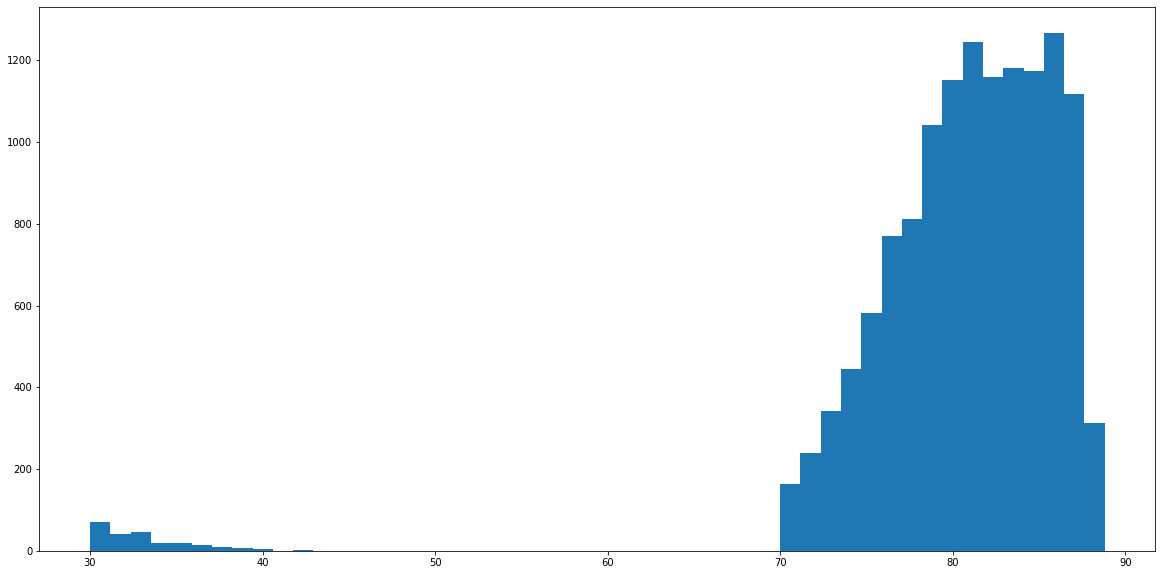

In [112]:
liveness_detection_maigc = pd.read_csv("liveness_detection_maigc.csv",header=None)
possible = liveness_detection_maigc[1]
import matplotlib.pyplot as plt
 
fig=plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
plt.hist(possible, bins = 50)

plt.show()

In [97]:
# liveness_detection_maigc

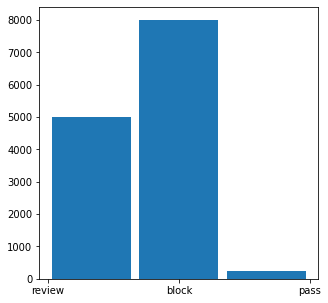

In [125]:
fig=plt.figure(figsize=(5,5))
# plt.subplot(1,2,1)
plt.hist(liveness_detection_maigc[0],bins=3,rwidth=0.9)
plt.show()

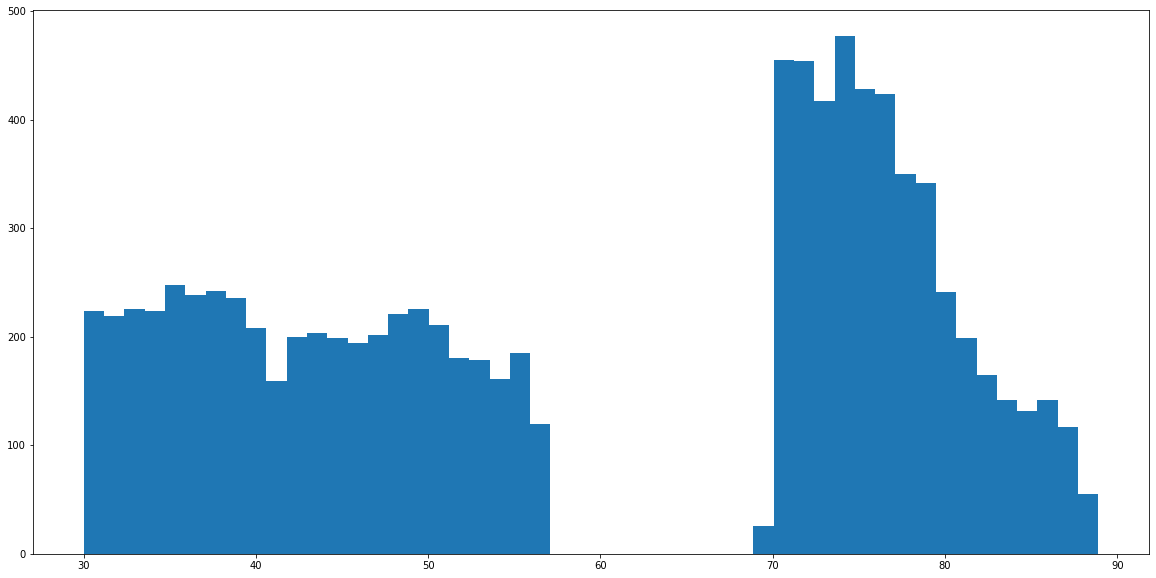

In [114]:
liveness_detection_ourslfw = pd.read_csv("liveness_detection_ourslfw.csv",header=None)
possible = liveness_detection_ourslfw[1]
import matplotlib.pyplot as plt
 
fig=plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
plt.hist(possible, bins = 50)

plt.show()

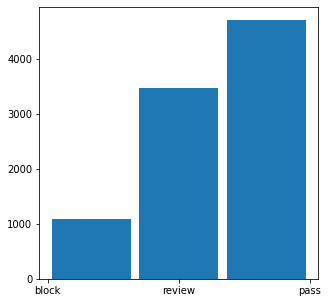

In [130]:
fig=plt.figure(figsize=(5,5))
# plt.subplot(1,2,1)
plt.hist(liveness_detection_ourslfw[0],bins=3,rwidth=0.9)
# plt.hist(liveness_detection_ourslfw[0],bins=3)
plt.show()